In [241]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import matplotlib as mpl
from scipy import integrate, interpolate
from Physical_Const import *
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize=21)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend',fontsize= 14,markerscale=1.5)
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.linewidth'] = 1.0

In [10]:
owd=os.getcwd()
path=os.chdir('EOS')
EOSlist=[]
listOfEntries= os.scandir(path)
for entry in listOfEntries:
    if entry.path.endswith('dat'):
        EOSlist.append(entry.name)
os.chdir(owd)
EOSlist.sort()

EOS 	 Mmax 	     RMmax 	   rhocMmax
H1 1.5561602557 10.9628030752 2570395782770000.0
H2 1.66765778057 11.5162811461 2238721138570000.0
H3 1.78980876708 11.8596026051 2089296130850000.0
H5 1.72464505001 10.8792115049 2313177649420000.0
H6 1.77046236185 11.3205681868 1883072302190000.0
alf1 1.49598704948 9.22077764291 3311311214830000.0
alf2 2.08698950776 11.9618826086 1949844599760000.0
alf3 1.4733652092 9.5142243637 3235936569300000.0
alf4 1.94341635264 10.8719133906 2344228815320000.0
ap1 1.68393287756 8.29230140185 4168693834700000.0
ap2 1.80853499403 8.70808440357 3801893963210000.0
ap3 2.3910781746 10.765396636 2344228815320000.0
ap4 2.21368406588 10.0042539702 2754228703340000.0
bbb2 1.92018097555 9.51474697011 3162277660170000.0
bgn1h1 1.63031400653 9.38367590402 3715352290970000.0
bpal12 1.45501600032 9.01473163804 3981071705530000.0
bsk19 1.86081207503 9.10989554562 3467368504530000.0
bsk20 2.16522378913 10.1735356362 2691534803930000.0
bsk21 2.27446658436 11.0379919745 2290867

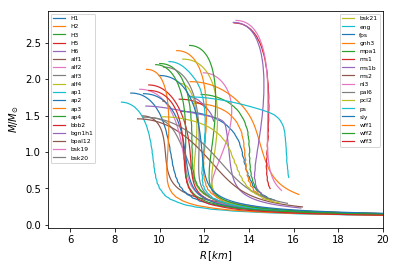

In [11]:
MR=[]
fig = plt.figure()
print('EOS','\t','Mmax','\t    ','RMmax','\t','  rhocMmax')
for EOS in EOSlist:
    R,M,rhoc=np.loadtxt('results2/'+EOS[:-4]+'/MRrhoc.dat',usecols=(0,1,2),unpack=True)
    maxi=np.argmax(M)+1
    pR=np.delete(R,np.s_[maxi:])
    pM=np.delete(M,np.s_[maxi:])
    prhoc=np.delete(rhoc,np.s_[maxi:])
    MR+=plt.plot(pR,pM,'-', linewidth=1.2,label=EOS[:-4])
    print(EOS[:-4],pM[-1],pR[-1],prhoc[-1])
plt.xlabel(r'$R\,[km]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.xlim(5,20)
l1 = plt.legend(MR[:18], [label[:-4] for label in EOSlist[:18]] , loc=2,prop={'size': 6})
l2 = plt.legend(MR[18:], [label[:-4] for label in EOSlist[18:]] , loc=1,prop={'size': 6})
plt.gca().add_artist(l1)
#plt.savefig('figures/MRrels.pdf', format='pdf', dpi=1000,bbox_inches="tight")

# Stability

# H1 --------------------------------------------------------------------------------------------

## Flotability

In [12]:
H1_140=np.loadtxt('results2/H1/14.0.dat',unpack=True)

In [13]:
s1=5e-6
s2=1e-15
H1_140rho=interpolate.UnivariateSpline(H1_140[-1], H1_140[2], k=5, s=s1)
H1_140drho=interpolate.UnivariateSpline(H1_140[-1], H1_140[2], k=5, s=s1).derivative(n=1)
H1_140ddrho=interpolate.UnivariateSpline(H1_140[-1], H1_140[2], k=5, s=s1).derivative(n=2)

H1_140p=interpolate.UnivariateSpline(H1_140[-1], H1_140[1], k=5, s=s2)
H1_140dp=interpolate.UnivariateSpline(H1_140[-1], H1_140[1], k=5, s=s2).derivative(n=1)
H1_140ddp=interpolate.UnivariateSpline(H1_140[-1], H1_140[1], k=5, s=s2).derivative(n=2)

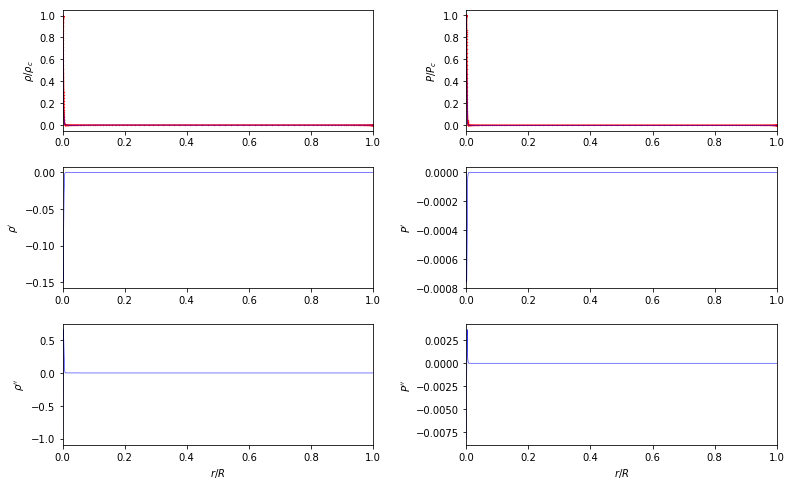

<Figure size 432x288 with 0 Axes>

In [14]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(H1_140[-1]/H1_140[-1][-1],H1_140[2]/H1_140[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(H1_140[-1]/H1_140[-1][-1],H1_140rho(H1_140[-1])/H1_140[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0) # leaving the crust out

plt.subplot(322)
plt.plot(H1_140[-1]/H1_140[-1][-1],H1_140[1]/H1_140[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(H1_140[-1]/H1_140[-1][-1],H1_140p(H1_140[-1])/H1_140[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)

plt.subplot(323)
plt.plot(H1_140[-1]/H1_140[-1][-1],H1_140drho(H1_140[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1.0)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(H1_140[-1]/H1_140[-1][-1],H1_140dp(H1_140[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1.0)

plt.subplot(325)
plt.plot(H1_140[-1]/H1_140[-1][-1],H1_140ddrho(H1_140[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(H1_140[-1]/H1_140[-1][-1],H1_140ddp(H1_140[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [6]:
H1_145=np.loadtxt('results2/H1/14.5.dat',unpack=True)

In [7]:
s1=5e-6
s2=1e-15
H1_145rho=interpolate.UnivariateSpline(H1_145[-1], H1_145[2], k=5, s=s1)
H1_145drho=interpolate.UnivariateSpline(H1_145[-1], H1_145[2], k=5, s=s1).derivative(n=1)
H1_145ddrho=interpolate.UnivariateSpline(H1_145[-1], H1_145[2], k=5, s=s1).derivative(n=2)

H1_145p=interpolate.UnivariateSpline(H1_145[-1], H1_145[1], k=5, s=s2)
H1_145dp=interpolate.UnivariateSpline(H1_145[-1], H1_145[1], k=5, s=s2).derivative(n=1)
H1_145ddp=interpolate.UnivariateSpline(H1_145[-1], H1_145[1], k=5, s=s2).derivative(n=2)

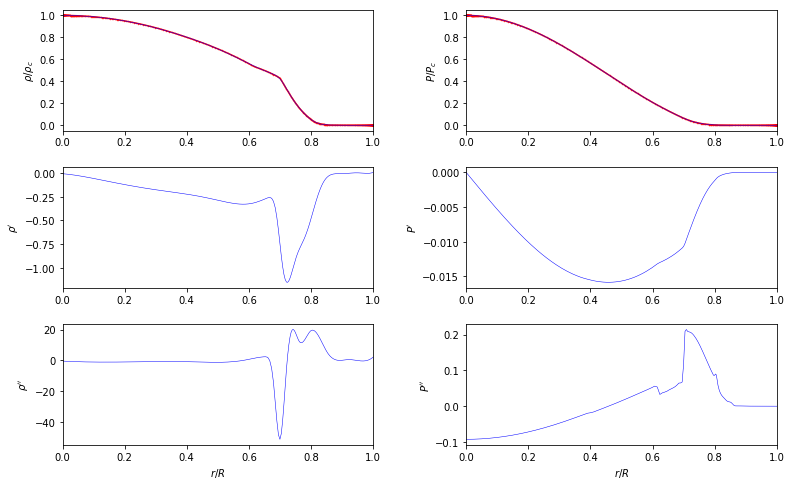

<Figure size 432x288 with 0 Axes>

In [8]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(H1_145[-1]/H1_145[-1][-1],H1_145[2]/H1_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(H1_145[-1]/H1_145[-1][-1],H1_145rho(H1_145[-1])/H1_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0) # leaving the crust out

plt.subplot(322)
plt.plot(H1_145[-1]/H1_145[-1][-1],H1_145[1]/H1_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(H1_145[-1]/H1_145[-1][-1],H1_145p(H1_145[-1])/H1_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)

plt.subplot(323)
plt.plot(H1_145[-1]/H1_145[-1][-1],H1_145drho(H1_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1.0)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(H1_145[-1]/H1_145[-1][-1],H1_145dp(H1_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1.0)

plt.subplot(325)
plt.plot(H1_145[-1]/H1_145[-1][-1],H1_145ddrho(H1_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(H1_145[-1]/H1_145[-1][-1],H1_145ddp(H1_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [9]:
H1_150=np.loadtxt('results2/H1/15.0.dat',unpack=True)

In [10]:
s1=5e-6
s2=1e-15
H1_150rho=interpolate.UnivariateSpline(H1_150[-1], H1_150[2], k=5, s=s1)
H1_150drho=interpolate.UnivariateSpline(H1_150[-1], H1_150[2], k=5, s=s1).derivative(n=1)
H1_150ddrho=interpolate.UnivariateSpline(H1_150[-1], H1_150[2], k=5, s=s1).derivative(n=2)

H1_150p=interpolate.UnivariateSpline(H1_150[-1], H1_150[1], k=5, s=s2)
H1_150dp=interpolate.UnivariateSpline(H1_150[-1], H1_150[1], k=5, s=s2).derivative(n=1)
H1_150ddp=interpolate.UnivariateSpline(H1_150[-1], H1_150[1], k=5, s=s2).derivative(n=2)

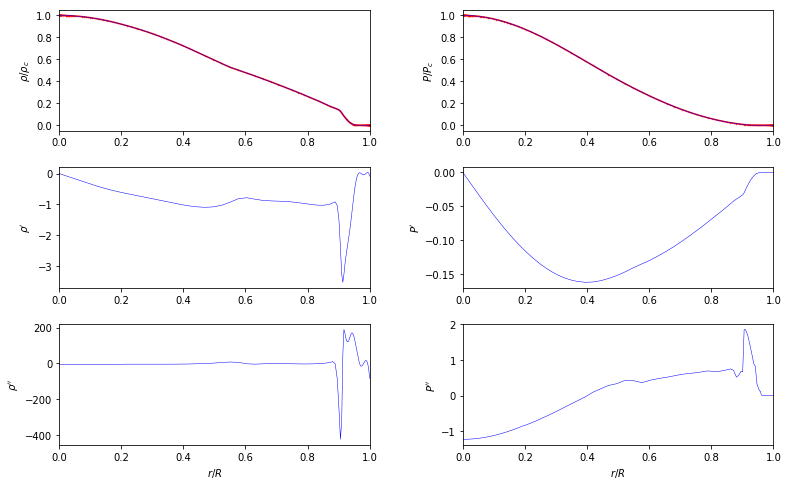

<Figure size 432x288 with 0 Axes>

In [11]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(H1_150[-1]/H1_150[-1][-1],H1_150[2]/H1_150[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(H1_150[-1]/H1_150[-1][-1],H1_150rho(H1_150[-1])/H1_150[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0) # leaving the crust out

plt.subplot(322)
plt.plot(H1_150[-1]/H1_150[-1][-1],H1_150[1]/H1_150[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(H1_150[-1]/H1_150[-1][-1],H1_150p(H1_150[-1])/H1_150[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)

plt.subplot(323)
plt.plot(H1_150[-1]/H1_150[-1][-1],H1_150drho(H1_150[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1.0)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(H1_150[-1]/H1_150[-1][-1],H1_150dp(H1_150[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1.0)

plt.subplot(325)
plt.plot(H1_150[-1]/H1_150[-1][-1],H1_150ddrho(H1_150[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(H1_150[-1]/H1_150[-1][-1],H1_150ddp(H1_150[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [17]:
H1_155=np.loadtxt('results2/H1/15.5.dat',unpack=True)

In [18]:
s1=5e-6
s2=1e-15
H1_155rho=interpolate.UnivariateSpline(H1_155[-1], H1_155[2], k=5, s=s1)
H1_155drho=interpolate.UnivariateSpline(H1_155[-1], H1_155[2], k=5, s=s1).derivative(n=1)
H1_155ddrho=interpolate.UnivariateSpline(H1_155[-1], H1_155[2], k=5, s=s1).derivative(n=2)

H1_155p=interpolate.UnivariateSpline(H1_155[-1], H1_155[1], k=5, s=s2)
H1_155dp=interpolate.UnivariateSpline(H1_155[-1], H1_155[1], k=5, s=s2).derivative(n=1)
H1_155ddp=interpolate.UnivariateSpline(H1_155[-1], H1_155[1], k=5, s=s2).derivative(n=2)

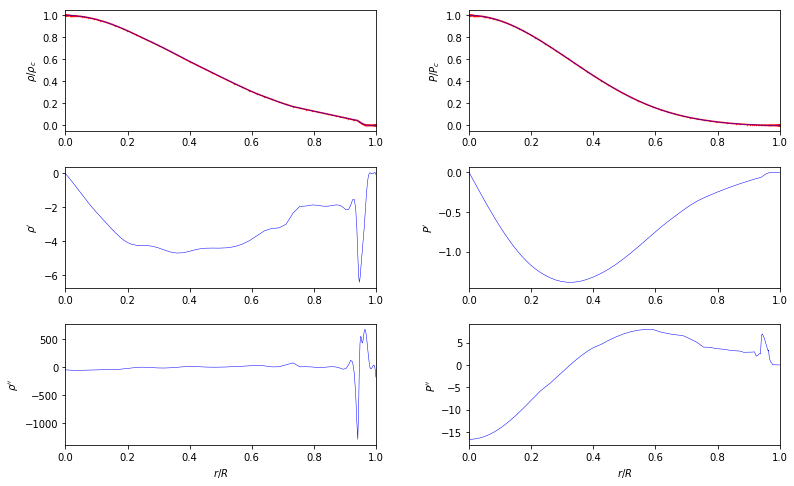

<Figure size 432x288 with 0 Axes>

In [19]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(H1_155[-1]/H1_155[-1][-1],H1_155[2]/H1_155[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(H1_155[-1]/H1_155[-1][-1],H1_155rho(H1_155[-1])/H1_155[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0) # leaving the crust out

plt.subplot(322)
plt.plot(H1_155[-1]/H1_155[-1][-1],H1_155[1]/H1_155[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(H1_155[-1]/H1_155[-1][-1],H1_155p(H1_155[-1])/H1_155[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)

plt.subplot(323)
plt.plot(H1_155[-1]/H1_155[-1][-1],H1_155drho(H1_155[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1.0)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(H1_155[-1]/H1_155[-1][-1],H1_155dp(H1_155[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1.0)

plt.subplot(325)
plt.plot(H1_155[-1]/H1_155[-1][-1],H1_155ddrho(H1_155[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(H1_155[-1]/H1_155[-1][-1],H1_155ddp(H1_155[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

# H2 --------------------------------------------------------------------------------------------

## Stability

In [20]:
H2_140=np.loadtxt('results2/H2/14.0.dat',unpack=True)

In [21]:
s1=5e-6
s2=1e-15
H2_140rho=interpolate.UnivariateSpline(H2_140[-1], H2_140[2], k=5, s=s1)
H2_140drho=interpolate.UnivariateSpline(H2_140[-1], H2_140[2], k=5, s=s1).derivative(n=1)
H2_140ddrho=interpolate.UnivariateSpline(H2_140[-1], H2_140[2], k=5, s=s1).derivative(n=2)

H2_140p=interpolate.UnivariateSpline(H2_140[-1], H2_140[1], k=5, s=s2)
H2_140dp=interpolate.UnivariateSpline(H2_140[-1], H2_140[1], k=5, s=s2).derivative(n=1)
H2_140ddp=interpolate.UnivariateSpline(H2_140[-1], H2_140[1], k=5, s=s2).derivative(n=2)

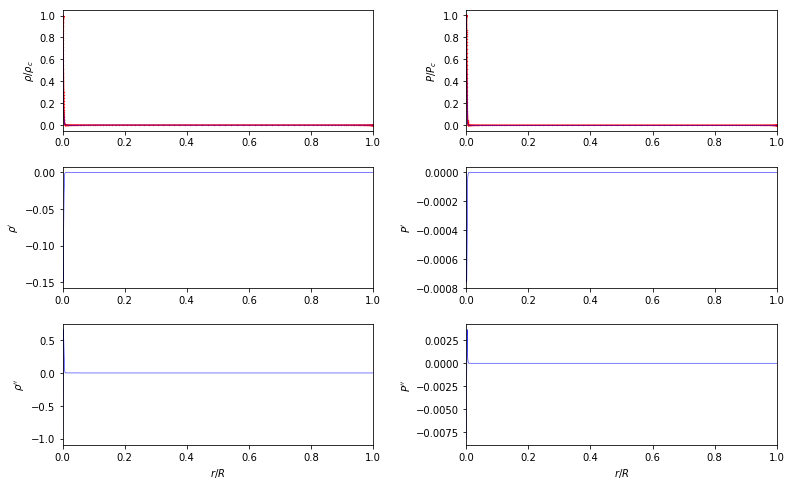

<Figure size 432x288 with 0 Axes>

In [22]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(H2_140[-1]/H2_140[-1][-1],H2_140[2]/H2_140[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(H2_140[-1]/H2_140[-1][-1],H2_140rho(H2_140[-1])/H2_140[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0) # leaving the crust out

plt.subplot(322)
plt.plot(H2_140[-1]/H2_140[-1][-1],H2_140[1]/H2_140[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(H2_140[-1]/H2_140[-1][-1],H2_140p(H2_140[-1])/H2_140[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)

plt.subplot(323)
plt.plot(H2_140[-1]/H2_140[-1][-1],H2_140drho(H2_140[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1.0)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(H2_140[-1]/H2_140[-1][-1],H2_140dp(H2_140[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1.0)

plt.subplot(325)
plt.plot(H2_140[-1]/H2_140[-1][-1],H2_140ddrho(H2_140[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(H2_140[-1]/H2_140[-1][-1],H2_140ddp(H2_140[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [23]:
H2_145=np.loadtxt('results2/H2/14.5.dat',unpack=True)

In [24]:
s1=5e-6
s2=1e-15
H2_145rho=interpolate.UnivariateSpline(H2_145[-1], H2_145[2], k=5, s=s1)
H2_145drho=interpolate.UnivariateSpline(H2_145[-1], H2_145[2], k=5, s=s1).derivative(n=1)
H2_145ddrho=interpolate.UnivariateSpline(H2_145[-1], H2_145[2], k=5, s=s1).derivative(n=2)

H2_145p=interpolate.UnivariateSpline(H2_145[-1], H2_145[1], k=5, s=s2)
H2_145dp=interpolate.UnivariateSpline(H2_145[-1], H2_145[1], k=5, s=s2).derivative(n=1)
H2_145ddp=interpolate.UnivariateSpline(H2_145[-1], H2_145[1], k=5, s=s2).derivative(n=2)

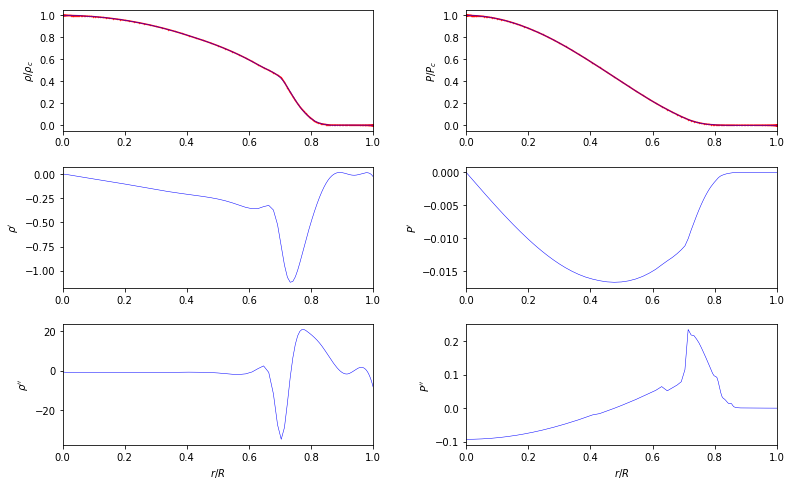

<Figure size 432x288 with 0 Axes>

In [25]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(H2_145[-1]/H2_145[-1][-1],H2_145[2]/H2_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(H2_145[-1]/H2_145[-1][-1],H2_145rho(H2_145[-1])/H2_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0) # leaving the crust out

plt.subplot(322)
plt.plot(H2_145[-1]/H2_145[-1][-1],H2_145[1]/H2_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(H2_145[-1]/H2_145[-1][-1],H2_145p(H2_145[-1])/H2_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)

plt.subplot(323)
plt.plot(H2_145[-1]/H2_145[-1][-1],H2_145drho(H2_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1.0)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(H2_145[-1]/H2_145[-1][-1],H2_145dp(H2_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1.0)

plt.subplot(325)
plt.plot(H2_145[-1]/H2_145[-1][-1],H2_145ddrho(H2_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(H2_145[-1]/H2_145[-1][-1],H2_145ddp(H2_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [26]:
H2_150=np.loadtxt('results2/H2/15.0.dat',unpack=True)

In [27]:
s1=5e-6
s2=1e-15
H2_150rho=interpolate.UnivariateSpline(H2_150[-1], H2_150[2], k=5, s=s1)
H2_150drho=interpolate.UnivariateSpline(H2_150[-1], H2_150[2], k=5, s=s1).derivative(n=1)
H2_150ddrho=interpolate.UnivariateSpline(H2_150[-1], H2_150[2], k=5, s=s1).derivative(n=2)

H2_150p=interpolate.UnivariateSpline(H2_150[-1], H2_150[1], k=5, s=s2)
H2_150dp=interpolate.UnivariateSpline(H2_150[-1], H2_150[1], k=5, s=s2).derivative(n=1)
H2_150ddp=interpolate.UnivariateSpline(H2_150[-1], H2_150[1], k=5, s=s2).derivative(n=2)

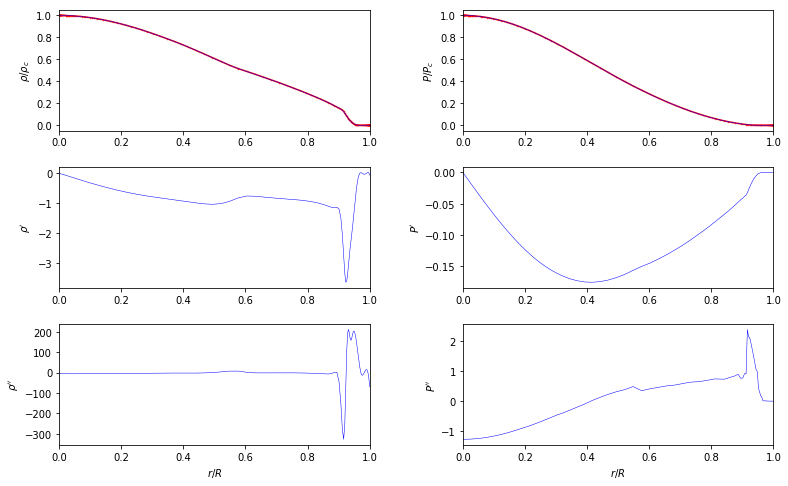

<Figure size 432x288 with 0 Axes>

In [28]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(H2_150[-1]/H2_150[-1][-1],H2_150[2]/H2_150[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(H2_150[-1]/H2_150[-1][-1],H2_150rho(H2_150[-1])/H2_150[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0) # leaving the crust out

plt.subplot(322)
plt.plot(H2_150[-1]/H2_150[-1][-1],H2_150[1]/H2_150[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(H2_150[-1]/H2_150[-1][-1],H2_150p(H2_150[-1])/H2_150[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)

plt.subplot(323)
plt.plot(H2_150[-1]/H2_150[-1][-1],H2_150drho(H2_150[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1.0)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(H2_150[-1]/H2_150[-1][-1],H2_150dp(H2_150[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1.0)

plt.subplot(325)
plt.plot(H2_150[-1]/H2_150[-1][-1],H2_150ddrho(H2_150[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(H2_150[-1]/H2_150[-1][-1],H2_150ddp(H2_150[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [29]:
H2_155=np.loadtxt('results2/H2/15.5.dat',unpack=True)

In [30]:
s1=5e-6
s2=1e-15
H2_155rho=interpolate.UnivariateSpline(H2_155[-1], H2_155[2], k=5, s=s1)
H2_155drho=interpolate.UnivariateSpline(H2_155[-1], H2_155[2], k=5, s=s1).derivative(n=1)
H2_155ddrho=interpolate.UnivariateSpline(H2_155[-1], H2_155[2], k=5, s=s1).derivative(n=2)

H2_155p=interpolate.UnivariateSpline(H2_155[-1], H2_155[1], k=5, s=s2)
H2_155dp=interpolate.UnivariateSpline(H2_155[-1], H2_155[1], k=5, s=s2).derivative(n=1)
H2_155ddp=interpolate.UnivariateSpline(H2_155[-1], H2_155[1], k=5, s=s2).derivative(n=2)

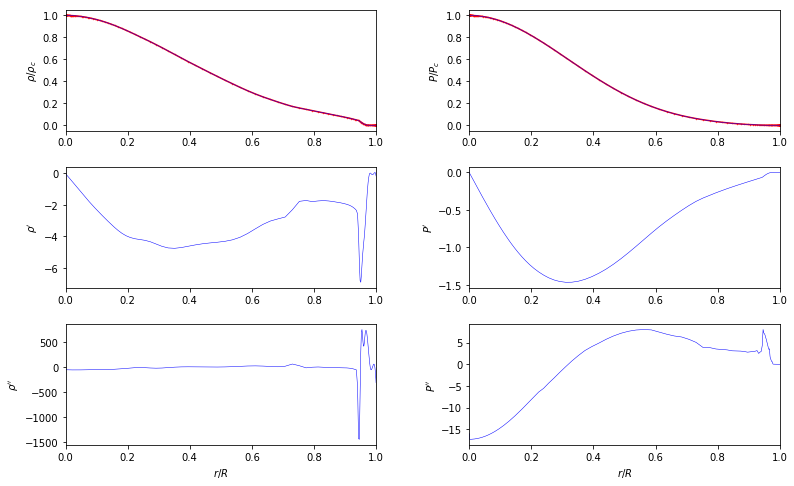

<Figure size 432x288 with 0 Axes>

In [31]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(H2_155[-1]/H2_155[-1][-1],H2_155[2]/H2_155[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(H2_155[-1]/H2_155[-1][-1],H2_155rho(H2_155[-1])/H2_155[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0) # leaving the crust out

plt.subplot(322)
plt.plot(H2_155[-1]/H2_155[-1][-1],H2_155[1]/H2_155[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(H2_155[-1]/H2_155[-1][-1],H2_155p(H2_155[-1])/H2_155[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)

plt.subplot(323)
plt.plot(H2_155[-1]/H2_155[-1][-1],H2_155drho(H2_155[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1.0)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(H2_155[-1]/H2_155[-1][-1],H2_155dp(H2_155[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1.0)

plt.subplot(325)
plt.plot(H2_155[-1]/H2_155[-1][-1],H2_155ddrho(H2_155[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(H2_155[-1]/H2_155[-1][-1],H2_155ddp(H2_155[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

# H3 --------------------------------------------------------------------------------------------

## Flotability

In [32]:
H3_140=np.loadtxt('results2/H3/14.0.dat',unpack=True)

In [33]:
s1=5e-6
s2=1e-15
H3_140rho=interpolate.UnivariateSpline(H3_140[-1], H3_140[2], k=5, s=s1)
H3_140drho=interpolate.UnivariateSpline(H3_140[-1], H3_140[2], k=5, s=s1).derivative(n=1)
H3_140ddrho=interpolate.UnivariateSpline(H3_140[-1], H3_140[2], k=5, s=s1).derivative(n=2)

H3_140p=interpolate.UnivariateSpline(H3_140[-1], H3_140[1], k=5, s=s2)
H3_140dp=interpolate.UnivariateSpline(H3_140[-1], H3_140[1], k=5, s=s2).derivative(n=1)
H3_140ddp=interpolate.UnivariateSpline(H3_140[-1], H3_140[1], k=5, s=s2).derivative(n=2)

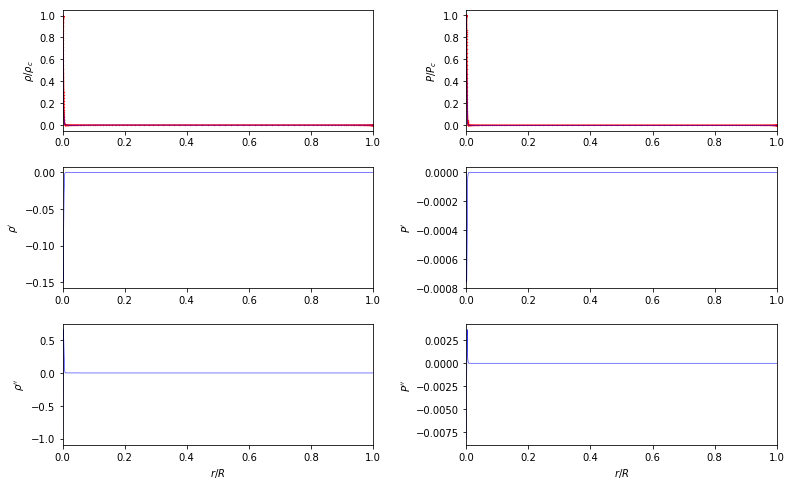

<Figure size 432x288 with 0 Axes>

In [34]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(H3_140[-1]/H3_140[-1][-1],H3_140[2]/H3_140[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(H3_140[-1]/H3_140[-1][-1],H3_140rho(H3_140[-1])/H3_140[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0) # leaving the crust out

plt.subplot(322)
plt.plot(H3_140[-1]/H3_140[-1][-1],H3_140[1]/H3_140[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(H3_140[-1]/H3_140[-1][-1],H3_140p(H3_140[-1])/H3_140[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)

plt.subplot(323)
plt.plot(H3_140[-1]/H3_140[-1][-1],H3_140drho(H3_140[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1.0)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(H3_140[-1]/H3_140[-1][-1],H3_140dp(H3_140[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1.0)

plt.subplot(325)
plt.plot(H3_140[-1]/H3_140[-1][-1],H3_140ddrho(H3_140[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(H3_140[-1]/H3_140[-1][-1],H3_140ddp(H3_140[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [35]:
H3_145=np.loadtxt('results2/H3/14.5.dat',unpack=True)

In [36]:
s1=5e-6
s2=1e-15
H3_145rho=interpolate.UnivariateSpline(H3_145[-1], H3_145[2], k=5, s=s1)
H3_145drho=interpolate.UnivariateSpline(H3_145[-1], H3_145[2], k=5, s=s1).derivative(n=1)
H3_145ddrho=interpolate.UnivariateSpline(H3_145[-1], H3_145[2], k=5, s=s1).derivative(n=2)

H3_145p=interpolate.UnivariateSpline(H3_145[-1], H3_145[1], k=5, s=s2)
H3_145dp=interpolate.UnivariateSpline(H3_145[-1], H3_145[1], k=5, s=s2).derivative(n=1)
H3_145ddp=interpolate.UnivariateSpline(H3_145[-1], H3_145[1], k=5, s=s2).derivative(n=2)

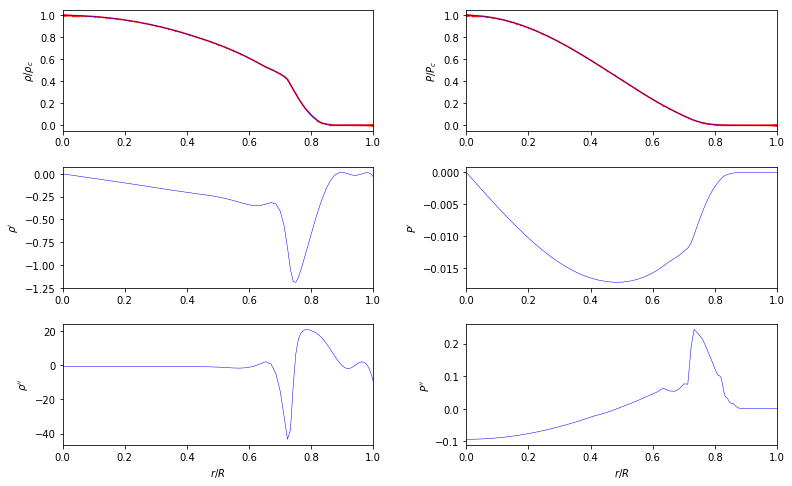

<Figure size 432x288 with 0 Axes>

In [37]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(H3_145[-1]/H3_145[-1][-1],H3_145[2]/H3_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(H3_145[-1]/H3_145[-1][-1],H3_145rho(H3_145[-1])/H3_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0) # leaving the crust out

plt.subplot(322)
plt.plot(H3_145[-1]/H3_145[-1][-1],H3_145[1]/H3_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(H3_145[-1]/H3_145[-1][-1],H3_145p(H3_145[-1])/H3_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)

plt.subplot(323)
plt.plot(H3_145[-1]/H3_145[-1][-1],H3_145drho(H3_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1.0)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(H3_145[-1]/H3_145[-1][-1],H3_145dp(H3_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1.0)

plt.subplot(325)
plt.plot(H3_145[-1]/H3_145[-1][-1],H3_145ddrho(H3_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(H3_145[-1]/H3_145[-1][-1],H3_145ddp(H3_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [38]:
H3_150=np.loadtxt('results2/H3/15.0.dat',unpack=True)

In [39]:
s1=5e-6
s2=1e-15
H3_150rho=interpolate.UnivariateSpline(H3_150[-1], H3_150[2], k=5, s=s1)
H3_150drho=interpolate.UnivariateSpline(H3_150[-1], H3_150[2], k=5, s=s1).derivative(n=1)
H3_150ddrho=interpolate.UnivariateSpline(H3_150[-1], H3_150[2], k=5, s=s1).derivative(n=2)

H3_150p=interpolate.UnivariateSpline(H3_150[-1], H3_150[1], k=5, s=s2)
H3_150dp=interpolate.UnivariateSpline(H3_150[-1], H3_150[1], k=5, s=s2).derivative(n=1)
H3_150ddp=interpolate.UnivariateSpline(H3_150[-1], H3_150[1], k=5, s=s2).derivative(n=2)

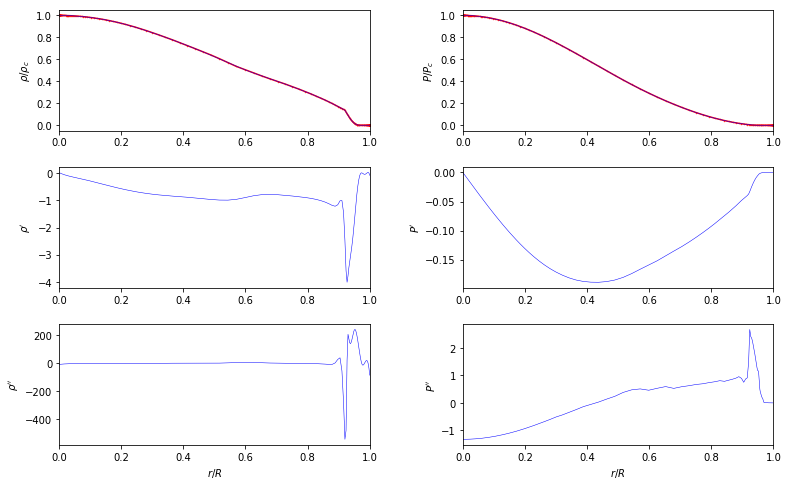

<Figure size 432x288 with 0 Axes>

In [40]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(H3_150[-1]/H3_150[-1][-1],H3_150[2]/H3_150[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(H3_150[-1]/H3_150[-1][-1],H3_150rho(H3_150[-1])/H3_150[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0) # leaving the crust out

plt.subplot(322)
plt.plot(H3_150[-1]/H3_150[-1][-1],H3_150[1]/H3_150[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(H3_150[-1]/H3_150[-1][-1],H3_150p(H3_150[-1])/H3_150[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)

plt.subplot(323)
plt.plot(H3_150[-1]/H3_150[-1][-1],H3_150drho(H3_150[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1.0)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(H3_150[-1]/H3_150[-1][-1],H3_150dp(H3_150[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1.0)

plt.subplot(325)
plt.plot(H3_150[-1]/H3_150[-1][-1],H3_150ddrho(H3_150[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(H3_150[-1]/H3_150[-1][-1],H3_150ddp(H3_150[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [46]:
H3_154=np.loadtxt('results2/H3/15.4.dat',unpack=True)

In [47]:
s1=5e-6
s2=1e-15
H3_154rho=interpolate.UnivariateSpline(H3_154[-1], H3_154[2], k=5, s=s1)
H3_154drho=interpolate.UnivariateSpline(H3_154[-1], H3_154[2], k=5, s=s1).derivative(n=1)
H3_154ddrho=interpolate.UnivariateSpline(H3_154[-1], H3_154[2], k=5, s=s1).derivative(n=2)

H3_154p=interpolate.UnivariateSpline(H3_154[-1], H3_154[1], k=5, s=s2)
H3_154dp=interpolate.UnivariateSpline(H3_154[-1], H3_154[1], k=5, s=s2).derivative(n=1)
H3_154ddp=interpolate.UnivariateSpline(H3_154[-1], H3_154[1], k=5, s=s2).derivative(n=2)

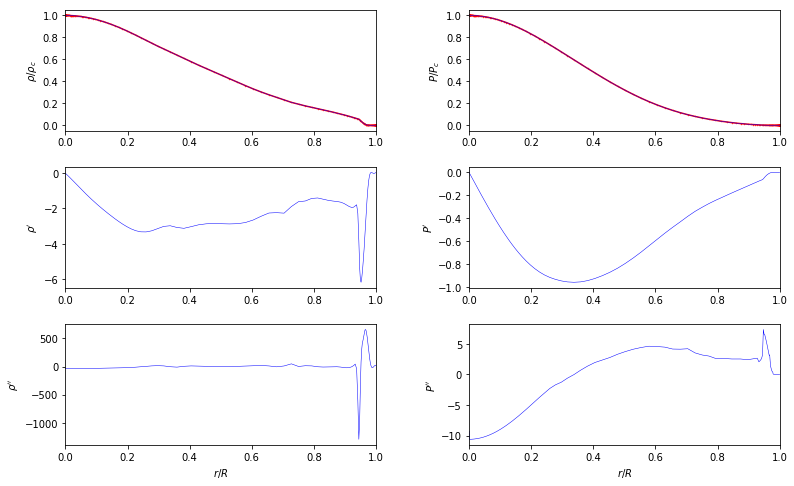

<Figure size 432x288 with 0 Axes>

In [48]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(H3_154[-1]/H3_154[-1][-1],H3_154[2]/H3_154[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(H3_154[-1]/H3_154[-1][-1],H3_154rho(H3_154[-1])/H3_154[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0) # leaving the crust out

plt.subplot(322)
plt.plot(H3_154[-1]/H3_154[-1][-1],H3_154[1]/H3_154[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(H3_154[-1]/H3_154[-1][-1],H3_154p(H3_154[-1])/H3_154[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)

plt.subplot(323)
plt.plot(H3_154[-1]/H3_154[-1][-1],H3_154drho(H3_154[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1.0)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(H3_154[-1]/H3_154[-1][-1],H3_154dp(H3_154[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1.0)

plt.subplot(325)
plt.plot(H3_154[-1]/H3_154[-1][-1],H3_154ddrho(H3_154[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(H3_154[-1]/H3_154[-1][-1],H3_154ddp(H3_154[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

# H5 --------------------------------------------------------------------------------------------

In [50]:
H5_1505=np.loadtxt('results2/H5/15.0542089874.dat',unpack=True)

In [53]:
s1=5e-7
s2=1e-15
H5_1505rho=interpolate.UnivariateSpline(H5_1505[-1], H5_1505[2], k=5, s=s1)
H5_1505drho=interpolate.UnivariateSpline(H5_1505[-1], H5_1505[2], k=5, s=s1).derivative(n=1)
H5_1505ddrho=interpolate.UnivariateSpline(H5_1505[-1], H5_1505[2], k=5, s=s1).derivative(n=2)

H5_1505p=interpolate.UnivariateSpline(H5_1505[-1], H5_1505[1], k=5, s=s2)
H5_1505dp=interpolate.UnivariateSpline(H5_1505[-1], H5_1505[1], k=5, s=s2).derivative(n=1)
H5_1505ddp=interpolate.UnivariateSpline(H5_1505[-1], H5_1505[1], k=5, s=s2).derivative(n=2)

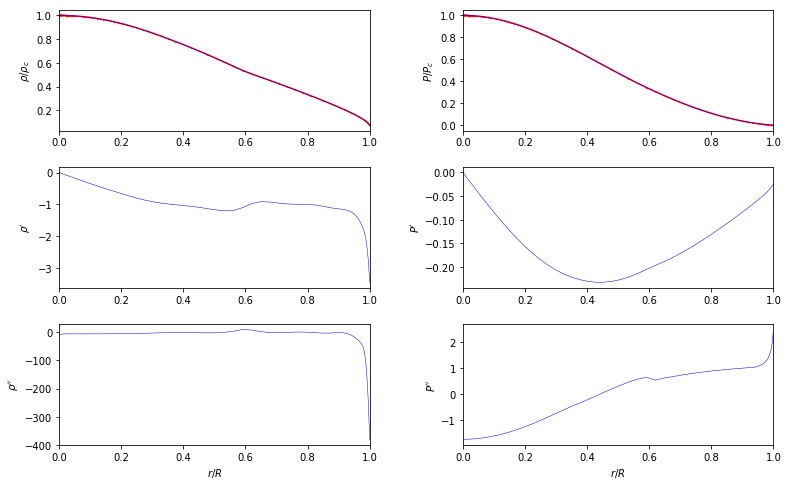

<Figure size 432x288 with 0 Axes>

In [54]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(H5_1505[-1]/H5_1505[-1][-1],H5_1505[2]/H5_1505[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(H5_1505[-1]/H5_1505[-1][-1],H5_1505rho(H5_1505[-1])/H5_1505[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0) # leaving the crust out

plt.subplot(322)
plt.plot(H5_1505[-1]/H5_1505[-1][-1],H5_1505[1]/H5_1505[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(H5_1505[-1]/H5_1505[-1][-1],H5_1505p(H5_1505[-1])/H5_1505[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)

plt.subplot(323)
plt.plot(H5_1505[-1]/H5_1505[-1][-1],H5_1505drho(H5_1505[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1.0)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(H5_1505[-1]/H5_1505[-1][-1],H5_1505dp(H5_1505[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1.0)

plt.subplot(325)
plt.plot(H5_1505[-1]/H5_1505[-1][-1],H5_1505ddrho(H5_1505[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(H5_1505[-1]/H5_1505[-1][-1],H5_1505ddp(H5_1505[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [6]:
H5_145=np.loadtxt('results2/H5/14.5.dat',unpack=True)

In [7]:
s1=5e-6
s2=1e-15
H5_145rho=interpolate.UnivariateSpline(H5_145[-1], H5_145[2], k=5, s=s1)
H5_145drho=interpolate.UnivariateSpline(H5_145[-1], H5_145[2], k=5, s=s1).derivative(n=1)
H5_145ddrho=interpolate.UnivariateSpline(H5_145[-1], H5_145[2], k=5, s=s1).derivative(n=2)

H5_145p=interpolate.UnivariateSpline(H5_145[-1], H5_145[1], k=5, s=s2)
H5_145dp=interpolate.UnivariateSpline(H5_145[-1], H5_145[1], k=5, s=s2).derivative(n=1)
H5_145ddp=interpolate.UnivariateSpline(H5_145[-1], H5_145[1], k=5, s=s2).derivative(n=2)

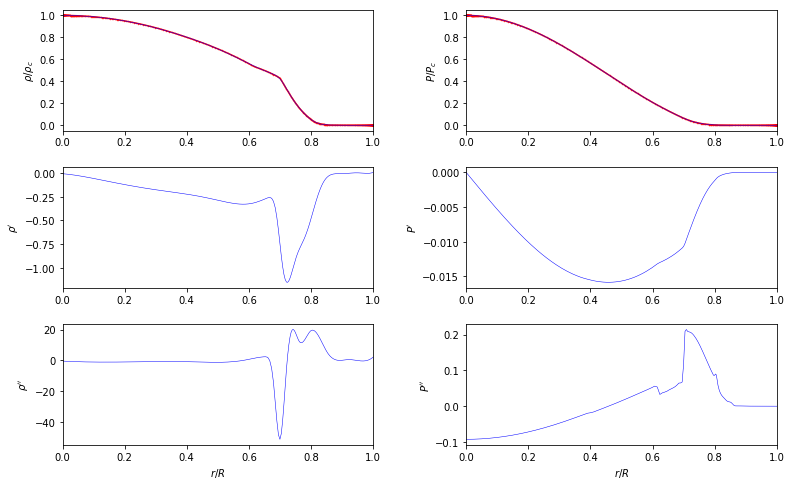

<Figure size 432x288 with 0 Axes>

In [8]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(H5_145[-1]/H5_145[-1][-1],H5_145[2]/H5_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(H5_145[-1]/H5_145[-1][-1],H5_145rho(H5_145[-1])/H5_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0) # leaving the crust out

plt.subplot(322)
plt.plot(H5_145[-1]/H5_145[-1][-1],H5_145[1]/H5_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(H5_145[-1]/H5_145[-1][-1],H5_145p(H5_145[-1])/H5_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)

plt.subplot(323)
plt.plot(H5_145[-1]/H5_145[-1][-1],H5_145drho(H5_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1.0)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(H5_145[-1]/H5_145[-1][-1],H5_145dp(H5_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1.0)

plt.subplot(325)
plt.plot(H5_145[-1]/H5_145[-1][-1],H5_145ddrho(H5_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(H5_145[-1]/H5_145[-1][-1],H5_145ddp(H5_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [9]:
H5_150=np.loadtxt('results2/H5/15.0.dat',unpack=True)

In [10]:
s1=5e-6
s2=1e-15
H5_150rho=interpolate.UnivariateSpline(H5_150[-1], H5_150[2], k=5, s=s1)
H5_150drho=interpolate.UnivariateSpline(H5_150[-1], H5_150[2], k=5, s=s1).derivative(n=1)
H5_150ddrho=interpolate.UnivariateSpline(H5_150[-1], H5_150[2], k=5, s=s1).derivative(n=2)

H5_150p=interpolate.UnivariateSpline(H5_150[-1], H5_150[1], k=5, s=s2)
H5_150dp=interpolate.UnivariateSpline(H5_150[-1], H5_150[1], k=5, s=s2).derivative(n=1)
H5_150ddp=interpolate.UnivariateSpline(H5_150[-1], H5_150[1], k=5, s=s2).derivative(n=2)

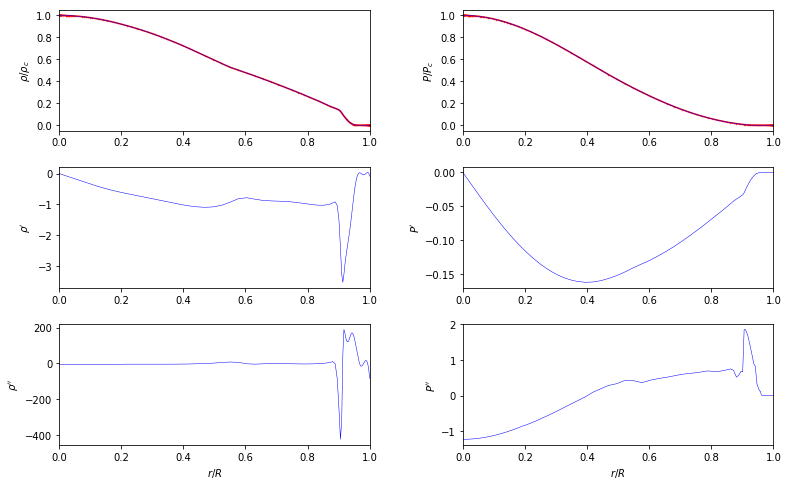

<Figure size 432x288 with 0 Axes>

In [11]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(H5_150[-1]/H5_150[-1][-1],H5_150[2]/H5_150[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(H5_150[-1]/H5_150[-1][-1],H5_150rho(H5_150[-1])/H5_150[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0) # leaving the crust out

plt.subplot(322)
plt.plot(H5_150[-1]/H5_150[-1][-1],H5_150[1]/H5_150[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(H5_150[-1]/H5_150[-1][-1],H5_150p(H5_150[-1])/H5_150[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)

plt.subplot(323)
plt.plot(H5_150[-1]/H5_150[-1][-1],H5_150drho(H5_150[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1.0)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(H5_150[-1]/H5_150[-1][-1],H5_150dp(H5_150[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1.0)

plt.subplot(325)
plt.plot(H5_150[-1]/H5_150[-1][-1],H5_150ddrho(H5_150[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(H5_150[-1]/H5_150[-1][-1],H5_150ddp(H5_150[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [17]:
H5_155=np.loadtxt('results2/H5/15.5.dat',unpack=True)

In [18]:
s1=5e-6
s2=1e-15
H5_155rho=interpolate.UnivariateSpline(H5_155[-1], H5_155[2], k=5, s=s1)
H5_155drho=interpolate.UnivariateSpline(H5_155[-1], H5_155[2], k=5, s=s1).derivative(n=1)
H5_155ddrho=interpolate.UnivariateSpline(H5_155[-1], H5_155[2], k=5, s=s1).derivative(n=2)

H5_155p=interpolate.UnivariateSpline(H5_155[-1], H5_155[1], k=5, s=s2)
H5_155dp=interpolate.UnivariateSpline(H5_155[-1], H5_155[1], k=5, s=s2).derivative(n=1)
H5_155ddp=interpolate.UnivariateSpline(H5_155[-1], H5_155[1], k=5, s=s2).derivative(n=2)

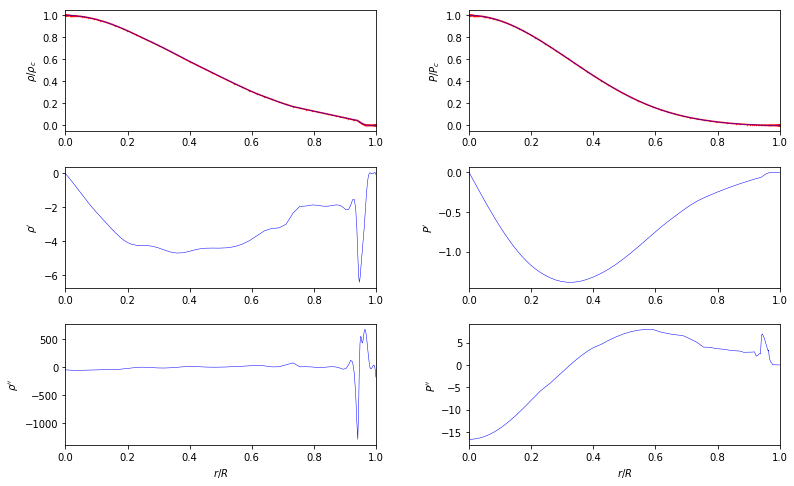

<Figure size 432x288 with 0 Axes>

In [19]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(H5_155[-1]/H5_155[-1][-1],H5_155[2]/H5_155[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(H5_155[-1]/H5_155[-1][-1],H5_155rho(H5_155[-1])/H5_155[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0) # leaving the crust out

plt.subplot(322)
plt.plot(H5_155[-1]/H5_155[-1][-1],H5_155[1]/H5_155[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(H5_155[-1]/H5_155[-1][-1],H5_155p(H5_155[-1])/H5_155[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)

plt.subplot(323)
plt.plot(H5_155[-1]/H5_155[-1][-1],H5_155drho(H5_155[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1.0)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(H5_155[-1]/H5_155[-1][-1],H5_155dp(H5_155[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1.0)

plt.subplot(325)
plt.plot(H5_155[-1]/H5_155[-1][-1],H5_155ddrho(H5_155[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(H5_155[-1]/H5_155[-1][-1],H5_155ddp(H5_155[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1.0)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

# H6 --------------------------------------------------------------------------------------------

In [117]:
H6_145=np.loadtxt('results/H6/14.5.dat',unpack=True)
H6_145rho=interpolate.UnivariateSpline(H6_145[-1], H6_145[2], k=5, s=0)
H6_145drho=interpolate.UnivariateSpline(H6_145[-1], H6_145[2], k=5, s=0).derivative(n=1)
H6_145ddrho=interpolate.UnivariateSpline(H6_145[-1], H6_145[2], k=5, s=0).derivative(n=2)

H6_145p=interpolate.UnivariateSpline(H6_145[-1], H6_145[1], k=5, s=0)
H6_145dp=interpolate.UnivariateSpline(H6_145[-1], H6_145[1], k=5, s=0).derivative(n=1)
H6_145ddp=interpolate.UnivariateSpline(H6_145[-1], H6_145[1], k=5, s=0).derivative(n=2)

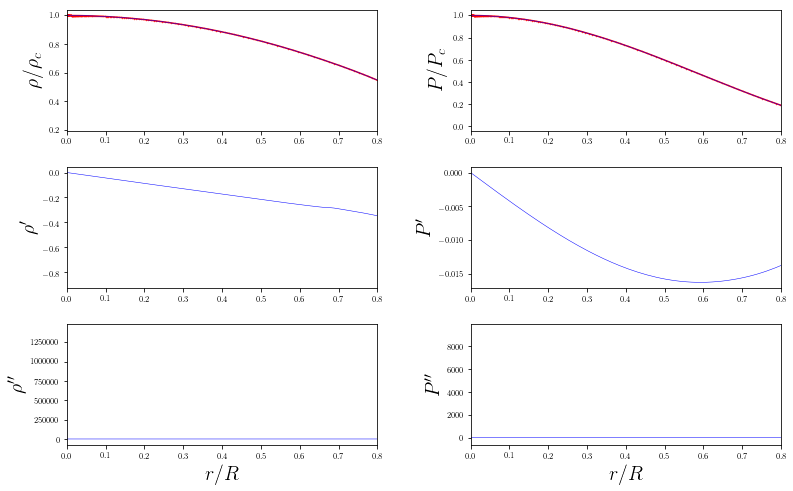

<Figure size 432x288 with 0 Axes>

In [118]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(H6_145[-1]/H6_145[-1][-1],H6_145[2]/H6_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(H6_145[-1]/H6_145[-1][-1],H6_145rho(H6_145[-1])/H6_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,0.8) # leaving the crust out

plt.subplot(322)
plt.plot(H6_145[-1]/H6_145[-1][-1],H6_145[1]/H6_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(H6_145[-1]/H6_145[-1][-1],H6_145p(H6_145[-1])/H6_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,0.8)

plt.subplot(323)
plt.plot(H6_145[-1]/H6_145[-1][-1],H6_145drho(H6_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,0.8)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(H6_145[-1]/H6_145[-1][-1],H6_145dp(H6_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,0.8)

plt.subplot(325)
plt.plot(H6_145[-1]/H6_145[-1][-1],H6_145ddrho(H6_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(H6_145[-1]/H6_145[-1][-1],H6_145ddp(H6_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [119]:
H6_145dpdrho=np.divide(H6_145dp(H6_145[-1]),H6_145drho(H6_145[-1]))

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


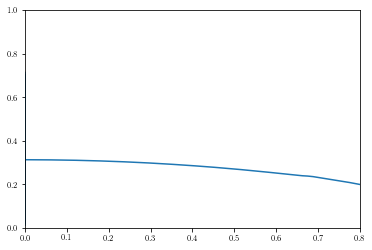

In [120]:
plt.plot(H6_145[-1]/H6_145[-1][-1],np.sqrt(H6_145dpdrho))
plt.xlim(0,0.8)
plt.ylim(0,1)
plt.show()

# ALF1 --------------------------------------------------------------------------------------------

In [13]:
rhoALF1,PALF1,nALF1=np.loadtxt('EOS/alf1.dat',usecols=(2,1,0),unpack=True)

## Dominant energy condition

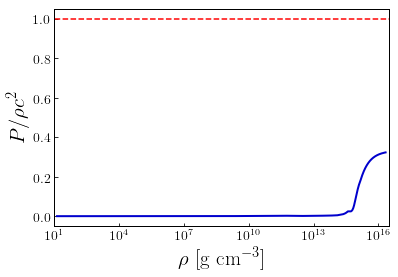

<Figure size 432x288 with 0 Axes>

In [14]:
fig, ax = plt.subplots()
plt.plot(nALF1,np.divide(PALF1,rhoALF1),lw='2',color='mediumblue')
plt.plot([0,10**(17)],[1.0,1.0],'r--',lw='1.5')

ax.set_xscale("log")
#locmaj = matplotlib.ticker.LogLocator(base=10.0,numticks=16) 
#ax.xaxis.set_major_locator(locmaj)


plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ P / \rho c^2 $')
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=16)
#ax.xaxis.set_minor_locator(locmin)
#ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
#plt.ylim(0,1)
plt.savefig('figures/ECALF1.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

## Speed of sound

In [15]:
vsquared=interpolate.UnivariateSpline(rhoALF1, PALF1, k=3, s=0).derivative(n=1)

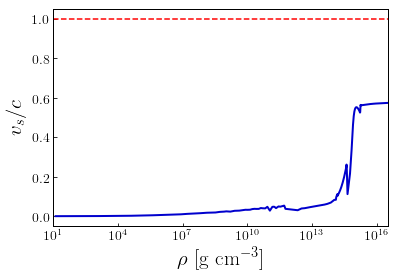

In [16]:
fig, ax = plt.subplots()
plt.plot(rhoALF1,np.sqrt(vsquared(rhoALF1)),lw='2.0',color='mediumblue')
plt.plot([1e+1,10**(16.5)],[1.0,1.0],'r--',lw='1.5')
plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ v_s / c $')
plt.xscale('log')
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#mpl.rcParams['axes.linewidth'] = 1.4
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
plt.savefig('figures/SSALF1.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Adiabatic Index

In [17]:
Gamma=np.multiply(np.divide(np.add(rhoALF1,PALF1),PALF1),vsquared(rhoALF1))

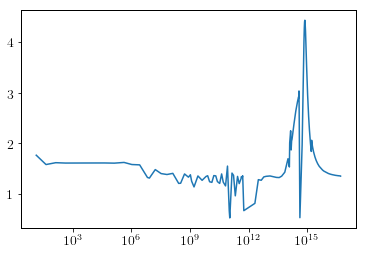

In [18]:
plt.plot(rhoALF1,Gamma)
plt.xscale('log')

$$ \langle\gamma\rangle=\frac{\int_{0}^{R} e^{(\lambda+3 \nu) } \gamma(r) P(r) r^{2} d r}{\int_{0}^{R} e^{(\lambda+3 \nu) } P(r) r^{2} d r} $$

Listing all the models calculated

In [19]:
owd=os.getcwd()
path=os.chdir('results2/alf1')
listOfEntries= os.scandir(path)
models_alf1 = []
for entry in listOfEntries:
    if '1' in entry.name:
        models_alf1.append(entry.name)
os.chdir(owd)
models_alf1.sort()

In [20]:
gamma_efs1 = []
gamma_efs2 = []
gamma_crs1 = []
gamma_crs2 = []
rhosc= []
for model in models_alf1:
    m, P, rho, nu, lambd, r = np.loadtxt('results2/alf1/' + model ,unpack=True)
    nu = nu - nu[-1] + 0.5*np.log(1-2*m[-1]/r[-1])
    #lambd = np.zeros_like(r)
    #for i in range((r.shape)[0]):
    #    if i==0:
    #        lambd[i] = 0
    #    else:
    #        lambd[i] = 0.5*np.log(1/(1-2*m[i]/r[i]))
    drho=interpolate.UnivariateSpline(r, rho, k=5, s=0).derivative(n=1)
    dP=interpolate.UnivariateSpline(r, P, k=5, s=0).derivative(n=1)
    gamma = np.divide(dP(r),drho(r))
    gamma_ef1 = integrate.trapz(np.exp(lambd+3*nu)*gamma*P*(r**2),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t1 = (1/36)*integrate.trapz(np.exp((lambd+3*nu))*(16*P+(np.exp(2*lambd)-1)*(P+rho))*(np.exp(2*lambd)-1)*(r**2))/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t2 = (4*np.pi/9)*integrate.trapz(np.exp(3*lambd+3*nu)*(8*P + (np.exp(2*lambd)+1)*(P+rho))*P*(r**4),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t3 = ((16*np.pi**2)/9)*integrate.trapz(np.exp(5*lambd+3*nu)*(P+rho)*(P**2)*(r**6),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    gamma_cr1 = 4/3 + t1 + t2 + t3
    gamma_efs1.append(gamma_ef1)
    gamma_crs1.append(gamma_cr1)
    gamma_ef2 = integrate.trapz(gamma*P*r**2,r)/integrate.trapz(P*r**2,r)
    gamma_cr2 = 4/3 + (19/42)*2*m[-1]/r[-1]
    gamma_efs2.append(gamma_ef2)
    gamma_crs2.append(gamma_cr2)
    rhosc.append(rho[0]*rhodim)

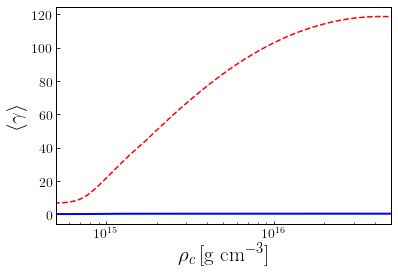

In [42]:
fig, ax = plt.subplots()
plt.plot(rhosc,gamma_crs1,lw='1.5',color='r',linestyle='--',label=r'$\gamma_{cr}$')
plt.plot(rhosc,gamma_efs1,lw='2.0',color='blue',label=r'$\langle \gamma \rangle$')

plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$\langle \gamma \rangle$')

plt.xscale('log')
plt.xlim(left=10**(14.7),right=10**(16.7))
#plt.ylim(0,10)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')
#l = plt.legend(bbox_to_anchor=(0.85,-0.15), loc="lower right", 
                #bbox_transform=fig.transFigure, ncol=2)



plt.savefig('figures/AdiabaticIndexALF1.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

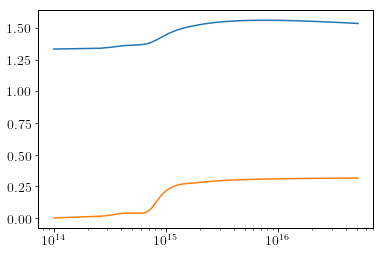

In [25]:
plt.plot(rhosc,gamma_crs2)
plt.plot(rhosc,gamma_efs2)
plt.xscale('log')

## M - $\rho_c$

In [33]:
RALF1,MALF1,rhocALF1=np.loadtxt('results2/alf1/MRrhoc.dat',usecols=(0,1,2),unpack=True)

In [34]:
np.amax(MALF1)

1.49598704948

In [35]:
rhocALF1[np.argmax(MALF1)]

3311311214830000.0

In [36]:
np.log10(rhocALF1[np.argmax(MALF1)])

15.520000000000536

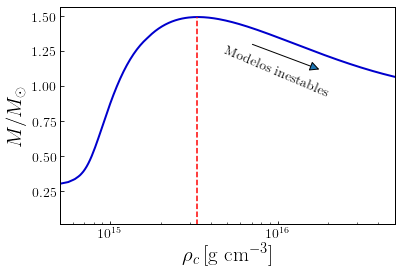

In [41]:
fig, ax = plt.subplots()

plt.plot(rhocALF1,MALF1,color='mediumblue',lw='2.0')
plt.plot([10**(np.log10(rhocALF1[np.argmax(MALF1)])),10**(np.log10(rhocALF1[np.argmax(MALF1)]))],[0.0,np.amax(MALF1)],'r--',lw='1.5')

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)
plt.annotate("", xy=(10**(16.25),1.12), xytext=(10**(15.85),1.3), arrowprops=prop)
#plt.arrow(10**(15.6), 1.38,10**(15.7) ,-0.1 , head_width=0.05, head_length=10**(15))
plt.text(10**(15.67), 1.23, 'Modelos inestables' , fontsize=14,rotation=-23)

plt.xscale('log')
plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.xlim(left=10**(14.7),right=10**(16.7))
plt.ylim(bottom=0.01)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')

plt.savefig('figures/Mrhorel_ALF1.pdf', format='pdf', dpi=1000,bbox_inches="tight")

Máximo = 3.31131121483e+15 

## Tunning the interpolation of the solution

### 14.0

In [3]:
alf1_140=np.loadtxt('results2/alf1/14.0.dat',unpack=True)
alf1_140[3] = alf1_140[3]-alf1_140[3][-1] + 0.5*np.log(1-2*alf1_140[0][-1]/alf1_140[-1][-1])

In [61]:
s1=5e-7
s2=1e-15
alf1_140rho=interpolate.UnivariateSpline(alf1_140[-1], alf1_140[2], k=5, s=s1)
alf1_140drho=interpolate.UnivariateSpline(alf1_140[-1], alf1_140[2], k=5, s=s1).derivative(n=1)
alf1_140ddrho=interpolate.UnivariateSpline(alf1_140[-1], alf1_140[2], k=5, s=s1).derivative(n=2)

alf1_140p=interpolate.UnivariateSpline(alf1_140[-1], alf1_140[1], k=5, s=s2)
alf1_140dp=interpolate.UnivariateSpline(alf1_140[-1], alf1_140[1], k=5, s=s2).derivative(n=1)
alf1_140ddp=interpolate.UnivariateSpline(alf1_140[-1], alf1_140[1], k=5, s=s2).derivative(n=2)

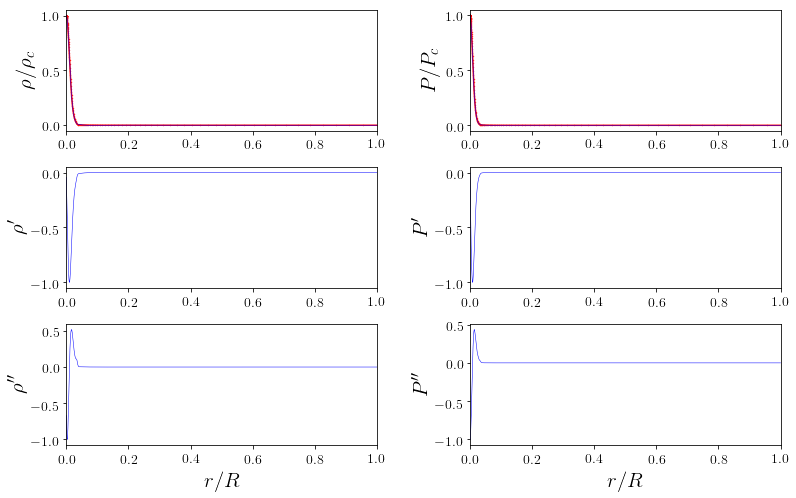

In [66]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(alf1_140[-1]/alf1_140[-1][-1],alf1_140[2]/alf1_140[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(alf1_140[-1]/alf1_140[-1][-1],alf1_140rho(alf1_140[-1])/alf1_140[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(alf1_140[-1]/alf1_140[-1][-1],alf1_140[1]/alf1_140[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(alf1_140[-1]/alf1_140[-1][-1],alf1_140p(alf1_140[-1])/alf1_140[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(alf1_140[-1]/alf1_140[-1][-1],alf1_140drho(alf1_140[-1])/max(abs(alf1_140drho(alf1_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(alf1_140[-1]/alf1_140[-1][-1],alf1_140dp(alf1_140[-1])/max(abs(alf1_140dp(alf1_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(alf1_140[-1]/alf1_140[-1][-1],alf1_140ddrho(alf1_140[-1])/max(abs(alf1_140ddrho(alf1_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(alf1_140[-1]/alf1_140[-1][-1],alf1_140ddp(alf1_140[-1])/max(abs(alf1_140ddp(alf1_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsALF1_140.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 14.5

In [4]:
alf1_145=np.loadtxt('results2/alf1/14.5.dat',unpack=True)
alf1_145[3] = alf1_145[3]-alf1_145[3][-1] + 0.5*np.log(1-2*alf1_145[0][-1]/alf1_145[-1][-1])

In [5]:
s1=1e-7
s2=1e-12
alf1_145rho=interpolate.UnivariateSpline(alf1_145[-1], alf1_145[2], k=5, s=s1)
alf1_145drho=interpolate.UnivariateSpline(alf1_145[-1], alf1_145[2], k=5, s=s1).derivative(n=1)
alf1_145ddrho=interpolate.UnivariateSpline(alf1_145[-1], alf1_145[2], k=5, s=s1).derivative(n=2)

alf1_145p=interpolate.UnivariateSpline(alf1_145[-1], alf1_145[1], k=5, s=s2)
alf1_145dp=interpolate.UnivariateSpline(alf1_145[-1], alf1_145[1], k=5, s=s2).derivative(n=1)
alf1_145ddp=interpolate.UnivariateSpline(alf1_145[-1], alf1_145[1], k=5, s=s2).derivative(n=2)

In [7]:
alf1_145rho(0.4*alf1_145[-1][-1])*rhodim

109585558044080.0

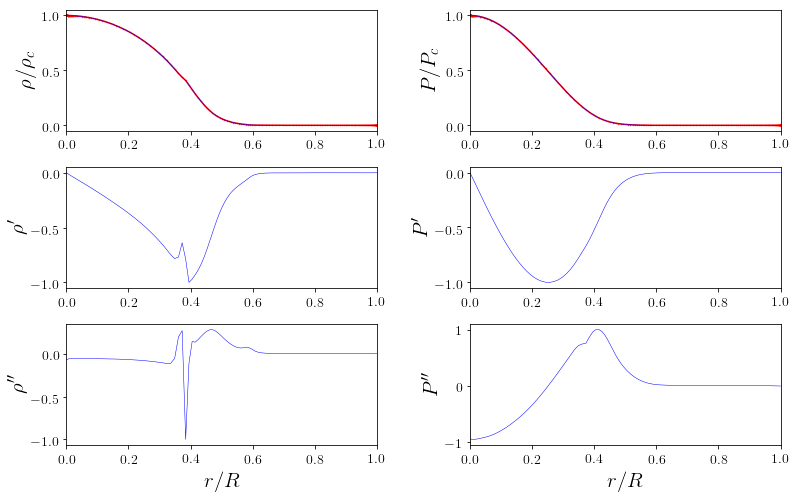

In [106]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(alf1_145[-1]/alf1_145[-1][-1],alf1_145[2]/alf1_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(alf1_145[-1]/alf1_145[-1][-1],alf1_145rho(alf1_145[-1])/alf1_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(alf1_145[-1]/alf1_145[-1][-1],alf1_145[1]/alf1_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(alf1_145[-1]/alf1_145[-1][-1],alf1_145p(alf1_145[-1])/alf1_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(alf1_145[-1]/alf1_145[-1][-1],alf1_145drho(alf1_145[-1])/max(abs(alf1_145drho(alf1_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(alf1_145[-1]/alf1_145[-1][-1],alf1_145dp(alf1_145[-1])/max(abs(alf1_145dp(alf1_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(alf1_145[-1]/alf1_145[-1][-1],alf1_145ddrho(alf1_145[-1])/max(abs(alf1_145ddrho(alf1_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(alf1_145[-1]/alf1_145[-1][-1],alf1_145ddp(alf1_145[-1])/max(abs(alf1_145ddp(alf1_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsALF1_145.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.0

In [5]:
alf1_150=np.loadtxt('results2/alf1/15.0.dat',unpack=True)
alf1_150[3] = alf1_150[3]-alf1_150[3][-1] + 0.5*np.log(1-2*alf1_150[0][-1]/alf1_150[-1][-1])

In [108]:
s1=8e-6
s2=1e-15
alf1_150rho=interpolate.UnivariateSpline(alf1_150[-1], alf1_150[2], k=5, s=s1)
alf1_150drho=interpolate.UnivariateSpline(alf1_150[-1], alf1_150[2], k=5, s=s1).derivative(n=1)
alf1_150ddrho=interpolate.UnivariateSpline(alf1_150[-1], alf1_150[2], k=5, s=s1).derivative(n=2)

alf1_150p=interpolate.UnivariateSpline(alf1_150[-1], alf1_150[1], k=5, s=s2)
alf1_150dp=interpolate.UnivariateSpline(alf1_150[-1], alf1_150[1], k=5, s=s2).derivative(n=1)
alf1_150ddp=interpolate.UnivariateSpline(alf1_150[-1], alf1_150[1], k=5, s=s2).derivative(n=2)

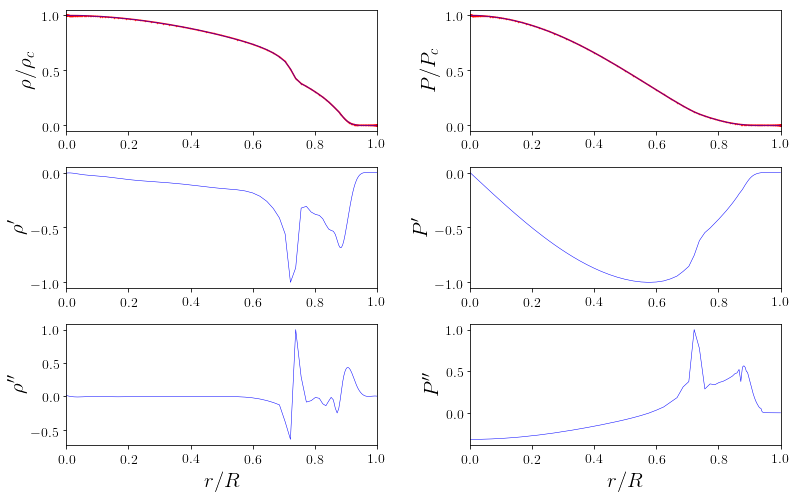

In [109]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(alf1_150[-1]/alf1_150[-1][-1],alf1_150[2]/alf1_150[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(alf1_150[-1]/alf1_150[-1][-1],alf1_150rho(alf1_150[-1])/alf1_150[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(alf1_150[-1]/alf1_150[-1][-1],alf1_150[1]/alf1_150[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(alf1_150[-1]/alf1_150[-1][-1],alf1_150p(alf1_150[-1])/alf1_150[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(alf1_150[-1]/alf1_150[-1][-1],alf1_150drho(alf1_150[-1])/max(abs(alf1_150drho(alf1_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(alf1_150[-1]/alf1_150[-1][-1],alf1_150dp(alf1_150[-1])/max(abs(alf1_150dp(alf1_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(alf1_150[-1]/alf1_150[-1][-1],alf1_150ddrho(alf1_150[-1])/max(abs(alf1_150ddrho(alf1_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(alf1_150[-1]/alf1_150[-1][-1],alf1_150ddp(alf1_150[-1])/max(abs(alf1_150ddp(alf1_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsALF1_150.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.5

In [6]:
alf1_155=np.loadtxt('results/alf1/15.5.dat',unpack=True)
alf1_155[3] = alf1_155[3]-alf1_155[3][-1] + 0.5*np.log(1-2*alf1_155[0][-1]/alf1_155[-1][-1])

In [52]:
s1=1e-5
s2=1e-9
alf1_155rho=interpolate.UnivariateSpline(alf1_155[-1], alf1_155[2], k=5, s=s1)
alf1_155drho=interpolate.UnivariateSpline(alf1_155[-1], alf1_155[2], k=5, s=s1).derivative(n=1)
alf1_155ddrho=interpolate.UnivariateSpline(alf1_155[-1], alf1_155[2], k=5, s=s1).derivative(n=2)

alf1_155p=interpolate.UnivariateSpline(alf1_155[-1], alf1_155[1], k=5, s=s2)
alf1_155dp=interpolate.UnivariateSpline(alf1_155[-1], alf1_155[1], k=5, s=s2).derivative(n=1)
alf1_155ddp=interpolate.UnivariateSpline(alf1_155[-1], alf1_155[1], k=5, s=s2).derivative(n=2)

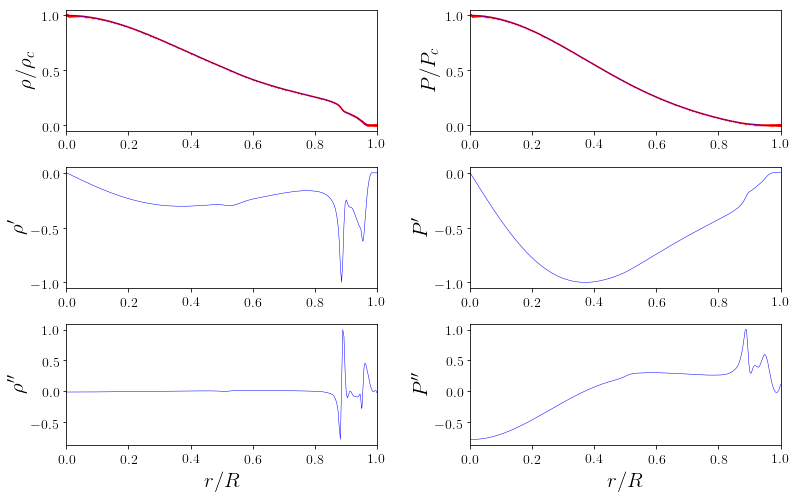

In [69]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(alf1_155[-1]/alf1_155[-1][-1],alf1_155[2]/alf1_155[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(alf1_155[-1]/alf1_155[-1][-1],alf1_155rho(alf1_155[-1])/alf1_155[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(alf1_155[-1]/alf1_155[-1][-1],alf1_155[1]/alf1_155[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(alf1_155[-1]/alf1_155[-1][-1],alf1_155p(alf1_155[-1])/alf1_155[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(alf1_155[-1]/alf1_155[-1][-1],alf1_155drho(alf1_155[-1])/max(abs(alf1_155drho(alf1_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(alf1_155[-1]/alf1_155[-1][-1],alf1_155dp(alf1_155[-1])/max(abs(alf1_155dp(alf1_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(alf1_155[-1]/alf1_155[-1][-1],alf1_155ddrho(alf1_155[-1])/max(abs(alf1_155ddrho(alf1_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(alf1_155[-1]/alf1_155[-1][-1],alf1_155ddp(alf1_155[-1])/max(abs(alf1_155ddp(alf1_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsALF1_155.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Comparision

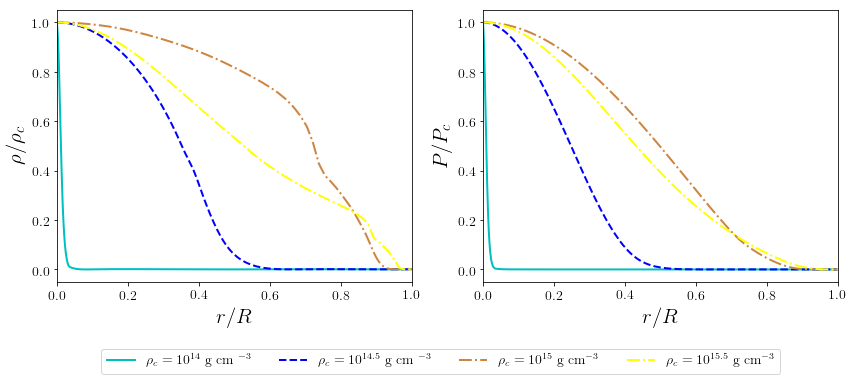

In [91]:
fig = plt.figure(figsize=[14,5])

plt.subplot(121)

plt.plot(alf1_140[-1]/alf1_140[-1][-1],alf1_140rho(alf1_140[-1])/alf1_140[2][0],color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$') 

plt.plot(alf1_145[-1]/alf1_145[-1][-1],alf1_145rho(alf1_145[-1])/alf1_145[2][0],color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$') 

plt.plot(alf1_150[-1]/alf1_150[-1][-1],alf1_150rho(alf1_150[-1])/alf1_150[2][0],color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm$ ^{-3}$')

plt.plot(alf1_155[-1]/alf1_155[-1][-1],alf1_155rho(alf1_155[-1])/alf1_155[2][0],color='yellow',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15.5}$ g cm$ ^{-3}$')

plt.xlabel(r'$r/R$')
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1.0)


plt.subplot(122)

plt.plot(alf1_140[-1]/alf1_140[-1][-1],alf1_140p(alf1_140[-1])/alf1_140[1][0],color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$') 

plt.plot(alf1_145[-1]/alf1_145[-1][-1],alf1_145p(alf1_145[-1])/alf1_145[1][0],color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$') 

plt.plot(alf1_150[-1]/alf1_150[-1][-1],alf1_150p(alf1_150[-1])/alf1_150[1][0],color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm$ ^{-3}$')

plt.plot(alf1_155[-1]/alf1_155[-1][-1],alf1_155p(alf1_155[-1])/alf1_155[1][0],color='yellow',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15.5}$ g cm$ ^{-3}$')




l = plt.legend(bbox_to_anchor=(0.85,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=4)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1.0)


plt.savefig('figures/PandRhoALF1.pdf', format='pdf', dpi=1000,bbox_inches="tight")

## Adiabatic convection

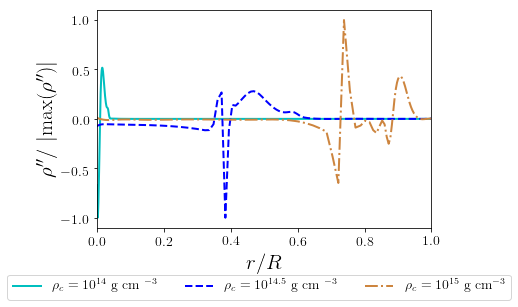

In [114]:
fig = plt.figure()

plt.plot(alf1_140[-1]/alf1_140[-1][-1],alf1_140ddrho(alf1_140[-1])/max(abs(alf1_140ddrho(alf1_140[-1]))),color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$') 
plt.plot(alf1_145[-1]/alf1_145[-1][-1],alf1_145ddrho(alf1_145[-1])/max(abs(alf1_145ddrho(alf1_145[-1]))),color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$') 
plt.plot(alf1_150[-1]/alf1_150[-1][-1],alf1_150ddrho(alf1_150[-1])/max(abs(alf1_150ddrho(alf1_150[-1]))),color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm$ ^{-3}$')

#plt.plot(alf1_155[-1]/alf1_155[-1][-1],alf1_155drho(alf1_155[-1])/max(abs(alf1_155drho(alf1_140[-1]))),color='yellow',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15.5}$ g cm$ ^{-3}$')

l = plt.legend(bbox_to_anchor=(1.1,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$\rho^{\prime \prime}/$ $|$max$(\rho^{\prime \prime})|$')
plt.xlim(0,1.0)

plt.savefig('figures/ConvecStabilityALF1.pdf', format='pdf', dpi=1000,bbox_inches="tight")


## Cracking

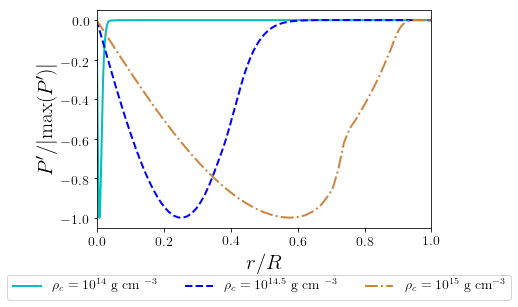

In [115]:
fig = plt.figure()

plt.plot(alf1_140[-1]/alf1_140[-1][-1],alf1_140dp(alf1_140[-1])/max(abs(alf1_140dp(alf1_140[-1]))),color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$') 
plt.plot(alf1_145[-1]/alf1_145[-1][-1],alf1_145dp(alf1_145[-1])/max(abs(alf1_145dp(alf1_145[-1]))),color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$') 
plt.plot(alf1_150[-1]/alf1_150[-1][-1],alf1_150dp(alf1_150[-1])/max(abs(alf1_150dp(alf1_150[-1]))),color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm$ ^{-3}$')

#plt.plot(alf1_155[-1]/alf1_155[-1][-1],alf1_155drho(alf1_155[-1])/max(abs(alf1_155drho(alf1_140[-1]))),color='yellow',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15.5}$ g cm$ ^{-3}$')

l = plt.legend(bbox_to_anchor=(1.1,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$P^{\prime}/|$max$(P^{\prime})|$')
plt.xlim(0,1.0)

plt.savefig('figures/CrackStabilityALF1.pdf', format='pdf', dpi=1000,bbox_inches="tight")


## Redshift

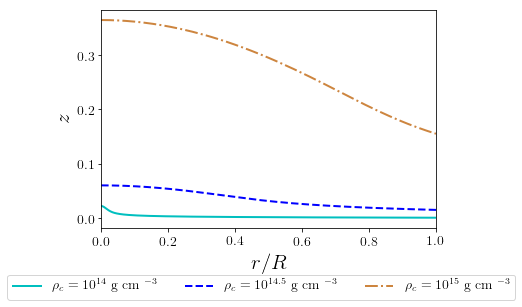

In [7]:
fig = plt.figure()

plt.plot(alf1_140[-1]/alf1_140[-1][-1],np.exp(-alf1_140[3])-1.0,color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$')
plt.plot(alf1_145[-1]/alf1_145[-1][-1],np.exp(-alf1_145[3])-1.0,color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$')
plt.plot(alf1_150[-1]/alf1_150[-1][-1],np.exp(-alf1_150[3])-1.0,color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm $^{-3}$')

l = plt.legend(bbox_to_anchor=(1.1,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$z$')
plt.xlim(0,1.0)

plt.savefig('figures/RedshiftALF1.pdf', format='pdf', dpi=1000,bbox_inches="tight")

# ALF2 --------------------------------------------------------------------------------------

In [13]:
rhoALF2,PALF2,nALF2=np.loadtxt('EOS/alf2.dat',usecols=(2,1,0),unpack=True)

## Dominant energy condition

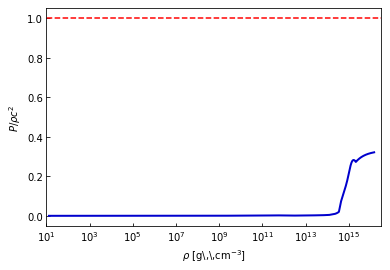

<Figure size 432x288 with 0 Axes>

In [14]:
fig, ax = plt.subplots()
plt.plot(nALF2,np.divide(PALF2,rhoALF2),lw='2',color='mediumblue')
plt.plot([0,10**(17)],[1.0,1.0],'r--',lw='1.5')

ax.set_xscale("log")
#locmaj = matplotlib.ticker.LogLocator(base=10.0,numticks=16) 
#ax.xaxis.set_major_locator(locmaj)


plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ P / \rho c^2 $')
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=16)
#ax.xaxis.set_minor_locator(locmin)
#ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
#plt.ylim(0,1)
plt.savefig('figures/ECALF2.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

## Speed of sound

In [73]:
vsquared=interpolate.UnivariateSpline(rhoALF2, PALF2, k=3, s=1e-15).derivative(n=1)

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


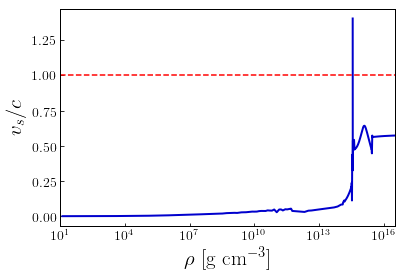

In [74]:
fig, ax = plt.subplots()
plt.plot(rhoALF2,np.sqrt(vsquared(rhoALF2)),lw='2.0',color='mediumblue')
plt.plot([1e+1,10**(16.5)],[1.0,1.0],'r--',lw='1.5')
plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ v_s / c $')
plt.xscale('log')
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#mpl.rcParams['axes.linewidth'] = 1.4
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
plt.savefig('figures/SSALF2.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Adiabatic Index

In [17]:
Gamma=np.multiply(np.divide(np.add(rhoALF2,PALF2),PALF2),vsquared(rhoALF2))

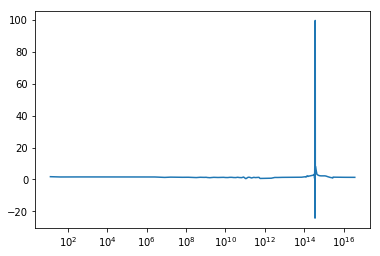

In [18]:
plt.plot(rhoALF2,Gamma)
plt.xscale('log')

$$ \langle\gamma\rangle=\frac{\int_{0}^{R} e^{(\lambda+3 \nu) } \gamma(r) P(r) r^{2} d r}{\int_{0}^{R} e^{(\lambda+3 \nu) } P(r) r^{2} d r} $$

Listing all the models calculated

In [75]:
owd=os.getcwd()
path=os.chdir('results2/alf2')
listOfEntries= os.scandir(path)
models_ALF2 = []
for entry in listOfEntries:
    if '1' in entry.name:
        models_ALF2.append(entry.name)
os.chdir(owd)
models_ALF2.sort()

In [77]:
gamma_efs1 = []
gamma_efs2 = []
gamma_crs1 = []
gamma_crs2 = []
rhosc= []
for model in models_ALF2:
    m, P, rho, nu, lambd, r = np.loadtxt('results2/alf2/' + model ,unpack=True)
    nu = nu - nu[-1] + 0.5*np.log(1-2*m[-1]/r[-1])
    #lambd = np.zeros_like(r)
    #for i in range((r.shape)[0]):
    #    if i==0:
    #        lambd[i] = 0
    #    else:
    #        lambd[i] = 0.5*np.log(1/(1-2*m[i]/r[i]))
    drho=interpolate.UnivariateSpline(r, rho, k=5, s=0).derivative(n=1)
    dP=interpolate.UnivariateSpline(r, P, k=5, s=0).derivative(n=1)
    gamma = np.divide(dP(r),drho(r))
    gamma_ef1 = integrate.trapz(np.exp(lambd+3*nu)*gamma*P*(r**2),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t1 = (1/36)*integrate.trapz(np.exp((lambd+3*nu))*(16*P+(np.exp(2*lambd)-1)*(P+rho))*(np.exp(2*lambd)-1)*(r**2))/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t2 = (4*np.pi/9)*integrate.trapz(np.exp(3*lambd+3*nu)*(8*P + (np.exp(2*lambd)+1)*(P+rho))*P*(r**4),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t3 = ((16*np.pi**2)/9)*integrate.trapz(np.exp(5*lambd+3*nu)*(P+rho)*(P**2)*(r**6),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    gamma_cr1 = 4/3 + t1 + t2 + t3
    gamma_efs1.append(gamma_ef1)
    gamma_crs1.append(gamma_cr1)
    gamma_ef2 = integrate.trapz(gamma*P*r**2,r)/integrate.trapz(P*r**2,r)
    gamma_cr2 = 4/3 + (19/42)*2*m[-1]/r[-1]
    gamma_efs2.append(gamma_ef2)
    gamma_crs2.append(gamma_cr2)
    rhosc.append(rho[0]*rhodim)

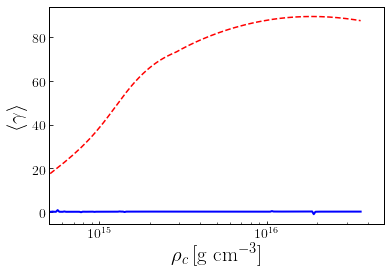

In [78]:
fig, ax = plt.subplots()
plt.plot(rhosc,gamma_crs1,lw='1.5',color='r',linestyle='--',label=r'$\gamma_{cr}$')
plt.plot(rhosc,gamma_efs1,lw='2.0',color='blue',label=r'$\langle \gamma \rangle$')

plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$\langle \gamma \rangle$')

plt.xscale('log')
plt.xlim(left=10**(14.7),right=10**(16.7))
#plt.ylim(0,10)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')
#l = plt.legend(bbox_to_anchor=(0.85,-0.15), loc="lower right", 
                #bbox_transform=fig.transFigure, ncol=2)



plt.savefig('figures/AdiabaticIndexALF2.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

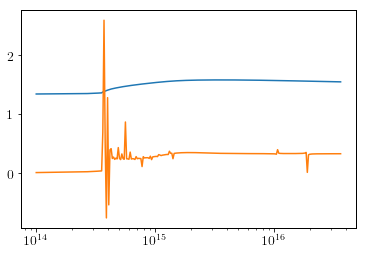

In [79]:
plt.plot(rhosc,gamma_crs2)
plt.plot(rhosc,gamma_efs2)
plt.xscale('log')

## M - $\rho_c$

In [80]:
RALF2,MALF2,rhocALF2=np.loadtxt('results2/alf2/MRrhoc.dat',usecols=(0,1,2),unpack=True)

In [81]:
np.amax(MALF2)

2.08698950776

In [82]:
rhocALF2[np.argmax(MALF2)]

1949844599760000.0

In [83]:
np.log10(rhocALF2[np.argmax(MALF2)])

15.290000000000436

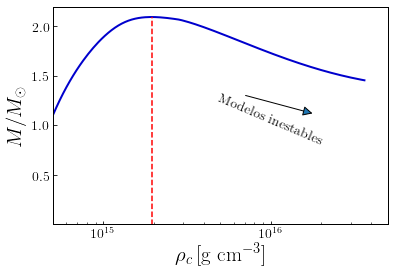

In [84]:
fig, ax = plt.subplots()

plt.plot(rhocALF2,MALF2,color='mediumblue',lw='2.0')
plt.plot([10**(np.log10(rhocALF2[np.argmax(MALF2)])),10**(np.log10(rhocALF2[np.argmax(MALF2)]))],[0.0,np.amax(MALF2)],'r--',lw='1.5')

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)
plt.annotate("", xy=(10**(16.25),1.12), xytext=(10**(15.85),1.3), arrowprops=prop)
#plt.arrow(10**(15.6), 1.38,10**(15.7) ,-0.1 , head_width=0.05, head_length=10**(15))
plt.text(10**(15.67), 1.23, 'Modelos inestables' , fontsize=14,rotation=-23)

plt.xscale('log')
plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.xlim(left=10**(14.7),right=10**(16.7))
plt.ylim(bottom=0.01)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')

plt.savefig('figures/Mrhorel_ALF2.pdf', format='pdf', dpi=1000,bbox_inches="tight")

Máximo = 3.31131121483e+15 

## Tunning the interpolation of the solution

### 14.0

In [87]:
ALF2_140=np.loadtxt('results2/alf2/14.0.dat',unpack=True)
ALF2_140[3] = ALF2_140[3]-ALF2_140[3][-1] + 0.5*np.log(1-2*ALF2_140[0][-1]/ALF2_140[-1][-1])

In [88]:
s1=5e-7
s2=1e-15
ALF2_140rho=interpolate.UnivariateSpline(ALF2_140[-1], ALF2_140[2], k=5, s=s1)
ALF2_140drho=interpolate.UnivariateSpline(ALF2_140[-1], ALF2_140[2], k=5, s=s1).derivative(n=1)
ALF2_140ddrho=interpolate.UnivariateSpline(ALF2_140[-1], ALF2_140[2], k=5, s=s1).derivative(n=2)

ALF2_140p=interpolate.UnivariateSpline(ALF2_140[-1], ALF2_140[1], k=5, s=s2)
ALF2_140dp=interpolate.UnivariateSpline(ALF2_140[-1], ALF2_140[1], k=5, s=s2).derivative(n=1)
ALF2_140ddp=interpolate.UnivariateSpline(ALF2_140[-1], ALF2_140[1], k=5, s=s2).derivative(n=2)

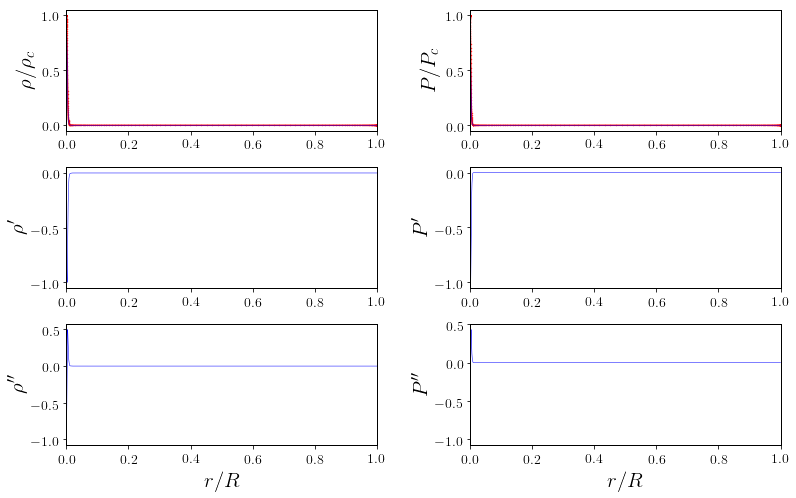

In [89]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ALF2_140[-1]/ALF2_140[-1][-1],ALF2_140[2]/ALF2_140[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ALF2_140[-1]/ALF2_140[-1][-1],ALF2_140rho(ALF2_140[-1])/ALF2_140[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ALF2_140[-1]/ALF2_140[-1][-1],ALF2_140[1]/ALF2_140[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ALF2_140[-1]/ALF2_140[-1][-1],ALF2_140p(ALF2_140[-1])/ALF2_140[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ALF2_140[-1]/ALF2_140[-1][-1],ALF2_140drho(ALF2_140[-1])/max(abs(ALF2_140drho(ALF2_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ALF2_140[-1]/ALF2_140[-1][-1],ALF2_140dp(ALF2_140[-1])/max(abs(ALF2_140dp(ALF2_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ALF2_140[-1]/ALF2_140[-1][-1],ALF2_140ddrho(ALF2_140[-1])/max(abs(ALF2_140ddrho(ALF2_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ALF2_140[-1]/ALF2_140[-1][-1],ALF2_140ddp(ALF2_140[-1])/max(abs(ALF2_140ddp(ALF2_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsALF2_140.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 14.5

In [90]:
ALF2_145=np.loadtxt('results2/alf2/14.5.dat',unpack=True)
ALF2_145[3] = ALF2_145[3]-ALF2_145[3][-1] + 0.5*np.log(1-2*ALF2_145[0][-1]/ALF2_145[-1][-1])

In [91]:
s1=1e-7
s2=1e-12
ALF2_145rho=interpolate.UnivariateSpline(ALF2_145[-1], ALF2_145[2], k=5, s=s1)
ALF2_145drho=interpolate.UnivariateSpline(ALF2_145[-1], ALF2_145[2], k=5, s=s1).derivative(n=1)
ALF2_145ddrho=interpolate.UnivariateSpline(ALF2_145[-1], ALF2_145[2], k=5, s=s1).derivative(n=2)

ALF2_145p=interpolate.UnivariateSpline(ALF2_145[-1], ALF2_145[1], k=5, s=s2)
ALF2_145dp=interpolate.UnivariateSpline(ALF2_145[-1], ALF2_145[1], k=5, s=s2).derivative(n=1)
ALF2_145ddp=interpolate.UnivariateSpline(ALF2_145[-1], ALF2_145[1], k=5, s=s2).derivative(n=2)

In [92]:
ALF2_145rho(0.4*ALF2_145[-1][-1])*rhodim

109585558044080.0

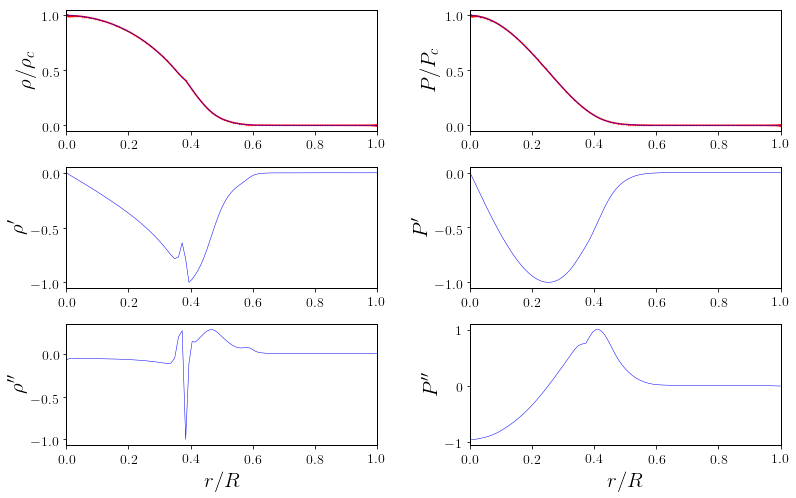

In [93]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ALF2_145[-1]/ALF2_145[-1][-1],ALF2_145[2]/ALF2_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ALF2_145[-1]/ALF2_145[-1][-1],ALF2_145rho(ALF2_145[-1])/ALF2_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ALF2_145[-1]/ALF2_145[-1][-1],ALF2_145[1]/ALF2_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ALF2_145[-1]/ALF2_145[-1][-1],ALF2_145p(ALF2_145[-1])/ALF2_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ALF2_145[-1]/ALF2_145[-1][-1],ALF2_145drho(ALF2_145[-1])/max(abs(ALF2_145drho(ALF2_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ALF2_145[-1]/ALF2_145[-1][-1],ALF2_145dp(ALF2_145[-1])/max(abs(ALF2_145dp(ALF2_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ALF2_145[-1]/ALF2_145[-1][-1],ALF2_145ddrho(ALF2_145[-1])/max(abs(ALF2_145ddrho(ALF2_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ALF2_145[-1]/ALF2_145[-1][-1],ALF2_145ddp(ALF2_145[-1])/max(abs(ALF2_145ddp(ALF2_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsALF2_145.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.0

In [94]:
ALF2_150=np.loadtxt('results2/alf2/15.0.dat',unpack=True)
ALF2_150[3] = ALF2_150[3]-ALF2_150[3][-1] + 0.5*np.log(1-2*ALF2_150[0][-1]/ALF2_150[-1][-1])

In [95]:
s1=8e-6
s2=1e-15
ALF2_150rho=interpolate.UnivariateSpline(ALF2_150[-1], ALF2_150[2], k=5, s=s1)
ALF2_150drho=interpolate.UnivariateSpline(ALF2_150[-1], ALF2_150[2], k=5, s=s1).derivative(n=1)
ALF2_150ddrho=interpolate.UnivariateSpline(ALF2_150[-1], ALF2_150[2], k=5, s=s1).derivative(n=2)

ALF2_150p=interpolate.UnivariateSpline(ALF2_150[-1], ALF2_150[1], k=5, s=s2)
ALF2_150dp=interpolate.UnivariateSpline(ALF2_150[-1], ALF2_150[1], k=5, s=s2).derivative(n=1)
ALF2_150ddp=interpolate.UnivariateSpline(ALF2_150[-1], ALF2_150[1], k=5, s=s2).derivative(n=2)

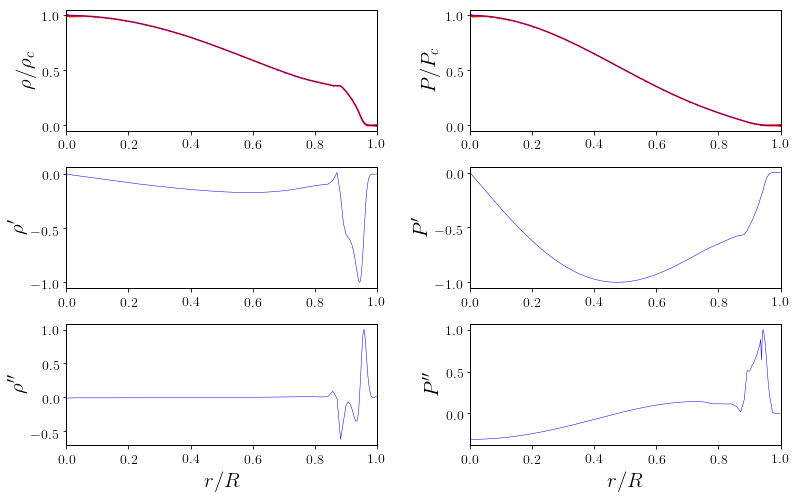

In [96]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ALF2_150[-1]/ALF2_150[-1][-1],ALF2_150[2]/ALF2_150[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ALF2_150[-1]/ALF2_150[-1][-1],ALF2_150rho(ALF2_150[-1])/ALF2_150[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ALF2_150[-1]/ALF2_150[-1][-1],ALF2_150[1]/ALF2_150[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ALF2_150[-1]/ALF2_150[-1][-1],ALF2_150p(ALF2_150[-1])/ALF2_150[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ALF2_150[-1]/ALF2_150[-1][-1],ALF2_150drho(ALF2_150[-1])/max(abs(ALF2_150drho(ALF2_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ALF2_150[-1]/ALF2_150[-1][-1],ALF2_150dp(ALF2_150[-1])/max(abs(ALF2_150dp(ALF2_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ALF2_150[-1]/ALF2_150[-1][-1],ALF2_150ddrho(ALF2_150[-1])/max(abs(ALF2_150ddrho(ALF2_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ALF2_150[-1]/ALF2_150[-1][-1],ALF2_150ddp(ALF2_150[-1])/max(abs(ALF2_150ddp(ALF2_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsALF2_150.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.5

In [97]:
ALF2_155=np.loadtxt('results/alf2/15.5.dat',unpack=True)
ALF2_155[3] = ALF2_155[3]-ALF2_155[3][-1] + 0.5*np.log(1-2*ALF2_155[0][-1]/ALF2_155[-1][-1])

In [98]:
s1=1e-5
s2=1e-9
ALF2_155rho=interpolate.UnivariateSpline(ALF2_155[-1], ALF2_155[2], k=5, s=s1)
ALF2_155drho=interpolate.UnivariateSpline(ALF2_155[-1], ALF2_155[2], k=5, s=s1).derivative(n=1)
ALF2_155ddrho=interpolate.UnivariateSpline(ALF2_155[-1], ALF2_155[2], k=5, s=s1).derivative(n=2)

ALF2_155p=interpolate.UnivariateSpline(ALF2_155[-1], ALF2_155[1], k=5, s=s2)
ALF2_155dp=interpolate.UnivariateSpline(ALF2_155[-1], ALF2_155[1], k=5, s=s2).derivative(n=1)
ALF2_155ddp=interpolate.UnivariateSpline(ALF2_155[-1], ALF2_155[1], k=5, s=s2).derivative(n=2)

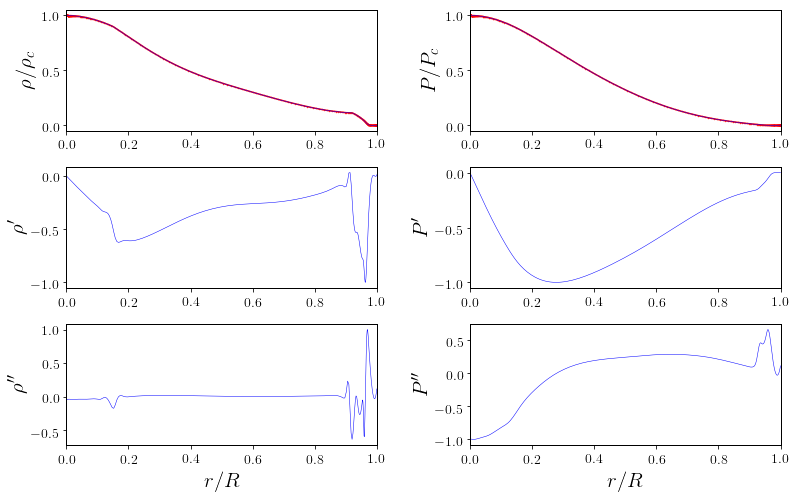

In [99]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ALF2_155[-1]/ALF2_155[-1][-1],ALF2_155[2]/ALF2_155[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ALF2_155[-1]/ALF2_155[-1][-1],ALF2_155rho(ALF2_155[-1])/ALF2_155[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ALF2_155[-1]/ALF2_155[-1][-1],ALF2_155[1]/ALF2_155[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ALF2_155[-1]/ALF2_155[-1][-1],ALF2_155p(ALF2_155[-1])/ALF2_155[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ALF2_155[-1]/ALF2_155[-1][-1],ALF2_155drho(ALF2_155[-1])/max(abs(ALF2_155drho(ALF2_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ALF2_155[-1]/ALF2_155[-1][-1],ALF2_155dp(ALF2_155[-1])/max(abs(ALF2_155dp(ALF2_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ALF2_155[-1]/ALF2_155[-1][-1],ALF2_155ddrho(ALF2_155[-1])/max(abs(ALF2_155ddrho(ALF2_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ALF2_155[-1]/ALF2_155[-1][-1],ALF2_155ddp(ALF2_155[-1])/max(abs(ALF2_155ddp(ALF2_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsALF2_155.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Redshift

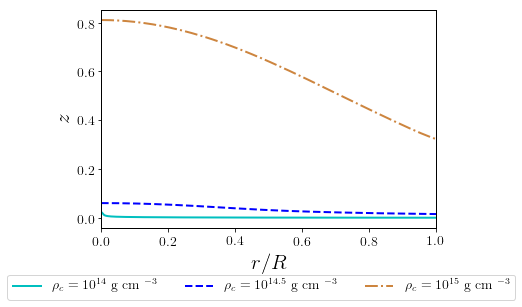

In [129]:
fig = plt.figure()

plt.plot(ALF2_140[-1]/ALF2_140[-1][-1],np.exp(-ALF2_140[3])-1.0,color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$')
plt.plot(ALF2_145[-1]/ALF2_145[-1][-1],np.exp(-ALF2_145[3])-1.0,color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$')
plt.plot(ALF2_150[-1]/ALF2_150[-1][-1],np.exp(-ALF2_150[3])-1.0,color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm $^{-3}$')

l = plt.legend(bbox_to_anchor=(1.1,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$z$')
plt.xlim(0,1.0)

plt.savefig('figures/RedshiftALF2.pdf', format='pdf', dpi=1000,bbox_inches="tight")

# ALF3 --------------------------------------------------------------------------------------

In [100]:
rhoALF3,PALF3,nALF3=np.loadtxt('EOS/alf3.dat',usecols=(2,1,0),unpack=True)

## Dominant energy condition

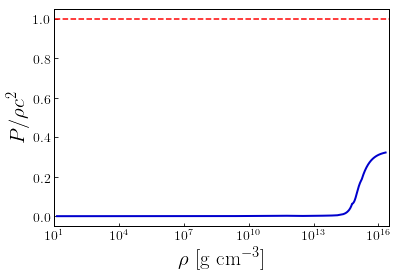

<Figure size 432x288 with 0 Axes>

In [101]:
fig, ax = plt.subplots()
plt.plot(nALF3,np.divide(PALF3,rhoALF3),lw='2',color='mediumblue')
plt.plot([0,10**(17)],[1.0,1.0],'r--',lw='1.5')

ax.set_xscale("log")
#locmaj = matplotlib.ticker.LogLocator(base=10.0,numticks=16) 
#ax.xaxis.set_major_locator(locmaj)


plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ P / \rho c^2 $')
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=16)
#ax.xaxis.set_minor_locator(locmin)
#ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
#plt.ylim(0,1)
plt.savefig('figures/ECALF3.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

## Speed of sound

In [114]:
vsquared=interpolate.UnivariateSpline(rhoALF3, PALF3, k=3, s=1e-15).derivative(n=1)

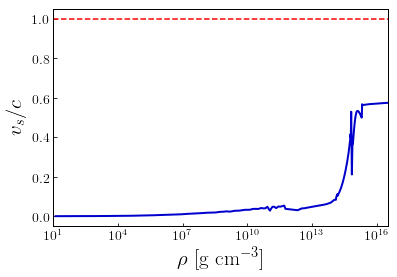

In [115]:
fig, ax = plt.subplots()
plt.plot(rhoALF3,np.sqrt(vsquared(rhoALF3)),lw='2.0',color='mediumblue')
plt.plot([1e+1,10**(16.5)],[1.0,1.0],'r--',lw='1.5')
plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ v_s / c $')
plt.xscale('log')
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#mpl.rcParams['axes.linewidth'] = 1.4
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
plt.savefig('figures/SSALF3.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Adiabatic Index

In [116]:
Gamma=np.multiply(np.divide(np.add(rhoALF3,PALF3),PALF3),vsquared(rhoALF3))

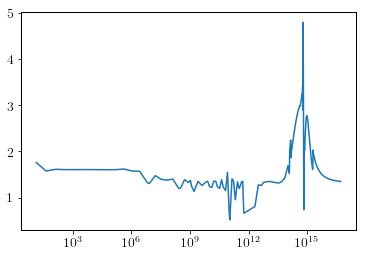

In [117]:
plt.plot(rhoALF3,Gamma)
plt.xscale('log')

$$ \langle\gamma\rangle=\frac{\int_{0}^{R} e^{(\lambda+3 \nu) } \gamma(r) P(r) r^{2} d r}{\int_{0}^{R} e^{(\lambda+3 \nu) } P(r) r^{2} d r} $$

Listing all the models calculated

In [119]:
owd=os.getcwd()
path=os.chdir('results2/alf3')
listOfEntries= os.scandir(path)
models_ALF3 = []
for entry in listOfEntries:
    if '1' in entry.name:
        models_ALF3.append(entry.name)
os.chdir(owd)
models_ALF3.sort()

In [121]:
gamma_efs1 = []
gamma_efs2 = []
gamma_crs1 = []
gamma_crs2 = []
rhosc= []
for model in models_ALF3:
    m, P, rho, nu, lambd, r = np.loadtxt('results2/alf3/' + model ,unpack=True)
    nu = nu - nu[-1] + 0.5*np.log(1-2*m[-1]/r[-1])
    #lambd = np.zeros_like(r)
    #for i in range((r.shape)[0]):
    #    if i==0:
    #        lambd[i] = 0
    #    else:
    #        lambd[i] = 0.5*np.log(1/(1-2*m[i]/r[i]))
    drho=interpolate.UnivariateSpline(r, rho, k=5, s=0).derivative(n=1)
    dP=interpolate.UnivariateSpline(r, P, k=5, s=0).derivative(n=1)
    gamma = np.divide(dP(r),drho(r))
    gamma_ef1 = integrate.trapz(np.exp(lambd+3*nu)*gamma*P*(r**2),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t1 = (1/36)*integrate.trapz(np.exp((lambd+3*nu))*(16*P+(np.exp(2*lambd)-1)*(P+rho))*(np.exp(2*lambd)-1)*(r**2))/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t2 = (4*np.pi/9)*integrate.trapz(np.exp(3*lambd+3*nu)*(8*P + (np.exp(2*lambd)+1)*(P+rho))*P*(r**4),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t3 = ((16*np.pi**2)/9)*integrate.trapz(np.exp(5*lambd+3*nu)*(P+rho)*(P**2)*(r**6),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    gamma_cr1 = 4/3 + t1 + t2 + t3
    gamma_efs1.append(gamma_ef1)
    gamma_crs1.append(gamma_cr1)
    gamma_ef2 = integrate.trapz(gamma*P*r**2,r)/integrate.trapz(P*r**2,r)
    gamma_cr2 = 4/3 + (19/42)*2*m[-1]/r[-1]
    gamma_efs2.append(gamma_ef2)
    gamma_crs2.append(gamma_cr2)
    rhosc.append(rho[0]*rhodim)

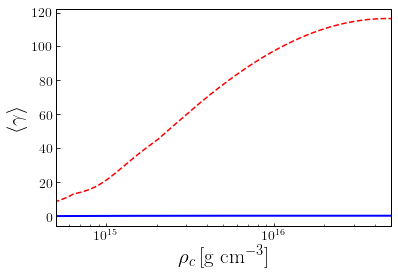

In [122]:
fig, ax = plt.subplots()
plt.plot(rhosc,gamma_crs1,lw='1.5',color='r',linestyle='--',label=r'$\gamma_{cr}$')
plt.plot(rhosc,gamma_efs1,lw='2.0',color='blue',label=r'$\langle \gamma \rangle$')

plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$\langle \gamma \rangle$')

plt.xscale('log')
plt.xlim(left=10**(14.7),right=10**(16.7))
#plt.ylim(0,10)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')
#l = plt.legend(bbox_to_anchor=(0.85,-0.15), loc="lower right", 
                #bbox_transform=fig.transFigure, ncol=2)



plt.savefig('figures/AdiabaticIndexALF3.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

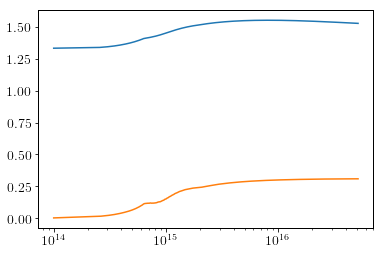

In [123]:
plt.plot(rhosc,gamma_crs2)
plt.plot(rhosc,gamma_efs2)
plt.xscale('log')

## M - $\rho_c$

In [124]:
RALF3,MALF3,rhocALF3=np.loadtxt('results2/alf3/MRrhoc.dat',usecols=(0,1,2),unpack=True)

In [125]:
np.amax(MALF3)

1.4733652092

In [126]:
rhocALF3[np.argmax(MALF3)]

3235936569300000.0

In [127]:
np.log10(rhocALF3[np.argmax(MALF3)])

15.510000000000499

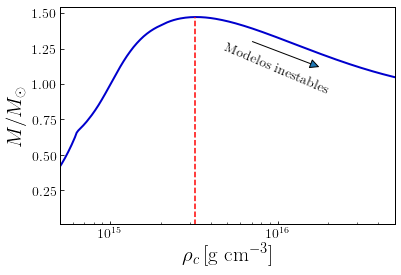

In [128]:
fig, ax = plt.subplots()

plt.plot(rhocALF3,MALF3,color='mediumblue',lw='2.0')
plt.plot([10**(np.log10(rhocALF3[np.argmax(MALF3)])),10**(np.log10(rhocALF3[np.argmax(MALF3)]))],[0.0,np.amax(MALF3)],'r--',lw='1.5')

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)
plt.annotate("", xy=(10**(16.25),1.12), xytext=(10**(15.85),1.3), arrowprops=prop)
#plt.arrow(10**(15.6), 1.38,10**(15.7) ,-0.1 , head_width=0.05, head_length=10**(15))
plt.text(10**(15.67), 1.23, 'Modelos inestables' , fontsize=14,rotation=-23)

plt.xscale('log')
plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.xlim(left=10**(14.7),right=10**(16.7))
plt.ylim(bottom=0.01)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')

plt.savefig('figures/Mrhorel_ALF3.pdf', format='pdf', dpi=1000,bbox_inches="tight")

## Tunning the interpolation of the solution

### 14.0

In [135]:
ALF3_140=np.loadtxt('results2/alf3/14.0.dat',unpack=True)
ALF3_140[3] = ALF3_140[3]-ALF3_140[3][-1] + 0.5*np.log(1-2*ALF3_140[0][-1]/ALF3_140[-1][-1])

In [136]:
s1=5e-7
s2=1e-15
ALF3_140rho=interpolate.UnivariateSpline(ALF3_140[-1], ALF3_140[2], k=5, s=s1)
ALF3_140drho=interpolate.UnivariateSpline(ALF3_140[-1], ALF3_140[2], k=5, s=s1).derivative(n=1)
ALF3_140ddrho=interpolate.UnivariateSpline(ALF3_140[-1], ALF3_140[2], k=5, s=s1).derivative(n=2)

ALF3_140p=interpolate.UnivariateSpline(ALF3_140[-1], ALF3_140[1], k=5, s=s2)
ALF3_140dp=interpolate.UnivariateSpline(ALF3_140[-1], ALF3_140[1], k=5, s=s2).derivative(n=1)
ALF3_140ddp=interpolate.UnivariateSpline(ALF3_140[-1], ALF3_140[1], k=5, s=s2).derivative(n=2)

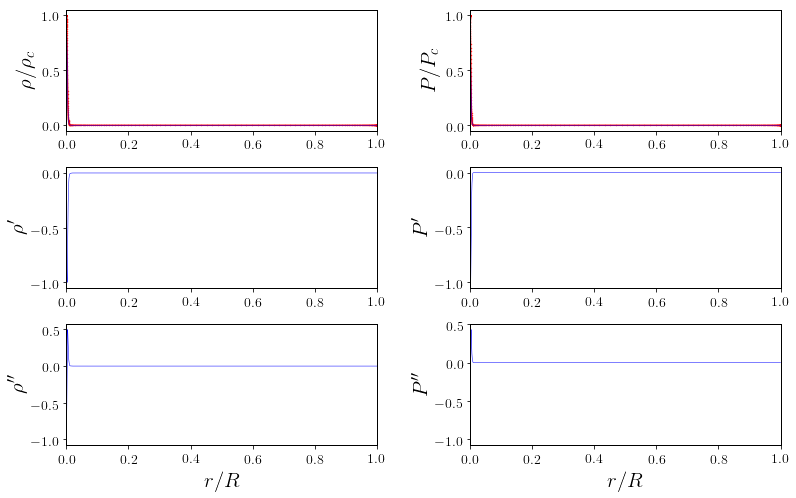

In [137]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ALF3_140[-1]/ALF3_140[-1][-1],ALF3_140[2]/ALF3_140[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ALF3_140[-1]/ALF3_140[-1][-1],ALF3_140rho(ALF3_140[-1])/ALF3_140[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ALF3_140[-1]/ALF3_140[-1][-1],ALF3_140[1]/ALF3_140[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ALF3_140[-1]/ALF3_140[-1][-1],ALF3_140p(ALF3_140[-1])/ALF3_140[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ALF3_140[-1]/ALF3_140[-1][-1],ALF3_140drho(ALF3_140[-1])/max(abs(ALF3_140drho(ALF3_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ALF3_140[-1]/ALF3_140[-1][-1],ALF3_140dp(ALF3_140[-1])/max(abs(ALF3_140dp(ALF3_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ALF3_140[-1]/ALF3_140[-1][-1],ALF3_140ddrho(ALF3_140[-1])/max(abs(ALF3_140ddrho(ALF3_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ALF3_140[-1]/ALF3_140[-1][-1],ALF3_140ddp(ALF3_140[-1])/max(abs(ALF3_140ddp(ALF3_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsALF3_140.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 14.5

In [138]:
ALF3_145=np.loadtxt('results2/alf3/14.5.dat',unpack=True)
ALF3_145[3] = ALF3_145[3]-ALF3_145[3][-1] + 0.5*np.log(1-2*ALF3_145[0][-1]/ALF3_145[-1][-1])

In [139]:
s1=1e-7
s2=1e-12
ALF3_145rho=interpolate.UnivariateSpline(ALF3_145[-1], ALF3_145[2], k=5, s=s1)
ALF3_145drho=interpolate.UnivariateSpline(ALF3_145[-1], ALF3_145[2], k=5, s=s1).derivative(n=1)
ALF3_145ddrho=interpolate.UnivariateSpline(ALF3_145[-1], ALF3_145[2], k=5, s=s1).derivative(n=2)

ALF3_145p=interpolate.UnivariateSpline(ALF3_145[-1], ALF3_145[1], k=5, s=s2)
ALF3_145dp=interpolate.UnivariateSpline(ALF3_145[-1], ALF3_145[1], k=5, s=s2).derivative(n=1)
ALF3_145ddp=interpolate.UnivariateSpline(ALF3_145[-1], ALF3_145[1], k=5, s=s2).derivative(n=2)

In [140]:
ALF3_145rho(0.4*ALF3_145[-1][-1])*rhodim

109554947563999.22

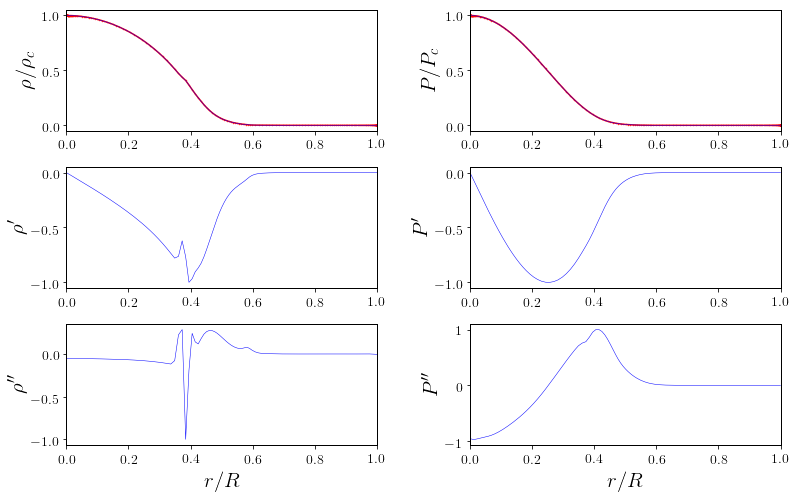

In [141]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ALF3_145[-1]/ALF3_145[-1][-1],ALF3_145[2]/ALF3_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ALF3_145[-1]/ALF3_145[-1][-1],ALF3_145rho(ALF3_145[-1])/ALF3_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ALF3_145[-1]/ALF3_145[-1][-1],ALF3_145[1]/ALF3_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ALF3_145[-1]/ALF3_145[-1][-1],ALF3_145p(ALF3_145[-1])/ALF3_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ALF3_145[-1]/ALF3_145[-1][-1],ALF3_145drho(ALF3_145[-1])/max(abs(ALF3_145drho(ALF3_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ALF3_145[-1]/ALF3_145[-1][-1],ALF3_145dp(ALF3_145[-1])/max(abs(ALF3_145dp(ALF3_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ALF3_145[-1]/ALF3_145[-1][-1],ALF3_145ddrho(ALF3_145[-1])/max(abs(ALF3_145ddrho(ALF3_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ALF3_145[-1]/ALF3_145[-1][-1],ALF3_145ddp(ALF3_145[-1])/max(abs(ALF3_145ddp(ALF3_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsALF3_145.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.0

In [142]:
ALF3_150=np.loadtxt('results2/alf3/15.0.dat',unpack=True)
ALF3_150[3] = ALF3_150[3]-ALF3_150[3][-1] + 0.5*np.log(1-2*ALF3_150[0][-1]/ALF3_150[-1][-1])

In [143]:
s1=8e-6
s2=1e-15
ALF3_150rho=interpolate.UnivariateSpline(ALF3_150[-1], ALF3_150[2], k=5, s=s1)
ALF3_150drho=interpolate.UnivariateSpline(ALF3_150[-1], ALF3_150[2], k=5, s=s1).derivative(n=1)
ALF3_150ddrho=interpolate.UnivariateSpline(ALF3_150[-1], ALF3_150[2], k=5, s=s1).derivative(n=2)

ALF3_150p=interpolate.UnivariateSpline(ALF3_150[-1], ALF3_150[1], k=5, s=s2)
ALF3_150dp=interpolate.UnivariateSpline(ALF3_150[-1], ALF3_150[1], k=5, s=s2).derivative(n=1)
ALF3_150ddp=interpolate.UnivariateSpline(ALF3_150[-1], ALF3_150[1], k=5, s=s2).derivative(n=2)

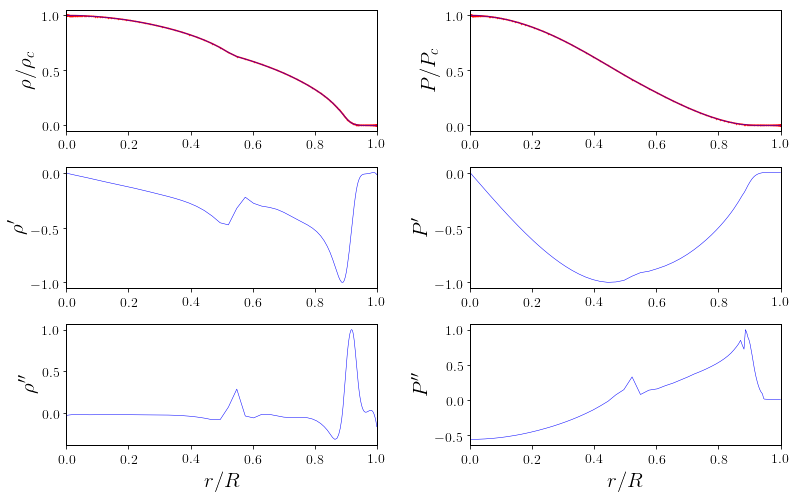

In [144]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ALF3_150[-1]/ALF3_150[-1][-1],ALF3_150[2]/ALF3_150[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ALF3_150[-1]/ALF3_150[-1][-1],ALF3_150rho(ALF3_150[-1])/ALF3_150[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ALF3_150[-1]/ALF3_150[-1][-1],ALF3_150[1]/ALF3_150[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ALF3_150[-1]/ALF3_150[-1][-1],ALF3_150p(ALF3_150[-1])/ALF3_150[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ALF3_150[-1]/ALF3_150[-1][-1],ALF3_150drho(ALF3_150[-1])/max(abs(ALF3_150drho(ALF3_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ALF3_150[-1]/ALF3_150[-1][-1],ALF3_150dp(ALF3_150[-1])/max(abs(ALF3_150dp(ALF3_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ALF3_150[-1]/ALF3_150[-1][-1],ALF3_150ddrho(ALF3_150[-1])/max(abs(ALF3_150ddrho(ALF3_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ALF3_150[-1]/ALF3_150[-1][-1],ALF3_150ddp(ALF3_150[-1])/max(abs(ALF3_150ddp(ALF3_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsALF3_150.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.5

In [318]:
ALF3_155=np.loadtxt('results2/alf3/15.5.dat',unpack=True)
ALF3_155[3] = ALF3_155[3]-ALF3_155[3][-1] + 0.5*np.log(1-2*ALF3_155[0][-1]/ALF3_155[-1][-1])

In [319]:
s1=1e-5
s2=1e-9
ALF3_155rho=interpolate.UnivariateSpline(ALF3_155[-1], ALF3_155[2], k=5, s=s1)
ALF3_155drho=interpolate.UnivariateSpline(ALF3_155[-1], ALF3_155[2], k=5, s=s1).derivative(n=1)
ALF3_155ddrho=interpolate.UnivariateSpline(ALF3_155[-1], ALF3_155[2], k=5, s=s1).derivative(n=2)

ALF3_155p=interpolate.UnivariateSpline(ALF3_155[-1], ALF3_155[1], k=5, s=s2)
ALF3_155dp=interpolate.UnivariateSpline(ALF3_155[-1], ALF3_155[1], k=5, s=s2).derivative(n=1)
ALF3_155ddp=interpolate.UnivariateSpline(ALF3_155[-1], ALF3_155[1], k=5, s=s2).derivative(n=2)

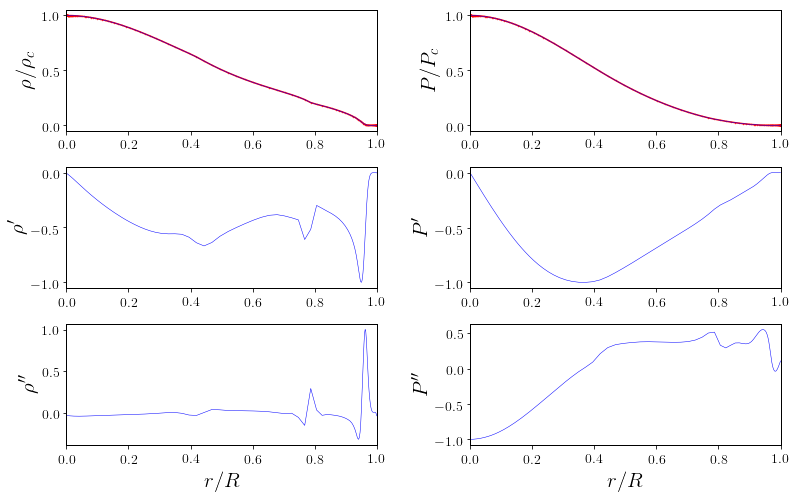

In [320]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ALF3_155[-1]/ALF3_155[-1][-1],ALF3_155[2]/ALF3_155[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ALF3_155[-1]/ALF3_155[-1][-1],ALF3_155rho(ALF3_155[-1])/ALF3_155[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ALF3_155[-1]/ALF3_155[-1][-1],ALF3_155[1]/ALF3_155[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ALF3_155[-1]/ALF3_155[-1][-1],ALF3_155p(ALF3_155[-1])/ALF3_155[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ALF3_155[-1]/ALF3_155[-1][-1],ALF3_155drho(ALF3_155[-1])/max(abs(ALF3_155drho(ALF3_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ALF3_155[-1]/ALF3_155[-1][-1],ALF3_155dp(ALF3_155[-1])/max(abs(ALF3_155dp(ALF3_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ALF3_155[-1]/ALF3_155[-1][-1],ALF3_155ddrho(ALF3_155[-1])/max(abs(ALF3_155ddrho(ALF3_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ALF3_155[-1]/ALF3_155[-1][-1],ALF3_155ddp(ALF3_155[-1])/max(abs(ALF3_155ddp(ALF3_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsALF3_155.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Redshift

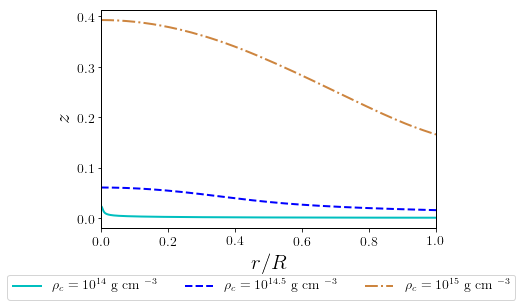

In [148]:
fig = plt.figure()

plt.plot(ALF3_140[-1]/ALF3_140[-1][-1],np.exp(-ALF3_140[3])-1.0,color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$')
plt.plot(ALF3_145[-1]/ALF3_145[-1][-1],np.exp(-ALF3_145[3])-1.0,color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$')
plt.plot(ALF3_150[-1]/ALF3_150[-1][-1],np.exp(-ALF3_150[3])-1.0,color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm $^{-3}$')

l = plt.legend(bbox_to_anchor=(1.1,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$z$')
plt.xlim(0,1.0)

plt.savefig('figures/RedshiftALF3.pdf', format='pdf', dpi=1000,bbox_inches="tight")

# ALF4 ------------------------------------------------------------------------------------------

In [149]:
rhoalf4,Palf4,nalf4=np.loadtxt('EOS/alf4.dat',usecols=(2,1,0),unpack=True)

## Dominant energy condition

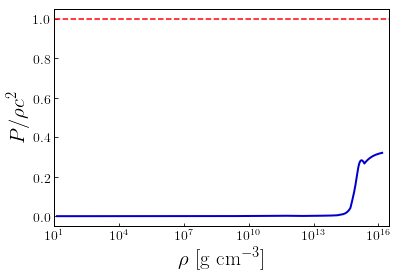

<Figure size 432x288 with 0 Axes>

In [150]:
fig, ax = plt.subplots()
plt.plot(nalf4,np.divide(Palf4,rhoalf4),lw='2',color='mediumblue')
plt.plot([0,10**(17)],[1.0,1.0],'r--',lw='1.5')

ax.set_xscale("log")
#locmaj = matplotlib.ticker.LogLocator(base=10.0,numticks=16) 
#ax.xaxis.set_major_locator(locmaj)


plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ P / \rho c^2 $')
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=16)
#ax.xaxis.set_minor_locator(locmin)
#ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
#plt.ylim(0,1)
plt.savefig('figures/ECalf4.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

## Speed of sound

In [151]:
vsquared=interpolate.UnivariateSpline(rhoalf4, Palf4, k=3, s=1e-15).derivative(n=1)

/home/dave/anaconda3/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:227: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


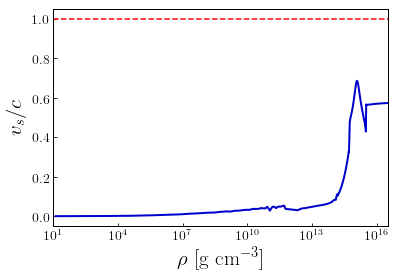

In [152]:
fig, ax = plt.subplots()
plt.plot(rhoalf4,np.sqrt(vsquared(rhoalf4)),lw='2.0',color='mediumblue')
plt.plot([1e+1,10**(16.5)],[1.0,1.0],'r--',lw='1.5')
plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ v_s / c $')
plt.xscale('log')
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#mpl.rcParams['axes.linewidth'] = 1.4
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
plt.savefig('figures/SSalf4.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Adiabatic Index

In [153]:
Gamma=np.multiply(np.divide(np.add(rhoalf4,Palf4),Palf4),vsquared(rhoalf4))

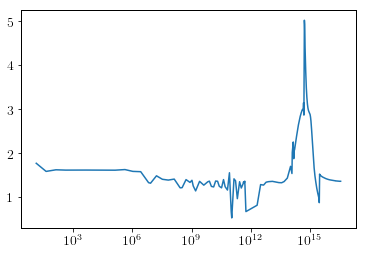

In [154]:
plt.plot(rhoalf4,Gamma)
plt.xscale('log')

$$ \langle\gamma\rangle=\frac{\int_{0}^{R} e^{(\lambda+3 \nu) } \gamma(r) P(r) r^{2} d r}{\int_{0}^{R} e^{(\lambda+3 \nu) } P(r) r^{2} d r} $$

Listing all the models calculated

In [155]:
owd=os.getcwd()
path=os.chdir('results2/alf4')
listOfEntries= os.scandir(path)
models_alf4 = []
for entry in listOfEntries:
    if '1' in entry.name:
        models_alf4.append(entry.name)
os.chdir(owd)
models_alf4.sort()

In [156]:
gamma_efs1 = []
gamma_efs2 = []
gamma_crs1 = []
gamma_crs2 = []
rhosc= []
for model in models_alf4:
    m, P, rho, nu, lambd, r = np.loadtxt('results2/alf4/' + model ,unpack=True)
    nu = nu - nu[-1] + 0.5*np.log(1-2*m[-1]/r[-1])
    #lambd = np.zeros_like(r)
    #for i in range((r.shape)[0]):
    #    if i==0:
    #        lambd[i] = 0
    #    else:
    #        lambd[i] = 0.5*np.log(1/(1-2*m[i]/r[i]))
    drho=interpolate.UnivariateSpline(r, rho, k=5, s=0).derivative(n=1)
    dP=interpolate.UnivariateSpline(r, P, k=5, s=0).derivative(n=1)
    gamma = np.divide(dP(r),drho(r))
    gamma_ef1 = integrate.trapz(np.exp(lambd+3*nu)*gamma*P*(r**2),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t1 = (1/36)*integrate.trapz(np.exp((lambd+3*nu))*(16*P+(np.exp(2*lambd)-1)*(P+rho))*(np.exp(2*lambd)-1)*(r**2))/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t2 = (4*np.pi/9)*integrate.trapz(np.exp(3*lambd+3*nu)*(8*P + (np.exp(2*lambd)+1)*(P+rho))*P*(r**4),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t3 = ((16*np.pi**2)/9)*integrate.trapz(np.exp(5*lambd+3*nu)*(P+rho)*(P**2)*(r**6),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    gamma_cr1 = 4/3 + t1 + t2 + t3
    gamma_efs1.append(gamma_ef1)
    gamma_crs1.append(gamma_cr1)
    gamma_ef2 = integrate.trapz(gamma*P*r**2,r)/integrate.trapz(P*r**2,r)
    gamma_cr2 = 4/3 + (19/42)*2*m[-1]/r[-1]
    gamma_efs2.append(gamma_ef2)
    gamma_crs2.append(gamma_cr2)
    rhosc.append(rho[0]*rhodim)

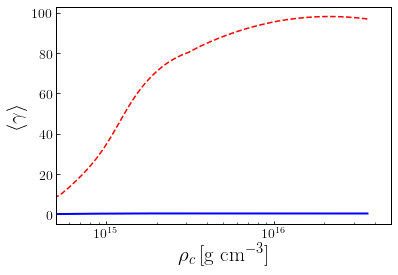

In [157]:
fig, ax = plt.subplots()
plt.plot(rhosc,gamma_crs1,lw='1.5',color='r',linestyle='--',label=r'$\gamma_{cr}$')
plt.plot(rhosc,gamma_efs1,lw='2.0',color='blue',label=r'$\langle \gamma \rangle$')

plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$\langle \gamma \rangle$')

plt.xscale('log')
plt.xlim(left=10**(14.7),right=10**(16.7))
#plt.ylim(0,10)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')
#l = plt.legend(bbox_to_anchor=(0.85,-0.15), loc="lower right", 
                #bbox_transform=fig.transFigure, ncol=2)



plt.savefig('figures/AdiabaticIndexalf4.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

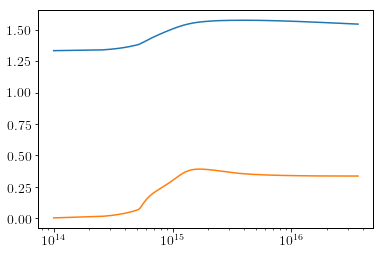

In [158]:
plt.plot(rhosc,gamma_crs2)
plt.plot(rhosc,gamma_efs2)
plt.xscale('log')

## M - $\rho_c$

In [159]:
Ralf4,Malf4,rhocalf4=np.loadtxt('results2/alf4/MRrhoc.dat',usecols=(0,1,2),unpack=True)

In [160]:
np.amax(Malf4)

1.94341635264

In [161]:
rhocalf4[np.argmax(Malf4)]

2344228815320000.0

In [162]:
np.log10(rhocalf4[np.argmax(Malf4)])

15.370000000000015

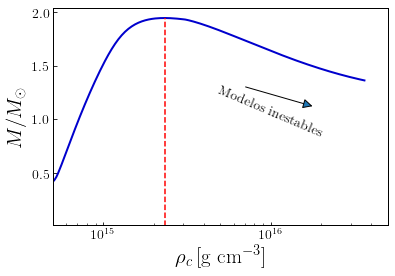

In [163]:
fig, ax = plt.subplots()

plt.plot(rhocalf4,Malf4,color='mediumblue',lw='2.0')
plt.plot([10**(np.log10(rhocalf4[np.argmax(Malf4)])),10**(np.log10(rhocalf4[np.argmax(Malf4)]))],[0.0,np.amax(Malf4)],'r--',lw='1.5')

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)
plt.annotate("", xy=(10**(16.25),1.12), xytext=(10**(15.85),1.3), arrowprops=prop)
#plt.arrow(10**(15.6), 1.38,10**(15.7) ,-0.1 , head_width=0.05, head_length=10**(15))
plt.text(10**(15.67), 1.23, 'Modelos inestables' , fontsize=14,rotation=-23)

plt.xscale('log')
plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.xlim(left=10**(14.7),right=10**(16.7))
plt.ylim(bottom=0.01)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')

plt.savefig('figures/Mrhorel_alf4.pdf', format='pdf', dpi=1000,bbox_inches="tight")

## Tunning the interpolation of the solution

### 14.0

In [164]:
alf4_140=np.loadtxt('results2/alf4/14.0.dat',unpack=True)
alf4_140[3] = alf4_140[3]-alf4_140[3][-1] + 0.5*np.log(1-2*alf4_140[0][-1]/alf4_140[-1][-1])

In [165]:
s1=5e-7
s2=1e-15
alf4_140rho=interpolate.UnivariateSpline(alf4_140[-1], alf4_140[2], k=5, s=s1)
alf4_140drho=interpolate.UnivariateSpline(alf4_140[-1], alf4_140[2], k=5, s=s1).derivative(n=1)
alf4_140ddrho=interpolate.UnivariateSpline(alf4_140[-1], alf4_140[2], k=5, s=s1).derivative(n=2)

alf4_140p=interpolate.UnivariateSpline(alf4_140[-1], alf4_140[1], k=5, s=s2)
alf4_140dp=interpolate.UnivariateSpline(alf4_140[-1], alf4_140[1], k=5, s=s2).derivative(n=1)
alf4_140ddp=interpolate.UnivariateSpline(alf4_140[-1], alf4_140[1], k=5, s=s2).derivative(n=2)

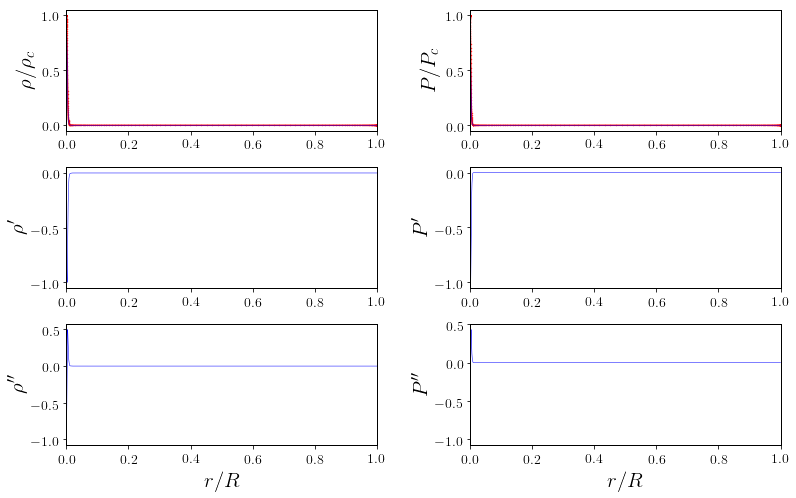

In [166]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(alf4_140[-1]/alf4_140[-1][-1],alf4_140[2]/alf4_140[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(alf4_140[-1]/alf4_140[-1][-1],alf4_140rho(alf4_140[-1])/alf4_140[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(alf4_140[-1]/alf4_140[-1][-1],alf4_140[1]/alf4_140[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(alf4_140[-1]/alf4_140[-1][-1],alf4_140p(alf4_140[-1])/alf4_140[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(alf4_140[-1]/alf4_140[-1][-1],alf4_140drho(alf4_140[-1])/max(abs(alf4_140drho(alf4_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(alf4_140[-1]/alf4_140[-1][-1],alf4_140dp(alf4_140[-1])/max(abs(alf4_140dp(alf4_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(alf4_140[-1]/alf4_140[-1][-1],alf4_140ddrho(alf4_140[-1])/max(abs(alf4_140ddrho(alf4_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(alf4_140[-1]/alf4_140[-1][-1],alf4_140ddp(alf4_140[-1])/max(abs(alf4_140ddp(alf4_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsalf4_140.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 14.5

In [167]:
alf4_145=np.loadtxt('results2/alf4/14.5.dat',unpack=True)
alf4_145[3] = alf4_145[3]-alf4_145[3][-1] + 0.5*np.log(1-2*alf4_145[0][-1]/alf4_145[-1][-1])

In [168]:
s1=1e-7
s2=1e-12
alf4_145rho=interpolate.UnivariateSpline(alf4_145[-1], alf4_145[2], k=5, s=s1)
alf4_145drho=interpolate.UnivariateSpline(alf4_145[-1], alf4_145[2], k=5, s=s1).derivative(n=1)
alf4_145ddrho=interpolate.UnivariateSpline(alf4_145[-1], alf4_145[2], k=5, s=s1).derivative(n=2)

alf4_145p=interpolate.UnivariateSpline(alf4_145[-1], alf4_145[1], k=5, s=s2)
alf4_145dp=interpolate.UnivariateSpline(alf4_145[-1], alf4_145[1], k=5, s=s2).derivative(n=1)
alf4_145ddp=interpolate.UnivariateSpline(alf4_145[-1], alf4_145[1], k=5, s=s2).derivative(n=2)

In [169]:
alf4_145rho(0.4*alf4_145[-1][-1])*rhodim

109554947563999.22

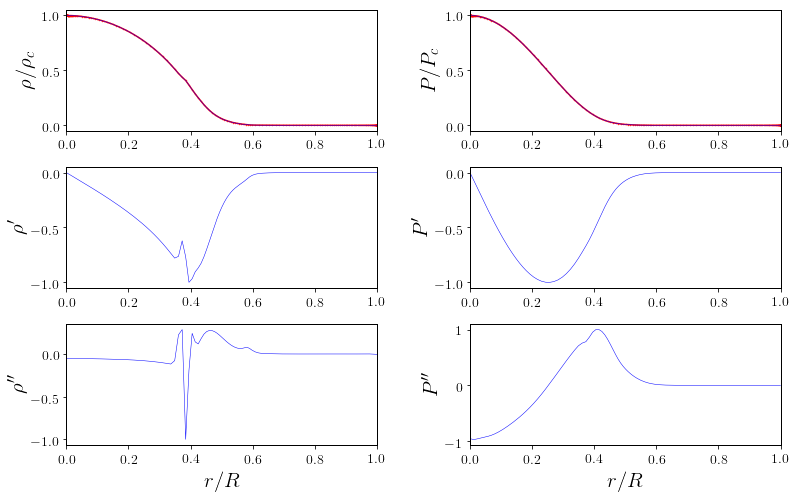

In [170]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(alf4_145[-1]/alf4_145[-1][-1],alf4_145[2]/alf4_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(alf4_145[-1]/alf4_145[-1][-1],alf4_145rho(alf4_145[-1])/alf4_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(alf4_145[-1]/alf4_145[-1][-1],alf4_145[1]/alf4_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(alf4_145[-1]/alf4_145[-1][-1],alf4_145p(alf4_145[-1])/alf4_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(alf4_145[-1]/alf4_145[-1][-1],alf4_145drho(alf4_145[-1])/max(abs(alf4_145drho(alf4_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(alf4_145[-1]/alf4_145[-1][-1],alf4_145dp(alf4_145[-1])/max(abs(alf4_145dp(alf4_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(alf4_145[-1]/alf4_145[-1][-1],alf4_145ddrho(alf4_145[-1])/max(abs(alf4_145ddrho(alf4_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(alf4_145[-1]/alf4_145[-1][-1],alf4_145ddp(alf4_145[-1])/max(abs(alf4_145ddp(alf4_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsalf4_145.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.0

In [171]:
alf4_150=np.loadtxt('results2/alf4/15.0.dat',unpack=True)
alf4_150[3] = alf4_150[3]-alf4_150[3][-1] + 0.5*np.log(1-2*alf4_150[0][-1]/alf4_150[-1][-1])

In [172]:
s1=8e-6
s2=1e-15
alf4_150rho=interpolate.UnivariateSpline(alf4_150[-1], alf4_150[2], k=5, s=s1)
alf4_150drho=interpolate.UnivariateSpline(alf4_150[-1], alf4_150[2], k=5, s=s1).derivative(n=1)
alf4_150ddrho=interpolate.UnivariateSpline(alf4_150[-1], alf4_150[2], k=5, s=s1).derivative(n=2)

alf4_150p=interpolate.UnivariateSpline(alf4_150[-1], alf4_150[1], k=5, s=s2)
alf4_150dp=interpolate.UnivariateSpline(alf4_150[-1], alf4_150[1], k=5, s=s2).derivative(n=1)
alf4_150ddp=interpolate.UnivariateSpline(alf4_150[-1], alf4_150[1], k=5, s=s2).derivative(n=2)

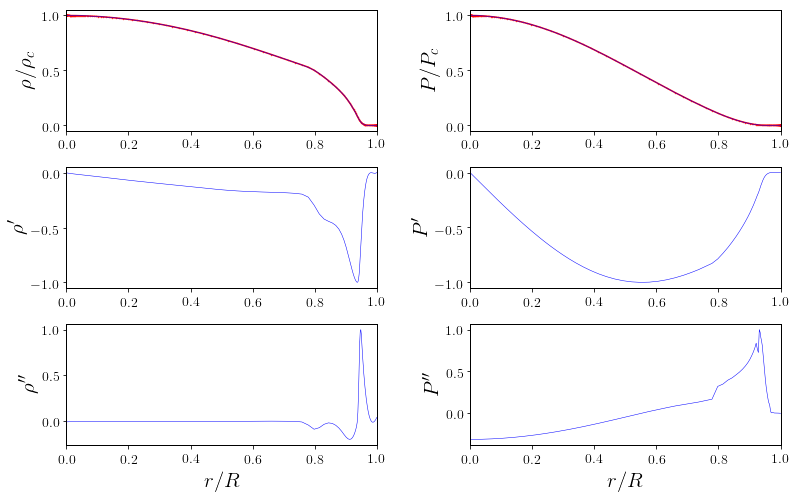

In [173]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(alf4_150[-1]/alf4_150[-1][-1],alf4_150[2]/alf4_150[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(alf4_150[-1]/alf4_150[-1][-1],alf4_150rho(alf4_150[-1])/alf4_150[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(alf4_150[-1]/alf4_150[-1][-1],alf4_150[1]/alf4_150[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(alf4_150[-1]/alf4_150[-1][-1],alf4_150p(alf4_150[-1])/alf4_150[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(alf4_150[-1]/alf4_150[-1][-1],alf4_150drho(alf4_150[-1])/max(abs(alf4_150drho(alf4_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(alf4_150[-1]/alf4_150[-1][-1],alf4_150dp(alf4_150[-1])/max(abs(alf4_150dp(alf4_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(alf4_150[-1]/alf4_150[-1][-1],alf4_150ddrho(alf4_150[-1])/max(abs(alf4_150ddrho(alf4_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(alf4_150[-1]/alf4_150[-1][-1],alf4_150ddp(alf4_150[-1])/max(abs(alf4_150ddp(alf4_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsalf4_150.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.5

In [321]:
alf4_155=np.loadtxt('results2/alf4/15.5.dat',unpack=True)
alf4_155[3] = alf4_155[3]-alf4_155[3][-1] + 0.5*np.log(1-2*alf4_155[0][-1]/alf4_155[-1][-1])

In [322]:
s1=1e-5
s2=1e-9
alf4_155rho=interpolate.UnivariateSpline(alf4_155[-1], alf4_155[2], k=5, s=s1)
alf4_155drho=interpolate.UnivariateSpline(alf4_155[-1], alf4_155[2], k=5, s=s1).derivative(n=1)
alf4_155ddrho=interpolate.UnivariateSpline(alf4_155[-1], alf4_155[2], k=5, s=s1).derivative(n=2)

alf4_155p=interpolate.UnivariateSpline(alf4_155[-1], alf4_155[1], k=5, s=s2)
alf4_155dp=interpolate.UnivariateSpline(alf4_155[-1], alf4_155[1], k=5, s=s2).derivative(n=1)
alf4_155ddp=interpolate.UnivariateSpline(alf4_155[-1], alf4_155[1], k=5, s=s2).derivative(n=2)

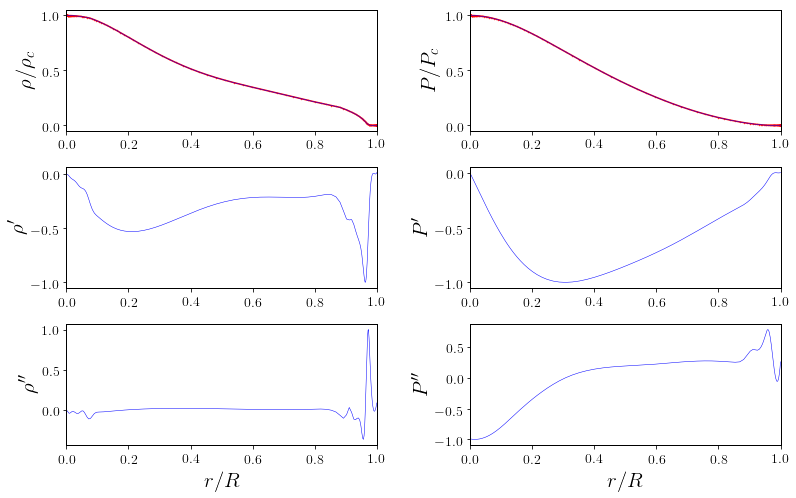

In [323]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(alf4_155[-1]/alf4_155[-1][-1],alf4_155[2]/alf4_155[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(alf4_155[-1]/alf4_155[-1][-1],alf4_155rho(alf4_155[-1])/alf4_155[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(alf4_155[-1]/alf4_155[-1][-1],alf4_155[1]/alf4_155[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(alf4_155[-1]/alf4_155[-1][-1],alf4_155p(alf4_155[-1])/alf4_155[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(alf4_155[-1]/alf4_155[-1][-1],alf4_155drho(alf4_155[-1])/max(abs(alf4_155drho(alf4_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(alf4_155[-1]/alf4_155[-1][-1],alf4_155dp(alf4_155[-1])/max(abs(alf4_155dp(alf4_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(alf4_155[-1]/alf4_155[-1][-1],alf4_155ddrho(alf4_155[-1])/max(abs(alf4_155ddrho(alf4_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(alf4_155[-1]/alf4_155[-1][-1],alf4_155ddp(alf4_155[-1])/max(abs(alf4_155ddp(alf4_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsalf4_155.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Redshift

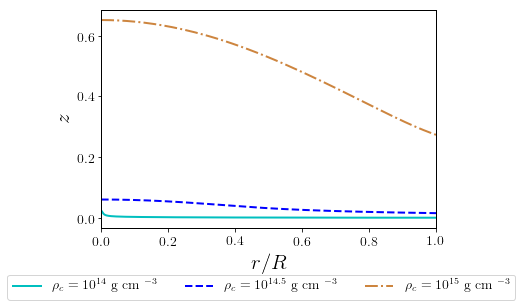

In [177]:
fig = plt.figure()

plt.plot(alf4_140[-1]/alf4_140[-1][-1],np.exp(-alf4_140[3])-1.0,color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$')
plt.plot(alf4_145[-1]/alf4_145[-1][-1],np.exp(-alf4_145[3])-1.0,color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$')
plt.plot(alf4_150[-1]/alf4_150[-1][-1],np.exp(-alf4_150[3])-1.0,color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm $^{-3}$')

l = plt.legend(bbox_to_anchor=(1.1,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$z$')
plt.xlim(0,1.0)

plt.savefig('figures/Redshiftalf4.pdf', format='pdf', dpi=1000,bbox_inches="tight")

In [149]:
rhoalf4,Palf4,nalf4=np.loadtxt('EOS/alf4.dat',usecols=(2,1,0),unpack=True)

# AP1 ---------------------------------------------------------------------------------------------

In [181]:
rhoap1,Pap1,nap1=np.loadtxt('EOS/ap1.dat',usecols=(2,1,0),unpack=True)

## Dominant energy condition

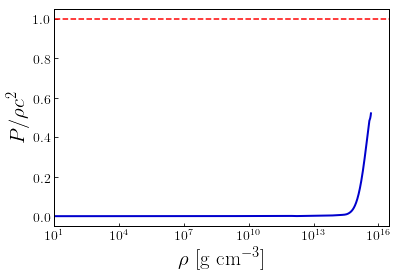

<Figure size 432x288 with 0 Axes>

In [183]:
fig, ax = plt.subplots()
plt.plot(rhoap1,np.divide(Pap1,rhoap1),lw='2',color='mediumblue')
plt.plot([0,10**(17)],[1.0,1.0],'r--',lw='1.5')

ax.set_xscale("log")
#locmaj = matplotlib.ticker.LogLocator(base=10.0,numticks=16) 
#ax.xaxis.set_major_locator(locmaj)


plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ P / \rho c^2 $')
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=16)
#ax.xaxis.set_minor_locator(locmin)
#ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
#plt.ylim(0,1)
plt.savefig('figures/ECap1.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

## Speed of sound

In [214]:
vsquared=interpolate.UnivariateSpline(rhoap1, Pap1, k=3, s=0).derivative(n=1)

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


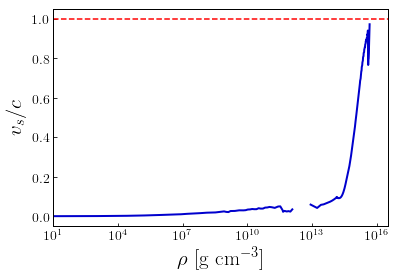

In [215]:
fig, ax = plt.subplots()
plt.plot(rhoap1,np.sqrt(vsquared(rhoap1)),lw='2.0',color='mediumblue')
plt.plot([1e+1,10**(16.5)],[1.0,1.0],'r--',lw='1.5')
plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ v_s / c $')
plt.xscale('log')
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#mpl.rcParams['axes.linewidth'] = 1.4
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
plt.savefig('figures/SSap1.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Adiabatic Index

In [216]:
Gamma=np.multiply(np.divide(np.add(rhoap1,Pap1),Pap1),vsquared(rhoap1))

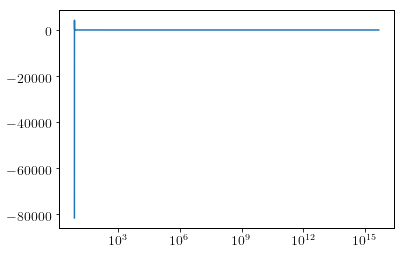

In [217]:
plt.plot(rhoap1,Gamma)
plt.xscale('log')

$$ \langle\gamma\rangle=\frac{\int_{0}^{R} e^{(\lambda+3 \nu) } \gamma(r) P(r) r^{2} d r}{\int_{0}^{R} e^{(\lambda+3 \nu) } P(r) r^{2} d r} $$

Listing all the models calculated

In [218]:
owd=os.getcwd()
path=os.chdir('results2/ap1')
listOfEntries= os.scandir(path)
models_ap1 = []
for entry in listOfEntries:
    if '1' in entry.name:
        models_ap1.append(entry.name)
os.chdir(owd)
models_ap1.sort()

In [219]:
gamma_efs1 = []
gamma_efs2 = []
gamma_crs1 = []
gamma_crs2 = []
rhosc= []
for model in models_ap1:
    m, P, rho, nu, lambd, r = np.loadtxt('results2/ap1/' + model ,unpack=True)
    nu = nu - nu[-1] + 0.5*np.log(1-2*m[-1]/r[-1])
    #lambd = np.zeros_like(r)
    #for i in range((r.shape)[0]):
    #    if i==0:
    #        lambd[i] = 0
    #    else:
    #        lambd[i] = 0.5*np.log(1/(1-2*m[i]/r[i]))
    drho=interpolate.UnivariateSpline(r, rho, k=5, s=0).derivative(n=1)
    dP=interpolate.UnivariateSpline(r, P, k=5, s=0).derivative(n=1)
    gamma = np.divide(dP(r),drho(r))
    gamma_ef1 = integrate.trapz(np.exp(lambd+3*nu)*gamma*P*(r**2),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t1 = (1/36)*integrate.trapz(np.exp((lambd+3*nu))*(16*P+(np.exp(2*lambd)-1)*(P+rho))*(np.exp(2*lambd)-1)*(r**2))/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t2 = (4*np.pi/9)*integrate.trapz(np.exp(3*lambd+3*nu)*(8*P + (np.exp(2*lambd)+1)*(P+rho))*P*(r**4),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t3 = ((16*np.pi**2)/9)*integrate.trapz(np.exp(5*lambd+3*nu)*(P+rho)*(P**2)*(r**6),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    gamma_cr1 = 4/3 + t1 + t2 + t3
    gamma_efs1.append(gamma_ef1)
    gamma_crs1.append(gamma_cr1)
    gamma_ef2 = integrate.trapz(gamma*P*r**2,r)/integrate.trapz(P*r**2,r)
    gamma_cr2 = 4/3 + (19/42)*2*m[-1]/r[-1]
    gamma_efs2.append(gamma_ef2)
    gamma_crs2.append(gamma_cr2)
    rhosc.append(rho[0]*rhodim)

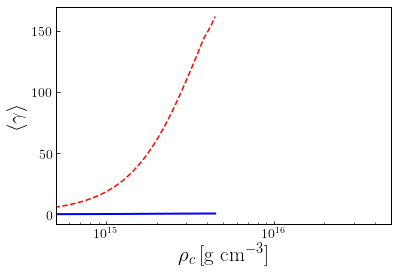

In [220]:
fig, ax = plt.subplots()
plt.plot(rhosc,gamma_crs1,lw='1.5',color='r',linestyle='--',label=r'$\gamma_{cr}$')
plt.plot(rhosc,gamma_efs1,lw='2.0',color='blue',label=r'$\langle \gamma \rangle$')

plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$\langle \gamma \rangle$')

plt.xscale('log')
plt.xlim(left=10**(14.7),right=10**(16.7))
#plt.ylim(0,10)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')
#l = plt.legend(bbox_to_anchor=(0.85,-0.15), loc="lower right", 
                #bbox_transform=fig.transFigure, ncol=2)



plt.savefig('figures/AdiabaticIndexap1.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

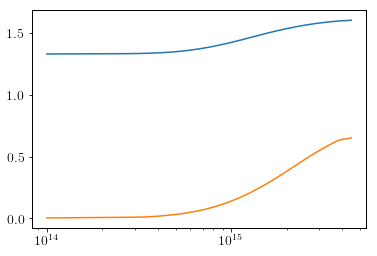

In [221]:
plt.plot(rhosc,gamma_crs2)
plt.plot(rhosc,gamma_efs2)
plt.xscale('log')

## M - $\rho_c$

In [222]:
Rap1,Map1,rhocap1=np.loadtxt('results2/ap1/MRrhoc.dat',usecols=(0,1,2),unpack=True)

In [223]:
np.amax(Map1)

1.68393287756

In [224]:
rhocap1[np.argmax(Map1)]

4168693834700000.0

In [225]:
np.log10(rhocap1[np.argmax(Map1)])

15.619999999999651

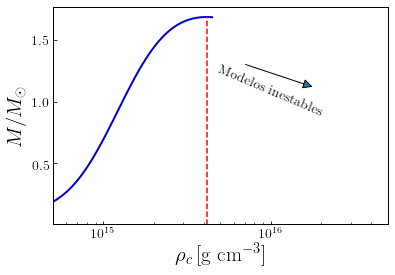

In [226]:
fig, ax = plt.subplots()

plt.plot(rhocap1,Map1,color='mediumblue',lw='2.0')
plt.plot([10**(np.log10(rhocap1[np.argmax(Map1)])),10**(np.log10(rhocap1[np.argmax(Map1)]))],[0.0,np.amax(Map1)],'r--',lw='1.5')

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)
plt.annotate("", xy=(10**(16.25),1.12), xytext=(10**(15.85),1.3), arrowprops=prop)
#plt.arrow(10**(15.6), 1.38,10**(15.7) ,-0.1 , head_width=0.05, head_length=10**(15))
plt.text(10**(15.67), 1.23, 'Modelos inestables' , fontsize=14,rotation=-23)

plt.xscale('log')
plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.xlim(left=10**(14.7),right=10**(16.7))
plt.ylim(bottom=0.01)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')

plt.savefig('figures/Mrhorel_ap1.pdf', format='pdf', dpi=1000,bbox_inches="tight")

## Tunning the interpolation of the solution

### 14.0

In [227]:
ap1_140=np.loadtxt('results2/ap1/14.0.dat',unpack=True)
ap1_140[3] = ap1_140[3]-ap1_140[3][-1] + 0.5*np.log(1-2*ap1_140[0][-1]/ap1_140[-1][-1])

In [228]:
s1=5e-7
s2=1e-15
ap1_140rho=interpolate.UnivariateSpline(ap1_140[-1], ap1_140[2], k=5, s=s1)
ap1_140drho=interpolate.UnivariateSpline(ap1_140[-1], ap1_140[2], k=5, s=s1).derivative(n=1)
ap1_140ddrho=interpolate.UnivariateSpline(ap1_140[-1], ap1_140[2], k=5, s=s1).derivative(n=2)

ap1_140p=interpolate.UnivariateSpline(ap1_140[-1], ap1_140[1], k=5, s=s2)
ap1_140dp=interpolate.UnivariateSpline(ap1_140[-1], ap1_140[1], k=5, s=s2).derivative(n=1)
ap1_140ddp=interpolate.UnivariateSpline(ap1_140[-1], ap1_140[1], k=5, s=s2).derivative(n=2)

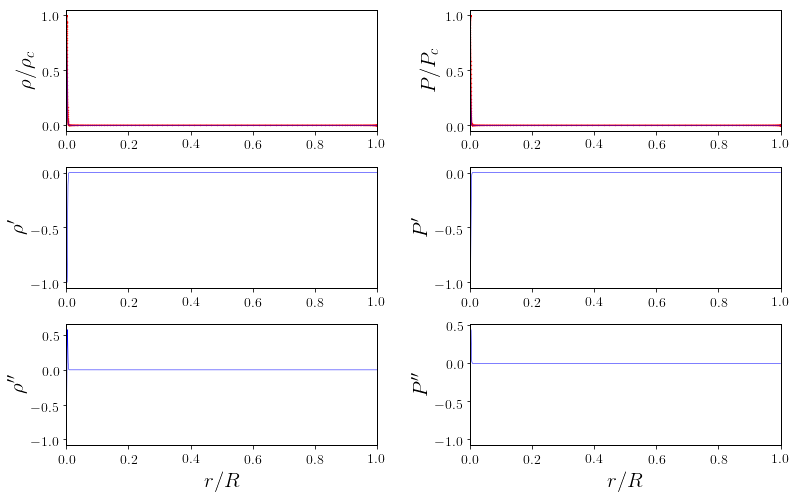

In [229]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ap1_140[-1]/ap1_140[-1][-1],ap1_140[2]/ap1_140[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap1_140[-1]/ap1_140[-1][-1],ap1_140rho(ap1_140[-1])/ap1_140[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ap1_140[-1]/ap1_140[-1][-1],ap1_140[1]/ap1_140[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap1_140[-1]/ap1_140[-1][-1],ap1_140p(ap1_140[-1])/ap1_140[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ap1_140[-1]/ap1_140[-1][-1],ap1_140drho(ap1_140[-1])/max(abs(ap1_140drho(ap1_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ap1_140[-1]/ap1_140[-1][-1],ap1_140dp(ap1_140[-1])/max(abs(ap1_140dp(ap1_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ap1_140[-1]/ap1_140[-1][-1],ap1_140ddrho(ap1_140[-1])/max(abs(ap1_140ddrho(ap1_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ap1_140[-1]/ap1_140[-1][-1],ap1_140ddp(ap1_140[-1])/max(abs(ap1_140ddp(ap1_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsap1_140.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 14.5

In [230]:
ap1_145=np.loadtxt('results2/ap1/14.5.dat',unpack=True)
ap1_145[3] = ap1_145[3]-ap1_145[3][-1] + 0.5*np.log(1-2*ap1_145[0][-1]/ap1_145[-1][-1])

In [231]:
s1=1e-7
s2=1e-12
ap1_145rho=interpolate.UnivariateSpline(ap1_145[-1], ap1_145[2], k=5, s=s1)
ap1_145drho=interpolate.UnivariateSpline(ap1_145[-1], ap1_145[2], k=5, s=s1).derivative(n=1)
ap1_145ddrho=interpolate.UnivariateSpline(ap1_145[-1], ap1_145[2], k=5, s=s1).derivative(n=2)

ap1_145p=interpolate.UnivariateSpline(ap1_145[-1], ap1_145[1], k=5, s=s2)
ap1_145dp=interpolate.UnivariateSpline(ap1_145[-1], ap1_145[1], k=5, s=s2).derivative(n=1)
ap1_145ddp=interpolate.UnivariateSpline(ap1_145[-1], ap1_145[1], k=5, s=s2).derivative(n=2)

In [232]:
ap1_145rho(0.4*ap1_145[-1][-1])*rhodim

157626267680.4026

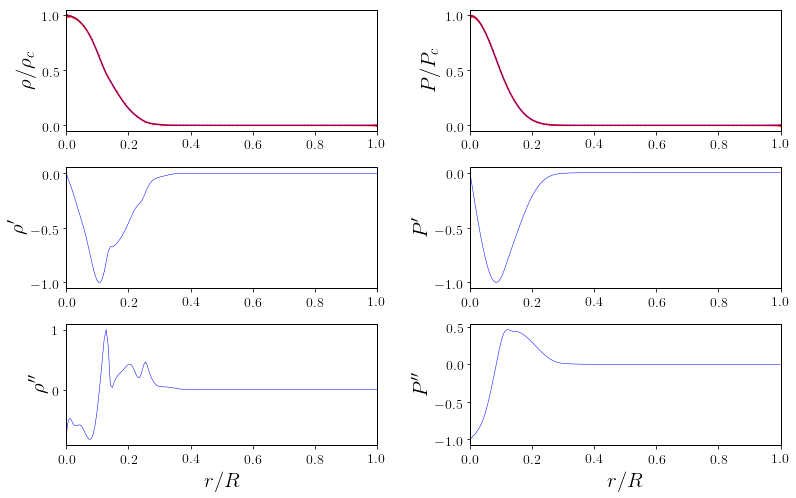

In [233]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ap1_145[-1]/ap1_145[-1][-1],ap1_145[2]/ap1_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap1_145[-1]/ap1_145[-1][-1],ap1_145rho(ap1_145[-1])/ap1_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ap1_145[-1]/ap1_145[-1][-1],ap1_145[1]/ap1_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap1_145[-1]/ap1_145[-1][-1],ap1_145p(ap1_145[-1])/ap1_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ap1_145[-1]/ap1_145[-1][-1],ap1_145drho(ap1_145[-1])/max(abs(ap1_145drho(ap1_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ap1_145[-1]/ap1_145[-1][-1],ap1_145dp(ap1_145[-1])/max(abs(ap1_145dp(ap1_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ap1_145[-1]/ap1_145[-1][-1],ap1_145ddrho(ap1_145[-1])/max(abs(ap1_145ddrho(ap1_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ap1_145[-1]/ap1_145[-1][-1],ap1_145ddp(ap1_145[-1])/max(abs(ap1_145ddp(ap1_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsap1_145.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.0

In [234]:
ap1_150=np.loadtxt('results2/ap1/15.0.dat',unpack=True)
ap1_150[3] = ap1_150[3]-ap1_150[3][-1] + 0.5*np.log(1-2*ap1_150[0][-1]/ap1_150[-1][-1])

In [235]:
s1=8e-6
s2=1e-15
ap1_150rho=interpolate.UnivariateSpline(ap1_150[-1], ap1_150[2], k=5, s=s1)
ap1_150drho=interpolate.UnivariateSpline(ap1_150[-1], ap1_150[2], k=5, s=s1).derivative(n=1)
ap1_150ddrho=interpolate.UnivariateSpline(ap1_150[-1], ap1_150[2], k=5, s=s1).derivative(n=2)

ap1_150p=interpolate.UnivariateSpline(ap1_150[-1], ap1_150[1], k=5, s=s2)
ap1_150dp=interpolate.UnivariateSpline(ap1_150[-1], ap1_150[1], k=5, s=s2).derivative(n=1)
ap1_150ddp=interpolate.UnivariateSpline(ap1_150[-1], ap1_150[1], k=5, s=s2).derivative(n=2)

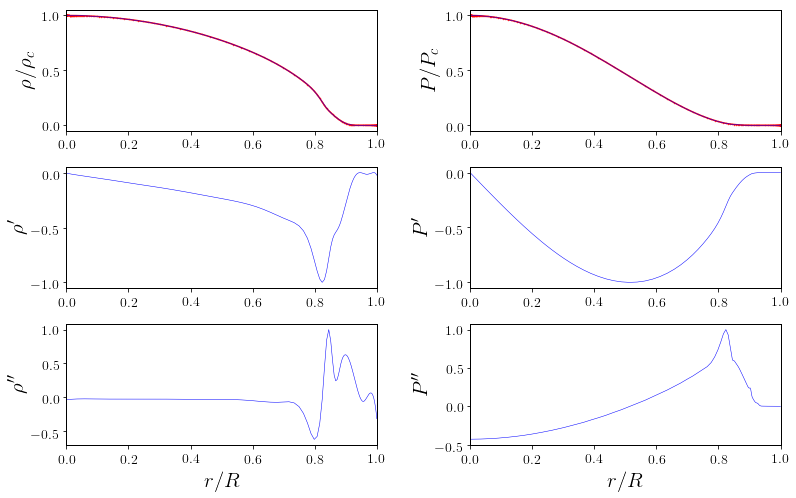

In [236]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ap1_150[-1]/ap1_150[-1][-1],ap1_150[2]/ap1_150[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap1_150[-1]/ap1_150[-1][-1],ap1_150rho(ap1_150[-1])/ap1_150[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ap1_150[-1]/ap1_150[-1][-1],ap1_150[1]/ap1_150[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap1_150[-1]/ap1_150[-1][-1],ap1_150p(ap1_150[-1])/ap1_150[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ap1_150[-1]/ap1_150[-1][-1],ap1_150drho(ap1_150[-1])/max(abs(ap1_150drho(ap1_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ap1_150[-1]/ap1_150[-1][-1],ap1_150dp(ap1_150[-1])/max(abs(ap1_150dp(ap1_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ap1_150[-1]/ap1_150[-1][-1],ap1_150ddrho(ap1_150[-1])/max(abs(ap1_150ddrho(ap1_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ap1_150[-1]/ap1_150[-1][-1],ap1_150ddp(ap1_150[-1])/max(abs(ap1_150ddp(ap1_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsap1_150.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.5

In [324]:
ap1_155=np.loadtxt('results2/ap1/15.5.dat',unpack=True)
ap1_155[3] = ap1_155[3]-ap1_155[3][-1] + 0.5*np.log(1-2*ap1_155[0][-1]/ap1_155[-1][-1])

In [325]:
s1=1e-5
s2=1e-9
ap1_155rho=interpolate.UnivariateSpline(ap1_155[-1], ap1_155[2], k=5, s=s1)
ap1_155drho=interpolate.UnivariateSpline(ap1_155[-1], ap1_155[2], k=5, s=s1).derivative(n=1)
ap1_155ddrho=interpolate.UnivariateSpline(ap1_155[-1], ap1_155[2], k=5, s=s1).derivative(n=2)

ap1_155p=interpolate.UnivariateSpline(ap1_155[-1], ap1_155[1], k=5, s=s2)
ap1_155dp=interpolate.UnivariateSpline(ap1_155[-1], ap1_155[1], k=5, s=s2).derivative(n=1)
ap1_155ddp=interpolate.UnivariateSpline(ap1_155[-1], ap1_155[1], k=5, s=s2).derivative(n=2)

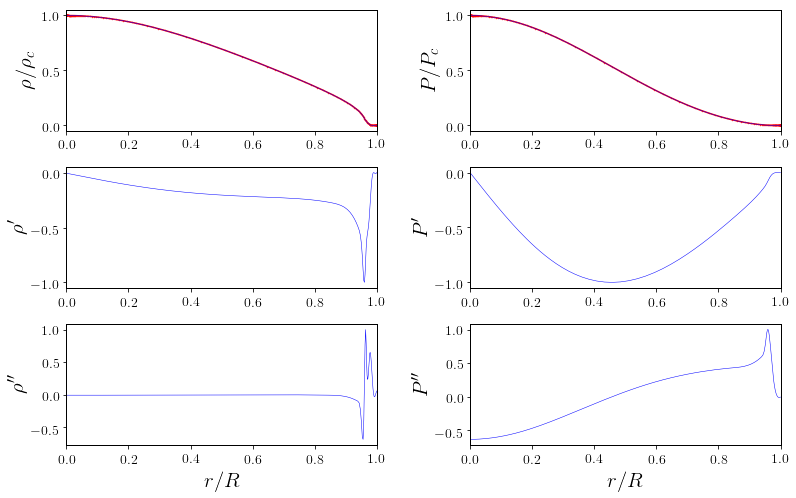

In [326]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ap1_155[-1]/ap1_155[-1][-1],ap1_155[2]/ap1_155[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap1_155[-1]/ap1_155[-1][-1],ap1_155rho(ap1_155[-1])/ap1_155[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ap1_155[-1]/ap1_155[-1][-1],ap1_155[1]/ap1_155[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap1_155[-1]/ap1_155[-1][-1],ap1_155p(ap1_155[-1])/ap1_155[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ap1_155[-1]/ap1_155[-1][-1],ap1_155drho(ap1_155[-1])/max(abs(ap1_155drho(ap1_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ap1_155[-1]/ap1_155[-1][-1],ap1_155dp(ap1_155[-1])/max(abs(ap1_155dp(ap1_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ap1_155[-1]/ap1_155[-1][-1],ap1_155ddrho(ap1_155[-1])/max(abs(ap1_155ddrho(ap1_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ap1_155[-1]/ap1_155[-1][-1],ap1_155ddp(ap1_155[-1])/max(abs(ap1_155ddp(ap1_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsap1_155.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Redshift

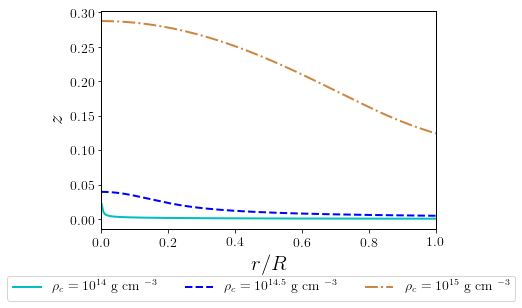

In [327]:
fig = plt.figure()

plt.plot(ap1_140[-1]/ap1_140[-1][-1],np.exp(-ap1_140[3])-1.0,color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$')
plt.plot(ap1_145[-1]/ap1_145[-1][-1],np.exp(-ap1_145[3])-1.0,color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$')
plt.plot(ap1_150[-1]/ap1_150[-1][-1],np.exp(-ap1_150[3])-1.0,color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm $^{-3}$')

l = plt.legend(bbox_to_anchor=(1.1,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$z$')
plt.xlim(0,1.0)

plt.savefig('figures/Redshiftap1.pdf', format='pdf', dpi=1000,bbox_inches="tight")

# AP2 ------------------------------------------------------------------------------------------

In [242]:
rhoap2,Pap2,nap2=np.loadtxt('EOS/ap2.dat',usecols=(2,1,0),unpack=True)

## Dominant energy condition

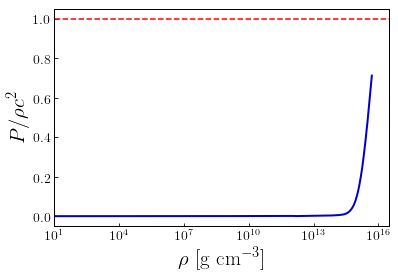

<Figure size 432x288 with 0 Axes>

In [243]:
fig, ax = plt.subplots()
plt.plot(rhoap2,np.divide(Pap2,rhoap2),lw='2',color='mediumblue')
plt.plot([0,10**(17)],[1.0,1.0],'r--',lw='1.5')

ax.set_xscale("log")
#locmaj = matplotlib.ticker.LogLocator(base=10.0,numticks=16) 
#ax.xaxis.set_major_locator(locmaj)


plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ P / \rho c^2 $')
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=16)
#ax.xaxis.set_minor_locator(locmin)
#ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
#plt.ylim(0,1)
plt.savefig('figures/ECap2.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

## Speed of sound

In [287]:
vsquared=interpolate.UnivariateSpline(rhoap2, Pap2, k=3, s=1e-25).derivative(n=1)

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


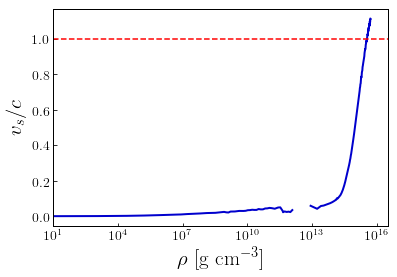

In [288]:
fig, ax = plt.subplots()
plt.plot(rhoap2,np.sqrt(vsquared(rhoap2)),lw='2.0',color='mediumblue')
plt.plot([1e+1,10**(16.5)],[1.0,1.0],'r--',lw='1.5')
plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ v_s / c $')
plt.xscale('log')
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#mpl.rcParams['axes.linewidth'] = 1.4
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
plt.savefig('figures/SSap2.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Adiabatic Index

In [248]:
Gamma=np.multiply(np.divide(np.add(rhoap2,Pap2),Pap2),vsquared(rhoap2))

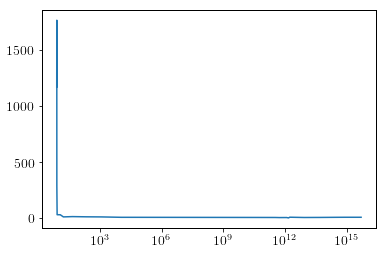

In [249]:
plt.plot(rhoap2,Gamma)
plt.xscale('log')

$$ \langle\gamma\rangle=\frac{\int_{0}^{R} e^{(\lambda+3 \nu) } \gamma(r) P(r) r^{2} d r}{\int_{0}^{R} e^{(\lambda+3 \nu) } P(r) r^{2} d r} $$

Listing all the models calculated

In [250]:
owd=os.getcwd()
path=os.chdir('results2/ap2')
listOfEntries= os.scandir(path)
models_ap2 = []
for entry in listOfEntries:
    if '1' in entry.name:
        models_ap2.append(entry.name)
os.chdir(owd)
models_ap2.sort()

In [251]:
gamma_efs1 = []
gamma_efs2 = []
gamma_crs1 = []
gamma_crs2 = []
rhosc= []
for model in models_ap2:
    m, P, rho, nu, lambd, r = np.loadtxt('results2/ap2/' + model ,unpack=True)
    nu = nu - nu[-1] + 0.5*np.log(1-2*m[-1]/r[-1])
    #lambd = np.zeros_like(r)
    #for i in range((r.shape)[0]):
    #    if i==0:
    #        lambd[i] = 0
    #    else:
    #        lambd[i] = 0.5*np.log(1/(1-2*m[i]/r[i]))
    drho=interpolate.UnivariateSpline(r, rho, k=5, s=0).derivative(n=1)
    dP=interpolate.UnivariateSpline(r, P, k=5, s=0).derivative(n=1)
    gamma = np.divide(dP(r),drho(r))
    gamma_ef1 = integrate.trapz(np.exp(lambd+3*nu)*gamma*P*(r**2),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t1 = (1/36)*integrate.trapz(np.exp((lambd+3*nu))*(16*P+(np.exp(2*lambd)-1)*(P+rho))*(np.exp(2*lambd)-1)*(r**2))/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t2 = (4*np.pi/9)*integrate.trapz(np.exp(3*lambd+3*nu)*(8*P + (np.exp(2*lambd)+1)*(P+rho))*P*(r**4),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t3 = ((16*np.pi**2)/9)*integrate.trapz(np.exp(5*lambd+3*nu)*(P+rho)*(P**2)*(r**6),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    gamma_cr1 = 4/3 + t1 + t2 + t3
    gamma_efs1.append(gamma_ef1)
    gamma_crs1.append(gamma_cr1)
    gamma_ef2 = integrate.trapz(gamma*P*r**2,r)/integrate.trapz(P*r**2,r)
    gamma_cr2 = 4/3 + (19/42)*2*m[-1]/r[-1]
    gamma_efs2.append(gamma_ef2)
    gamma_crs2.append(gamma_cr2)
    rhosc.append(rho[0]*rhodim)

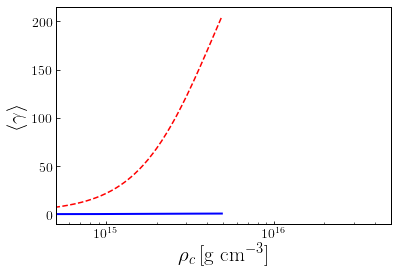

In [252]:
fig, ax = plt.subplots()
plt.plot(rhosc,gamma_crs1,lw='1.5',color='r',linestyle='--',label=r'$\gamma_{cr}$')
plt.plot(rhosc,gamma_efs1,lw='2.0',color='blue',label=r'$\langle \gamma \rangle$')

plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$\langle \gamma \rangle$')

plt.xscale('log')
plt.xlim(left=10**(14.7),right=10**(16.7))
#plt.ylim(0,10)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')
#l = plt.legend(bbox_to_anchor=(0.85,-0.15), loc="lower right", 
                #bbox_transform=fig.transFigure, ncol=2)



plt.savefig('figures/AdiabaticIndexap2.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

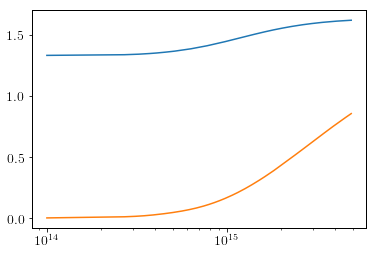

In [253]:
plt.plot(rhosc,gamma_crs2)
plt.plot(rhosc,gamma_efs2)
plt.xscale('log')

## M - $\rho_c$

In [254]:
Rap2,Map2,rhocap2=np.loadtxt('results2/ap2/MRrhoc.dat',usecols=(0,1,2),unpack=True)

In [255]:
np.amax(Map2)

1.80853499403

In [256]:
rhocap2[np.argmax(Map2)]

3801893963210000.0

In [257]:
np.log10(rhocap2[np.argmax(Map2)])

15.580000000000501

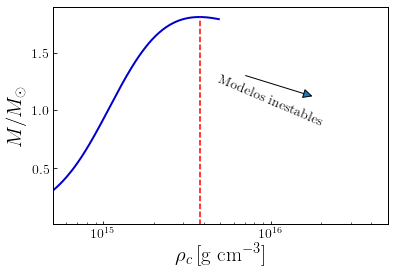

In [258]:
fig, ax = plt.subplots()

plt.plot(rhocap2,Map2,color='mediumblue',lw='2.0')
plt.plot([10**(np.log10(rhocap2[np.argmax(Map2)])),10**(np.log10(rhocap2[np.argmax(Map2)]))],[0.0,np.amax(Map2)],'r--',lw='1.5')

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)
plt.annotate("", xy=(10**(16.25),1.12), xytext=(10**(15.85),1.3), arrowprops=prop)
#plt.arrow(10**(15.6), 1.38,10**(15.7) ,-0.1 , head_width=0.05, head_length=10**(15))
plt.text(10**(15.67), 1.23, 'Modelos inestables' , fontsize=14,rotation=-23)

plt.xscale('log')
plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.xlim(left=10**(14.7),right=10**(16.7))
plt.ylim(bottom=0.01)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')

plt.savefig('figures/Mrhorel_ap2.pdf', format='pdf', dpi=1000,bbox_inches="tight")

## Tunning the interpolation of the solution

### 14.0

In [259]:
ap2_140=np.loadtxt('results2/ap2/14.0.dat',unpack=True)
ap2_140[3] = ap2_140[3]-ap2_140[3][-1] + 0.5*np.log(1-2*ap2_140[0][-1]/ap2_140[-1][-1])

In [260]:
s1=5e-7
s2=1e-15
ap2_140rho=interpolate.UnivariateSpline(ap2_140[-1], ap2_140[2], k=5, s=s1)
ap2_140drho=interpolate.UnivariateSpline(ap2_140[-1], ap2_140[2], k=5, s=s1).derivative(n=1)
ap2_140ddrho=interpolate.UnivariateSpline(ap2_140[-1], ap2_140[2], k=5, s=s1).derivative(n=2)

ap2_140p=interpolate.UnivariateSpline(ap2_140[-1], ap2_140[1], k=5, s=s2)
ap2_140dp=interpolate.UnivariateSpline(ap2_140[-1], ap2_140[1], k=5, s=s2).derivative(n=1)
ap2_140ddp=interpolate.UnivariateSpline(ap2_140[-1], ap2_140[1], k=5, s=s2).derivative(n=2)

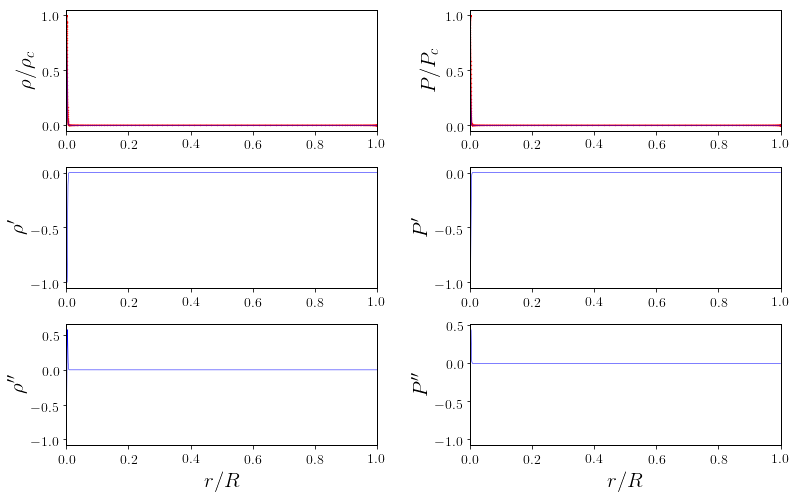

In [261]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ap2_140[-1]/ap2_140[-1][-1],ap2_140[2]/ap2_140[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap2_140[-1]/ap2_140[-1][-1],ap2_140rho(ap2_140[-1])/ap2_140[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ap2_140[-1]/ap2_140[-1][-1],ap2_140[1]/ap2_140[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap2_140[-1]/ap2_140[-1][-1],ap2_140p(ap2_140[-1])/ap2_140[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ap2_140[-1]/ap2_140[-1][-1],ap2_140drho(ap2_140[-1])/max(abs(ap2_140drho(ap2_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ap2_140[-1]/ap2_140[-1][-1],ap2_140dp(ap2_140[-1])/max(abs(ap2_140dp(ap2_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ap2_140[-1]/ap2_140[-1][-1],ap2_140ddrho(ap2_140[-1])/max(abs(ap2_140ddrho(ap2_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ap2_140[-1]/ap2_140[-1][-1],ap2_140ddp(ap2_140[-1])/max(abs(ap2_140ddp(ap2_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsap2_140.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 14.5

In [262]:
ap2_145=np.loadtxt('results2/ap2/14.5.dat',unpack=True)
ap2_145[3] = ap2_145[3]-ap2_145[3][-1] + 0.5*np.log(1-2*ap2_145[0][-1]/ap2_145[-1][-1])

In [263]:
s1=1e-7
s2=1e-12
ap2_145rho=interpolate.UnivariateSpline(ap2_145[-1], ap2_145[2], k=5, s=s1)
ap2_145drho=interpolate.UnivariateSpline(ap2_145[-1], ap2_145[2], k=5, s=s1).derivative(n=1)
ap2_145ddrho=interpolate.UnivariateSpline(ap2_145[-1], ap2_145[2], k=5, s=s1).derivative(n=2)

ap2_145p=interpolate.UnivariateSpline(ap2_145[-1], ap2_145[1], k=5, s=s2)
ap2_145dp=interpolate.UnivariateSpline(ap2_145[-1], ap2_145[1], k=5, s=s2).derivative(n=1)
ap2_145ddp=interpolate.UnivariateSpline(ap2_145[-1], ap2_145[1], k=5, s=s2).derivative(n=2)

In [264]:
ap2_145rho(0.4*ap2_145[-1][-1])*rhodim

32641070161755.016

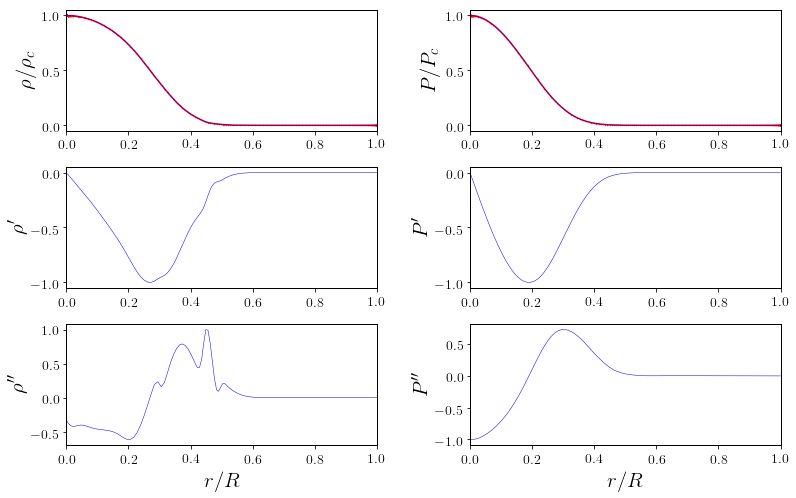

In [265]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ap2_145[-1]/ap2_145[-1][-1],ap2_145[2]/ap2_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap2_145[-1]/ap2_145[-1][-1],ap2_145rho(ap2_145[-1])/ap2_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ap2_145[-1]/ap2_145[-1][-1],ap2_145[1]/ap2_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap2_145[-1]/ap2_145[-1][-1],ap2_145p(ap2_145[-1])/ap2_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ap2_145[-1]/ap2_145[-1][-1],ap2_145drho(ap2_145[-1])/max(abs(ap2_145drho(ap2_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ap2_145[-1]/ap2_145[-1][-1],ap2_145dp(ap2_145[-1])/max(abs(ap2_145dp(ap2_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ap2_145[-1]/ap2_145[-1][-1],ap2_145ddrho(ap2_145[-1])/max(abs(ap2_145ddrho(ap2_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ap2_145[-1]/ap2_145[-1][-1],ap2_145ddp(ap2_145[-1])/max(abs(ap2_145ddp(ap2_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsap2_145.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.0

In [266]:
ap2_150=np.loadtxt('results2/ap2/15.0.dat',unpack=True)
ap2_150[3] = ap2_150[3]-ap2_150[3][-1] + 0.5*np.log(1-2*ap2_150[0][-1]/ap2_150[-1][-1])

In [267]:
s1=8e-6
s2=1e-15
ap2_150rho=interpolate.UnivariateSpline(ap2_150[-1], ap2_150[2], k=5, s=s1)
ap2_150drho=interpolate.UnivariateSpline(ap2_150[-1], ap2_150[2], k=5, s=s1).derivative(n=1)
ap2_150ddrho=interpolate.UnivariateSpline(ap2_150[-1], ap2_150[2], k=5, s=s1).derivative(n=2)

ap2_150p=interpolate.UnivariateSpline(ap2_150[-1], ap2_150[1], k=5, s=s2)
ap2_150dp=interpolate.UnivariateSpline(ap2_150[-1], ap2_150[1], k=5, s=s2).derivative(n=1)
ap2_150ddp=interpolate.UnivariateSpline(ap2_150[-1], ap2_150[1], k=5, s=s2).derivative(n=2)

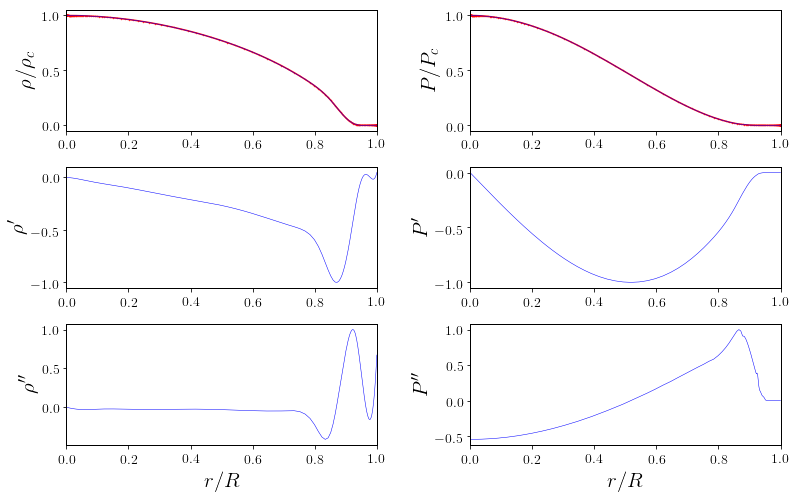

In [268]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ap2_150[-1]/ap2_150[-1][-1],ap2_150[2]/ap2_150[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap2_150[-1]/ap2_150[-1][-1],ap2_150rho(ap2_150[-1])/ap2_150[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ap2_150[-1]/ap2_150[-1][-1],ap2_150[1]/ap2_150[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap2_150[-1]/ap2_150[-1][-1],ap2_150p(ap2_150[-1])/ap2_150[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ap2_150[-1]/ap2_150[-1][-1],ap2_150drho(ap2_150[-1])/max(abs(ap2_150drho(ap2_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ap2_150[-1]/ap2_150[-1][-1],ap2_150dp(ap2_150[-1])/max(abs(ap2_150dp(ap2_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ap2_150[-1]/ap2_150[-1][-1],ap2_150ddrho(ap2_150[-1])/max(abs(ap2_150ddrho(ap2_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ap2_150[-1]/ap2_150[-1][-1],ap2_150ddp(ap2_150[-1])/max(abs(ap2_150ddp(ap2_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsap2_150.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.5

In [328]:
ap2_155=np.loadtxt('results2/ap2/15.5.dat',unpack=True)
ap2_155[3] = ap2_155[3]-ap2_155[3][-1] + 0.5*np.log(1-2*ap2_155[0][-1]/ap2_155[-1][-1])

In [329]:
s1=1e-5
s2=1e-9
ap2_155rho=interpolate.UnivariateSpline(ap2_155[-1], ap2_155[2], k=5, s=s1)
ap2_155drho=interpolate.UnivariateSpline(ap2_155[-1], ap2_155[2], k=5, s=s1).derivative(n=1)
ap2_155ddrho=interpolate.UnivariateSpline(ap2_155[-1], ap2_155[2], k=5, s=s1).derivative(n=2)

ap2_155p=interpolate.UnivariateSpline(ap2_155[-1], ap2_155[1], k=5, s=s2)
ap2_155dp=interpolate.UnivariateSpline(ap2_155[-1], ap2_155[1], k=5, s=s2).derivative(n=1)
ap2_155ddp=interpolate.UnivariateSpline(ap2_155[-1], ap2_155[1], k=5, s=s2).derivative(n=2)

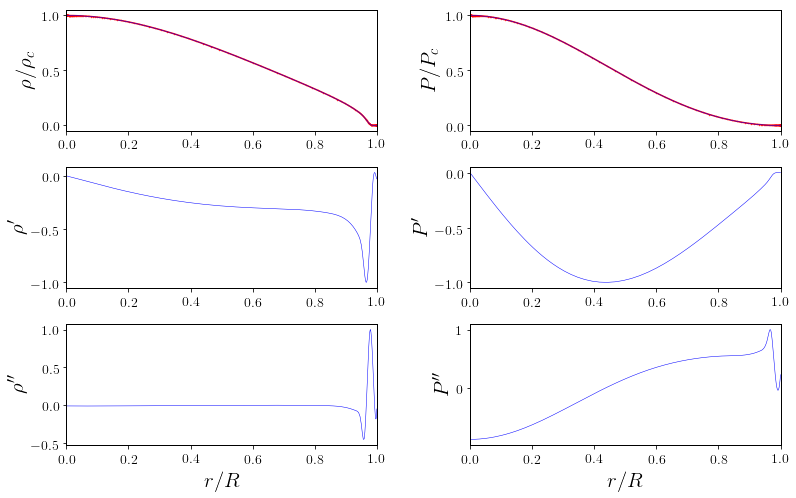

In [330]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ap2_155[-1]/ap2_155[-1][-1],ap2_155[2]/ap2_155[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap2_155[-1]/ap2_155[-1][-1],ap2_155rho(ap2_155[-1])/ap2_155[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ap2_155[-1]/ap2_155[-1][-1],ap2_155[1]/ap2_155[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap2_155[-1]/ap2_155[-1][-1],ap2_155p(ap2_155[-1])/ap2_155[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ap2_155[-1]/ap2_155[-1][-1],ap2_155drho(ap2_155[-1])/max(abs(ap2_155drho(ap2_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ap2_155[-1]/ap2_155[-1][-1],ap2_155dp(ap2_155[-1])/max(abs(ap2_155dp(ap2_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ap2_155[-1]/ap2_155[-1][-1],ap2_155ddrho(ap2_155[-1])/max(abs(ap2_155ddrho(ap2_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ap2_155[-1]/ap2_155[-1][-1],ap2_155ddp(ap2_155[-1])/max(abs(ap2_155ddp(ap2_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsap2_155.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Redshift

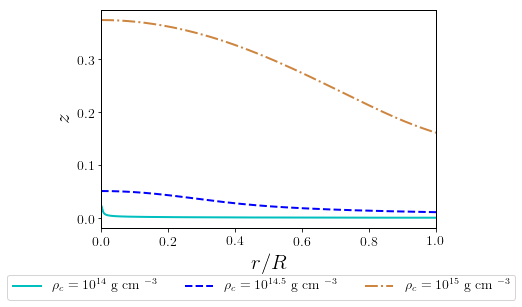

In [331]:
fig = plt.figure()

plt.plot(ap2_140[-1]/ap2_140[-1][-1],np.exp(-ap2_140[3])-1.0,color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$')
plt.plot(ap2_145[-1]/ap2_145[-1][-1],np.exp(-ap2_145[3])-1.0,color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$')
plt.plot(ap2_150[-1]/ap2_150[-1][-1],np.exp(-ap2_150[3])-1.0,color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm $^{-3}$')

l = plt.legend(bbox_to_anchor=(1.1,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$z$')
plt.xlim(0,1.0)

plt.savefig('figures/Redshiftap2.pdf', format='pdf', dpi=1000,bbox_inches="tight")

# AP3 ----------------------------------------------------------------------------------------

In [332]:
rhoap3,Pap3,nap3=np.loadtxt('EOS/ap3.dat',usecols=(2,1,0),unpack=True)

## Dominant energy condition

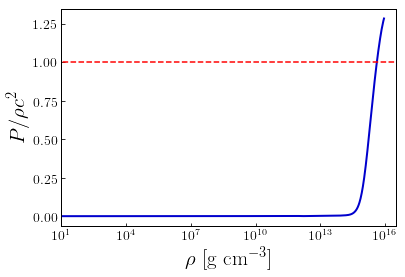

<Figure size 432x288 with 0 Axes>

In [333]:
fig, ax = plt.subplots()
plt.plot(rhoap3,np.divide(Pap3,rhoap3),lw='2',color='mediumblue')
plt.plot([0,10**(17)],[1.0,1.0],'r--',lw='1.5')

ax.set_xscale("log")
#locmaj = matplotlib.ticker.LogLocator(base=10.0,numticks=16) 
#ax.xaxis.set_major_locator(locmaj)


plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ P / \rho c^2 $')
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=16)
#ax.xaxis.set_minor_locator(locmin)
#ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
#plt.ylim(0,1)
plt.savefig('figures/ECap3.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

## Speed of sound

In [291]:
vsquared=interpolate.UnivariateSpline(rhoap3, Pap3, k=3, s=1e-25).derivative(n=1)

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


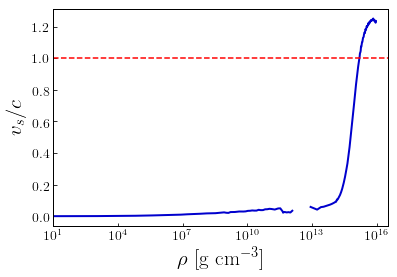

In [292]:
fig, ax = plt.subplots()
plt.plot(rhoap3,np.sqrt(vsquared(rhoap3)),lw='2.0',color='mediumblue')
plt.plot([1e+1,10**(16.5)],[1.0,1.0],'r--',lw='1.5')
plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ v_s / c $')
plt.xscale('log')
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#mpl.rcParams['axes.linewidth'] = 1.4
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
plt.savefig('figures/SSap3.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Adiabatic Index

In [293]:
Gamma=np.multiply(np.divide(np.add(rhoap3,Pap3),Pap3),vsquared(rhoap3))

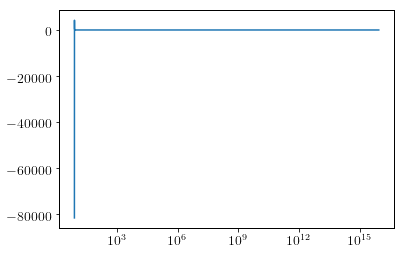

In [294]:
plt.plot(rhoap3,Gamma)
plt.xscale('log')

$$ \langle\gamma\rangle=\frac{\int_{0}^{R} e^{(\lambda+3 \nu) } \gamma(r) P(r) r^{2} d r}{\int_{0}^{R} e^{(\lambda+3 \nu) } P(r) r^{2} d r} $$

Listing all the models calculated

In [295]:
owd=os.getcwd()
path=os.chdir('results2/ap3')
listOfEntries= os.scandir(path)
models_ap3 = []
for entry in listOfEntries:
    if '1' in entry.name:
        models_ap3.append(entry.name)
os.chdir(owd)
models_ap3.sort()

In [296]:
gamma_efs1 = []
gamma_efs2 = []
gamma_crs1 = []
gamma_crs2 = []
rhosc= []
for model in models_ap3:
    m, P, rho, nu, lambd, r = np.loadtxt('results2/ap3/' + model ,unpack=True)
    nu = nu - nu[-1] + 0.5*np.log(1-2*m[-1]/r[-1])
    #lambd = np.zeros_like(r)
    #for i in range((r.shape)[0]):
    #    if i==0:
    #        lambd[i] = 0
    #    else:
    #        lambd[i] = 0.5*np.log(1/(1-2*m[i]/r[i]))
    drho=interpolate.UnivariateSpline(r, rho, k=5, s=0).derivative(n=1)
    dP=interpolate.UnivariateSpline(r, P, k=5, s=0).derivative(n=1)
    gamma = np.divide(dP(r),drho(r))
    gamma_ef1 = integrate.trapz(np.exp(lambd+3*nu)*gamma*P*(r**2),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t1 = (1/36)*integrate.trapz(np.exp((lambd+3*nu))*(16*P+(np.exp(2*lambd)-1)*(P+rho))*(np.exp(2*lambd)-1)*(r**2))/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t2 = (4*np.pi/9)*integrate.trapz(np.exp(3*lambd+3*nu)*(8*P + (np.exp(2*lambd)+1)*(P+rho))*P*(r**4),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t3 = ((16*np.pi**2)/9)*integrate.trapz(np.exp(5*lambd+3*nu)*(P+rho)*(P**2)*(r**6),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    gamma_cr1 = 4/3 + t1 + t2 + t3
    gamma_efs1.append(gamma_ef1)
    gamma_crs1.append(gamma_cr1)
    gamma_ef2 = integrate.trapz(gamma*P*r**2,r)/integrate.trapz(P*r**2,r)
    gamma_cr2 = 4/3 + (19/42)*2*m[-1]/r[-1]
    gamma_efs2.append(gamma_ef2)
    gamma_crs2.append(gamma_cr2)
    rhosc.append(rho[0]*rhodim)

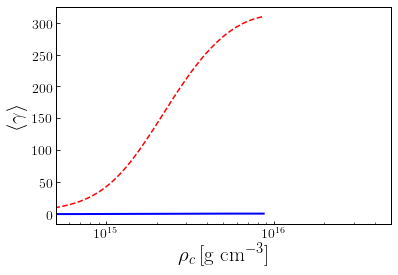

In [297]:
fig, ax = plt.subplots()
plt.plot(rhosc,gamma_crs1,lw='1.5',color='r',linestyle='--',label=r'$\gamma_{cr}$')
plt.plot(rhosc,gamma_efs1,lw='2.0',color='blue',label=r'$\langle \gamma \rangle$')

plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$\langle \gamma \rangle$')

plt.xscale('log')
plt.xlim(left=10**(14.7),right=10**(16.7))
#plt.ylim(0,10)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')
#l = plt.legend(bbox_to_anchor=(0.85,-0.15), loc="lower right", 
                #bbox_transform=fig.transFigure, ncol=2)



plt.savefig('figures/AdiabaticIndexap3.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

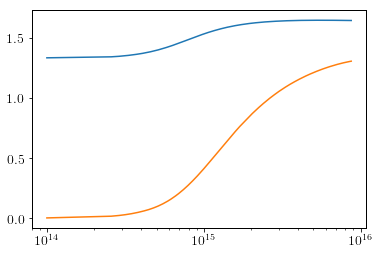

In [298]:
plt.plot(rhosc,gamma_crs2)
plt.plot(rhosc,gamma_efs2)
plt.xscale('log')

## M - $\rho_c$

In [299]:
Rap3,Map3,rhocap3=np.loadtxt('results2/ap3/MRrhoc.dat',usecols=(0,1,2),unpack=True)

In [300]:
np.amax(Map3)

2.3910781746

In [301]:
rhocap3[np.argmax(Map3)]

2344228815320000.0

In [302]:
np.log10(rhocap3[np.argmax(Map3)])

15.370000000000015

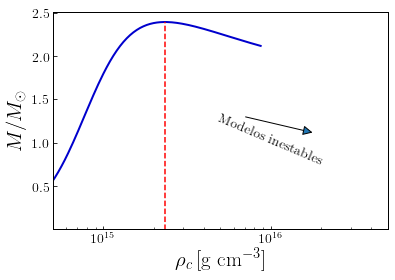

In [303]:
fig, ax = plt.subplots()

plt.plot(rhocap3,Map3,color='mediumblue',lw='2.0')
plt.plot([10**(np.log10(rhocap3[np.argmax(Map3)])),10**(np.log10(rhocap3[np.argmax(Map3)]))],[0.0,np.amax(Map3)],'r--',lw='1.5')

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)
plt.annotate("", xy=(10**(16.25),1.12), xytext=(10**(15.85),1.3), arrowprops=prop)
#plt.arrow(10**(15.6), 1.38,10**(15.7) ,-0.1 , head_width=0.05, head_length=10**(15))
plt.text(10**(15.67), 1.23, 'Modelos inestables' , fontsize=14,rotation=-23)

plt.xscale('log')
plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.xlim(left=10**(14.7),right=10**(16.7))
plt.ylim(bottom=0.01)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')

plt.savefig('figures/Mrhorel_ap3.pdf', format='pdf', dpi=1000,bbox_inches="tight")

## Tunning the interpolation of the solution

### 14.0

In [304]:
ap3_140=np.loadtxt('results2/ap3/14.0.dat',unpack=True)
ap3_140[3] = ap3_140[3]-ap3_140[3][-1] + 0.5*np.log(1-2*ap3_140[0][-1]/ap3_140[-1][-1])

In [305]:
s1=5e-7
s2=1e-15
ap3_140rho=interpolate.UnivariateSpline(ap3_140[-1], ap3_140[2], k=5, s=s1)
ap3_140drho=interpolate.UnivariateSpline(ap3_140[-1], ap3_140[2], k=5, s=s1).derivative(n=1)
ap3_140ddrho=interpolate.UnivariateSpline(ap3_140[-1], ap3_140[2], k=5, s=s1).derivative(n=2)

ap3_140p=interpolate.UnivariateSpline(ap3_140[-1], ap3_140[1], k=5, s=s2)
ap3_140dp=interpolate.UnivariateSpline(ap3_140[-1], ap3_140[1], k=5, s=s2).derivative(n=1)
ap3_140ddp=interpolate.UnivariateSpline(ap3_140[-1], ap3_140[1], k=5, s=s2).derivative(n=2)

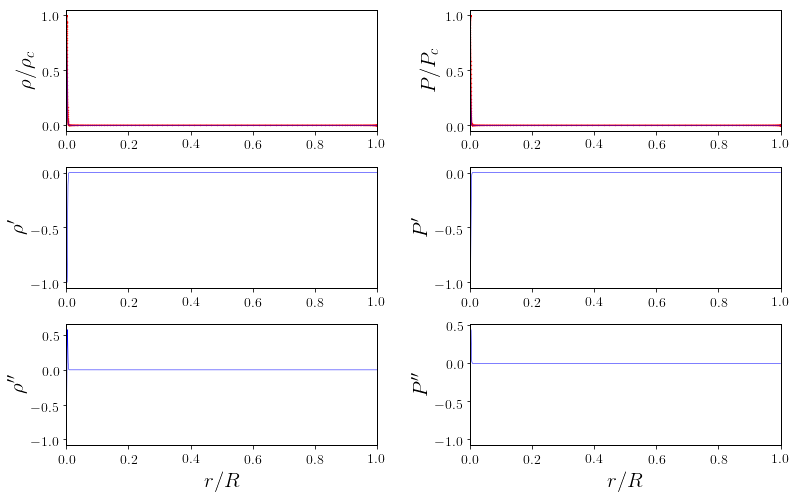

In [306]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ap3_140[-1]/ap3_140[-1][-1],ap3_140[2]/ap3_140[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap3_140[-1]/ap3_140[-1][-1],ap3_140rho(ap3_140[-1])/ap3_140[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ap3_140[-1]/ap3_140[-1][-1],ap3_140[1]/ap3_140[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap3_140[-1]/ap3_140[-1][-1],ap3_140p(ap3_140[-1])/ap3_140[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ap3_140[-1]/ap3_140[-1][-1],ap3_140drho(ap3_140[-1])/max(abs(ap3_140drho(ap3_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ap3_140[-1]/ap3_140[-1][-1],ap3_140dp(ap3_140[-1])/max(abs(ap3_140dp(ap3_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ap3_140[-1]/ap3_140[-1][-1],ap3_140ddrho(ap3_140[-1])/max(abs(ap3_140ddrho(ap3_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ap3_140[-1]/ap3_140[-1][-1],ap3_140ddp(ap3_140[-1])/max(abs(ap3_140ddp(ap3_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsap3_140.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 14.5

In [307]:
ap3_145=np.loadtxt('results2/ap3/14.5.dat',unpack=True)
ap3_145[3] = ap3_145[3]-ap3_145[3][-1] + 0.5*np.log(1-2*ap3_145[0][-1]/ap3_145[-1][-1])

In [308]:
s1=1e-7
s2=1e-12
ap3_145rho=interpolate.UnivariateSpline(ap3_145[-1], ap3_145[2], k=5, s=s1)
ap3_145drho=interpolate.UnivariateSpline(ap3_145[-1], ap3_145[2], k=5, s=s1).derivative(n=1)
ap3_145ddrho=interpolate.UnivariateSpline(ap3_145[-1], ap3_145[2], k=5, s=s1).derivative(n=2)

ap3_145p=interpolate.UnivariateSpline(ap3_145[-1], ap3_145[1], k=5, s=s2)
ap3_145dp=interpolate.UnivariateSpline(ap3_145[-1], ap3_145[1], k=5, s=s2).derivative(n=1)
ap3_145ddp=interpolate.UnivariateSpline(ap3_145[-1], ap3_145[1], k=5, s=s2).derivative(n=2)

In [309]:
ap3_145rho(0.4*ap3_145[-1][-1])*rhodim

178838871049179.94

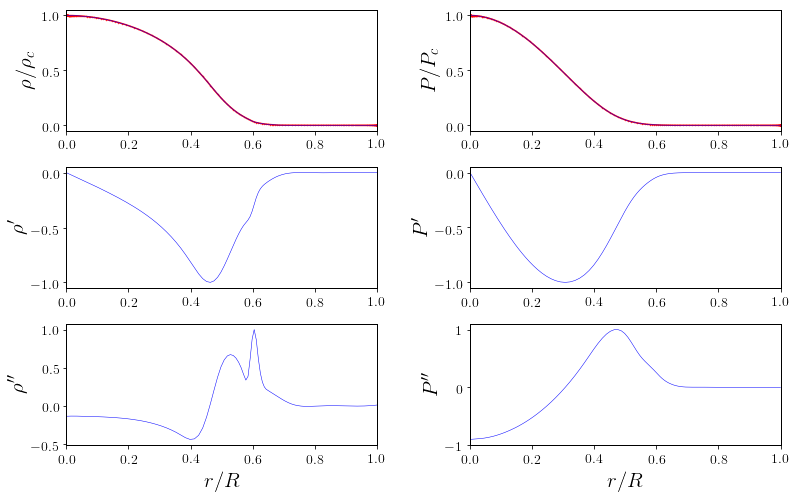

In [310]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ap3_145[-1]/ap3_145[-1][-1],ap3_145[2]/ap3_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap3_145[-1]/ap3_145[-1][-1],ap3_145rho(ap3_145[-1])/ap3_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ap3_145[-1]/ap3_145[-1][-1],ap3_145[1]/ap3_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap3_145[-1]/ap3_145[-1][-1],ap3_145p(ap3_145[-1])/ap3_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ap3_145[-1]/ap3_145[-1][-1],ap3_145drho(ap3_145[-1])/max(abs(ap3_145drho(ap3_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ap3_145[-1]/ap3_145[-1][-1],ap3_145dp(ap3_145[-1])/max(abs(ap3_145dp(ap3_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ap3_145[-1]/ap3_145[-1][-1],ap3_145ddrho(ap3_145[-1])/max(abs(ap3_145ddrho(ap3_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ap3_145[-1]/ap3_145[-1][-1],ap3_145ddp(ap3_145[-1])/max(abs(ap3_145ddp(ap3_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsap3_145.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.0

In [311]:
ap3_150=np.loadtxt('results2/ap3/15.0.dat',unpack=True)
ap3_150[3] = ap3_150[3]-ap3_150[3][-1] + 0.5*np.log(1-2*ap3_150[0][-1]/ap3_150[-1][-1])

In [312]:
s1=8e-6
s2=1e-15
ap3_150rho=interpolate.UnivariateSpline(ap3_150[-1], ap3_150[2], k=5, s=s1)
ap3_150drho=interpolate.UnivariateSpline(ap3_150[-1], ap3_150[2], k=5, s=s1).derivative(n=1)
ap3_150ddrho=interpolate.UnivariateSpline(ap3_150[-1], ap3_150[2], k=5, s=s1).derivative(n=2)

ap3_150p=interpolate.UnivariateSpline(ap3_150[-1], ap3_150[1], k=5, s=s2)
ap3_150dp=interpolate.UnivariateSpline(ap3_150[-1], ap3_150[1], k=5, s=s2).derivative(n=1)
ap3_150ddp=interpolate.UnivariateSpline(ap3_150[-1], ap3_150[1], k=5, s=s2).derivative(n=2)

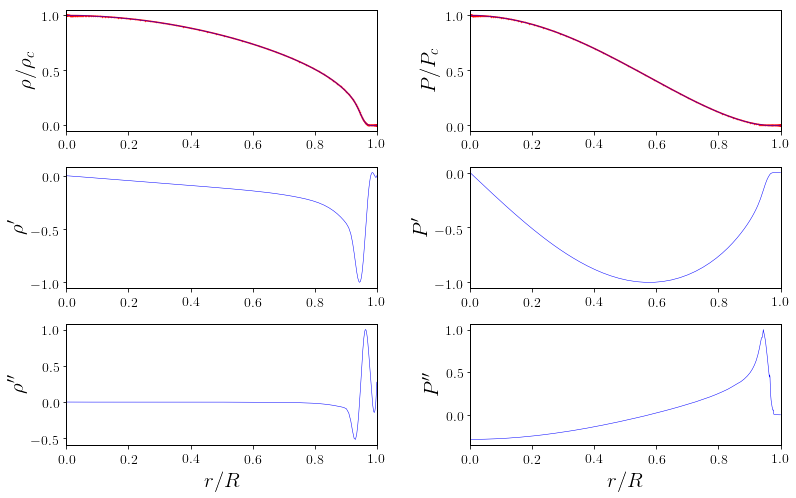

In [313]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ap3_150[-1]/ap3_150[-1][-1],ap3_150[2]/ap3_150[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap3_150[-1]/ap3_150[-1][-1],ap3_150rho(ap3_150[-1])/ap3_150[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ap3_150[-1]/ap3_150[-1][-1],ap3_150[1]/ap3_150[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap3_150[-1]/ap3_150[-1][-1],ap3_150p(ap3_150[-1])/ap3_150[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ap3_150[-1]/ap3_150[-1][-1],ap3_150drho(ap3_150[-1])/max(abs(ap3_150drho(ap3_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ap3_150[-1]/ap3_150[-1][-1],ap3_150dp(ap3_150[-1])/max(abs(ap3_150dp(ap3_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ap3_150[-1]/ap3_150[-1][-1],ap3_150ddrho(ap3_150[-1])/max(abs(ap3_150ddrho(ap3_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ap3_150[-1]/ap3_150[-1][-1],ap3_150ddp(ap3_150[-1])/max(abs(ap3_150ddp(ap3_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsap3_150.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.5

In [334]:
ap3_155=np.loadtxt('results2/ap3/15.5.dat',unpack=True)
ap3_155[3] = ap3_155[3]-ap3_155[3][-1] + 0.5*np.log(1-2*ap3_155[0][-1]/ap3_155[-1][-1])

In [335]:
s1=1e-5
s2=1e-9
ap3_155rho=interpolate.UnivariateSpline(ap3_155[-1], ap3_155[2], k=5, s=s1)
ap3_155drho=interpolate.UnivariateSpline(ap3_155[-1], ap3_155[2], k=5, s=s1).derivative(n=1)
ap3_155ddrho=interpolate.UnivariateSpline(ap3_155[-1], ap3_155[2], k=5, s=s1).derivative(n=2)

ap3_155p=interpolate.UnivariateSpline(ap3_155[-1], ap3_155[1], k=5, s=s2)
ap3_155dp=interpolate.UnivariateSpline(ap3_155[-1], ap3_155[1], k=5, s=s2).derivative(n=1)
ap3_155ddp=interpolate.UnivariateSpline(ap3_155[-1], ap3_155[1], k=5, s=s2).derivative(n=2)

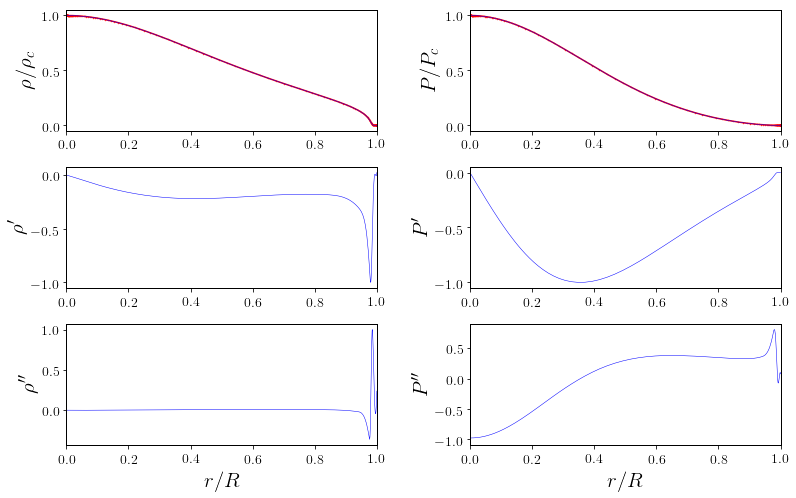

In [336]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ap3_155[-1]/ap3_155[-1][-1],ap3_155[2]/ap3_155[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap3_155[-1]/ap3_155[-1][-1],ap3_155rho(ap3_155[-1])/ap3_155[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ap3_155[-1]/ap3_155[-1][-1],ap3_155[1]/ap3_155[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap3_155[-1]/ap3_155[-1][-1],ap3_155p(ap3_155[-1])/ap3_155[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ap3_155[-1]/ap3_155[-1][-1],ap3_155drho(ap3_155[-1])/max(abs(ap3_155drho(ap3_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ap3_155[-1]/ap3_155[-1][-1],ap3_155dp(ap3_155[-1])/max(abs(ap3_155dp(ap3_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ap3_155[-1]/ap3_155[-1][-1],ap3_155ddrho(ap3_155[-1])/max(abs(ap3_155ddrho(ap3_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ap3_155[-1]/ap3_155[-1][-1],ap3_155ddp(ap3_155[-1])/max(abs(ap3_155ddp(ap3_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsap3_155.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Redshift

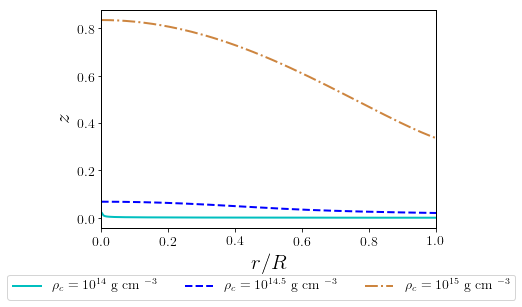

In [337]:
fig = plt.figure()

plt.plot(ap3_140[-1]/ap3_140[-1][-1],np.exp(-ap3_140[3])-1.0,color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$')
plt.plot(ap3_145[-1]/ap3_145[-1][-1],np.exp(-ap3_145[3])-1.0,color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$')
plt.plot(ap3_150[-1]/ap3_150[-1][-1],np.exp(-ap3_150[3])-1.0,color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm $^{-3}$')

l = plt.legend(bbox_to_anchor=(1.1,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$z$')
plt.xlim(0,1.0)

plt.savefig('figures/Redshiftap3.pdf', format='pdf', dpi=1000,bbox_inches="tight")

# AP4 -----------------------------------------------------------------------------------------

In [367]:
rhoap4,Pap4,nap4=np.loadtxt('EOS/ap4.dat',usecols=(2,1,0),unpack=True)

## Dominant energy condition

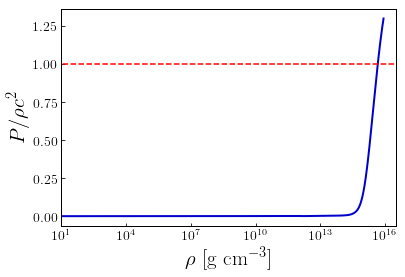

<Figure size 432x288 with 0 Axes>

In [368]:
fig, ax = plt.subplots()
plt.plot(rhoap4,np.divide(Pap4,rhoap4),lw='2',color='mediumblue')
plt.plot([0,10**(17)],[1.0,1.0],'r--',lw='1.5')

ax.set_xscale("log")
#locmaj = matplotlib.ticker.LogLocator(base=10.0,numticks=16) 
#ax.xaxis.set_major_locator(locmaj)


plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ P / \rho c^2 $')
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=16)
#ax.xaxis.set_minor_locator(locmin)
#ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
#plt.ylim(0,1)
plt.savefig('figures/ECap4.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

## Speed of sound

In [369]:
vsquared=interpolate.UnivariateSpline(rhoap4, Pap4, k=3, s=0).derivative(n=1)

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


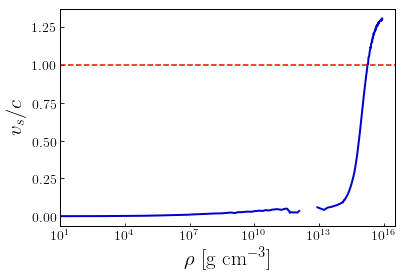

In [370]:
fig, ax = plt.subplots()
plt.plot(rhoap4,np.sqrt(vsquared(rhoap4)),lw='2.0',color='mediumblue')
plt.plot([1e+1,10**(16.5)],[1.0,1.0],'r--',lw='1.5')
plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ v_s / c $')
plt.xscale('log')
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#mpl.rcParams['axes.linewidth'] = 1.4
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
plt.savefig('figures/SSap4.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Adiabatic Index

In [371]:
Gamma=np.multiply(np.divide(np.add(rhoap4,Pap4),Pap4),vsquared(rhoap4))

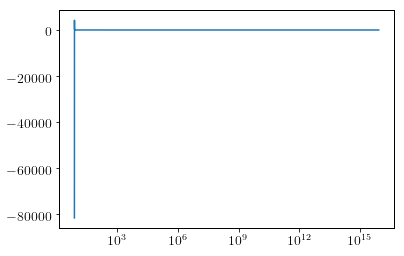

In [372]:
plt.plot(rhoap4,Gamma)
plt.xscale('log')

$$ \langle\gamma\rangle=\frac{\int_{0}^{R} e^{(\lambda+3 \nu) } \gamma(r) P(r) r^{2} d r}{\int_{0}^{R} e^{(\lambda+3 \nu) } P(r) r^{2} d r} $$

Listing all the models calculated

In [373]:
owd=os.getcwd()
path=os.chdir('results2/ap4')
listOfEntries= os.scandir(path)
models_ap4 = []
for entry in listOfEntries:
    if '1' in entry.name:
        models_ap4.append(entry.name)
os.chdir(owd)
models_ap4.sort()

In [374]:
gamma_efs1 = []
gamma_efs2 = []
gamma_crs1 = []
gamma_crs2 = []
rhosc= []
for model in models_ap4:
    m, P, rho, nu, lambd, r = np.loadtxt('results2/ap4/' + model ,unpack=True)
    nu = nu - nu[-1] + 0.5*np.log(1-2*m[-1]/r[-1])
    #lambd = np.zeros_like(r)
    #for i in range((r.shape)[0]):
    #    if i==0:
    #        lambd[i] = 0
    #    else:
    #        lambd[i] = 0.5*np.log(1/(1-2*m[i]/r[i]))
    drho=interpolate.UnivariateSpline(r, rho, k=5, s=0).derivative(n=1)
    dP=interpolate.UnivariateSpline(r, P, k=5, s=0).derivative(n=1)
    gamma = np.divide(dP(r),drho(r))
    gamma_ef1 = integrate.trapz(np.exp(lambd+3*nu)*gamma*P*(r**2),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t1 = (1/36)*integrate.trapz(np.exp((lambd+3*nu))*(16*P+(np.exp(2*lambd)-1)*(P+rho))*(np.exp(2*lambd)-1)*(r**2))/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t2 = (4*np.pi/9)*integrate.trapz(np.exp(3*lambd+3*nu)*(8*P + (np.exp(2*lambd)+1)*(P+rho))*P*(r**4),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t3 = ((16*np.pi**2)/9)*integrate.trapz(np.exp(5*lambd+3*nu)*(P+rho)*(P**2)*(r**6),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    gamma_cr1 = 4/3 + t1 + t2 + t3
    gamma_efs1.append(gamma_ef1)
    gamma_crs1.append(gamma_cr1)
    gamma_ef2 = integrate.trapz(gamma*P*r**2,r)/integrate.trapz(P*r**2,r)
    gamma_cr2 = 4/3 + (19/42)*2*m[-1]/r[-1]
    gamma_efs2.append(gamma_ef2)
    gamma_crs2.append(gamma_cr2)
    rhosc.append(rho[0]*rhodim)

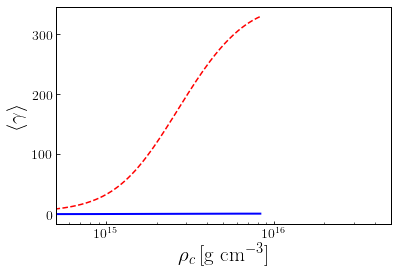

In [375]:
fig, ax = plt.subplots()
plt.plot(rhosc,gamma_crs1,lw='1.5',color='r',linestyle='--',label=r'$\gamma_{cr}$')
plt.plot(rhosc,gamma_efs1,lw='2.0',color='blue',label=r'$\langle \gamma \rangle$')

plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$\langle \gamma \rangle$')

plt.xscale('log')
plt.xlim(left=10**(14.7),right=10**(16.7))
#plt.ylim(0,10)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')
#l = plt.legend(bbox_to_anchor=(0.85,-0.15), loc="lower right", 
                #bbox_transform=fig.transFigure, ncol=2)



plt.savefig('figures/AdiabaticIndexap4.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

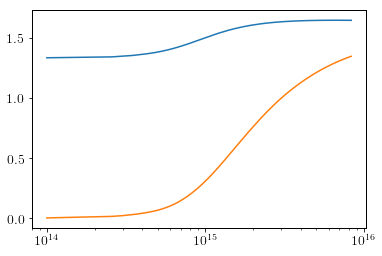

In [376]:
plt.plot(rhosc,gamma_crs2)
plt.plot(rhosc,gamma_efs2)
plt.xscale('log')

## M - $\rho_c$

In [377]:
Rap4,Map4,rhocap4=np.loadtxt('results2/ap4/MRrhoc.dat',usecols=(0,1,2),unpack=True)

In [378]:
np.amax(Map4)

2.21368406588

In [379]:
rhocap4[np.argmax(Map4)]

2754228703340000.0

In [380]:
np.log10(rhocap4[np.argmax(Map4)])

15.440000000000289

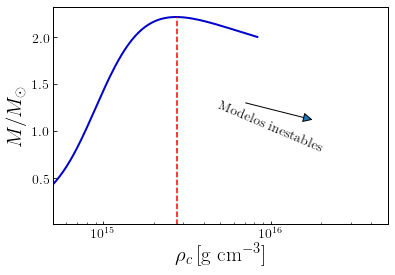

In [381]:
fig, ax = plt.subplots()

plt.plot(rhocap4,Map4,color='mediumblue',lw='2.0')
plt.plot([10**(np.log10(rhocap4[np.argmax(Map4)])),10**(np.log10(rhocap4[np.argmax(Map4)]))],[0.0,np.amax(Map4)],'r--',lw='1.5')

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)
plt.annotate("", xy=(10**(16.25),1.12), xytext=(10**(15.85),1.3), arrowprops=prop)
#plt.arrow(10**(15.6), 1.38,10**(15.7) ,-0.1 , head_width=0.05, head_length=10**(15))
plt.text(10**(15.67), 1.23, 'Modelos inestables' , fontsize=14,rotation=-23)

plt.xscale('log')
plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.xlim(left=10**(14.7),right=10**(16.7))
plt.ylim(bottom=0.01)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')

plt.savefig('figures/Mrhorel_ap4.pdf', format='pdf', dpi=1000,bbox_inches="tight")

## Tunning the interpolation of the solution

### 14.0

In [382]:
ap4_140=np.loadtxt('results2/ap4/14.0.dat',unpack=True)
ap4_140[3] = ap4_140[3]-ap4_140[3][-1] + 0.5*np.log(1-2*ap4_140[0][-1]/ap4_140[-1][-1])

In [383]:
s1=5e-7
s2=1e-15
ap4_140rho=interpolate.UnivariateSpline(ap4_140[-1], ap4_140[2], k=5, s=s1)
ap4_140drho=interpolate.UnivariateSpline(ap4_140[-1], ap4_140[2], k=5, s=s1).derivative(n=1)
ap4_140ddrho=interpolate.UnivariateSpline(ap4_140[-1], ap4_140[2], k=5, s=s1).derivative(n=2)

ap4_140p=interpolate.UnivariateSpline(ap4_140[-1], ap4_140[1], k=5, s=s2)
ap4_140dp=interpolate.UnivariateSpline(ap4_140[-1], ap4_140[1], k=5, s=s2).derivative(n=1)
ap4_140ddp=interpolate.UnivariateSpline(ap4_140[-1], ap4_140[1], k=5, s=s2).derivative(n=2)

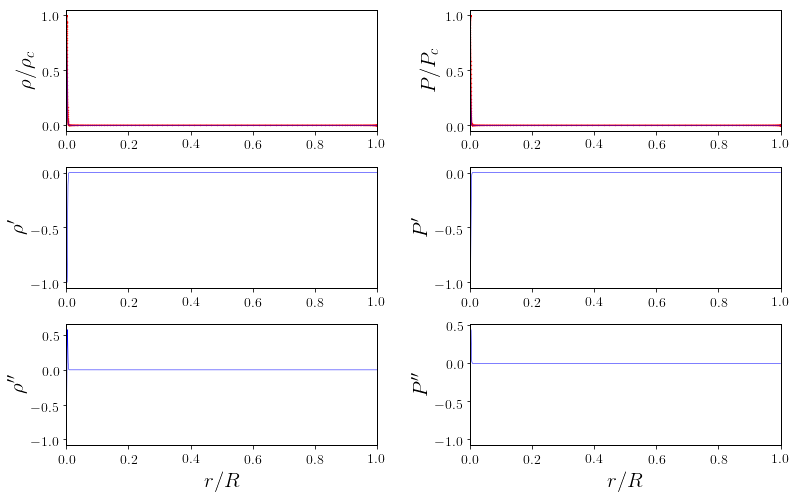

In [384]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ap4_140[-1]/ap4_140[-1][-1],ap4_140[2]/ap4_140[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap4_140[-1]/ap4_140[-1][-1],ap4_140rho(ap4_140[-1])/ap4_140[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ap4_140[-1]/ap4_140[-1][-1],ap4_140[1]/ap4_140[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap4_140[-1]/ap4_140[-1][-1],ap4_140p(ap4_140[-1])/ap4_140[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ap4_140[-1]/ap4_140[-1][-1],ap4_140drho(ap4_140[-1])/max(abs(ap4_140drho(ap4_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ap4_140[-1]/ap4_140[-1][-1],ap4_140dp(ap4_140[-1])/max(abs(ap4_140dp(ap4_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ap4_140[-1]/ap4_140[-1][-1],ap4_140ddrho(ap4_140[-1])/max(abs(ap4_140ddrho(ap4_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ap4_140[-1]/ap4_140[-1][-1],ap4_140ddp(ap4_140[-1])/max(abs(ap4_140ddp(ap4_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsap4_140.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 14.5

In [385]:
ap4_145=np.loadtxt('results2/ap4/14.5.dat',unpack=True)
ap4_145[3] = ap4_145[3]-ap4_145[3][-1] + 0.5*np.log(1-2*ap4_145[0][-1]/ap4_145[-1][-1])

In [386]:
s1=1e-7
s2=1e-12
ap4_145rho=interpolate.UnivariateSpline(ap4_145[-1], ap4_145[2], k=5, s=s1)
ap4_145drho=interpolate.UnivariateSpline(ap4_145[-1], ap4_145[2], k=5, s=s1).derivative(n=1)
ap4_145ddrho=interpolate.UnivariateSpline(ap4_145[-1], ap4_145[2], k=5, s=s1).derivative(n=2)

ap4_145p=interpolate.UnivariateSpline(ap4_145[-1], ap4_145[1], k=5, s=s2)
ap4_145dp=interpolate.UnivariateSpline(ap4_145[-1], ap4_145[1], k=5, s=s2).derivative(n=1)
ap4_145ddp=interpolate.UnivariateSpline(ap4_145[-1], ap4_145[1], k=5, s=s2).derivative(n=2)

In [387]:
ap4_145rho(0.4*ap4_145[-1][-1])*rhodim

136934509100509.03

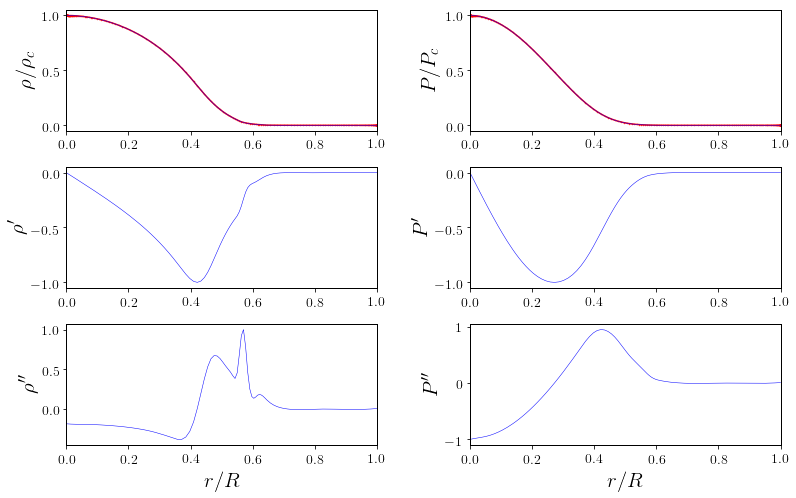

In [388]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ap4_145[-1]/ap4_145[-1][-1],ap4_145[2]/ap4_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap4_145[-1]/ap4_145[-1][-1],ap4_145rho(ap4_145[-1])/ap4_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ap4_145[-1]/ap4_145[-1][-1],ap4_145[1]/ap4_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap4_145[-1]/ap4_145[-1][-1],ap4_145p(ap4_145[-1])/ap4_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ap4_145[-1]/ap4_145[-1][-1],ap4_145drho(ap4_145[-1])/max(abs(ap4_145drho(ap4_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ap4_145[-1]/ap4_145[-1][-1],ap4_145dp(ap4_145[-1])/max(abs(ap4_145dp(ap4_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ap4_145[-1]/ap4_145[-1][-1],ap4_145ddrho(ap4_145[-1])/max(abs(ap4_145ddrho(ap4_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ap4_145[-1]/ap4_145[-1][-1],ap4_145ddp(ap4_145[-1])/max(abs(ap4_145ddp(ap4_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsap4_145.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.0

In [389]:
ap4_150=np.loadtxt('results2/ap4/15.0.dat',unpack=True)
ap4_150[3] = ap4_150[3]-ap4_150[3][-1] + 0.5*np.log(1-2*ap4_150[0][-1]/ap4_150[-1][-1])

In [390]:
s1=8e-6
s2=1e-15
ap4_150rho=interpolate.UnivariateSpline(ap4_150[-1], ap4_150[2], k=5, s=s1)
ap4_150drho=interpolate.UnivariateSpline(ap4_150[-1], ap4_150[2], k=5, s=s1).derivative(n=1)
ap4_150ddrho=interpolate.UnivariateSpline(ap4_150[-1], ap4_150[2], k=5, s=s1).derivative(n=2)

ap4_150p=interpolate.UnivariateSpline(ap4_150[-1], ap4_150[1], k=5, s=s2)
ap4_150dp=interpolate.UnivariateSpline(ap4_150[-1], ap4_150[1], k=5, s=s2).derivative(n=1)
ap4_150ddp=interpolate.UnivariateSpline(ap4_150[-1], ap4_150[1], k=5, s=s2).derivative(n=2)

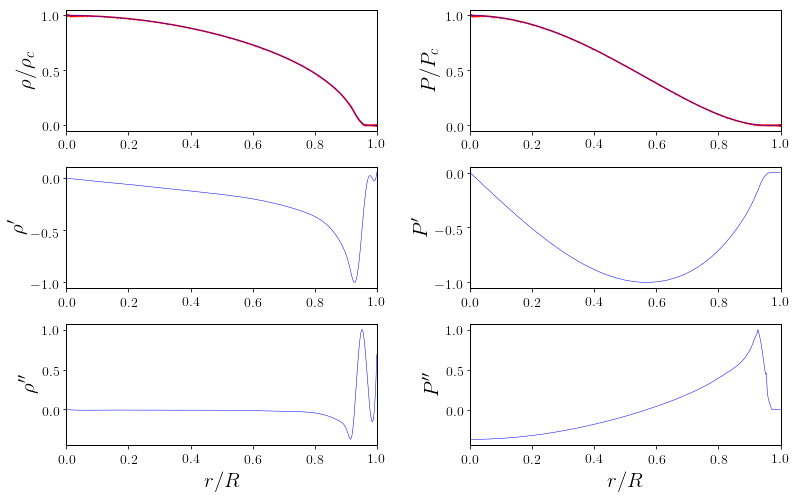

In [391]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ap4_150[-1]/ap4_150[-1][-1],ap4_150[2]/ap4_150[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap4_150[-1]/ap4_150[-1][-1],ap4_150rho(ap4_150[-1])/ap4_150[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ap4_150[-1]/ap4_150[-1][-1],ap4_150[1]/ap4_150[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap4_150[-1]/ap4_150[-1][-1],ap4_150p(ap4_150[-1])/ap4_150[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ap4_150[-1]/ap4_150[-1][-1],ap4_150drho(ap4_150[-1])/max(abs(ap4_150drho(ap4_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ap4_150[-1]/ap4_150[-1][-1],ap4_150dp(ap4_150[-1])/max(abs(ap4_150dp(ap4_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ap4_150[-1]/ap4_150[-1][-1],ap4_150ddrho(ap4_150[-1])/max(abs(ap4_150ddrho(ap4_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ap4_150[-1]/ap4_150[-1][-1],ap4_150ddp(ap4_150[-1])/max(abs(ap4_150ddp(ap4_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsap4_150.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.5

In [392]:
ap4_155=np.loadtxt('results2/ap4/15.5.dat',unpack=True)
ap4_155[3] = ap4_155[3]-ap4_155[3][-1] + 0.5*np.log(1-2*ap4_155[0][-1]/ap4_155[-1][-1])

In [393]:
s1=1e-5
s2=1e-9
ap4_155rho=interpolate.UnivariateSpline(ap4_155[-1], ap4_155[2], k=5, s=s1)
ap4_155drho=interpolate.UnivariateSpline(ap4_155[-1], ap4_155[2], k=5, s=s1).derivative(n=1)
ap4_155ddrho=interpolate.UnivariateSpline(ap4_155[-1], ap4_155[2], k=5, s=s1).derivative(n=2)

ap4_155p=interpolate.UnivariateSpline(ap4_155[-1], ap4_155[1], k=5, s=s2)
ap4_155dp=interpolate.UnivariateSpline(ap4_155[-1], ap4_155[1], k=5, s=s2).derivative(n=1)
ap4_155ddp=interpolate.UnivariateSpline(ap4_155[-1], ap4_155[1], k=5, s=s2).derivative(n=2)

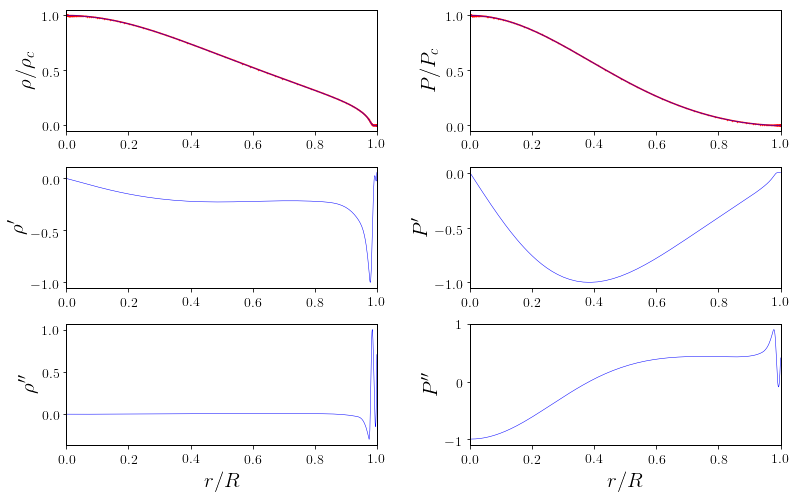

In [394]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ap4_155[-1]/ap4_155[-1][-1],ap4_155[2]/ap4_155[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap4_155[-1]/ap4_155[-1][-1],ap4_155rho(ap4_155[-1])/ap4_155[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(ap4_155[-1]/ap4_155[-1][-1],ap4_155[1]/ap4_155[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ap4_155[-1]/ap4_155[-1][-1],ap4_155p(ap4_155[-1])/ap4_155[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(ap4_155[-1]/ap4_155[-1][-1],ap4_155drho(ap4_155[-1])/max(abs(ap4_155drho(ap4_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ap4_155[-1]/ap4_155[-1][-1],ap4_155dp(ap4_155[-1])/max(abs(ap4_155dp(ap4_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(ap4_155[-1]/ap4_155[-1][-1],ap4_155ddrho(ap4_155[-1])/max(abs(ap4_155ddrho(ap4_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ap4_155[-1]/ap4_155[-1][-1],ap4_155ddp(ap4_155[-1])/max(abs(ap4_155ddp(ap4_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsap4_155.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Redshift

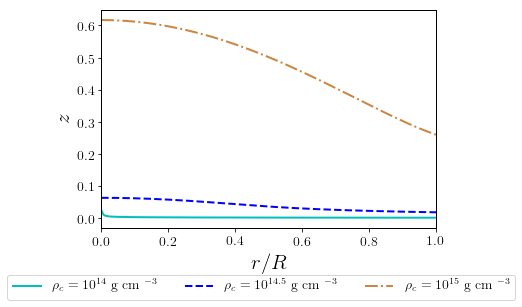

In [395]:
fig = plt.figure()

plt.plot(ap4_140[-1]/ap4_140[-1][-1],np.exp(-ap4_140[3])-1.0,color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$')
plt.plot(ap4_145[-1]/ap4_145[-1][-1],np.exp(-ap4_145[3])-1.0,color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$')
plt.plot(ap4_150[-1]/ap4_150[-1][-1],np.exp(-ap4_150[3])-1.0,color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm $^{-3}$')

l = plt.legend(bbox_to_anchor=(1.1,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$z$')
plt.xlim(0,1.0)

plt.savefig('figures/Redshiftap4.pdf', format='pdf', dpi=1000,bbox_inches="tight")

# BBB2 --------------------------------------------------------------------------------------------

In [396]:
rhobbb2,Pbbb2,nbbb2=np.loadtxt('EOS/bbb2.dat',usecols=(2,1,0),unpack=True)

## Dominant energy condition

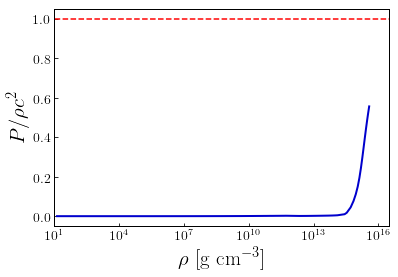

<Figure size 432x288 with 0 Axes>

In [397]:
fig, ax = plt.subplots()
plt.plot(rhobbb2,np.divide(Pbbb2,rhobbb2),lw='2',color='mediumblue')
plt.plot([0,10**(17)],[1.0,1.0],'r--',lw='1.5')

ax.set_xscale("log")
#locmaj = matplotlib.ticker.LogLocator(base=10.0,numticks=16) 
#ax.xaxis.set_major_locator(locmaj)


plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ P / \rho c^2 $')
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=16)
#ax.xaxis.set_minor_locator(locmin)
#ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
#plt.ylim(0,1)
plt.savefig('figures/ECbbb2.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

## Speed of sound

In [398]:
vsquared=interpolate.UnivariateSpline(rhobbb2, Pbbb2, k=3, s=0).derivative(n=1)

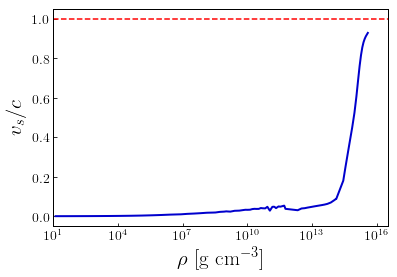

In [399]:
fig, ax = plt.subplots()
plt.plot(rhobbb2,np.sqrt(vsquared(rhobbb2)),lw='2.0',color='mediumblue')
plt.plot([1e+1,10**(16.5)],[1.0,1.0],'r--',lw='1.5')
plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ v_s / c $')
plt.xscale('log')
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#mpl.rcParams['axes.linewidth'] = 1.4
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
plt.savefig('figures/SSbbb2.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Adiabatic Index

In [400]:
Gamma=np.multiply(np.divide(np.add(rhobbb2,Pbbb2),Pbbb2),vsquared(rhobbb2))

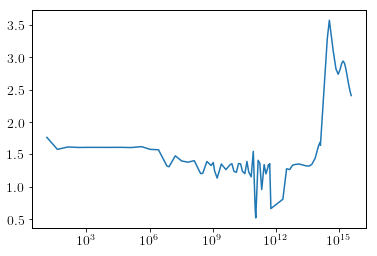

In [401]:
plt.plot(rhobbb2,Gamma)
plt.xscale('log')

$$ \langle\gamma\rangle=\frac{\int_{0}^{R} e^{(\lambda+3 \nu) } \gamma(r) P(r) r^{2} d r}{\int_{0}^{R} e^{(\lambda+3 \nu) } P(r) r^{2} d r} $$

Listing all the models calculated

In [402]:
owd=os.getcwd()
path=os.chdir('results2/bbb2')
listOfEntries= os.scandir(path)
models_bbb2 = []
for entry in listOfEntries:
    if '1' in entry.name:
        models_bbb2.append(entry.name)
os.chdir(owd)
models_bbb2.sort()

In [403]:
gamma_efs1 = []
gamma_efs2 = []
gamma_crs1 = []
gamma_crs2 = []
rhosc= []
for model in models_bbb2:
    m, P, rho, nu, lambd, r = np.loadtxt('results2/bbb2/' + model ,unpack=True)
    nu = nu - nu[-1] + 0.5*np.log(1-2*m[-1]/r[-1])
    #lambd = np.zeros_like(r)
    #for i in range((r.shape)[0]):
    #    if i==0:
    #        lambd[i] = 0
    #    else:
    #        lambd[i] = 0.5*np.log(1/(1-2*m[i]/r[i]))
    drho=interpolate.UnivariateSpline(r, rho, k=5, s=0).derivative(n=1)
    dP=interpolate.UnivariateSpline(r, P, k=5, s=0).derivative(n=1)
    gamma = np.divide(dP(r),drho(r))
    gamma_ef1 = integrate.trapz(np.exp(lambd+3*nu)*gamma*P*(r**2),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t1 = (1/36)*integrate.trapz(np.exp((lambd+3*nu))*(16*P+(np.exp(2*lambd)-1)*(P+rho))*(np.exp(2*lambd)-1)*(r**2))/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t2 = (4*np.pi/9)*integrate.trapz(np.exp(3*lambd+3*nu)*(8*P + (np.exp(2*lambd)+1)*(P+rho))*P*(r**4),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t3 = ((16*np.pi**2)/9)*integrate.trapz(np.exp(5*lambd+3*nu)*(P+rho)*(P**2)*(r**6),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    gamma_cr1 = 4/3 + t1 + t2 + t3
    gamma_efs1.append(gamma_ef1)
    gamma_crs1.append(gamma_cr1)
    gamma_ef2 = integrate.trapz(gamma*P*r**2,r)/integrate.trapz(P*r**2,r)
    gamma_cr2 = 4/3 + (19/42)*2*m[-1]/r[-1]
    gamma_efs2.append(gamma_ef2)
    gamma_crs2.append(gamma_cr2)
    rhosc.append(rho[0]*rhodim)

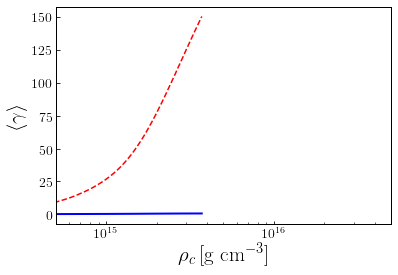

In [404]:
fig, ax = plt.subplots()
plt.plot(rhosc,gamma_crs1,lw='1.5',color='r',linestyle='--',label=r'$\gamma_{cr}$')
plt.plot(rhosc,gamma_efs1,lw='2.0',color='blue',label=r'$\langle \gamma \rangle$')

plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$\langle \gamma \rangle$')

plt.xscale('log')
plt.xlim(left=10**(14.7),right=10**(16.7))
#plt.ylim(0,10)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')
#l = plt.legend(bbox_to_anchor=(0.85,-0.15), loc="lower right", 
                #bbox_transform=fig.transFigure, ncol=2)



plt.savefig('figures/AdiabaticIndexbbb2.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

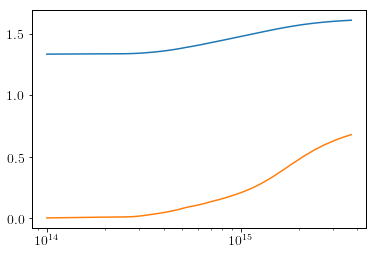

In [405]:
plt.plot(rhosc,gamma_crs2)
plt.plot(rhosc,gamma_efs2)
plt.xscale('log')

## M - $\rho_c$

In [406]:
Rbbb2,Mbbb2,rhocbbb2=np.loadtxt('results2/bbb2/MRrhoc.dat',usecols=(0,1,2),unpack=True)

In [407]:
np.amax(Mbbb2)

1.92018097555

In [408]:
rhocbbb2[np.argmax(Mbbb2)]

3162277660170000.0

In [409]:
np.log10(rhocbbb2[np.argmax(Mbbb2)])

15.500000000000222

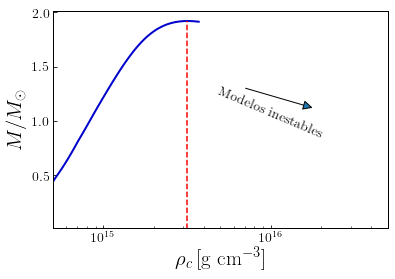

In [410]:
fig, ax = plt.subplots()

plt.plot(rhocbbb2,Mbbb2,color='mediumblue',lw='2.0')
plt.plot([10**(np.log10(rhocbbb2[np.argmax(Mbbb2)])),10**(np.log10(rhocbbb2[np.argmax(Mbbb2)]))],[0.0,np.amax(Mbbb2)],'r--',lw='1.5')

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)
plt.annotate("", xy=(10**(16.25),1.12), xytext=(10**(15.85),1.3), arrowprops=prop)
#plt.arrow(10**(15.6), 1.38,10**(15.7) ,-0.1 , head_width=0.05, head_length=10**(15))
plt.text(10**(15.67), 1.23, 'Modelos inestables' , fontsize=14,rotation=-23)

plt.xscale('log')
plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.xlim(left=10**(14.7),right=10**(16.7))
plt.ylim(bottom=0.01)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')

plt.savefig('figures/Mrhorel_bbb2.pdf', format='pdf', dpi=1000,bbox_inches="tight")

## Tunning the interpolation of the solution

### 14.0

In [411]:
bbb2_140=np.loadtxt('results2/bbb2/14.0.dat',unpack=True)
bbb2_140[3] = bbb2_140[3]-bbb2_140[3][-1] + 0.5*np.log(1-2*bbb2_140[0][-1]/bbb2_140[-1][-1])

In [412]:
s1=5e-7
s2=1e-15
bbb2_140rho=interpolate.UnivariateSpline(bbb2_140[-1], bbb2_140[2], k=5, s=s1)
bbb2_140drho=interpolate.UnivariateSpline(bbb2_140[-1], bbb2_140[2], k=5, s=s1).derivative(n=1)
bbb2_140ddrho=interpolate.UnivariateSpline(bbb2_140[-1], bbb2_140[2], k=5, s=s1).derivative(n=2)

bbb2_140p=interpolate.UnivariateSpline(bbb2_140[-1], bbb2_140[1], k=5, s=s2)
bbb2_140dp=interpolate.UnivariateSpline(bbb2_140[-1], bbb2_140[1], k=5, s=s2).derivative(n=1)
bbb2_140ddp=interpolate.UnivariateSpline(bbb2_140[-1], bbb2_140[1], k=5, s=s2).derivative(n=2)

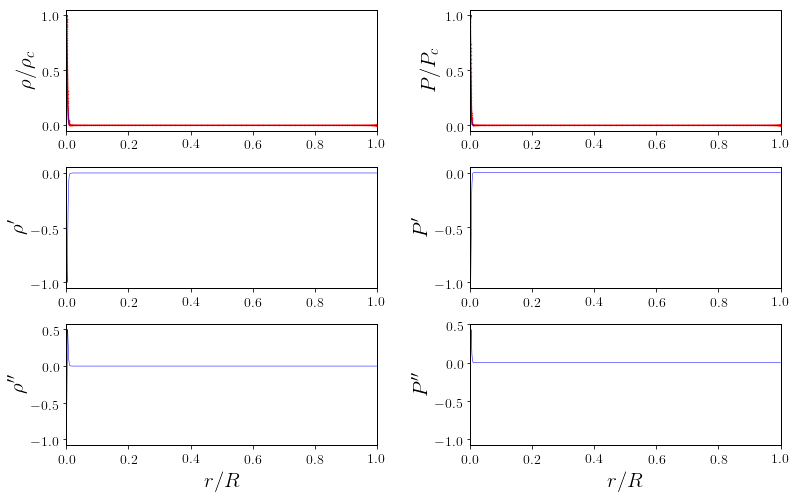

In [413]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bbb2_140[-1]/bbb2_140[-1][-1],bbb2_140[2]/bbb2_140[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bbb2_140[-1]/bbb2_140[-1][-1],bbb2_140rho(bbb2_140[-1])/bbb2_140[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bbb2_140[-1]/bbb2_140[-1][-1],bbb2_140[1]/bbb2_140[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bbb2_140[-1]/bbb2_140[-1][-1],bbb2_140p(bbb2_140[-1])/bbb2_140[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bbb2_140[-1]/bbb2_140[-1][-1],bbb2_140drho(bbb2_140[-1])/max(abs(bbb2_140drho(bbb2_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bbb2_140[-1]/bbb2_140[-1][-1],bbb2_140dp(bbb2_140[-1])/max(abs(bbb2_140dp(bbb2_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bbb2_140[-1]/bbb2_140[-1][-1],bbb2_140ddrho(bbb2_140[-1])/max(abs(bbb2_140ddrho(bbb2_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bbb2_140[-1]/bbb2_140[-1][-1],bbb2_140ddp(bbb2_140[-1])/max(abs(bbb2_140ddp(bbb2_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbbb2_140.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 14.5

In [414]:
bbb2_145=np.loadtxt('results2/bbb2/14.5.dat',unpack=True)
bbb2_145[3] = bbb2_145[3]-bbb2_145[3][-1] + 0.5*np.log(1-2*bbb2_145[0][-1]/bbb2_145[-1][-1])

In [415]:
s1=1e-7
s2=1e-12
bbb2_145rho=interpolate.UnivariateSpline(bbb2_145[-1], bbb2_145[2], k=5, s=s1)
bbb2_145drho=interpolate.UnivariateSpline(bbb2_145[-1], bbb2_145[2], k=5, s=s1).derivative(n=1)
bbb2_145ddrho=interpolate.UnivariateSpline(bbb2_145[-1], bbb2_145[2], k=5, s=s1).derivative(n=2)

bbb2_145p=interpolate.UnivariateSpline(bbb2_145[-1], bbb2_145[1], k=5, s=s2)
bbb2_145dp=interpolate.UnivariateSpline(bbb2_145[-1], bbb2_145[1], k=5, s=s2).derivative(n=1)
bbb2_145ddp=interpolate.UnivariateSpline(bbb2_145[-1], bbb2_145[1], k=5, s=s2).derivative(n=2)

In [416]:
bbb2_145rho(0.4*bbb2_145[-1][-1])*rhodim

36608848952787.06

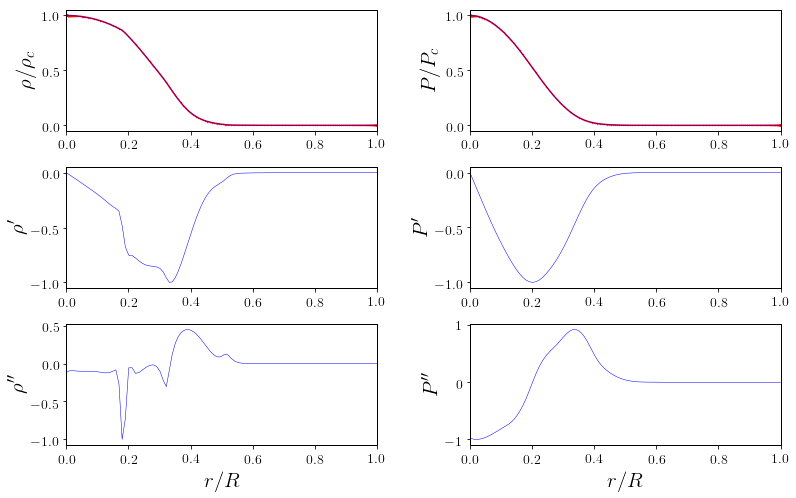

In [417]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bbb2_145[-1]/bbb2_145[-1][-1],bbb2_145[2]/bbb2_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bbb2_145[-1]/bbb2_145[-1][-1],bbb2_145rho(bbb2_145[-1])/bbb2_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bbb2_145[-1]/bbb2_145[-1][-1],bbb2_145[1]/bbb2_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bbb2_145[-1]/bbb2_145[-1][-1],bbb2_145p(bbb2_145[-1])/bbb2_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bbb2_145[-1]/bbb2_145[-1][-1],bbb2_145drho(bbb2_145[-1])/max(abs(bbb2_145drho(bbb2_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bbb2_145[-1]/bbb2_145[-1][-1],bbb2_145dp(bbb2_145[-1])/max(abs(bbb2_145dp(bbb2_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bbb2_145[-1]/bbb2_145[-1][-1],bbb2_145ddrho(bbb2_145[-1])/max(abs(bbb2_145ddrho(bbb2_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bbb2_145[-1]/bbb2_145[-1][-1],bbb2_145ddp(bbb2_145[-1])/max(abs(bbb2_145ddp(bbb2_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbbb2_145.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.0

In [418]:
bbb2_150=np.loadtxt('results2/bbb2/15.0.dat',unpack=True)
bbb2_150[3] = bbb2_150[3]-bbb2_150[3][-1] + 0.5*np.log(1-2*bbb2_150[0][-1]/bbb2_150[-1][-1])

In [419]:
s1=8e-6
s2=1e-15
bbb2_150rho=interpolate.UnivariateSpline(bbb2_150[-1], bbb2_150[2], k=5, s=s1)
bbb2_150drho=interpolate.UnivariateSpline(bbb2_150[-1], bbb2_150[2], k=5, s=s1).derivative(n=1)
bbb2_150ddrho=interpolate.UnivariateSpline(bbb2_150[-1], bbb2_150[2], k=5, s=s1).derivative(n=2)

bbb2_150p=interpolate.UnivariateSpline(bbb2_150[-1], bbb2_150[1], k=5, s=s2)
bbb2_150dp=interpolate.UnivariateSpline(bbb2_150[-1], bbb2_150[1], k=5, s=s2).derivative(n=1)
bbb2_150ddp=interpolate.UnivariateSpline(bbb2_150[-1], bbb2_150[1], k=5, s=s2).derivative(n=2)

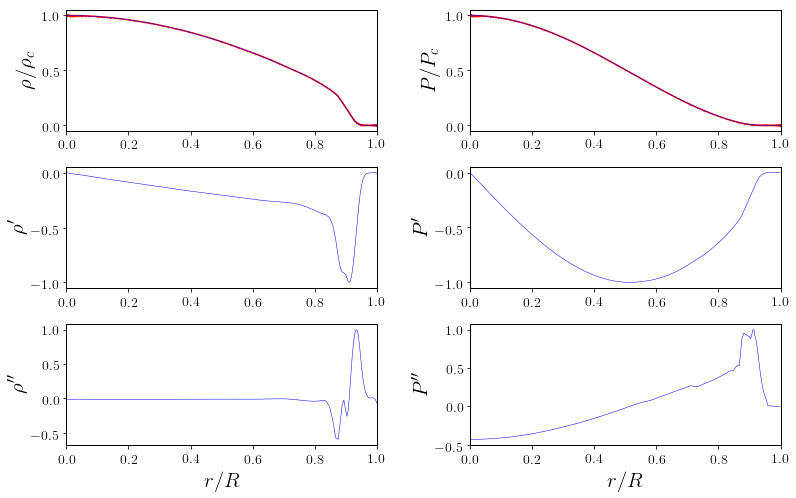

In [420]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bbb2_150[-1]/bbb2_150[-1][-1],bbb2_150[2]/bbb2_150[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bbb2_150[-1]/bbb2_150[-1][-1],bbb2_150rho(bbb2_150[-1])/bbb2_150[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bbb2_150[-1]/bbb2_150[-1][-1],bbb2_150[1]/bbb2_150[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bbb2_150[-1]/bbb2_150[-1][-1],bbb2_150p(bbb2_150[-1])/bbb2_150[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bbb2_150[-1]/bbb2_150[-1][-1],bbb2_150drho(bbb2_150[-1])/max(abs(bbb2_150drho(bbb2_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bbb2_150[-1]/bbb2_150[-1][-1],bbb2_150dp(bbb2_150[-1])/max(abs(bbb2_150dp(bbb2_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bbb2_150[-1]/bbb2_150[-1][-1],bbb2_150ddrho(bbb2_150[-1])/max(abs(bbb2_150ddrho(bbb2_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bbb2_150[-1]/bbb2_150[-1][-1],bbb2_150ddp(bbb2_150[-1])/max(abs(bbb2_150ddp(bbb2_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbbb2_150.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.5

In [421]:
bbb2_155=np.loadtxt('results2/bbb2/15.5.dat',unpack=True)
bbb2_155[3] = bbb2_155[3]-bbb2_155[3][-1] + 0.5*np.log(1-2*bbb2_155[0][-1]/bbb2_155[-1][-1])

In [422]:
s1=1e-5
s2=1e-9
bbb2_155rho=interpolate.UnivariateSpline(bbb2_155[-1], bbb2_155[2], k=5, s=s1)
bbb2_155drho=interpolate.UnivariateSpline(bbb2_155[-1], bbb2_155[2], k=5, s=s1).derivative(n=1)
bbb2_155ddrho=interpolate.UnivariateSpline(bbb2_155[-1], bbb2_155[2], k=5, s=s1).derivative(n=2)

bbb2_155p=interpolate.UnivariateSpline(bbb2_155[-1], bbb2_155[1], k=5, s=s2)
bbb2_155dp=interpolate.UnivariateSpline(bbb2_155[-1], bbb2_155[1], k=5, s=s2).derivative(n=1)
bbb2_155ddp=interpolate.UnivariateSpline(bbb2_155[-1], bbb2_155[1], k=5, s=s2).derivative(n=2)

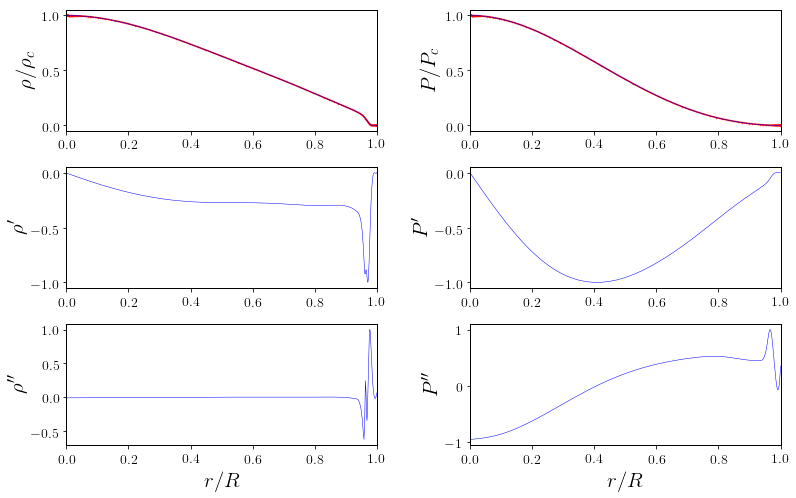

In [423]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bbb2_155[-1]/bbb2_155[-1][-1],bbb2_155[2]/bbb2_155[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bbb2_155[-1]/bbb2_155[-1][-1],bbb2_155rho(bbb2_155[-1])/bbb2_155[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bbb2_155[-1]/bbb2_155[-1][-1],bbb2_155[1]/bbb2_155[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bbb2_155[-1]/bbb2_155[-1][-1],bbb2_155p(bbb2_155[-1])/bbb2_155[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bbb2_155[-1]/bbb2_155[-1][-1],bbb2_155drho(bbb2_155[-1])/max(abs(bbb2_155drho(bbb2_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bbb2_155[-1]/bbb2_155[-1][-1],bbb2_155dp(bbb2_155[-1])/max(abs(bbb2_155dp(bbb2_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bbb2_155[-1]/bbb2_155[-1][-1],bbb2_155ddrho(bbb2_155[-1])/max(abs(bbb2_155ddrho(bbb2_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bbb2_155[-1]/bbb2_155[-1][-1],bbb2_155ddp(bbb2_155[-1])/max(abs(bbb2_155ddp(bbb2_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbbb2_155.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Redshift

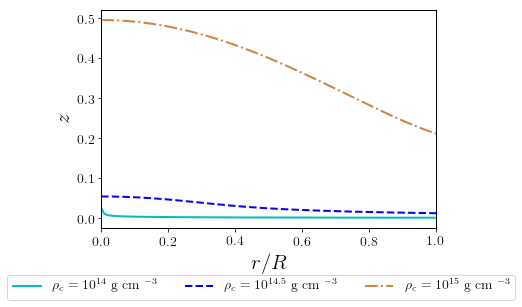

In [424]:
fig = plt.figure()

plt.plot(bbb2_140[-1]/bbb2_140[-1][-1],np.exp(-bbb2_140[3])-1.0,color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$')
plt.plot(bbb2_145[-1]/bbb2_145[-1][-1],np.exp(-bbb2_145[3])-1.0,color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$')
plt.plot(bbb2_150[-1]/bbb2_150[-1][-1],np.exp(-bbb2_150[3])-1.0,color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm $^{-3}$')

l = plt.legend(bbox_to_anchor=(1.1,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$z$')
plt.xlim(0,1.0)

plt.savefig('figures/Redshiftbbb2.pdf', format='pdf', dpi=1000,bbox_inches="tight")

# BGN1H1 ---------------------------------------------------------------------------------------

In [425]:
rhobgn1h1,Pbgn1h1,nbgn1h1=np.loadtxt('EOS/bgn1h1.dat',usecols=(2,1,0),unpack=True)

## Dominant energy condition

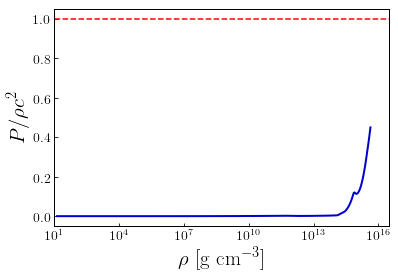

<Figure size 432x288 with 0 Axes>

In [426]:
fig, ax = plt.subplots()
plt.plot(rhobgn1h1,np.divide(Pbgn1h1,rhobgn1h1),lw='2',color='mediumblue')
plt.plot([0,10**(17)],[1.0,1.0],'r--',lw='1.5')

ax.set_xscale("log")
#locmaj = matplotlib.ticker.LogLocator(base=10.0,numticks=16) 
#ax.xaxis.set_major_locator(locmaj)


plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ P / \rho c^2 $')
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=16)
#ax.xaxis.set_minor_locator(locmin)
#ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
#plt.ylim(0,1)
plt.savefig('figures/ECbgn1h1.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

## Speed of sound

In [427]:
vsquared=interpolate.UnivariateSpline(rhobgn1h1, Pbgn1h1, k=3, s=0).derivative(n=1)

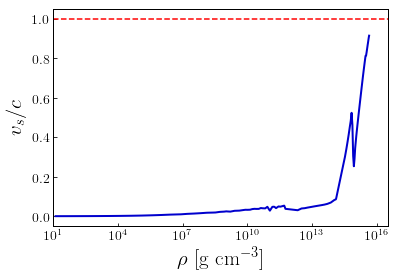

In [428]:
fig, ax = plt.subplots()
plt.plot(rhobgn1h1,np.sqrt(vsquared(rhobgn1h1)),lw='2.0',color='mediumblue')
plt.plot([1e+1,10**(16.5)],[1.0,1.0],'r--',lw='1.5')
plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ v_s / c $')
plt.xscale('log')
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#mpl.rcParams['axes.linewidth'] = 1.4
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
plt.savefig('figures/SSbgn1h1.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Adiabatic Index

In [429]:
Gamma=np.multiply(np.divide(np.add(rhobgn1h1,Pbgn1h1),Pbgn1h1),vsquared(rhobgn1h1))

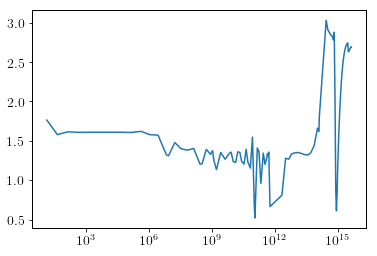

In [430]:
plt.plot(rhobgn1h1,Gamma)
plt.xscale('log')

$$ \langle\gamma\rangle=\frac{\int_{0}^{R} e^{(\lambda+3 \nu) } \gamma(r) P(r) r^{2} d r}{\int_{0}^{R} e^{(\lambda+3 \nu) } P(r) r^{2} d r} $$

Listing all the models calculated

In [431]:
owd=os.getcwd()
path=os.chdir('results2/bgn1h1')
listOfEntries= os.scandir(path)
models_bgn1h1 = []
for entry in listOfEntries:
    if '1' in entry.name:
        models_bgn1h1.append(entry.name)
os.chdir(owd)
models_bgn1h1.sort()

In [432]:
gamma_efs1 = []
gamma_efs2 = []
gamma_crs1 = []
gamma_crs2 = []
rhosc= []
for model in models_bgn1h1:
    m, P, rho, nu, lambd, r = np.loadtxt('results2/bgn1h1/' + model ,unpack=True)
    nu = nu - nu[-1] + 0.5*np.log(1-2*m[-1]/r[-1])
    #lambd = np.zeros_like(r)
    #for i in range((r.shape)[0]):
    #    if i==0:
    #        lambd[i] = 0
    #    else:
    #        lambd[i] = 0.5*np.log(1/(1-2*m[i]/r[i]))
    drho=interpolate.UnivariateSpline(r, rho, k=5, s=0).derivative(n=1)
    dP=interpolate.UnivariateSpline(r, P, k=5, s=0).derivative(n=1)
    gamma = np.divide(dP(r),drho(r))
    gamma_ef1 = integrate.trapz(np.exp(lambd+3*nu)*gamma*P*(r**2),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t1 = (1/36)*integrate.trapz(np.exp((lambd+3*nu))*(16*P+(np.exp(2*lambd)-1)*(P+rho))*(np.exp(2*lambd)-1)*(r**2))/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t2 = (4*np.pi/9)*integrate.trapz(np.exp(3*lambd+3*nu)*(8*P + (np.exp(2*lambd)+1)*(P+rho))*P*(r**4),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t3 = ((16*np.pi**2)/9)*integrate.trapz(np.exp(5*lambd+3*nu)*(P+rho)*(P**2)*(r**6),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    gamma_cr1 = 4/3 + t1 + t2 + t3
    gamma_efs1.append(gamma_ef1)
    gamma_crs1.append(gamma_cr1)
    gamma_ef2 = integrate.trapz(gamma*P*r**2,r)/integrate.trapz(P*r**2,r)
    gamma_cr2 = 4/3 + (19/42)*2*m[-1]/r[-1]
    gamma_efs2.append(gamma_ef2)
    gamma_crs2.append(gamma_cr2)
    rhosc.append(rho[0]*rhodim)

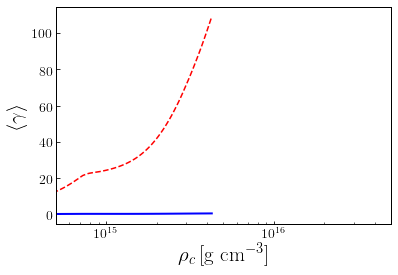

In [433]:
fig, ax = plt.subplots()
plt.plot(rhosc,gamma_crs1,lw='1.5',color='r',linestyle='--',label=r'$\gamma_{cr}$')
plt.plot(rhosc,gamma_efs1,lw='2.0',color='blue',label=r'$\langle \gamma \rangle$')

plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$\langle \gamma \rangle$')

plt.xscale('log')
plt.xlim(left=10**(14.7),right=10**(16.7))
#plt.ylim(0,10)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')
#l = plt.legend(bbox_to_anchor=(0.85,-0.15), loc="lower right", 
                #bbox_transform=fig.transFigure, ncol=2)



plt.savefig('figures/AdiabaticIndexbgn1h1.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

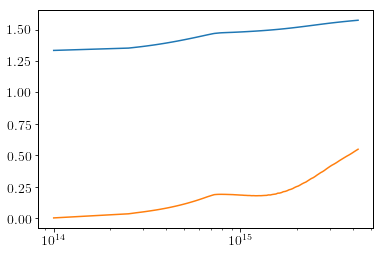

In [434]:
plt.plot(rhosc,gamma_crs2)
plt.plot(rhosc,gamma_efs2)
plt.xscale('log')

## M - $\rho_c$

In [435]:
Rbgn1h1,Mbgn1h1,rhocbgn1h1=np.loadtxt('results2/bgn1h1/MRrhoc.dat',usecols=(0,1,2),unpack=True)

In [436]:
np.amax(Mbgn1h1)

1.63031400653

In [437]:
rhocbgn1h1[np.argmax(Mbgn1h1)]

3715352290970000.0

In [438]:
np.log10(rhocbgn1h1[np.argmax(Mbgn1h1)])

15.569999999999798

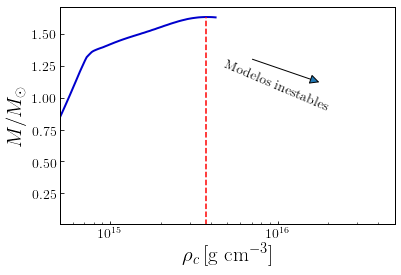

In [439]:
fig, ax = plt.subplots()

plt.plot(rhocbgn1h1,Mbgn1h1,color='mediumblue',lw='2.0')
plt.plot([10**(np.log10(rhocbgn1h1[np.argmax(Mbgn1h1)])),10**(np.log10(rhocbgn1h1[np.argmax(Mbgn1h1)]))],[0.0,np.amax(Mbgn1h1)],'r--',lw='1.5')

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)
plt.annotate("", xy=(10**(16.25),1.12), xytext=(10**(15.85),1.3), arrowprops=prop)
#plt.arrow(10**(15.6), 1.38,10**(15.7) ,-0.1 , head_width=0.05, head_length=10**(15))
plt.text(10**(15.67), 1.23, 'Modelos inestables' , fontsize=14,rotation=-23)

plt.xscale('log')
plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.xlim(left=10**(14.7),right=10**(16.7))
plt.ylim(bottom=0.01)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')

plt.savefig('figures/Mrhorel_bgn1h1.pdf', format='pdf', dpi=1000,bbox_inches="tight")

## Tunning the interpolation of the solution

### 14.0

In [440]:
bgn1h1_140=np.loadtxt('results2/bgn1h1/14.0.dat',unpack=True)
bgn1h1_140[3] = bgn1h1_140[3]-bgn1h1_140[3][-1] + 0.5*np.log(1-2*bgn1h1_140[0][-1]/bgn1h1_140[-1][-1])

In [441]:
s1=5e-7
s2=1e-15
bgn1h1_140rho=interpolate.UnivariateSpline(bgn1h1_140[-1], bgn1h1_140[2], k=5, s=s1)
bgn1h1_140drho=interpolate.UnivariateSpline(bgn1h1_140[-1], bgn1h1_140[2], k=5, s=s1).derivative(n=1)
bgn1h1_140ddrho=interpolate.UnivariateSpline(bgn1h1_140[-1], bgn1h1_140[2], k=5, s=s1).derivative(n=2)

bgn1h1_140p=interpolate.UnivariateSpline(bgn1h1_140[-1], bgn1h1_140[1], k=5, s=s2)
bgn1h1_140dp=interpolate.UnivariateSpline(bgn1h1_140[-1], bgn1h1_140[1], k=5, s=s2).derivative(n=1)
bgn1h1_140ddp=interpolate.UnivariateSpline(bgn1h1_140[-1], bgn1h1_140[1], k=5, s=s2).derivative(n=2)

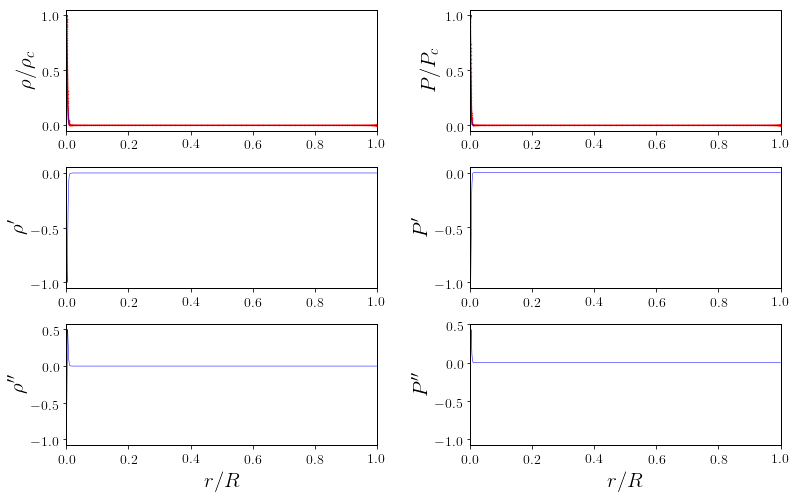

In [442]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bgn1h1_140[-1]/bgn1h1_140[-1][-1],bgn1h1_140[2]/bgn1h1_140[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bgn1h1_140[-1]/bgn1h1_140[-1][-1],bgn1h1_140rho(bgn1h1_140[-1])/bgn1h1_140[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bgn1h1_140[-1]/bgn1h1_140[-1][-1],bgn1h1_140[1]/bgn1h1_140[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bgn1h1_140[-1]/bgn1h1_140[-1][-1],bgn1h1_140p(bgn1h1_140[-1])/bgn1h1_140[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bgn1h1_140[-1]/bgn1h1_140[-1][-1],bgn1h1_140drho(bgn1h1_140[-1])/max(abs(bgn1h1_140drho(bgn1h1_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bgn1h1_140[-1]/bgn1h1_140[-1][-1],bgn1h1_140dp(bgn1h1_140[-1])/max(abs(bgn1h1_140dp(bgn1h1_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bgn1h1_140[-1]/bgn1h1_140[-1][-1],bgn1h1_140ddrho(bgn1h1_140[-1])/max(abs(bgn1h1_140ddrho(bgn1h1_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bgn1h1_140[-1]/bgn1h1_140[-1][-1],bgn1h1_140ddp(bgn1h1_140[-1])/max(abs(bgn1h1_140ddp(bgn1h1_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbgn1h1_140.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 14.5

In [443]:
bgn1h1_145=np.loadtxt('results2/bgn1h1/14.5.dat',unpack=True)
bgn1h1_145[3] = bgn1h1_145[3]-bgn1h1_145[3][-1] + 0.5*np.log(1-2*bgn1h1_145[0][-1]/bgn1h1_145[-1][-1])

In [444]:
s1=1e-7
s2=1e-12
bgn1h1_145rho=interpolate.UnivariateSpline(bgn1h1_145[-1], bgn1h1_145[2], k=5, s=s1)
bgn1h1_145drho=interpolate.UnivariateSpline(bgn1h1_145[-1], bgn1h1_145[2], k=5, s=s1).derivative(n=1)
bgn1h1_145ddrho=interpolate.UnivariateSpline(bgn1h1_145[-1], bgn1h1_145[2], k=5, s=s1).derivative(n=2)

bgn1h1_145p=interpolate.UnivariateSpline(bgn1h1_145[-1], bgn1h1_145[1], k=5, s=s2)
bgn1h1_145dp=interpolate.UnivariateSpline(bgn1h1_145[-1], bgn1h1_145[1], k=5, s=s2).derivative(n=1)
bgn1h1_145ddp=interpolate.UnivariateSpline(bgn1h1_145[-1], bgn1h1_145[1], k=5, s=s2).derivative(n=2)

In [445]:
bgn1h1_145rho(0.4*bgn1h1_145[-1][-1])*rhodim

251993702891456.66

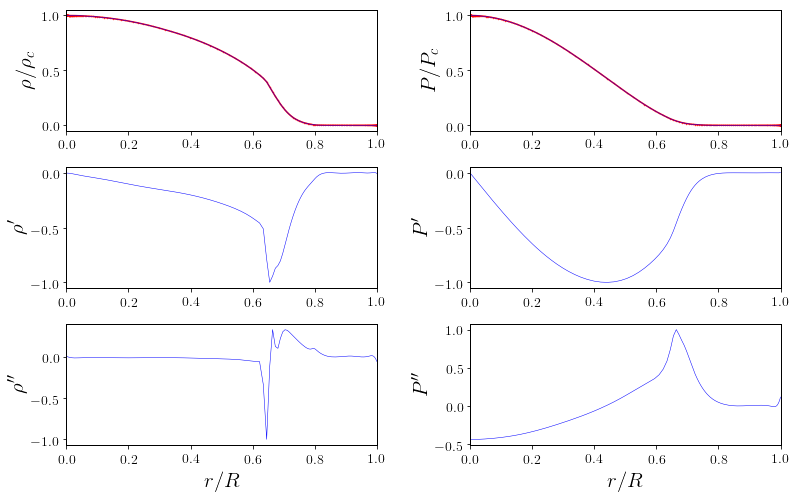

In [446]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bgn1h1_145[-1]/bgn1h1_145[-1][-1],bgn1h1_145[2]/bgn1h1_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bgn1h1_145[-1]/bgn1h1_145[-1][-1],bgn1h1_145rho(bgn1h1_145[-1])/bgn1h1_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bgn1h1_145[-1]/bgn1h1_145[-1][-1],bgn1h1_145[1]/bgn1h1_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bgn1h1_145[-1]/bgn1h1_145[-1][-1],bgn1h1_145p(bgn1h1_145[-1])/bgn1h1_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bgn1h1_145[-1]/bgn1h1_145[-1][-1],bgn1h1_145drho(bgn1h1_145[-1])/max(abs(bgn1h1_145drho(bgn1h1_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bgn1h1_145[-1]/bgn1h1_145[-1][-1],bgn1h1_145dp(bgn1h1_145[-1])/max(abs(bgn1h1_145dp(bgn1h1_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bgn1h1_145[-1]/bgn1h1_145[-1][-1],bgn1h1_145ddrho(bgn1h1_145[-1])/max(abs(bgn1h1_145ddrho(bgn1h1_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bgn1h1_145[-1]/bgn1h1_145[-1][-1],bgn1h1_145ddp(bgn1h1_145[-1])/max(abs(bgn1h1_145ddp(bgn1h1_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbgn1h1_145.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.0

In [447]:
bgn1h1_150=np.loadtxt('results2/bgn1h1/15.0.dat',unpack=True)
bgn1h1_150[3] = bgn1h1_150[3]-bgn1h1_150[3][-1] + 0.5*np.log(1-2*bgn1h1_150[0][-1]/bgn1h1_150[-1][-1])

In [448]:
s1=8e-6
s2=1e-15
bgn1h1_150rho=interpolate.UnivariateSpline(bgn1h1_150[-1], bgn1h1_150[2], k=5, s=s1)
bgn1h1_150drho=interpolate.UnivariateSpline(bgn1h1_150[-1], bgn1h1_150[2], k=5, s=s1).derivative(n=1)
bgn1h1_150ddrho=interpolate.UnivariateSpline(bgn1h1_150[-1], bgn1h1_150[2], k=5, s=s1).derivative(n=2)

bgn1h1_150p=interpolate.UnivariateSpline(bgn1h1_150[-1], bgn1h1_150[1], k=5, s=s2)
bgn1h1_150dp=interpolate.UnivariateSpline(bgn1h1_150[-1], bgn1h1_150[1], k=5, s=s2).derivative(n=1)
bgn1h1_150ddp=interpolate.UnivariateSpline(bgn1h1_150[-1], bgn1h1_150[1], k=5, s=s2).derivative(n=2)

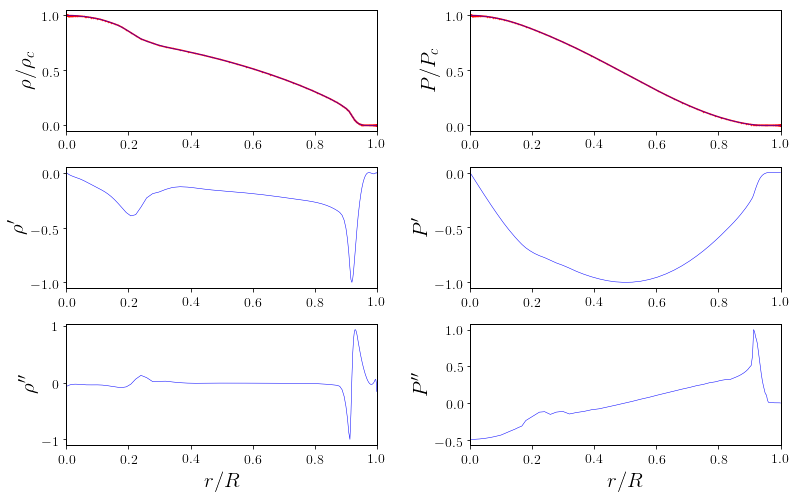

In [449]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bgn1h1_150[-1]/bgn1h1_150[-1][-1],bgn1h1_150[2]/bgn1h1_150[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bgn1h1_150[-1]/bgn1h1_150[-1][-1],bgn1h1_150rho(bgn1h1_150[-1])/bgn1h1_150[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bgn1h1_150[-1]/bgn1h1_150[-1][-1],bgn1h1_150[1]/bgn1h1_150[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bgn1h1_150[-1]/bgn1h1_150[-1][-1],bgn1h1_150p(bgn1h1_150[-1])/bgn1h1_150[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bgn1h1_150[-1]/bgn1h1_150[-1][-1],bgn1h1_150drho(bgn1h1_150[-1])/max(abs(bgn1h1_150drho(bgn1h1_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bgn1h1_150[-1]/bgn1h1_150[-1][-1],bgn1h1_150dp(bgn1h1_150[-1])/max(abs(bgn1h1_150dp(bgn1h1_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bgn1h1_150[-1]/bgn1h1_150[-1][-1],bgn1h1_150ddrho(bgn1h1_150[-1])/max(abs(bgn1h1_150ddrho(bgn1h1_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bgn1h1_150[-1]/bgn1h1_150[-1][-1],bgn1h1_150ddp(bgn1h1_150[-1])/max(abs(bgn1h1_150ddp(bgn1h1_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbgn1h1_150.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.5

In [450]:
bgn1h1_155=np.loadtxt('results2/bgn1h1/15.5.dat',unpack=True)
bgn1h1_155[3] = bgn1h1_155[3]-bgn1h1_155[3][-1] + 0.5*np.log(1-2*bgn1h1_155[0][-1]/bgn1h1_155[-1][-1])

In [451]:
s1=1e-5
s2=1e-9
bgn1h1_155rho=interpolate.UnivariateSpline(bgn1h1_155[-1], bgn1h1_155[2], k=5, s=s1)
bgn1h1_155drho=interpolate.UnivariateSpline(bgn1h1_155[-1], bgn1h1_155[2], k=5, s=s1).derivative(n=1)
bgn1h1_155ddrho=interpolate.UnivariateSpline(bgn1h1_155[-1], bgn1h1_155[2], k=5, s=s1).derivative(n=2)

bgn1h1_155p=interpolate.UnivariateSpline(bgn1h1_155[-1], bgn1h1_155[1], k=5, s=s2)
bgn1h1_155dp=interpolate.UnivariateSpline(bgn1h1_155[-1], bgn1h1_155[1], k=5, s=s2).derivative(n=1)
bgn1h1_155ddp=interpolate.UnivariateSpline(bgn1h1_155[-1], bgn1h1_155[1], k=5, s=s2).derivative(n=2)

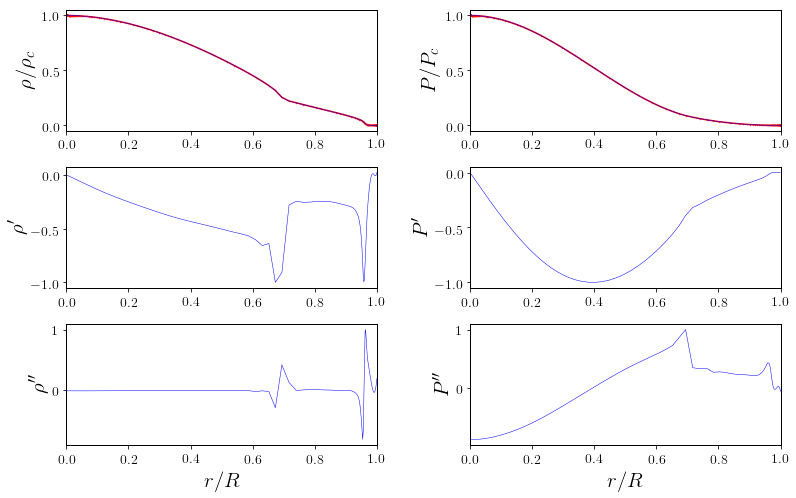

In [452]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bgn1h1_155[-1]/bgn1h1_155[-1][-1],bgn1h1_155[2]/bgn1h1_155[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bgn1h1_155[-1]/bgn1h1_155[-1][-1],bgn1h1_155rho(bgn1h1_155[-1])/bgn1h1_155[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bgn1h1_155[-1]/bgn1h1_155[-1][-1],bgn1h1_155[1]/bgn1h1_155[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bgn1h1_155[-1]/bgn1h1_155[-1][-1],bgn1h1_155p(bgn1h1_155[-1])/bgn1h1_155[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bgn1h1_155[-1]/bgn1h1_155[-1][-1],bgn1h1_155drho(bgn1h1_155[-1])/max(abs(bgn1h1_155drho(bgn1h1_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bgn1h1_155[-1]/bgn1h1_155[-1][-1],bgn1h1_155dp(bgn1h1_155[-1])/max(abs(bgn1h1_155dp(bgn1h1_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bgn1h1_155[-1]/bgn1h1_155[-1][-1],bgn1h1_155ddrho(bgn1h1_155[-1])/max(abs(bgn1h1_155ddrho(bgn1h1_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bgn1h1_155[-1]/bgn1h1_155[-1][-1],bgn1h1_155ddp(bgn1h1_155[-1])/max(abs(bgn1h1_155ddp(bgn1h1_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbgn1h1_155.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Redshift

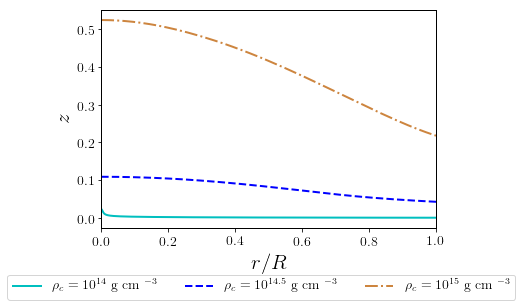

In [453]:
fig = plt.figure()

plt.plot(bgn1h1_140[-1]/bgn1h1_140[-1][-1],np.exp(-bgn1h1_140[3])-1.0,color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$')
plt.plot(bgn1h1_145[-1]/bgn1h1_145[-1][-1],np.exp(-bgn1h1_145[3])-1.0,color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$')
plt.plot(bgn1h1_150[-1]/bgn1h1_150[-1][-1],np.exp(-bgn1h1_150[3])-1.0,color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm $^{-3}$')

l = plt.legend(bbox_to_anchor=(1.1,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$z$')
plt.xlim(0,1.0)

plt.savefig('figures/Redshiftbgn1h1.pdf', format='pdf', dpi=1000,bbox_inches="tight")

# BPAL12 ----------------------------------------------------------------------------------------

In [454]:
rhobpal12,Pbpal12,nbpal12=np.loadtxt('EOS/bpal12.dat',usecols=(2,1,0),unpack=True)

## Dominant energy condition

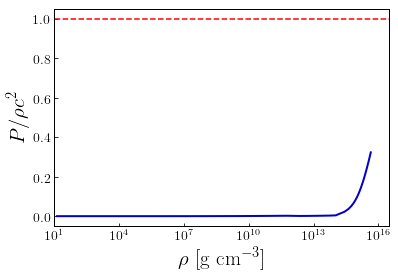

<Figure size 432x288 with 0 Axes>

In [455]:
fig, ax = plt.subplots()
plt.plot(rhobpal12,np.divide(Pbpal12,rhobpal12),lw='2',color='mediumblue')
plt.plot([0,10**(17)],[1.0,1.0],'r--',lw='1.5')

ax.set_xscale("log")
#locmaj = matplotlib.ticker.LogLocator(base=10.0,numticks=16) 
#ax.xaxis.set_major_locator(locmaj)


plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ P / \rho c^2 $')
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=16)
#ax.xaxis.set_minor_locator(locmin)
#ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
#plt.ylim(0,1)
plt.savefig('figures/ECbpal12.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

## Speed of sound

In [456]:
vsquared=interpolate.UnivariateSpline(rhobpal12, Pbpal12, k=3, s=0).derivative(n=1)

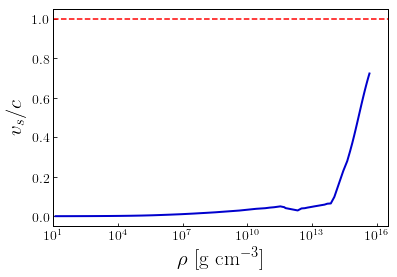

In [457]:
fig, ax = plt.subplots()
plt.plot(rhobpal12,np.sqrt(vsquared(rhobpal12)),lw='2.0',color='mediumblue')
plt.plot([1e+1,10**(16.5)],[1.0,1.0],'r--',lw='1.5')
plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ v_s / c $')
plt.xscale('log')
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#mpl.rcParams['axes.linewidth'] = 1.4
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
plt.savefig('figures/SSbpal12.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Adiabatic Index

In [458]:
Gamma=np.multiply(np.divide(np.add(rhobpal12,Pbpal12),Pbpal12),vsquared(rhobpal12))

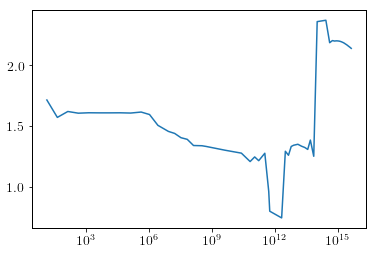

In [459]:
plt.plot(rhobpal12,Gamma)
plt.xscale('log')

$$ \langle\gamma\rangle=\frac{\int_{0}^{R} e^{(\lambda+3 \nu) } \gamma(r) P(r) r^{2} d r}{\int_{0}^{R} e^{(\lambda+3 \nu) } P(r) r^{2} d r} $$

Listing all the models calculated

In [460]:
owd=os.getcwd()
path=os.chdir('results2/bpal12')
listOfEntries= os.scandir(path)
models_bpal12 = []
for entry in listOfEntries:
    if '1' in entry.name:
        models_bpal12.append(entry.name)
os.chdir(owd)
models_bpal12.sort()

In [461]:
gamma_efs1 = []
gamma_efs2 = []
gamma_crs1 = []
gamma_crs2 = []
rhosc= []
for model in models_bpal12:
    m, P, rho, nu, lambd, r = np.loadtxt('results2/bpal12/' + model ,unpack=True)
    nu = nu - nu[-1] + 0.5*np.log(1-2*m[-1]/r[-1])
    #lambd = np.zeros_like(r)
    #for i in range((r.shape)[0]):
    #    if i==0:
    #        lambd[i] = 0
    #    else:
    #        lambd[i] = 0.5*np.log(1/(1-2*m[i]/r[i]))
    drho=interpolate.UnivariateSpline(r, rho, k=5, s=0).derivative(n=1)
    dP=interpolate.UnivariateSpline(r, P, k=5, s=0).derivative(n=1)
    gamma = np.divide(dP(r),drho(r))
    gamma_ef1 = integrate.trapz(np.exp(lambd+3*nu)*gamma*P*(r**2),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t1 = (1/36)*integrate.trapz(np.exp((lambd+3*nu))*(16*P+(np.exp(2*lambd)-1)*(P+rho))*(np.exp(2*lambd)-1)*(r**2))/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t2 = (4*np.pi/9)*integrate.trapz(np.exp(3*lambd+3*nu)*(8*P + (np.exp(2*lambd)+1)*(P+rho))*P*(r**4),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t3 = ((16*np.pi**2)/9)*integrate.trapz(np.exp(5*lambd+3*nu)*(P+rho)*(P**2)*(r**6),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    gamma_cr1 = 4/3 + t1 + t2 + t3
    gamma_efs1.append(gamma_ef1)
    gamma_crs1.append(gamma_cr1)
    gamma_ef2 = integrate.trapz(gamma*P*r**2,r)/integrate.trapz(P*r**2,r)
    gamma_cr2 = 4/3 + (19/42)*2*m[-1]/r[-1]
    gamma_efs2.append(gamma_ef2)
    gamma_crs2.append(gamma_cr2)
    rhosc.append(rho[0]*rhodim)

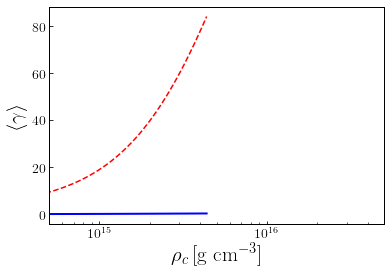

In [462]:
fig, ax = plt.subplots()
plt.plot(rhosc,gamma_crs1,lw='1.5',color='r',linestyle='--',label=r'$\gamma_{cr}$')
plt.plot(rhosc,gamma_efs1,lw='2.0',color='blue',label=r'$\langle \gamma \rangle$')

plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$\langle \gamma \rangle$')

plt.xscale('log')
plt.xlim(left=10**(14.7),right=10**(16.7))
#plt.ylim(0,10)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')
#l = plt.legend(bbox_to_anchor=(0.85,-0.15), loc="lower right", 
                #bbox_transform=fig.transFigure, ncol=2)



plt.savefig('figures/AdiabaticIndexbpal12.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

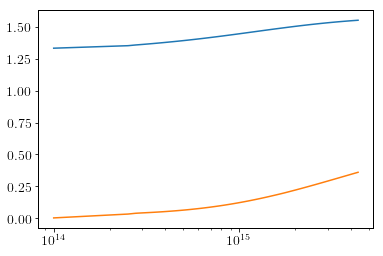

In [463]:
plt.plot(rhosc,gamma_crs2)
plt.plot(rhosc,gamma_efs2)
plt.xscale('log')

## M - $\rho_c$

In [464]:
Rbpal12,Mbpal12,rhocbpal12=np.loadtxt('results2/bpal12/MRrhoc.dat',usecols=(0,1,2),unpack=True)

In [465]:
np.amax(Mbpal12)

1.45501600032

In [466]:
rhocbpal12[np.argmax(Mbpal12)]

3981071705530000.0

In [467]:
np.log10(rhocbpal12[np.argmax(Mbpal12)])

15.599999999999458

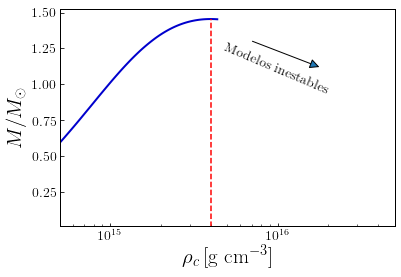

In [468]:
fig, ax = plt.subplots()

plt.plot(rhocbpal12,Mbpal12,color='mediumblue',lw='2.0')
plt.plot([10**(np.log10(rhocbpal12[np.argmax(Mbpal12)])),10**(np.log10(rhocbpal12[np.argmax(Mbpal12)]))],[0.0,np.amax(Mbpal12)],'r--',lw='1.5')

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)
plt.annotate("", xy=(10**(16.25),1.12), xytext=(10**(15.85),1.3), arrowprops=prop)
#plt.arrow(10**(15.6), 1.38,10**(15.7) ,-0.1 , head_width=0.05, head_length=10**(15))
plt.text(10**(15.67), 1.23, 'Modelos inestables' , fontsize=14,rotation=-23)

plt.xscale('log')
plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.xlim(left=10**(14.7),right=10**(16.7))
plt.ylim(bottom=0.01)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')

plt.savefig('figures/Mrhorel_bpal12.pdf', format='pdf', dpi=1000,bbox_inches="tight")

## Tunning the interpolation of the solution

### 14.0

In [469]:
bpal12_140=np.loadtxt('results2/bpal12/14.0.dat',unpack=True)
bpal12_140[3] = bpal12_140[3]-bpal12_140[3][-1] + 0.5*np.log(1-2*bpal12_140[0][-1]/bpal12_140[-1][-1])

In [470]:
s1=5e-7
s2=1e-15
bpal12_140rho=interpolate.UnivariateSpline(bpal12_140[-1], bpal12_140[2], k=5, s=s1)
bpal12_140drho=interpolate.UnivariateSpline(bpal12_140[-1], bpal12_140[2], k=5, s=s1).derivative(n=1)
bpal12_140ddrho=interpolate.UnivariateSpline(bpal12_140[-1], bpal12_140[2], k=5, s=s1).derivative(n=2)

bpal12_140p=interpolate.UnivariateSpline(bpal12_140[-1], bpal12_140[1], k=5, s=s2)
bpal12_140dp=interpolate.UnivariateSpline(bpal12_140[-1], bpal12_140[1], k=5, s=s2).derivative(n=1)
bpal12_140ddp=interpolate.UnivariateSpline(bpal12_140[-1], bpal12_140[1], k=5, s=s2).derivative(n=2)

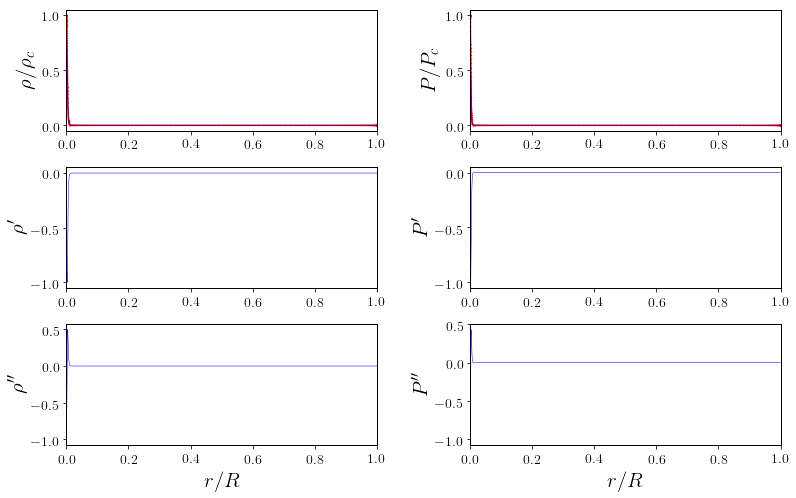

In [471]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bpal12_140[-1]/bpal12_140[-1][-1],bpal12_140[2]/bpal12_140[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bpal12_140[-1]/bpal12_140[-1][-1],bpal12_140rho(bpal12_140[-1])/bpal12_140[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bpal12_140[-1]/bpal12_140[-1][-1],bpal12_140[1]/bpal12_140[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bpal12_140[-1]/bpal12_140[-1][-1],bpal12_140p(bpal12_140[-1])/bpal12_140[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bpal12_140[-1]/bpal12_140[-1][-1],bpal12_140drho(bpal12_140[-1])/max(abs(bpal12_140drho(bpal12_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bpal12_140[-1]/bpal12_140[-1][-1],bpal12_140dp(bpal12_140[-1])/max(abs(bpal12_140dp(bpal12_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bpal12_140[-1]/bpal12_140[-1][-1],bpal12_140ddrho(bpal12_140[-1])/max(abs(bpal12_140ddrho(bpal12_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bpal12_140[-1]/bpal12_140[-1][-1],bpal12_140ddp(bpal12_140[-1])/max(abs(bpal12_140ddp(bpal12_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbpal12_140.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 14.5

In [472]:
bpal12_145=np.loadtxt('results2/bpal12/14.5.dat',unpack=True)
bpal12_145[3] = bpal12_145[3]-bpal12_145[3][-1] + 0.5*np.log(1-2*bpal12_145[0][-1]/bpal12_145[-1][-1])

In [473]:
s1=1e-7
s2=1e-12
bpal12_145rho=interpolate.UnivariateSpline(bpal12_145[-1], bpal12_145[2], k=5, s=s1)
bpal12_145drho=interpolate.UnivariateSpline(bpal12_145[-1], bpal12_145[2], k=5, s=s1).derivative(n=1)
bpal12_145ddrho=interpolate.UnivariateSpline(bpal12_145[-1], bpal12_145[2], k=5, s=s1).derivative(n=2)

bpal12_145p=interpolate.UnivariateSpline(bpal12_145[-1], bpal12_145[1], k=5, s=s2)
bpal12_145dp=interpolate.UnivariateSpline(bpal12_145[-1], bpal12_145[1], k=5, s=s2).derivative(n=1)
bpal12_145ddp=interpolate.UnivariateSpline(bpal12_145[-1], bpal12_145[1], k=5, s=s2).derivative(n=2)

In [474]:
bpal12_145rho(0.4*bpal12_145[-1][-1])*rhodim

232155176237296.38

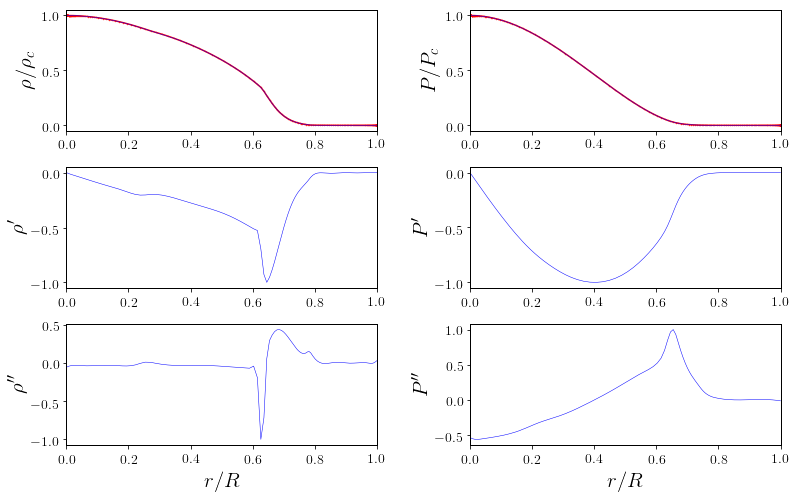

In [475]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bpal12_145[-1]/bpal12_145[-1][-1],bpal12_145[2]/bpal12_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bpal12_145[-1]/bpal12_145[-1][-1],bpal12_145rho(bpal12_145[-1])/bpal12_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bpal12_145[-1]/bpal12_145[-1][-1],bpal12_145[1]/bpal12_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bpal12_145[-1]/bpal12_145[-1][-1],bpal12_145p(bpal12_145[-1])/bpal12_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bpal12_145[-1]/bpal12_145[-1][-1],bpal12_145drho(bpal12_145[-1])/max(abs(bpal12_145drho(bpal12_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bpal12_145[-1]/bpal12_145[-1][-1],bpal12_145dp(bpal12_145[-1])/max(abs(bpal12_145dp(bpal12_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bpal12_145[-1]/bpal12_145[-1][-1],bpal12_145ddrho(bpal12_145[-1])/max(abs(bpal12_145ddrho(bpal12_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bpal12_145[-1]/bpal12_145[-1][-1],bpal12_145ddp(bpal12_145[-1])/max(abs(bpal12_145ddp(bpal12_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbpal12_145.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.0

In [476]:
bpal12_150=np.loadtxt('results2/bpal12/15.0.dat',unpack=True)
bpal12_150[3] = bpal12_150[3]-bpal12_150[3][-1] + 0.5*np.log(1-2*bpal12_150[0][-1]/bpal12_150[-1][-1])

In [477]:
s1=8e-6
s2=1e-15
bpal12_150rho=interpolate.UnivariateSpline(bpal12_150[-1], bpal12_150[2], k=5, s=s1)
bpal12_150drho=interpolate.UnivariateSpline(bpal12_150[-1], bpal12_150[2], k=5, s=s1).derivative(n=1)
bpal12_150ddrho=interpolate.UnivariateSpline(bpal12_150[-1], bpal12_150[2], k=5, s=s1).derivative(n=2)

bpal12_150p=interpolate.UnivariateSpline(bpal12_150[-1], bpal12_150[1], k=5, s=s2)
bpal12_150dp=interpolate.UnivariateSpline(bpal12_150[-1], bpal12_150[1], k=5, s=s2).derivative(n=1)
bpal12_150ddp=interpolate.UnivariateSpline(bpal12_150[-1], bpal12_150[1], k=5, s=s2).derivative(n=2)

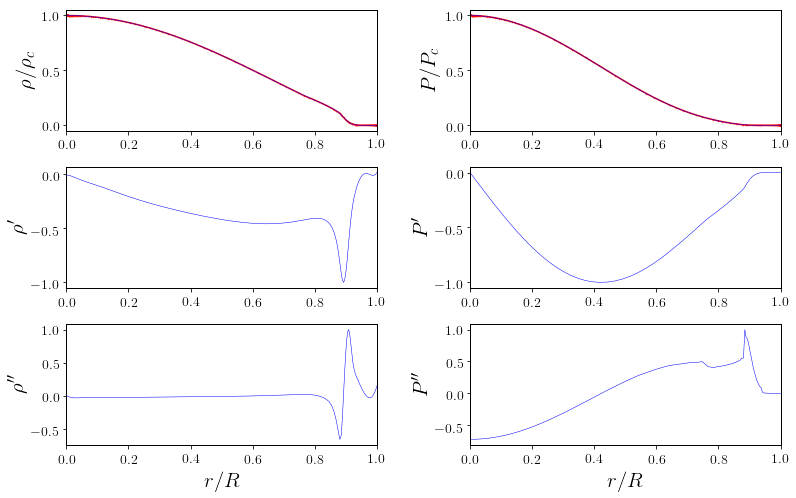

In [478]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bpal12_150[-1]/bpal12_150[-1][-1],bpal12_150[2]/bpal12_150[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bpal12_150[-1]/bpal12_150[-1][-1],bpal12_150rho(bpal12_150[-1])/bpal12_150[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bpal12_150[-1]/bpal12_150[-1][-1],bpal12_150[1]/bpal12_150[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bpal12_150[-1]/bpal12_150[-1][-1],bpal12_150p(bpal12_150[-1])/bpal12_150[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bpal12_150[-1]/bpal12_150[-1][-1],bpal12_150drho(bpal12_150[-1])/max(abs(bpal12_150drho(bpal12_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bpal12_150[-1]/bpal12_150[-1][-1],bpal12_150dp(bpal12_150[-1])/max(abs(bpal12_150dp(bpal12_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bpal12_150[-1]/bpal12_150[-1][-1],bpal12_150ddrho(bpal12_150[-1])/max(abs(bpal12_150ddrho(bpal12_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bpal12_150[-1]/bpal12_150[-1][-1],bpal12_150ddp(bpal12_150[-1])/max(abs(bpal12_150ddp(bpal12_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbpal12_150.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.5

In [479]:
bpal12_155=np.loadtxt('results2/bpal12/15.5.dat',unpack=True)
bpal12_155[3] = bpal12_155[3]-bpal12_155[3][-1] + 0.5*np.log(1-2*bpal12_155[0][-1]/bpal12_155[-1][-1])

In [480]:
s1=1e-5
s2=1e-9
bpal12_155rho=interpolate.UnivariateSpline(bpal12_155[-1], bpal12_155[2], k=5, s=s1)
bpal12_155drho=interpolate.UnivariateSpline(bpal12_155[-1], bpal12_155[2], k=5, s=s1).derivative(n=1)
bpal12_155ddrho=interpolate.UnivariateSpline(bpal12_155[-1], bpal12_155[2], k=5, s=s1).derivative(n=2)

bpal12_155p=interpolate.UnivariateSpline(bpal12_155[-1], bpal12_155[1], k=5, s=s2)
bpal12_155dp=interpolate.UnivariateSpline(bpal12_155[-1], bpal12_155[1], k=5, s=s2).derivative(n=1)
bpal12_155ddp=interpolate.UnivariateSpline(bpal12_155[-1], bpal12_155[1], k=5, s=s2).derivative(n=2)

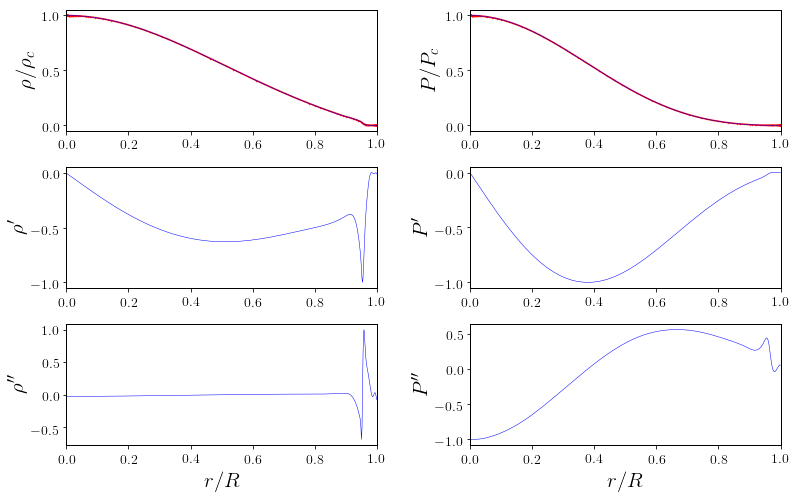

In [481]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bpal12_155[-1]/bpal12_155[-1][-1],bpal12_155[2]/bpal12_155[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bpal12_155[-1]/bpal12_155[-1][-1],bpal12_155rho(bpal12_155[-1])/bpal12_155[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bpal12_155[-1]/bpal12_155[-1][-1],bpal12_155[1]/bpal12_155[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bpal12_155[-1]/bpal12_155[-1][-1],bpal12_155p(bpal12_155[-1])/bpal12_155[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bpal12_155[-1]/bpal12_155[-1][-1],bpal12_155drho(bpal12_155[-1])/max(abs(bpal12_155drho(bpal12_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bpal12_155[-1]/bpal12_155[-1][-1],bpal12_155dp(bpal12_155[-1])/max(abs(bpal12_155dp(bpal12_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bpal12_155[-1]/bpal12_155[-1][-1],bpal12_155ddrho(bpal12_155[-1])/max(abs(bpal12_155ddrho(bpal12_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bpal12_155[-1]/bpal12_155[-1][-1],bpal12_155ddp(bpal12_155[-1])/max(abs(bpal12_155ddp(bpal12_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbpal12_155.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Redshift

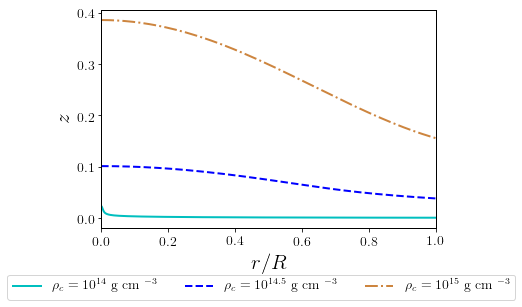

In [482]:
fig = plt.figure()

plt.plot(bpal12_140[-1]/bpal12_140[-1][-1],np.exp(-bpal12_140[3])-1.0,color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$')
plt.plot(bpal12_145[-1]/bpal12_145[-1][-1],np.exp(-bpal12_145[3])-1.0,color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$')
plt.plot(bpal12_150[-1]/bpal12_150[-1][-1],np.exp(-bpal12_150[3])-1.0,color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm $^{-3}$')

l = plt.legend(bbox_to_anchor=(1.1,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$z$')
plt.xlim(0,1.0)

plt.savefig('figures/Redshiftbpal12.pdf', format='pdf', dpi=1000,bbox_inches="tight")

# BSK19 ---------------------------------------------------------------------------------------

In [483]:
rhobsk19,Pbsk19,nbsk19=np.loadtxt('EOS/bsk19.dat',usecols=(2,1,0),unpack=True)

## Dominant energy condition

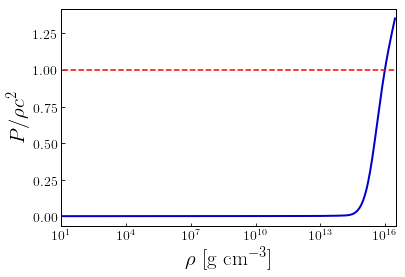

<Figure size 432x288 with 0 Axes>

In [484]:
fig, ax = plt.subplots()
plt.plot(rhobsk19,np.divide(Pbsk19,rhobsk19),lw='2',color='mediumblue')
plt.plot([0,10**(17)],[1.0,1.0],'r--',lw='1.5')

ax.set_xscale("log")
#locmaj = matplotlib.ticker.LogLocator(base=10.0,numticks=16) 
#ax.xaxis.set_major_locator(locmaj)


plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ P / \rho c^2 $')
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=16)
#ax.xaxis.set_minor_locator(locmin)
#ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
#plt.ylim(0,1)
plt.savefig('figures/ECbsk19.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

## Speed of sound

In [485]:
vsquared=interpolate.UnivariateSpline(rhobsk19, Pbsk19, k=3, s=0).derivative(n=1)

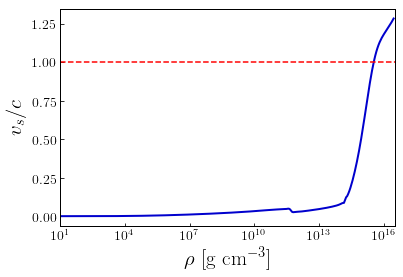

In [486]:
fig, ax = plt.subplots()
plt.plot(rhobsk19,np.sqrt(vsquared(rhobsk19)),lw='2.0',color='mediumblue')
plt.plot([1e+1,10**(16.5)],[1.0,1.0],'r--',lw='1.5')
plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ v_s / c $')
plt.xscale('log')
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#mpl.rcParams['axes.linewidth'] = 1.4
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
plt.savefig('figures/SSbsk19.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Adiabatic Index

In [487]:
Gamma=np.multiply(np.divide(np.add(rhobsk19,Pbsk19),Pbsk19),vsquared(rhobsk19))

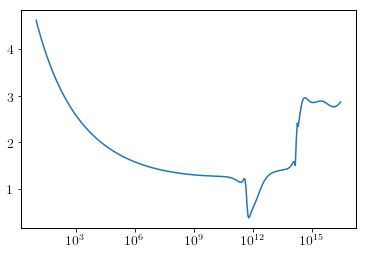

In [488]:
plt.plot(rhobsk19,Gamma)
plt.xscale('log')

$$ \langle\gamma\rangle=\frac{\int_{0}^{R} e^{(\lambda+3 \nu) } \gamma(r) P(r) r^{2} d r}{\int_{0}^{R} e^{(\lambda+3 \nu) } P(r) r^{2} d r} $$

Listing all the models calculated

In [489]:
owd=os.getcwd()
path=os.chdir('results2/bsk19')
listOfEntries= os.scandir(path)
models_bsk19 = []
for entry in listOfEntries:
    if '1' in entry.name:
        models_bsk19.append(entry.name)
os.chdir(owd)
models_bsk19.sort()

In [490]:
gamma_efs1 = []
gamma_efs2 = []
gamma_crs1 = []
gamma_crs2 = []
rhosc= []
for model in models_bsk19:
    m, P, rho, nu, lambd, r = np.loadtxt('results2/bsk19/' + model ,unpack=True)
    nu = nu - nu[-1] + 0.5*np.log(1-2*m[-1]/r[-1])
    #lambd = np.zeros_like(r)
    #for i in range((r.shape)[0]):
    #    if i==0:
    #        lambd[i] = 0
    #    else:
    #        lambd[i] = 0.5*np.log(1/(1-2*m[i]/r[i]))
    drho=interpolate.UnivariateSpline(r, rho, k=5, s=0).derivative(n=1)
    dP=interpolate.UnivariateSpline(r, P, k=5, s=0).derivative(n=1)
    gamma = np.divide(dP(r),drho(r))
    gamma_ef1 = integrate.trapz(np.exp(lambd+3*nu)*gamma*P*(r**2),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t1 = (1/36)*integrate.trapz(np.exp((lambd+3*nu))*(16*P+(np.exp(2*lambd)-1)*(P+rho))*(np.exp(2*lambd)-1)*(r**2))/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t2 = (4*np.pi/9)*integrate.trapz(np.exp(3*lambd+3*nu)*(8*P + (np.exp(2*lambd)+1)*(P+rho))*P*(r**4),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t3 = ((16*np.pi**2)/9)*integrate.trapz(np.exp(5*lambd+3*nu)*(P+rho)*(P**2)*(r**6),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    gamma_cr1 = 4/3 + t1 + t2 + t3
    gamma_efs1.append(gamma_ef1)
    gamma_crs1.append(gamma_cr1)
    gamma_ef2 = integrate.trapz(gamma*P*r**2,r)/integrate.trapz(P*r**2,r)
    gamma_cr2 = 4/3 + (19/42)*2*m[-1]/r[-1]
    gamma_efs2.append(gamma_ef2)
    gamma_crs2.append(gamma_cr2)
    rhosc.append(rho[0]*rhodim)

ValueError: x must be strictly increasing

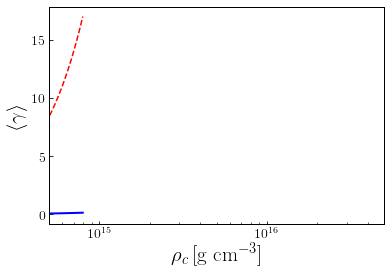

In [491]:
fig, ax = plt.subplots()
plt.plot(rhosc,gamma_crs1,lw='1.5',color='r',linestyle='--',label=r'$\gamma_{cr}$')
plt.plot(rhosc,gamma_efs1,lw='2.0',color='blue',label=r'$\langle \gamma \rangle$')

plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$\langle \gamma \rangle$')

plt.xscale('log')
plt.xlim(left=10**(14.7),right=10**(16.7))
#plt.ylim(0,10)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')
#l = plt.legend(bbox_to_anchor=(0.85,-0.15), loc="lower right", 
                #bbox_transform=fig.transFigure, ncol=2)



plt.savefig('figures/AdiabaticIndexbsk19.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

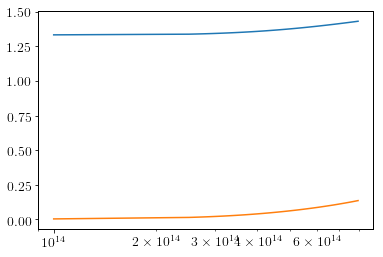

In [492]:
plt.plot(rhosc,gamma_crs2)
plt.plot(rhosc,gamma_efs2)
plt.xscale('log')

## M - $\rho_c$

In [493]:
Rbsk19,Mbsk19,rhocbsk19=np.loadtxt('results2/bsk19/MRrhoc.dat',usecols=(0,1,2),unpack=True)

In [494]:
np.amax(Mbsk19)

1.86081207503

In [495]:
rhocbsk19[np.argmax(Mbsk19)]

3467368504530000.0

In [496]:
np.log10(rhocbsk19[np.argmax(Mbsk19)])

15.540000000000587

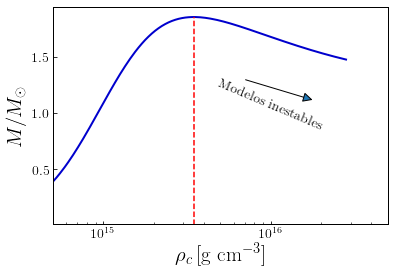

In [497]:
fig, ax = plt.subplots()

plt.plot(rhocbsk19,Mbsk19,color='mediumblue',lw='2.0')
plt.plot([10**(np.log10(rhocbsk19[np.argmax(Mbsk19)])),10**(np.log10(rhocbsk19[np.argmax(Mbsk19)]))],[0.0,np.amax(Mbsk19)],'r--',lw='1.5')

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)
plt.annotate("", xy=(10**(16.25),1.12), xytext=(10**(15.85),1.3), arrowprops=prop)
#plt.arrow(10**(15.6), 1.38,10**(15.7) ,-0.1 , head_width=0.05, head_length=10**(15))
plt.text(10**(15.67), 1.23, 'Modelos inestables' , fontsize=14,rotation=-23)

plt.xscale('log')
plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.xlim(left=10**(14.7),right=10**(16.7))
plt.ylim(bottom=0.01)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')

plt.savefig('figures/Mrhorel_bsk19.pdf', format='pdf', dpi=1000,bbox_inches="tight")

## Tunning the interpolation of the solution

### 14.0

In [498]:
bsk19_140=np.loadtxt('results2/bsk19/14.0.dat',unpack=True)
bsk19_140[3] = bsk19_140[3]-bsk19_140[3][-1] + 0.5*np.log(1-2*bsk19_140[0][-1]/bsk19_140[-1][-1])

In [499]:
s1=5e-7
s2=1e-15
bsk19_140rho=interpolate.UnivariateSpline(bsk19_140[-1], bsk19_140[2], k=5, s=s1)
bsk19_140drho=interpolate.UnivariateSpline(bsk19_140[-1], bsk19_140[2], k=5, s=s1).derivative(n=1)
bsk19_140ddrho=interpolate.UnivariateSpline(bsk19_140[-1], bsk19_140[2], k=5, s=s1).derivative(n=2)

bsk19_140p=interpolate.UnivariateSpline(bsk19_140[-1], bsk19_140[1], k=5, s=s2)
bsk19_140dp=interpolate.UnivariateSpline(bsk19_140[-1], bsk19_140[1], k=5, s=s2).derivative(n=1)
bsk19_140ddp=interpolate.UnivariateSpline(bsk19_140[-1], bsk19_140[1], k=5, s=s2).derivative(n=2)

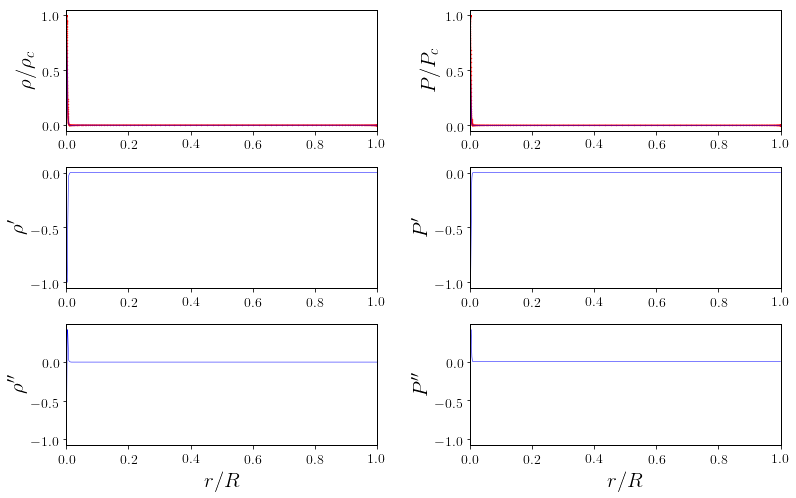

In [500]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bsk19_140[-1]/bsk19_140[-1][-1],bsk19_140[2]/bsk19_140[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk19_140[-1]/bsk19_140[-1][-1],bsk19_140rho(bsk19_140[-1])/bsk19_140[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bsk19_140[-1]/bsk19_140[-1][-1],bsk19_140[1]/bsk19_140[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk19_140[-1]/bsk19_140[-1][-1],bsk19_140p(bsk19_140[-1])/bsk19_140[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bsk19_140[-1]/bsk19_140[-1][-1],bsk19_140drho(bsk19_140[-1])/max(abs(bsk19_140drho(bsk19_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bsk19_140[-1]/bsk19_140[-1][-1],bsk19_140dp(bsk19_140[-1])/max(abs(bsk19_140dp(bsk19_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bsk19_140[-1]/bsk19_140[-1][-1],bsk19_140ddrho(bsk19_140[-1])/max(abs(bsk19_140ddrho(bsk19_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bsk19_140[-1]/bsk19_140[-1][-1],bsk19_140ddp(bsk19_140[-1])/max(abs(bsk19_140ddp(bsk19_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbsk19_140.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 14.5

In [501]:
bsk19_145=np.loadtxt('results2/bsk19/14.5.dat',unpack=True)
bsk19_145[3] = bsk19_145[3]-bsk19_145[3][-1] + 0.5*np.log(1-2*bsk19_145[0][-1]/bsk19_145[-1][-1])

In [502]:
s1=1e-7
s2=1e-12
bsk19_145rho=interpolate.UnivariateSpline(bsk19_145[-1], bsk19_145[2], k=5, s=s1)
bsk19_145drho=interpolate.UnivariateSpline(bsk19_145[-1], bsk19_145[2], k=5, s=s1).derivative(n=1)
bsk19_145ddrho=interpolate.UnivariateSpline(bsk19_145[-1], bsk19_145[2], k=5, s=s1).derivative(n=2)

bsk19_145p=interpolate.UnivariateSpline(bsk19_145[-1], bsk19_145[1], k=5, s=s2)
bsk19_145dp=interpolate.UnivariateSpline(bsk19_145[-1], bsk19_145[1], k=5, s=s2).derivative(n=1)
bsk19_145ddp=interpolate.UnivariateSpline(bsk19_145[-1], bsk19_145[1], k=5, s=s2).derivative(n=2)

In [503]:
bsk19_145rho(0.4*bsk19_145[-1][-1])*rhodim

89316488615561.86

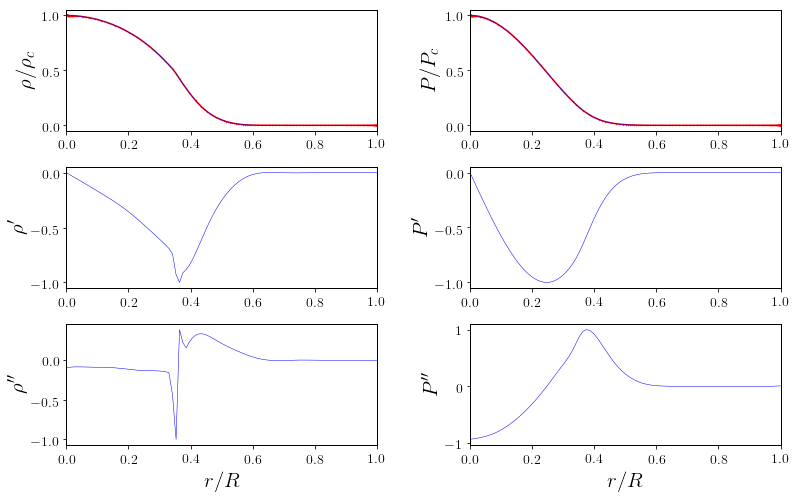

In [504]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bsk19_145[-1]/bsk19_145[-1][-1],bsk19_145[2]/bsk19_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk19_145[-1]/bsk19_145[-1][-1],bsk19_145rho(bsk19_145[-1])/bsk19_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bsk19_145[-1]/bsk19_145[-1][-1],bsk19_145[1]/bsk19_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk19_145[-1]/bsk19_145[-1][-1],bsk19_145p(bsk19_145[-1])/bsk19_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bsk19_145[-1]/bsk19_145[-1][-1],bsk19_145drho(bsk19_145[-1])/max(abs(bsk19_145drho(bsk19_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bsk19_145[-1]/bsk19_145[-1][-1],bsk19_145dp(bsk19_145[-1])/max(abs(bsk19_145dp(bsk19_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bsk19_145[-1]/bsk19_145[-1][-1],bsk19_145ddrho(bsk19_145[-1])/max(abs(bsk19_145ddrho(bsk19_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bsk19_145[-1]/bsk19_145[-1][-1],bsk19_145ddp(bsk19_145[-1])/max(abs(bsk19_145ddp(bsk19_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbsk19_145.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.0

In [505]:
bsk19_150=np.loadtxt('results2/bsk19/15.0.dat',unpack=True)
bsk19_150[3] = bsk19_150[3]-bsk19_150[3][-1] + 0.5*np.log(1-2*bsk19_150[0][-1]/bsk19_150[-1][-1])

In [506]:
s1=8e-6
s2=1e-15
bsk19_150rho=interpolate.UnivariateSpline(bsk19_150[-1], bsk19_150[2], k=5, s=s1)
bsk19_150drho=interpolate.UnivariateSpline(bsk19_150[-1], bsk19_150[2], k=5, s=s1).derivative(n=1)
bsk19_150ddrho=interpolate.UnivariateSpline(bsk19_150[-1], bsk19_150[2], k=5, s=s1).derivative(n=2)

bsk19_150p=interpolate.UnivariateSpline(bsk19_150[-1], bsk19_150[1], k=5, s=s2)
bsk19_150dp=interpolate.UnivariateSpline(bsk19_150[-1], bsk19_150[1], k=5, s=s2).derivative(n=1)
bsk19_150ddp=interpolate.UnivariateSpline(bsk19_150[-1], bsk19_150[1], k=5, s=s2).derivative(n=2)

ValueError: x must be strictly increasing

NameError: name 'bsk19_150rho' is not defined

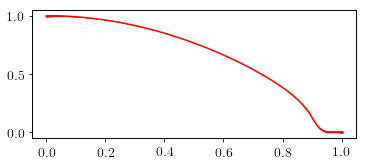

In [507]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bsk19_150[-1]/bsk19_150[-1][-1],bsk19_150[2]/bsk19_150[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk19_150[-1]/bsk19_150[-1][-1],bsk19_150rho(bsk19_150[-1])/bsk19_150[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bsk19_150[-1]/bsk19_150[-1][-1],bsk19_150[1]/bsk19_150[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk19_150[-1]/bsk19_150[-1][-1],bsk19_150p(bsk19_150[-1])/bsk19_150[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bsk19_150[-1]/bsk19_150[-1][-1],bsk19_150drho(bsk19_150[-1])/max(abs(bsk19_150drho(bsk19_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bsk19_150[-1]/bsk19_150[-1][-1],bsk19_150dp(bsk19_150[-1])/max(abs(bsk19_150dp(bsk19_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bsk19_150[-1]/bsk19_150[-1][-1],bsk19_150ddrho(bsk19_150[-1])/max(abs(bsk19_150ddrho(bsk19_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bsk19_150[-1]/bsk19_150[-1][-1],bsk19_150ddp(bsk19_150[-1])/max(abs(bsk19_150ddp(bsk19_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbsk19_150.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.5

In [508]:
bsk19_155=np.loadtxt('results2/bsk19/15.5.dat',unpack=True)
bsk19_155[3] = bsk19_155[3]-bsk19_155[3][-1] + 0.5*np.log(1-2*bsk19_155[0][-1]/bsk19_155[-1][-1])

In [509]:
s1=1e-5
s2=1e-9
bsk19_155rho=interpolate.UnivariateSpline(bsk19_155[-1], bsk19_155[2], k=5, s=s1)
bsk19_155drho=interpolate.UnivariateSpline(bsk19_155[-1], bsk19_155[2], k=5, s=s1).derivative(n=1)
bsk19_155ddrho=interpolate.UnivariateSpline(bsk19_155[-1], bsk19_155[2], k=5, s=s1).derivative(n=2)

bsk19_155p=interpolate.UnivariateSpline(bsk19_155[-1], bsk19_155[1], k=5, s=s2)
bsk19_155dp=interpolate.UnivariateSpline(bsk19_155[-1], bsk19_155[1], k=5, s=s2).derivative(n=1)
bsk19_155ddp=interpolate.UnivariateSpline(bsk19_155[-1], bsk19_155[1], k=5, s=s2).derivative(n=2)

ValueError: x must be strictly increasing

NameError: name 'bsk19_155rho' is not defined

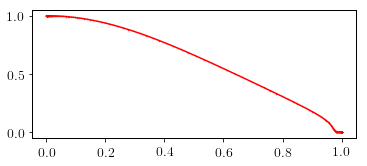

In [510]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bsk19_155[-1]/bsk19_155[-1][-1],bsk19_155[2]/bsk19_155[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk19_155[-1]/bsk19_155[-1][-1],bsk19_155rho(bsk19_155[-1])/bsk19_155[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bsk19_155[-1]/bsk19_155[-1][-1],bsk19_155[1]/bsk19_155[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk19_155[-1]/bsk19_155[-1][-1],bsk19_155p(bsk19_155[-1])/bsk19_155[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bsk19_155[-1]/bsk19_155[-1][-1],bsk19_155drho(bsk19_155[-1])/max(abs(bsk19_155drho(bsk19_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bsk19_155[-1]/bsk19_155[-1][-1],bsk19_155dp(bsk19_155[-1])/max(abs(bsk19_155dp(bsk19_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bsk19_155[-1]/bsk19_155[-1][-1],bsk19_155ddrho(bsk19_155[-1])/max(abs(bsk19_155ddrho(bsk19_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bsk19_155[-1]/bsk19_155[-1][-1],bsk19_155ddp(bsk19_155[-1])/max(abs(bsk19_155ddp(bsk19_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbsk19_155.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Redshift

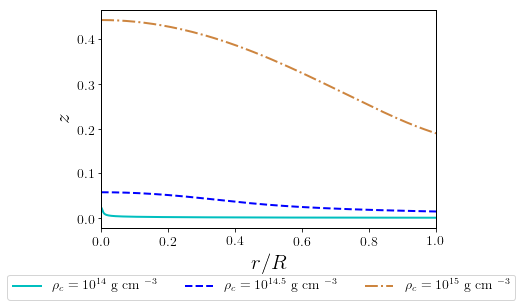

In [511]:
fig = plt.figure()

plt.plot(bsk19_140[-1]/bsk19_140[-1][-1],np.exp(-bsk19_140[3])-1.0,color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$')
plt.plot(bsk19_145[-1]/bsk19_145[-1][-1],np.exp(-bsk19_145[3])-1.0,color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$')
plt.plot(bsk19_150[-1]/bsk19_150[-1][-1],np.exp(-bsk19_150[3])-1.0,color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm $^{-3}$')

l = plt.legend(bbox_to_anchor=(1.1,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$z$')
plt.xlim(0,1.0)

plt.savefig('figures/Redshiftbsk19.pdf', format='pdf', dpi=1000,bbox_inches="tight")

# BSK20 -----------------------------------------------------------------------------------

In [512]:
rhobsk20,Pbsk20,nbsk20=np.loadtxt('EOS/bsk20.dat',usecols=(2,1,0),unpack=True)

## Dominant energy condition

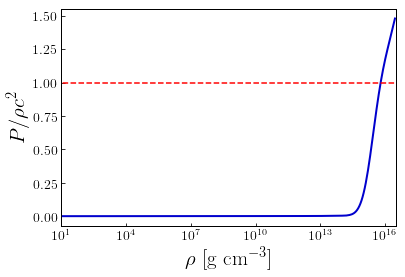

<Figure size 432x288 with 0 Axes>

In [513]:
fig, ax = plt.subplots()
plt.plot(rhobsk20,np.divide(Pbsk20,rhobsk20),lw='2',color='mediumblue')
plt.plot([0,10**(17)],[1.0,1.0],'r--',lw='1.5')

ax.set_xscale("log")
#locmaj = matplotlib.ticker.LogLocator(base=10.0,numticks=16) 
#ax.xaxis.set_major_locator(locmaj)


plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ P / \rho c^2 $')
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=16)
#ax.xaxis.set_minor_locator(locmin)
#ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
#plt.ylim(0,1)
plt.savefig('figures/ECbsk20.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

## Speed of sound

In [514]:
vsquared=interpolate.UnivariateSpline(rhobsk20, Pbsk20, k=3, s=0).derivative(n=1)

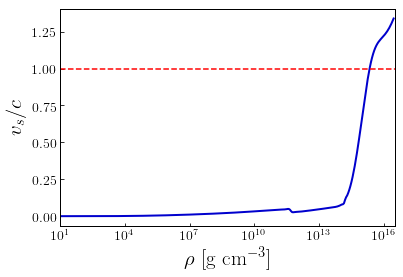

In [515]:
fig, ax = plt.subplots()
plt.plot(rhobsk20,np.sqrt(vsquared(rhobsk20)),lw='2.0',color='mediumblue')
plt.plot([1e+1,10**(16.5)],[1.0,1.0],'r--',lw='1.5')
plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ v_s / c $')
plt.xscale('log')
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#mpl.rcParams['axes.linewidth'] = 1.4
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
plt.savefig('figures/SSbsk20.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Adiabatic Index

In [516]:
Gamma=np.multiply(np.divide(np.add(rhobsk20,Pbsk20),Pbsk20),vsquared(rhobsk20))

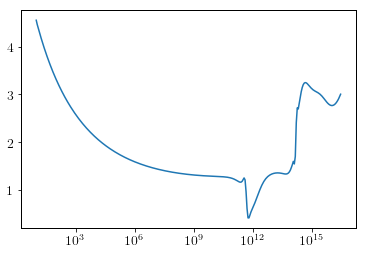

In [517]:
plt.plot(rhobsk20,Gamma)
plt.xscale('log')

$$ \langle\gamma\rangle=\frac{\int_{0}^{R} e^{(\lambda+3 \nu) } \gamma(r) P(r) r^{2} d r}{\int_{0}^{R} e^{(\lambda+3 \nu) } P(r) r^{2} d r} $$

Listing all the models calculated

In [518]:
owd=os.getcwd()
path=os.chdir('results2/bsk20')
listOfEntries= os.scandir(path)
models_bsk20 = []
for entry in listOfEntries:
    if '1' in entry.name:
        models_bsk20.append(entry.name)
os.chdir(owd)
models_bsk20.sort()

In [519]:
gamma_efs1 = []
gamma_efs2 = []
gamma_crs1 = []
gamma_crs2 = []
rhosc= []
for model in models_bsk20:
    m, P, rho, nu, lambd, r = np.loadtxt('results2/bsk20/' + model ,unpack=True)
    nu = nu - nu[-1] + 0.5*np.log(1-2*m[-1]/r[-1])
    #lambd = np.zeros_like(r)
    #for i in range((r.shape)[0]):
    #    if i==0:
    #        lambd[i] = 0
    #    else:
    #        lambd[i] = 0.5*np.log(1/(1-2*m[i]/r[i]))
    drho=interpolate.UnivariateSpline(r, rho, k=5, s=0).derivative(n=1)
    dP=interpolate.UnivariateSpline(r, P, k=5, s=0).derivative(n=1)
    gamma = np.divide(dP(r),drho(r))
    gamma_ef1 = integrate.trapz(np.exp(lambd+3*nu)*gamma*P*(r**2),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t1 = (1/36)*integrate.trapz(np.exp((lambd+3*nu))*(16*P+(np.exp(2*lambd)-1)*(P+rho))*(np.exp(2*lambd)-1)*(r**2))/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t2 = (4*np.pi/9)*integrate.trapz(np.exp(3*lambd+3*nu)*(8*P + (np.exp(2*lambd)+1)*(P+rho))*P*(r**4),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t3 = ((16*np.pi**2)/9)*integrate.trapz(np.exp(5*lambd+3*nu)*(P+rho)*(P**2)*(r**6),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    gamma_cr1 = 4/3 + t1 + t2 + t3
    gamma_efs1.append(gamma_ef1)
    gamma_crs1.append(gamma_cr1)
    gamma_ef2 = integrate.trapz(gamma*P*r**2,r)/integrate.trapz(P*r**2,r)
    gamma_cr2 = 4/3 + (19/42)*2*m[-1]/r[-1]
    gamma_efs2.append(gamma_ef2)
    gamma_crs2.append(gamma_cr2)
    rhosc.append(rho[0]*rhodim)

ValueError: x must be strictly increasing

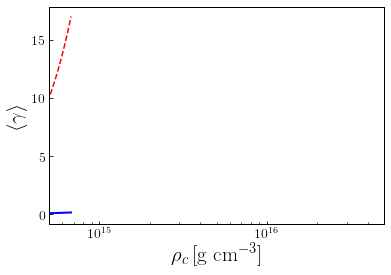

In [520]:
fig, ax = plt.subplots()
plt.plot(rhosc,gamma_crs1,lw='1.5',color='r',linestyle='--',label=r'$\gamma_{cr}$')
plt.plot(rhosc,gamma_efs1,lw='2.0',color='blue',label=r'$\langle \gamma \rangle$')

plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$\langle \gamma \rangle$')

plt.xscale('log')
plt.xlim(left=10**(14.7),right=10**(16.7))
#plt.ylim(0,10)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')
#l = plt.legend(bbox_to_anchor=(0.85,-0.15), loc="lower right", 
                #bbox_transform=fig.transFigure, ncol=2)



plt.savefig('figures/AdiabaticIndexbsk20.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

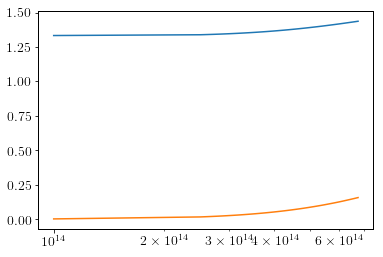

In [521]:
plt.plot(rhosc,gamma_crs2)
plt.plot(rhosc,gamma_efs2)
plt.xscale('log')

## M - $\rho_c$

In [522]:
Rbsk20,Mbsk20,rhocbsk20=np.loadtxt('results2/bsk20/MRrhoc.dat',usecols=(0,1,2),unpack=True)

In [523]:
np.amax(Mbsk20)

2.16522378913

In [524]:
rhocbsk20[np.argmax(Mbsk20)]

2691534803930000.0

In [525]:
np.log10(rhocbsk20[np.argmax(Mbsk20)])

15.430000000000497

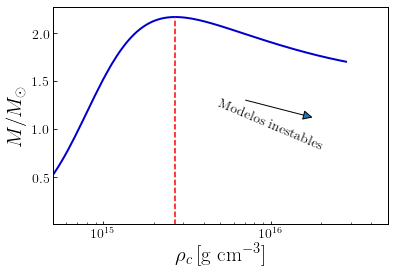

In [526]:
fig, ax = plt.subplots()

plt.plot(rhocbsk20,Mbsk20,color='mediumblue',lw='2.0')
plt.plot([10**(np.log10(rhocbsk20[np.argmax(Mbsk20)])),10**(np.log10(rhocbsk20[np.argmax(Mbsk20)]))],[0.0,np.amax(Mbsk20)],'r--',lw='1.5')

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)
plt.annotate("", xy=(10**(16.25),1.12), xytext=(10**(15.85),1.3), arrowprops=prop)
#plt.arrow(10**(15.6), 1.38,10**(15.7) ,-0.1 , head_width=0.05, head_length=10**(15))
plt.text(10**(15.67), 1.23, 'Modelos inestables' , fontsize=14,rotation=-23)

plt.xscale('log')
plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.xlim(left=10**(14.7),right=10**(16.7))
plt.ylim(bottom=0.01)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')

plt.savefig('figures/Mrhorel_bsk20.pdf', format='pdf', dpi=1000,bbox_inches="tight")

## Tunning the interpolation of the solution

### 14.0

In [527]:
bsk20_140=np.loadtxt('results2/bsk20/14.0.dat',unpack=True)
bsk20_140[3] = bsk20_140[3]-bsk20_140[3][-1] + 0.5*np.log(1-2*bsk20_140[0][-1]/bsk20_140[-1][-1])

In [528]:
s1=5e-7
s2=1e-15
bsk20_140rho=interpolate.UnivariateSpline(bsk20_140[-1], bsk20_140[2], k=5, s=s1)
bsk20_140drho=interpolate.UnivariateSpline(bsk20_140[-1], bsk20_140[2], k=5, s=s1).derivative(n=1)
bsk20_140ddrho=interpolate.UnivariateSpline(bsk20_140[-1], bsk20_140[2], k=5, s=s1).derivative(n=2)

bsk20_140p=interpolate.UnivariateSpline(bsk20_140[-1], bsk20_140[1], k=5, s=s2)
bsk20_140dp=interpolate.UnivariateSpline(bsk20_140[-1], bsk20_140[1], k=5, s=s2).derivative(n=1)
bsk20_140ddp=interpolate.UnivariateSpline(bsk20_140[-1], bsk20_140[1], k=5, s=s2).derivative(n=2)

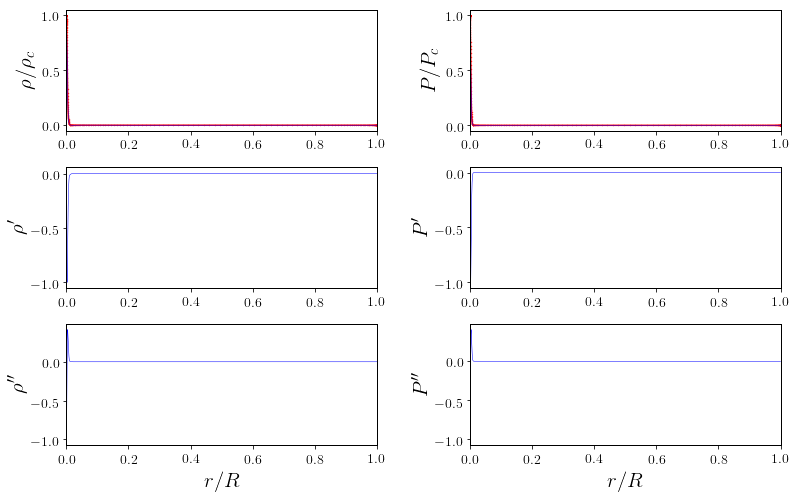

In [529]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bsk20_140[-1]/bsk20_140[-1][-1],bsk20_140[2]/bsk20_140[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk20_140[-1]/bsk20_140[-1][-1],bsk20_140rho(bsk20_140[-1])/bsk20_140[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bsk20_140[-1]/bsk20_140[-1][-1],bsk20_140[1]/bsk20_140[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk20_140[-1]/bsk20_140[-1][-1],bsk20_140p(bsk20_140[-1])/bsk20_140[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bsk20_140[-1]/bsk20_140[-1][-1],bsk20_140drho(bsk20_140[-1])/max(abs(bsk20_140drho(bsk20_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bsk20_140[-1]/bsk20_140[-1][-1],bsk20_140dp(bsk20_140[-1])/max(abs(bsk20_140dp(bsk20_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bsk20_140[-1]/bsk20_140[-1][-1],bsk20_140ddrho(bsk20_140[-1])/max(abs(bsk20_140ddrho(bsk20_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bsk20_140[-1]/bsk20_140[-1][-1],bsk20_140ddp(bsk20_140[-1])/max(abs(bsk20_140ddp(bsk20_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbsk20_140.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 14.5

In [530]:
bsk20_145=np.loadtxt('results2/bsk20/14.5.dat',unpack=True)
bsk20_145[3] = bsk20_145[3]-bsk20_145[3][-1] + 0.5*np.log(1-2*bsk20_145[0][-1]/bsk20_145[-1][-1])

In [531]:
s1=1e-7
s2=1e-12
bsk20_145rho=interpolate.UnivariateSpline(bsk20_145[-1], bsk20_145[2], k=5, s=s1)
bsk20_145drho=interpolate.UnivariateSpline(bsk20_145[-1], bsk20_145[2], k=5, s=s1).derivative(n=1)
bsk20_145ddrho=interpolate.UnivariateSpline(bsk20_145[-1], bsk20_145[2], k=5, s=s1).derivative(n=2)

bsk20_145p=interpolate.UnivariateSpline(bsk20_145[-1], bsk20_145[1], k=5, s=s2)
bsk20_145dp=interpolate.UnivariateSpline(bsk20_145[-1], bsk20_145[1], k=5, s=s2).derivative(n=1)
bsk20_145ddp=interpolate.UnivariateSpline(bsk20_145[-1], bsk20_145[1], k=5, s=s2).derivative(n=2)

In [532]:
bsk20_145rho(0.4*bsk20_145[-1][-1])*rhodim

175217264700661.3

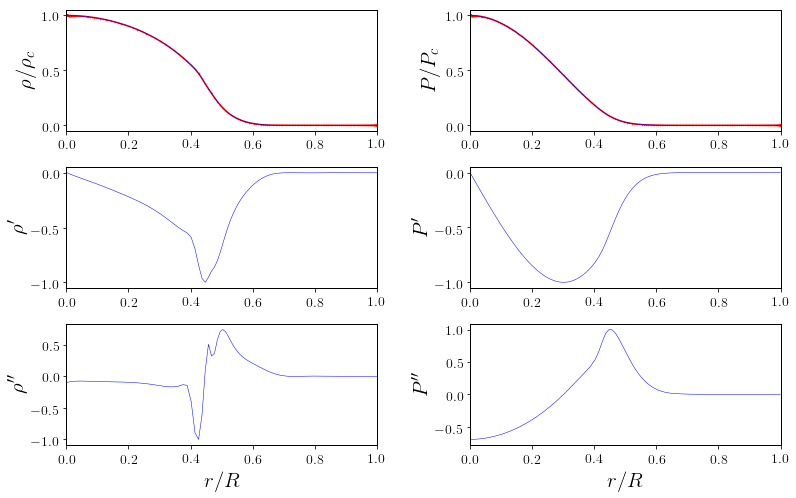

In [533]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bsk20_145[-1]/bsk20_145[-1][-1],bsk20_145[2]/bsk20_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk20_145[-1]/bsk20_145[-1][-1],bsk20_145rho(bsk20_145[-1])/bsk20_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bsk20_145[-1]/bsk20_145[-1][-1],bsk20_145[1]/bsk20_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk20_145[-1]/bsk20_145[-1][-1],bsk20_145p(bsk20_145[-1])/bsk20_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bsk20_145[-1]/bsk20_145[-1][-1],bsk20_145drho(bsk20_145[-1])/max(abs(bsk20_145drho(bsk20_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bsk20_145[-1]/bsk20_145[-1][-1],bsk20_145dp(bsk20_145[-1])/max(abs(bsk20_145dp(bsk20_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bsk20_145[-1]/bsk20_145[-1][-1],bsk20_145ddrho(bsk20_145[-1])/max(abs(bsk20_145ddrho(bsk20_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bsk20_145[-1]/bsk20_145[-1][-1],bsk20_145ddp(bsk20_145[-1])/max(abs(bsk20_145ddp(bsk20_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbsk20_145.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.0

In [534]:
bsk20_150=np.loadtxt('results2/bsk20/15.0.dat',unpack=True)
bsk20_150[3] = bsk20_150[3]-bsk20_150[3][-1] + 0.5*np.log(1-2*bsk20_150[0][-1]/bsk20_150[-1][-1])

In [535]:
s1=8e-6
s2=1e-15
bsk20_150rho=interpolate.UnivariateSpline(bsk20_150[-1], bsk20_150[2], k=5, s=s1)
bsk20_150drho=interpolate.UnivariateSpline(bsk20_150[-1], bsk20_150[2], k=5, s=s1).derivative(n=1)
bsk20_150ddrho=interpolate.UnivariateSpline(bsk20_150[-1], bsk20_150[2], k=5, s=s1).derivative(n=2)

bsk20_150p=interpolate.UnivariateSpline(bsk20_150[-1], bsk20_150[1], k=5, s=s2)
bsk20_150dp=interpolate.UnivariateSpline(bsk20_150[-1], bsk20_150[1], k=5, s=s2).derivative(n=1)
bsk20_150ddp=interpolate.UnivariateSpline(bsk20_150[-1], bsk20_150[1], k=5, s=s2).derivative(n=2)

ValueError: x must be strictly increasing

NameError: name 'bsk20_150rho' is not defined

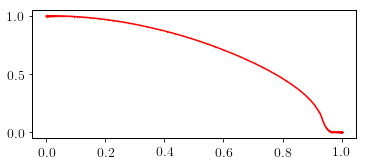

In [536]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bsk20_150[-1]/bsk20_150[-1][-1],bsk20_150[2]/bsk20_150[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk20_150[-1]/bsk20_150[-1][-1],bsk20_150rho(bsk20_150[-1])/bsk20_150[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bsk20_150[-1]/bsk20_150[-1][-1],bsk20_150[1]/bsk20_150[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk20_150[-1]/bsk20_150[-1][-1],bsk20_150p(bsk20_150[-1])/bsk20_150[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bsk20_150[-1]/bsk20_150[-1][-1],bsk20_150drho(bsk20_150[-1])/max(abs(bsk20_150drho(bsk20_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bsk20_150[-1]/bsk20_150[-1][-1],bsk20_150dp(bsk20_150[-1])/max(abs(bsk20_150dp(bsk20_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bsk20_150[-1]/bsk20_150[-1][-1],bsk20_150ddrho(bsk20_150[-1])/max(abs(bsk20_150ddrho(bsk20_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bsk20_150[-1]/bsk20_150[-1][-1],bsk20_150ddp(bsk20_150[-1])/max(abs(bsk20_150ddp(bsk20_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbsk20_150.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.5

In [537]:
bsk20_155=np.loadtxt('results2/bsk20/15.5.dat',unpack=True)
bsk20_155[3] = bsk20_155[3]-bsk20_155[3][-1] + 0.5*np.log(1-2*bsk20_155[0][-1]/bsk20_155[-1][-1])

In [538]:
s1=1e-5
s2=1e-9
bsk20_155rho=interpolate.UnivariateSpline(bsk20_155[-1], bsk20_155[2], k=5, s=s1)
bsk20_155drho=interpolate.UnivariateSpline(bsk20_155[-1], bsk20_155[2], k=5, s=s1).derivative(n=1)
bsk20_155ddrho=interpolate.UnivariateSpline(bsk20_155[-1], bsk20_155[2], k=5, s=s1).derivative(n=2)

bsk20_155p=interpolate.UnivariateSpline(bsk20_155[-1], bsk20_155[1], k=5, s=s2)
bsk20_155dp=interpolate.UnivariateSpline(bsk20_155[-1], bsk20_155[1], k=5, s=s2).derivative(n=1)
bsk20_155ddp=interpolate.UnivariateSpline(bsk20_155[-1], bsk20_155[1], k=5, s=s2).derivative(n=2)

ValueError: x must be strictly increasing

NameError: name 'bsk20_155rho' is not defined

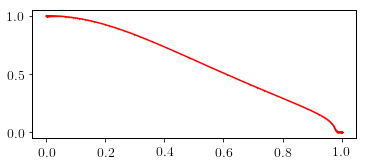

In [539]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bsk20_155[-1]/bsk20_155[-1][-1],bsk20_155[2]/bsk20_155[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk20_155[-1]/bsk20_155[-1][-1],bsk20_155rho(bsk20_155[-1])/bsk20_155[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bsk20_155[-1]/bsk20_155[-1][-1],bsk20_155[1]/bsk20_155[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk20_155[-1]/bsk20_155[-1][-1],bsk20_155p(bsk20_155[-1])/bsk20_155[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bsk20_155[-1]/bsk20_155[-1][-1],bsk20_155drho(bsk20_155[-1])/max(abs(bsk20_155drho(bsk20_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bsk20_155[-1]/bsk20_155[-1][-1],bsk20_155dp(bsk20_155[-1])/max(abs(bsk20_155dp(bsk20_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bsk20_155[-1]/bsk20_155[-1][-1],bsk20_155ddrho(bsk20_155[-1])/max(abs(bsk20_155ddrho(bsk20_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bsk20_155[-1]/bsk20_155[-1][-1],bsk20_155ddp(bsk20_155[-1])/max(abs(bsk20_155ddp(bsk20_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbsk20_155.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Redshift

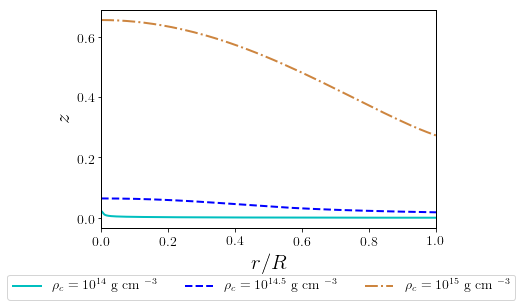

In [540]:
fig = plt.figure()

plt.plot(bsk20_140[-1]/bsk20_140[-1][-1],np.exp(-bsk20_140[3])-1.0,color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$')
plt.plot(bsk20_145[-1]/bsk20_145[-1][-1],np.exp(-bsk20_145[3])-1.0,color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$')
plt.plot(bsk20_150[-1]/bsk20_150[-1][-1],np.exp(-bsk20_150[3])-1.0,color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm $^{-3}$')

l = plt.legend(bbox_to_anchor=(1.1,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$z$')
plt.xlim(0,1.0)

plt.savefig('figures/Redshiftbsk20.pdf', format='pdf', dpi=1000,bbox_inches="tight")

# BSK21 ---------------------------------------------------------------------------------------

In [541]:
rhobsk21,Pbsk21,nbsk21=np.loadtxt('EOS/bsk21.dat',usecols=(2,1,0),unpack=True)

## Dominant energy condition

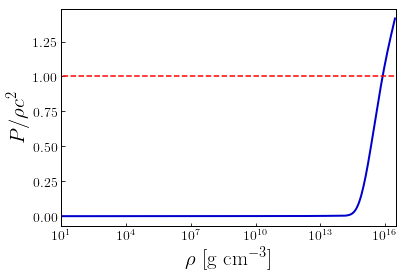

<Figure size 432x288 with 0 Axes>

In [542]:
fig, ax = plt.subplots()
plt.plot(rhobsk21,np.divide(Pbsk21,rhobsk21),lw='2',color='mediumblue')
plt.plot([0,10**(17)],[1.0,1.0],'r--',lw='1.5')

ax.set_xscale("log")
#locmaj = matplotlib.ticker.LogLocator(base=10.0,numticks=16) 
#ax.xaxis.set_major_locator(locmaj)


plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ P / \rho c^2 $')
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=16)
#ax.xaxis.set_minor_locator(locmin)
#ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
#plt.ylim(0,1)
plt.savefig('figures/ECbsk21.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

## Speed of sound

In [543]:
vsquared=interpolate.UnivariateSpline(rhobsk21, Pbsk21, k=3, s=0).derivative(n=1)

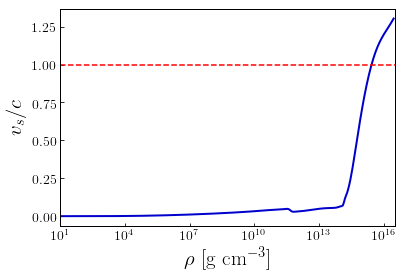

In [544]:
fig, ax = plt.subplots()
plt.plot(rhobsk21,np.sqrt(vsquared(rhobsk21)),lw='2.0',color='mediumblue')
plt.plot([1e+1,10**(16.5)],[1.0,1.0],'r--',lw='1.5')
plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ v_s / c $')
plt.xscale('log')
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#mpl.rcParams['axes.linewidth'] = 1.4
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
plt.savefig('figures/SSbsk21.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Adiabatic Index

In [545]:
Gamma=np.multiply(np.divide(np.add(rhobsk21,Pbsk21),Pbsk21),vsquared(rhobsk21))

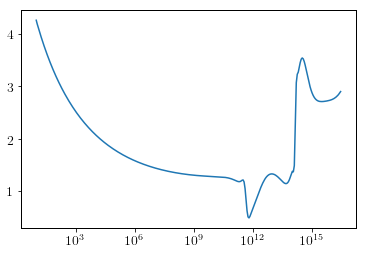

In [546]:
plt.plot(rhobsk21,Gamma)
plt.xscale('log')

$$ \langle\gamma\rangle=\frac{\int_{0}^{R} e^{(\lambda+3 \nu) } \gamma(r) P(r) r^{2} d r}{\int_{0}^{R} e^{(\lambda+3 \nu) } P(r) r^{2} d r} $$

Listing all the models calculated

In [547]:
owd=os.getcwd()
path=os.chdir('results2/bsk21')
listOfEntries= os.scandir(path)
models_bsk21 = []
for entry in listOfEntries:
    if '1' in entry.name:
        models_bsk21.append(entry.name)
os.chdir(owd)
models_bsk21.sort()

In [548]:
gamma_efs1 = []
gamma_efs2 = []
gamma_crs1 = []
gamma_crs2 = []
rhosc= []
for model in models_bsk21:
    m, P, rho, nu, lambd, r = np.loadtxt('results2/bsk21/' + model ,unpack=True)
    nu = nu - nu[-1] + 0.5*np.log(1-2*m[-1]/r[-1])
    #lambd = np.zeros_like(r)
    #for i in range((r.shape)[0]):
    #    if i==0:
    #        lambd[i] = 0
    #    else:
    #        lambd[i] = 0.5*np.log(1/(1-2*m[i]/r[i]))
    drho=interpolate.UnivariateSpline(r, rho, k=5, s=0).derivative(n=1)
    dP=interpolate.UnivariateSpline(r, P, k=5, s=0).derivative(n=1)
    gamma = np.divide(dP(r),drho(r))
    gamma_ef1 = integrate.trapz(np.exp(lambd+3*nu)*gamma*P*(r**2),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t1 = (1/36)*integrate.trapz(np.exp((lambd+3*nu))*(16*P+(np.exp(2*lambd)-1)*(P+rho))*(np.exp(2*lambd)-1)*(r**2))/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t2 = (4*np.pi/9)*integrate.trapz(np.exp(3*lambd+3*nu)*(8*P + (np.exp(2*lambd)+1)*(P+rho))*P*(r**4),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t3 = ((16*np.pi**2)/9)*integrate.trapz(np.exp(5*lambd+3*nu)*(P+rho)*(P**2)*(r**6),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    gamma_cr1 = 4/3 + t1 + t2 + t3
    gamma_efs1.append(gamma_ef1)
    gamma_crs1.append(gamma_cr1)
    gamma_ef2 = integrate.trapz(gamma*P*r**2,r)/integrate.trapz(P*r**2,r)
    gamma_cr2 = 4/3 + (19/42)*2*m[-1]/r[-1]
    gamma_efs2.append(gamma_ef2)
    gamma_crs2.append(gamma_cr2)
    rhosc.append(rho[0]*rhodim)

ValueError: x must be strictly increasing

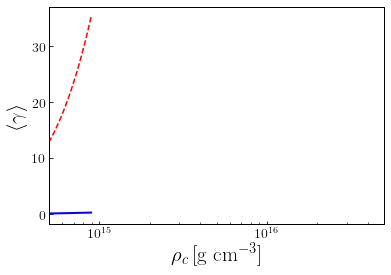

In [549]:
fig, ax = plt.subplots()
plt.plot(rhosc,gamma_crs1,lw='1.5',color='r',linestyle='--',label=r'$\gamma_{cr}$')
plt.plot(rhosc,gamma_efs1,lw='2.0',color='blue',label=r'$\langle \gamma \rangle$')

plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$\langle \gamma \rangle$')

plt.xscale('log')
plt.xlim(left=10**(14.7),right=10**(16.7))
#plt.ylim(0,10)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')
#l = plt.legend(bbox_to_anchor=(0.85,-0.15), loc="lower right", 
                #bbox_transform=fig.transFigure, ncol=2)



plt.savefig('figures/AdiabaticIndexbsk21.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

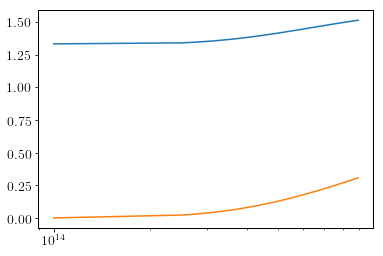

In [550]:
plt.plot(rhosc,gamma_crs2)
plt.plot(rhosc,gamma_efs2)
plt.xscale('log')

## M - $\rho_c$

In [551]:
Rbsk21,Mbsk21,rhocbsk21=np.loadtxt('results2/bsk21/MRrhoc.dat',usecols=(0,1,2),unpack=True)

In [552]:
np.amax(Mbsk21)

2.27446658436

In [553]:
rhocbsk21[np.argmax(Mbsk21)]

2290867652770000.0

In [554]:
np.log10(rhocbsk21[np.argmax(Mbsk21)])

15.360000000000422

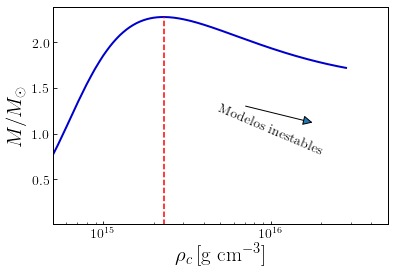

In [555]:
fig, ax = plt.subplots()

plt.plot(rhocbsk21,Mbsk21,color='mediumblue',lw='2.0')
plt.plot([10**(np.log10(rhocbsk21[np.argmax(Mbsk21)])),10**(np.log10(rhocbsk21[np.argmax(Mbsk21)]))],[0.0,np.amax(Mbsk21)],'r--',lw='1.5')

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)
plt.annotate("", xy=(10**(16.25),1.12), xytext=(10**(15.85),1.3), arrowprops=prop)
#plt.arrow(10**(15.6), 1.38,10**(15.7) ,-0.1 , head_width=0.05, head_length=10**(15))
plt.text(10**(15.67), 1.23, 'Modelos inestables' , fontsize=14,rotation=-23)

plt.xscale('log')
plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.xlim(left=10**(14.7),right=10**(16.7))
plt.ylim(bottom=0.01)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')

plt.savefig('figures/Mrhorel_bsk21.pdf', format='pdf', dpi=1000,bbox_inches="tight")

## Tunning the interpolation of the solution

### 14.0

In [556]:
bsk21_140=np.loadtxt('results2/bsk21/14.0.dat',unpack=True)
bsk21_140[3] = bsk21_140[3]-bsk21_140[3][-1] + 0.5*np.log(1-2*bsk21_140[0][-1]/bsk21_140[-1][-1])

In [557]:
s1=5e-7
s2=1e-15
bsk21_140rho=interpolate.UnivariateSpline(bsk21_140[-1], bsk21_140[2], k=5, s=s1)
bsk21_140drho=interpolate.UnivariateSpline(bsk21_140[-1], bsk21_140[2], k=5, s=s1).derivative(n=1)
bsk21_140ddrho=interpolate.UnivariateSpline(bsk21_140[-1], bsk21_140[2], k=5, s=s1).derivative(n=2)

bsk21_140p=interpolate.UnivariateSpline(bsk21_140[-1], bsk21_140[1], k=5, s=s2)
bsk21_140dp=interpolate.UnivariateSpline(bsk21_140[-1], bsk21_140[1], k=5, s=s2).derivative(n=1)
bsk21_140ddp=interpolate.UnivariateSpline(bsk21_140[-1], bsk21_140[1], k=5, s=s2).derivative(n=2)

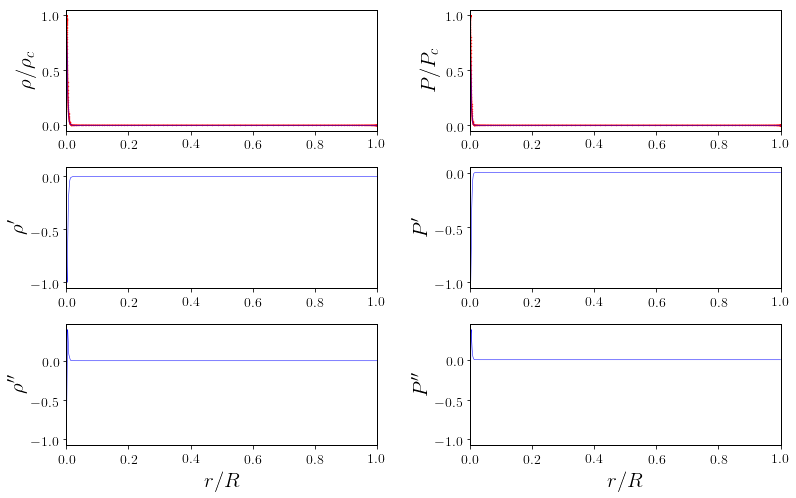

In [558]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bsk21_140[-1]/bsk21_140[-1][-1],bsk21_140[2]/bsk21_140[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk21_140[-1]/bsk21_140[-1][-1],bsk21_140rho(bsk21_140[-1])/bsk21_140[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bsk21_140[-1]/bsk21_140[-1][-1],bsk21_140[1]/bsk21_140[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk21_140[-1]/bsk21_140[-1][-1],bsk21_140p(bsk21_140[-1])/bsk21_140[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bsk21_140[-1]/bsk21_140[-1][-1],bsk21_140drho(bsk21_140[-1])/max(abs(bsk21_140drho(bsk21_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bsk21_140[-1]/bsk21_140[-1][-1],bsk21_140dp(bsk21_140[-1])/max(abs(bsk21_140dp(bsk21_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bsk21_140[-1]/bsk21_140[-1][-1],bsk21_140ddrho(bsk21_140[-1])/max(abs(bsk21_140ddrho(bsk21_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bsk21_140[-1]/bsk21_140[-1][-1],bsk21_140ddp(bsk21_140[-1])/max(abs(bsk21_140ddp(bsk21_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbsk21_140.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 14.5

In [559]:
bsk21_145=np.loadtxt('results2/bsk21/14.5.dat',unpack=True)
bsk21_145[3] = bsk21_145[3]-bsk21_145[3][-1] + 0.5*np.log(1-2*bsk21_145[0][-1]/bsk21_145[-1][-1])

In [560]:
s1=1e-7
s2=1e-12
bsk21_145rho=interpolate.UnivariateSpline(bsk21_145[-1], bsk21_145[2], k=5, s=s1)
bsk21_145drho=interpolate.UnivariateSpline(bsk21_145[-1], bsk21_145[2], k=5, s=s1).derivative(n=1)
bsk21_145ddrho=interpolate.UnivariateSpline(bsk21_145[-1], bsk21_145[2], k=5, s=s1).derivative(n=2)

bsk21_145p=interpolate.UnivariateSpline(bsk21_145[-1], bsk21_145[1], k=5, s=s2)
bsk21_145dp=interpolate.UnivariateSpline(bsk21_145[-1], bsk21_145[1], k=5, s=s2).derivative(n=1)
bsk21_145ddp=interpolate.UnivariateSpline(bsk21_145[-1], bsk21_145[1], k=5, s=s2).derivative(n=2)

In [561]:
bsk21_145rho(0.4*bsk21_145[-1][-1])*rhodim

240973640467011.56

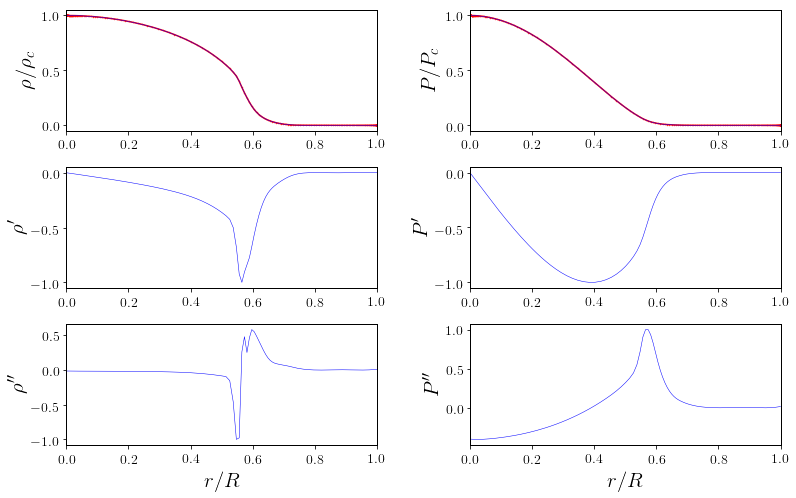

In [562]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bsk21_145[-1]/bsk21_145[-1][-1],bsk21_145[2]/bsk21_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk21_145[-1]/bsk21_145[-1][-1],bsk21_145rho(bsk21_145[-1])/bsk21_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bsk21_145[-1]/bsk21_145[-1][-1],bsk21_145[1]/bsk21_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk21_145[-1]/bsk21_145[-1][-1],bsk21_145p(bsk21_145[-1])/bsk21_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bsk21_145[-1]/bsk21_145[-1][-1],bsk21_145drho(bsk21_145[-1])/max(abs(bsk21_145drho(bsk21_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bsk21_145[-1]/bsk21_145[-1][-1],bsk21_145dp(bsk21_145[-1])/max(abs(bsk21_145dp(bsk21_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bsk21_145[-1]/bsk21_145[-1][-1],bsk21_145ddrho(bsk21_145[-1])/max(abs(bsk21_145ddrho(bsk21_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bsk21_145[-1]/bsk21_145[-1][-1],bsk21_145ddp(bsk21_145[-1])/max(abs(bsk21_145ddp(bsk21_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbsk21_145.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.0

In [563]:
bsk21_150=np.loadtxt('results2/bsk21/15.0.dat',unpack=True)
bsk21_150[3] = bsk21_150[3]-bsk21_150[3][-1] + 0.5*np.log(1-2*bsk21_150[0][-1]/bsk21_150[-1][-1])

In [564]:
s1=8e-6
s2=1e-15
bsk21_150rho=interpolate.UnivariateSpline(bsk21_150[-1], bsk21_150[2], k=5, s=s1)
bsk21_150drho=interpolate.UnivariateSpline(bsk21_150[-1], bsk21_150[2], k=5, s=s1).derivative(n=1)
bsk21_150ddrho=interpolate.UnivariateSpline(bsk21_150[-1], bsk21_150[2], k=5, s=s1).derivative(n=2)

bsk21_150p=interpolate.UnivariateSpline(bsk21_150[-1], bsk21_150[1], k=5, s=s2)
bsk21_150dp=interpolate.UnivariateSpline(bsk21_150[-1], bsk21_150[1], k=5, s=s2).derivative(n=1)
bsk21_150ddp=interpolate.UnivariateSpline(bsk21_150[-1], bsk21_150[1], k=5, s=s2).derivative(n=2)

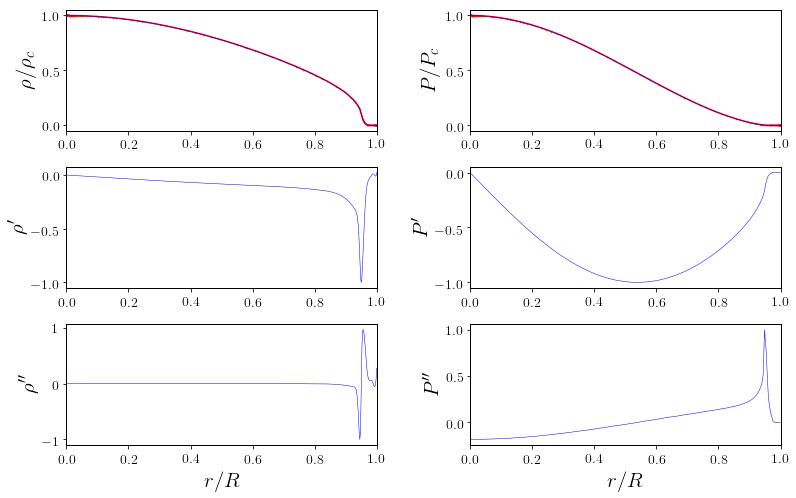

In [565]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bsk21_150[-1]/bsk21_150[-1][-1],bsk21_150[2]/bsk21_150[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk21_150[-1]/bsk21_150[-1][-1],bsk21_150rho(bsk21_150[-1])/bsk21_150[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bsk21_150[-1]/bsk21_150[-1][-1],bsk21_150[1]/bsk21_150[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk21_150[-1]/bsk21_150[-1][-1],bsk21_150p(bsk21_150[-1])/bsk21_150[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bsk21_150[-1]/bsk21_150[-1][-1],bsk21_150drho(bsk21_150[-1])/max(abs(bsk21_150drho(bsk21_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bsk21_150[-1]/bsk21_150[-1][-1],bsk21_150dp(bsk21_150[-1])/max(abs(bsk21_150dp(bsk21_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bsk21_150[-1]/bsk21_150[-1][-1],bsk21_150ddrho(bsk21_150[-1])/max(abs(bsk21_150ddrho(bsk21_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bsk21_150[-1]/bsk21_150[-1][-1],bsk21_150ddp(bsk21_150[-1])/max(abs(bsk21_150ddp(bsk21_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbsk21_150.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.5

In [566]:
bsk21_155=np.loadtxt('results2/bsk21/15.5.dat',unpack=True)
bsk21_155[3] = bsk21_155[3]-bsk21_155[3][-1] + 0.5*np.log(1-2*bsk21_155[0][-1]/bsk21_155[-1][-1])

In [567]:
s1=1e-5
s2=1e-9
bsk21_155rho=interpolate.UnivariateSpline(bsk21_155[-1], bsk21_155[2], k=5, s=s1)
bsk21_155drho=interpolate.UnivariateSpline(bsk21_155[-1], bsk21_155[2], k=5, s=s1).derivative(n=1)
bsk21_155ddrho=interpolate.UnivariateSpline(bsk21_155[-1], bsk21_155[2], k=5, s=s1).derivative(n=2)

bsk21_155p=interpolate.UnivariateSpline(bsk21_155[-1], bsk21_155[1], k=5, s=s2)
bsk21_155dp=interpolate.UnivariateSpline(bsk21_155[-1], bsk21_155[1], k=5, s=s2).derivative(n=1)
bsk21_155ddp=interpolate.UnivariateSpline(bsk21_155[-1], bsk21_155[1], k=5, s=s2).derivative(n=2)

ValueError: x must be strictly increasing

NameError: name 'bsk21_155rho' is not defined

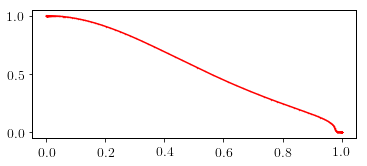

In [568]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(bsk21_155[-1]/bsk21_155[-1][-1],bsk21_155[2]/bsk21_155[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk21_155[-1]/bsk21_155[-1][-1],bsk21_155rho(bsk21_155[-1])/bsk21_155[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(bsk21_155[-1]/bsk21_155[-1][-1],bsk21_155[1]/bsk21_155[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(bsk21_155[-1]/bsk21_155[-1][-1],bsk21_155p(bsk21_155[-1])/bsk21_155[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(bsk21_155[-1]/bsk21_155[-1][-1],bsk21_155drho(bsk21_155[-1])/max(abs(bsk21_155drho(bsk21_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(bsk21_155[-1]/bsk21_155[-1][-1],bsk21_155dp(bsk21_155[-1])/max(abs(bsk21_155dp(bsk21_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(bsk21_155[-1]/bsk21_155[-1][-1],bsk21_155ddrho(bsk21_155[-1])/max(abs(bsk21_155ddrho(bsk21_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(bsk21_155[-1]/bsk21_155[-1][-1],bsk21_155ddp(bsk21_155[-1])/max(abs(bsk21_155ddp(bsk21_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsbsk21_155.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Redshift

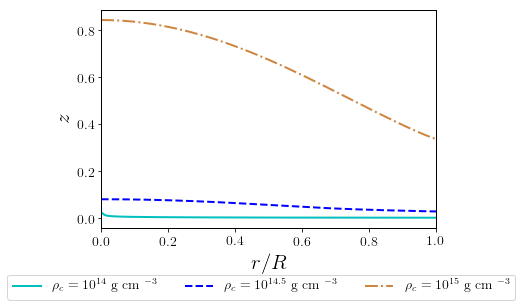

In [569]:
fig = plt.figure()

plt.plot(bsk21_140[-1]/bsk21_140[-1][-1],np.exp(-bsk21_140[3])-1.0,color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$')
plt.plot(bsk21_145[-1]/bsk21_145[-1][-1],np.exp(-bsk21_145[3])-1.0,color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$')
plt.plot(bsk21_150[-1]/bsk21_150[-1][-1],np.exp(-bsk21_150[3])-1.0,color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm $^{-3}$')

l = plt.legend(bbox_to_anchor=(1.1,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$z$')
plt.xlim(0,1.0)

plt.savefig('figures/Redshiftbsk21.pdf', format='pdf', dpi=1000,bbox_inches="tight")

# ENG ------------------------------------------------------------------------------------------

In [570]:
rhoeng,Peng,neng=np.loadtxt('EOS/eng.dat',usecols=(2,1,0),unpack=True)

## Dominant energy condition

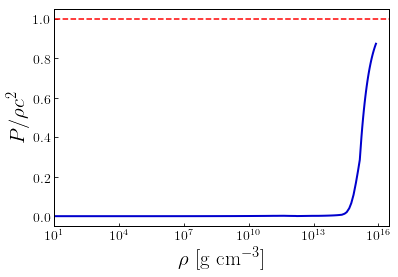

<Figure size 432x288 with 0 Axes>

In [571]:
fig, ax = plt.subplots()
plt.plot(rhoeng,np.divide(Peng,rhoeng),lw='2',color='mediumblue')
plt.plot([0,10**(17)],[1.0,1.0],'r--',lw='1.5')

ax.set_xscale("log")
#locmaj = matplotlib.ticker.LogLocator(base=10.0,numticks=16) 
#ax.xaxis.set_major_locator(locmaj)


plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ P / \rho c^2 $')
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=16)
#ax.xaxis.set_minor_locator(locmin)
#ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
#plt.ylim(0,1)
plt.savefig('figures/ECeng.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

## Speed of sound

In [609]:
vsquared=interpolate.UnivariateSpline(rhoeng, Peng, k=1, s=0).derivative(n=1)

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


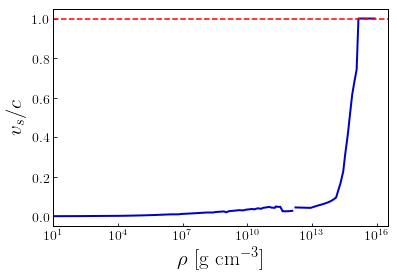

In [610]:
fig, ax = plt.subplots()
plt.plot(rhoeng,np.sqrt(vsquared(rhoeng)),lw='2.0',color='mediumblue')
plt.plot([1e+1,10**(16.5)],[1.0,1.0],'r--',lw='1.5')
plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ v_s / c $')
plt.xscale('log')
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#mpl.rcParams['axes.linewidth'] = 1.4
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
plt.savefig('figures/SSeng.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Adiabatic Index

In [574]:
Gamma=np.multiply(np.divide(np.add(rhoeng,Peng),Peng),vsquared(rhoeng))

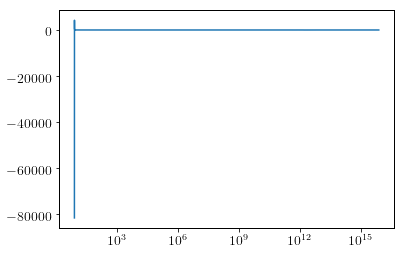

In [575]:
plt.plot(rhoeng,Gamma)
plt.xscale('log')

$$ \langle\gamma\rangle=\frac{\int_{0}^{R} e^{(\lambda+3 \nu) } \gamma(r) P(r) r^{2} d r}{\int_{0}^{R} e^{(\lambda+3 \nu) } P(r) r^{2} d r} $$

Listing all the models calculated

In [576]:
owd=os.getcwd()
path=os.chdir('results2/eng')
listOfEntries= os.scandir(path)
models_eng = []
for entry in listOfEntries:
    if '1' in entry.name:
        models_eng.append(entry.name)
os.chdir(owd)
models_eng.sort()

In [577]:
gamma_efs1 = []
gamma_efs2 = []
gamma_crs1 = []
gamma_crs2 = []
rhosc= []
for model in models_eng:
    m, P, rho, nu, lambd, r = np.loadtxt('results2/eng/' + model ,unpack=True)
    nu = nu - nu[-1] + 0.5*np.log(1-2*m[-1]/r[-1])
    #lambd = np.zeros_like(r)
    #for i in range((r.shape)[0]):
    #    if i==0:
    #        lambd[i] = 0
    #    else:
    #        lambd[i] = 0.5*np.log(1/(1-2*m[i]/r[i]))
    drho=interpolate.UnivariateSpline(r, rho, k=5, s=0).derivative(n=1)
    dP=interpolate.UnivariateSpline(r, P, k=5, s=0).derivative(n=1)
    gamma = np.divide(dP(r),drho(r))
    gamma_ef1 = integrate.trapz(np.exp(lambd+3*nu)*gamma*P*(r**2),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t1 = (1/36)*integrate.trapz(np.exp((lambd+3*nu))*(16*P+(np.exp(2*lambd)-1)*(P+rho))*(np.exp(2*lambd)-1)*(r**2))/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t2 = (4*np.pi/9)*integrate.trapz(np.exp(3*lambd+3*nu)*(8*P + (np.exp(2*lambd)+1)*(P+rho))*P*(r**4),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t3 = ((16*np.pi**2)/9)*integrate.trapz(np.exp(5*lambd+3*nu)*(P+rho)*(P**2)*(r**6),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    gamma_cr1 = 4/3 + t1 + t2 + t3
    gamma_efs1.append(gamma_ef1)
    gamma_crs1.append(gamma_cr1)
    gamma_ef2 = integrate.trapz(gamma*P*r**2,r)/integrate.trapz(P*r**2,r)
    gamma_cr2 = 4/3 + (19/42)*2*m[-1]/r[-1]
    gamma_efs2.append(gamma_ef2)
    gamma_crs2.append(gamma_cr2)
    rhosc.append(rho[0]*rhodim)

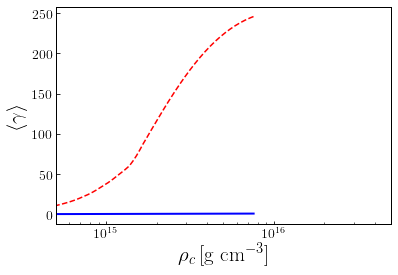

In [578]:
fig, ax = plt.subplots()
plt.plot(rhosc,gamma_crs1,lw='1.5',color='r',linestyle='--',label=r'$\gamma_{cr}$')
plt.plot(rhosc,gamma_efs1,lw='2.0',color='blue',label=r'$\langle \gamma \rangle$')

plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$\langle \gamma \rangle$')

plt.xscale('log')
plt.xlim(left=10**(14.7),right=10**(16.7))
#plt.ylim(0,10)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')
#l = plt.legend(bbox_to_anchor=(0.85,-0.15), loc="lower right", 
                #bbox_transform=fig.transFigure, ncol=2)



plt.savefig('figures/AdiabaticIndexeng.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

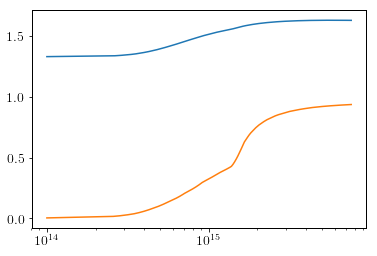

In [579]:
plt.plot(rhosc,gamma_crs2)
plt.plot(rhosc,gamma_efs2)
plt.xscale('log')

## M - $\rho_c$

In [580]:
Reng,Meng,rhoceng=np.loadtxt('results2/eng/MRrhoc.dat',usecols=(0,1,2),unpack=True)

In [581]:
np.amax(Meng)

2.24083227077

In [582]:
rhoceng[np.argmax(Meng)]

2570395782770000.0

In [583]:
np.log10(rhoceng[np.argmax(Meng)])

15.410000000000192

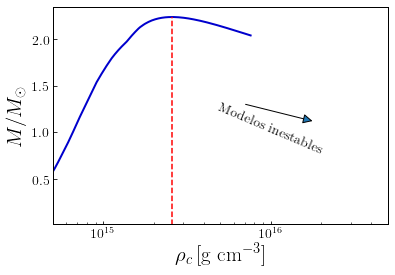

In [584]:
fig, ax = plt.subplots()

plt.plot(rhoceng,Meng,color='mediumblue',lw='2.0')
plt.plot([10**(np.log10(rhoceng[np.argmax(Meng)])),10**(np.log10(rhoceng[np.argmax(Meng)]))],[0.0,np.amax(Meng)],'r--',lw='1.5')

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)
plt.annotate("", xy=(10**(16.25),1.12), xytext=(10**(15.85),1.3), arrowprops=prop)
#plt.arrow(10**(15.6), 1.38,10**(15.7) ,-0.1 , head_width=0.05, head_length=10**(15))
plt.text(10**(15.67), 1.23, 'Modelos inestables' , fontsize=14,rotation=-23)

plt.xscale('log')
plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.xlim(left=10**(14.7),right=10**(16.7))
plt.ylim(bottom=0.01)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')

plt.savefig('figures/Mrhorel_eng.pdf', format='pdf', dpi=1000,bbox_inches="tight")

## Tunning the interpolation of the solution

### 14.0

In [585]:
eng_140=np.loadtxt('results2/eng/14.0.dat',unpack=True)
eng_140[3] = eng_140[3]-eng_140[3][-1] + 0.5*np.log(1-2*eng_140[0][-1]/eng_140[-1][-1])

In [586]:
s1=5e-7
s2=1e-15
eng_140rho=interpolate.UnivariateSpline(eng_140[-1], eng_140[2], k=5, s=s1)
eng_140drho=interpolate.UnivariateSpline(eng_140[-1], eng_140[2], k=5, s=s1).derivative(n=1)
eng_140ddrho=interpolate.UnivariateSpline(eng_140[-1], eng_140[2], k=5, s=s1).derivative(n=2)

eng_140p=interpolate.UnivariateSpline(eng_140[-1], eng_140[1], k=5, s=s2)
eng_140dp=interpolate.UnivariateSpline(eng_140[-1], eng_140[1], k=5, s=s2).derivative(n=1)
eng_140ddp=interpolate.UnivariateSpline(eng_140[-1], eng_140[1], k=5, s=s2).derivative(n=2)

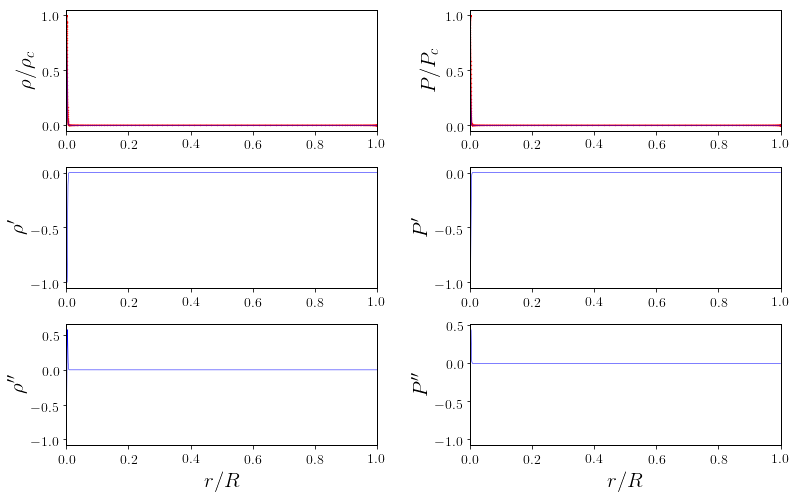

In [587]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(eng_140[-1]/eng_140[-1][-1],eng_140[2]/eng_140[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(eng_140[-1]/eng_140[-1][-1],eng_140rho(eng_140[-1])/eng_140[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(eng_140[-1]/eng_140[-1][-1],eng_140[1]/eng_140[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(eng_140[-1]/eng_140[-1][-1],eng_140p(eng_140[-1])/eng_140[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(eng_140[-1]/eng_140[-1][-1],eng_140drho(eng_140[-1])/max(abs(eng_140drho(eng_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(eng_140[-1]/eng_140[-1][-1],eng_140dp(eng_140[-1])/max(abs(eng_140dp(eng_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(eng_140[-1]/eng_140[-1][-1],eng_140ddrho(eng_140[-1])/max(abs(eng_140ddrho(eng_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(eng_140[-1]/eng_140[-1][-1],eng_140ddp(eng_140[-1])/max(abs(eng_140ddp(eng_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddseng_140.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 14.5

In [588]:
eng_145=np.loadtxt('results2/eng/14.5.dat',unpack=True)
eng_145[3] = eng_145[3]-eng_145[3][-1] + 0.5*np.log(1-2*eng_145[0][-1]/eng_145[-1][-1])

In [589]:
s1=1e-7
s2=1e-12
eng_145rho=interpolate.UnivariateSpline(eng_145[-1], eng_145[2], k=5, s=s1)
eng_145drho=interpolate.UnivariateSpline(eng_145[-1], eng_145[2], k=5, s=s1).derivative(n=1)
eng_145ddrho=interpolate.UnivariateSpline(eng_145[-1], eng_145[2], k=5, s=s1).derivative(n=2)

eng_145p=interpolate.UnivariateSpline(eng_145[-1], eng_145[1], k=5, s=s2)
eng_145dp=interpolate.UnivariateSpline(eng_145[-1], eng_145[1], k=5, s=s2).derivative(n=1)
eng_145ddp=interpolate.UnivariateSpline(eng_145[-1], eng_145[1], k=5, s=s2).derivative(n=2)

In [590]:
eng_145rho(0.4*eng_145[-1][-1])*rhodim

143882623379139.38

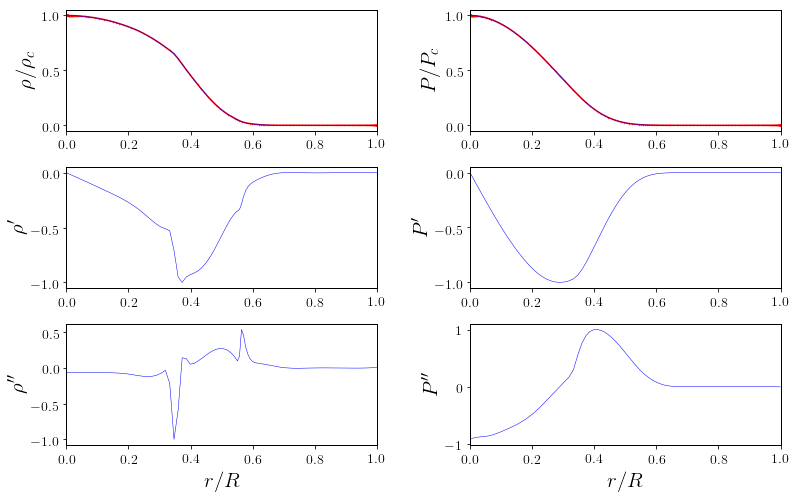

In [591]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(eng_145[-1]/eng_145[-1][-1],eng_145[2]/eng_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(eng_145[-1]/eng_145[-1][-1],eng_145rho(eng_145[-1])/eng_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(eng_145[-1]/eng_145[-1][-1],eng_145[1]/eng_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(eng_145[-1]/eng_145[-1][-1],eng_145p(eng_145[-1])/eng_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(eng_145[-1]/eng_145[-1][-1],eng_145drho(eng_145[-1])/max(abs(eng_145drho(eng_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(eng_145[-1]/eng_145[-1][-1],eng_145dp(eng_145[-1])/max(abs(eng_145dp(eng_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(eng_145[-1]/eng_145[-1][-1],eng_145ddrho(eng_145[-1])/max(abs(eng_145ddrho(eng_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(eng_145[-1]/eng_145[-1][-1],eng_145ddp(eng_145[-1])/max(abs(eng_145ddp(eng_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddseng_145.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.0

In [592]:
eng_150=np.loadtxt('results2/eng/15.0.dat',unpack=True)
eng_150[3] = eng_150[3]-eng_150[3][-1] + 0.5*np.log(1-2*eng_150[0][-1]/eng_150[-1][-1])

In [593]:
s1=8e-6
s2=1e-15
eng_150rho=interpolate.UnivariateSpline(eng_150[-1], eng_150[2], k=5, s=s1)
eng_150drho=interpolate.UnivariateSpline(eng_150[-1], eng_150[2], k=5, s=s1).derivative(n=1)
eng_150ddrho=interpolate.UnivariateSpline(eng_150[-1], eng_150[2], k=5, s=s1).derivative(n=2)

eng_150p=interpolate.UnivariateSpline(eng_150[-1], eng_150[1], k=5, s=s2)
eng_150dp=interpolate.UnivariateSpline(eng_150[-1], eng_150[1], k=5, s=s2).derivative(n=1)
eng_150ddp=interpolate.UnivariateSpline(eng_150[-1], eng_150[1], k=5, s=s2).derivative(n=2)

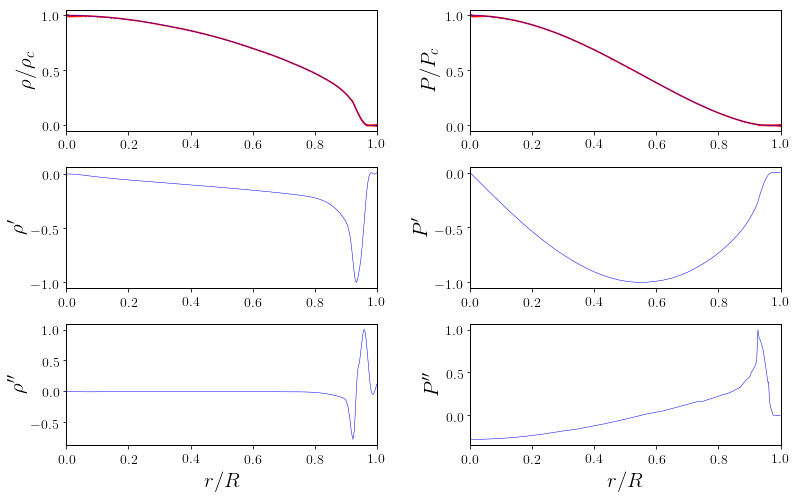

In [594]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(eng_150[-1]/eng_150[-1][-1],eng_150[2]/eng_150[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(eng_150[-1]/eng_150[-1][-1],eng_150rho(eng_150[-1])/eng_150[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(eng_150[-1]/eng_150[-1][-1],eng_150[1]/eng_150[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(eng_150[-1]/eng_150[-1][-1],eng_150p(eng_150[-1])/eng_150[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(eng_150[-1]/eng_150[-1][-1],eng_150drho(eng_150[-1])/max(abs(eng_150drho(eng_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(eng_150[-1]/eng_150[-1][-1],eng_150dp(eng_150[-1])/max(abs(eng_150dp(eng_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(eng_150[-1]/eng_150[-1][-1],eng_150ddrho(eng_150[-1])/max(abs(eng_150ddrho(eng_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(eng_150[-1]/eng_150[-1][-1],eng_150ddp(eng_150[-1])/max(abs(eng_150ddp(eng_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddseng_150.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.5

In [595]:
eng_155=np.loadtxt('results2/eng/15.5.dat',unpack=True)
eng_155[3] = eng_155[3]-eng_155[3][-1] + 0.5*np.log(1-2*eng_155[0][-1]/eng_155[-1][-1])

In [596]:
s1=1e-5
s2=1e-9
eng_155rho=interpolate.UnivariateSpline(eng_155[-1], eng_155[2], k=5, s=s1)
eng_155drho=interpolate.UnivariateSpline(eng_155[-1], eng_155[2], k=5, s=s1).derivative(n=1)
eng_155ddrho=interpolate.UnivariateSpline(eng_155[-1], eng_155[2], k=5, s=s1).derivative(n=2)

eng_155p=interpolate.UnivariateSpline(eng_155[-1], eng_155[1], k=5, s=s2)
eng_155dp=interpolate.UnivariateSpline(eng_155[-1], eng_155[1], k=5, s=s2).derivative(n=1)
eng_155ddp=interpolate.UnivariateSpline(eng_155[-1], eng_155[1], k=5, s=s2).derivative(n=2)

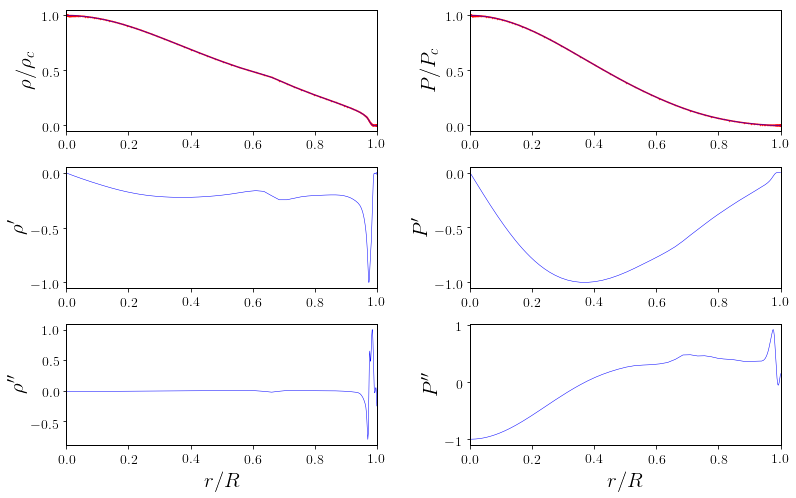

In [597]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(eng_155[-1]/eng_155[-1][-1],eng_155[2]/eng_155[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(eng_155[-1]/eng_155[-1][-1],eng_155rho(eng_155[-1])/eng_155[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(eng_155[-1]/eng_155[-1][-1],eng_155[1]/eng_155[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(eng_155[-1]/eng_155[-1][-1],eng_155p(eng_155[-1])/eng_155[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(eng_155[-1]/eng_155[-1][-1],eng_155drho(eng_155[-1])/max(abs(eng_155drho(eng_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(eng_155[-1]/eng_155[-1][-1],eng_155dp(eng_155[-1])/max(abs(eng_155dp(eng_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(eng_155[-1]/eng_155[-1][-1],eng_155ddrho(eng_155[-1])/max(abs(eng_155ddrho(eng_155[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(eng_155[-1]/eng_155[-1][-1],eng_155ddp(eng_155[-1])/max(abs(eng_155ddp(eng_155[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddseng_155.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Redshift

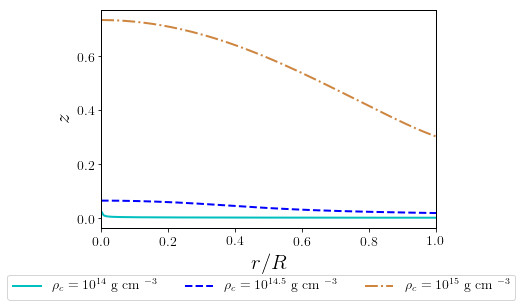

In [598]:
fig = plt.figure()

plt.plot(eng_140[-1]/eng_140[-1][-1],np.exp(-eng_140[3])-1.0,color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$')
plt.plot(eng_145[-1]/eng_145[-1][-1],np.exp(-eng_145[3])-1.0,color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$')
plt.plot(eng_150[-1]/eng_150[-1][-1],np.exp(-eng_150[3])-1.0,color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm $^{-3}$')

l = plt.legend(bbox_to_anchor=(1.1,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$z$')
plt.xlim(0,1.0)

plt.savefig('figures/Redshifteng.pdf', format='pdf', dpi=1000,bbox_inches="tight")

# FPS ---------------------------------------------------------------------------------------------

# GNH3 -------------------------------------------------------------------------------------------

In [611]:
rhognh3,Pgnh3,ngnh3=np.loadtxt('EOS/gnh3.dat',usecols=(2,1,0),unpack=True)

## Dominant energy condition

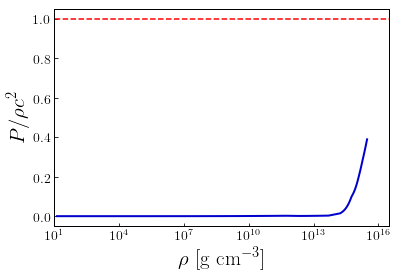

<Figure size 432x288 with 0 Axes>

In [612]:
fig, ax = plt.subplots()
plt.plot(rhognh3,np.divide(Pgnh3,rhognh3),lw='2',color='mediumblue')
plt.plot([0,10**(17)],[1.0,1.0],'r--',lw='1.5')

ax.set_xscale("log")
#locmaj = matplotlib.ticker.LogLocator(base=10.0,numticks=16) 
#ax.xaxis.set_major_locator(locmaj)


plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ P / \rho c^2 $')
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=16)
#ax.xaxis.set_minor_locator(locmin)
#ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
#plt.ylim(0,1)
plt.savefig('figures/ECgnh3.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

## Speed of sound

In [613]:
vsquared=interpolate.UnivariateSpline(rhognh3, Pgnh3, k=1, s=0).derivative(n=1)

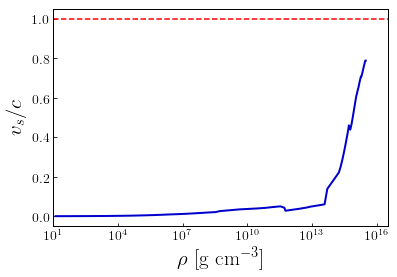

In [614]:
fig, ax = plt.subplots()
plt.plot(rhognh3,np.sqrt(vsquared(rhognh3)),lw='2.0',color='mediumblue')
plt.plot([1e+1,10**(16.5)],[1.0,1.0],'r--',lw='1.5')
plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ v_s / c $')
plt.xscale('log')
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#mpl.rcParams['axes.linewidth'] = 1.4
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
plt.savefig('figures/SSgnh3.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Adiabatic Index

In [615]:
Gamma=np.multiply(np.divide(np.add(rhognh3,Pgnh3),Pgnh3),vsquared(rhognh3))

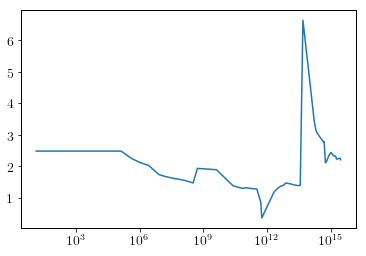

In [616]:
plt.plot(rhognh3,Gamma)
plt.xscale('log')

$$ \langle\gamma\rangle=\frac{\int_{0}^{R} e^{(\lambda+3 \nu) } \gamma(r) P(r) r^{2} d r}{\int_{0}^{R} e^{(\lambda+3 \nu) } P(r) r^{2} d r} $$

Listing all the models calculated

In [617]:
owd=os.getcwd()
path=os.chdir('results2/gnh3')
listOfEntries= os.scandir(path)
models_gnh3 = []
for entry in listOfEntries:
    if '1' in entry.name:
        models_gnh3.append(entry.name)
os.chdir(owd)
models_gnh3.sort()

In [618]:
gamma_efs1 = []
gamma_efs2 = []
gamma_crs1 = []
gamma_crs2 = []
rhosc= []
for model in models_gnh3:
    m, P, rho, nu, lambd, r = np.loadtxt('results2/gnh3/' + model ,unpack=True)
    nu = nu - nu[-1] + 0.5*np.log(1-2*m[-1]/r[-1])
    #lambd = np.zeros_like(r)
    #for i in range((r.shape)[0]):
    #    if i==0:
    #        lambd[i] = 0
    #    else:
    #        lambd[i] = 0.5*np.log(1/(1-2*m[i]/r[i]))
    drho=interpolate.UnivariateSpline(r, rho, k=5, s=0).derivative(n=1)
    dP=interpolate.UnivariateSpline(r, P, k=5, s=0).derivative(n=1)
    gamma = np.divide(dP(r),drho(r))
    gamma_ef1 = integrate.trapz(np.exp(lambd+3*nu)*gamma*P*(r**2),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t1 = (1/36)*integrate.trapz(np.exp((lambd+3*nu))*(16*P+(np.exp(2*lambd)-1)*(P+rho))*(np.exp(2*lambd)-1)*(r**2))/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t2 = (4*np.pi/9)*integrate.trapz(np.exp(3*lambd+3*nu)*(8*P + (np.exp(2*lambd)+1)*(P+rho))*P*(r**4),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t3 = ((16*np.pi**2)/9)*integrate.trapz(np.exp(5*lambd+3*nu)*(P+rho)*(P**2)*(r**6),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    gamma_cr1 = 4/3 + t1 + t2 + t3
    gamma_efs1.append(gamma_ef1)
    gamma_crs1.append(gamma_cr1)
    gamma_ef2 = integrate.trapz(gamma*P*r**2,r)/integrate.trapz(P*r**2,r)
    gamma_cr2 = 4/3 + (19/42)*2*m[-1]/r[-1]
    gamma_efs2.append(gamma_ef2)
    gamma_crs2.append(gamma_cr2)
    rhosc.append(rho[0]*rhodim)

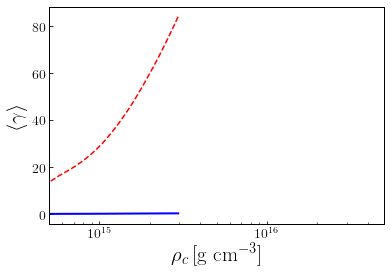

In [619]:
fig, ax = plt.subplots()
plt.plot(rhosc,gamma_crs1,lw='1.5',color='r',linestyle='--',label=r'$\gamma_{cr}$')
plt.plot(rhosc,gamma_efs1,lw='2.0',color='blue',label=r'$\langle \gamma \rangle$')

plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$\langle \gamma \rangle$')

plt.xscale('log')
plt.xlim(left=10**(14.7),right=10**(16.7))
#plt.ylim(0,10)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')
#l = plt.legend(bbox_to_anchor=(0.85,-0.15), loc="lower right", 
                #bbox_transform=fig.transFigure, ncol=2)



plt.savefig('figures/AdiabaticIndexgnh3.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

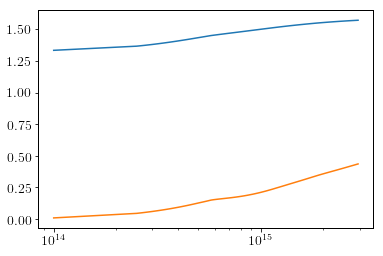

In [620]:
plt.plot(rhosc,gamma_crs2)
plt.plot(rhosc,gamma_efs2)
plt.xscale('log')

## M - $\rho_c$

In [621]:
Rgnh3,Mgnh3,rhocgnh3=np.loadtxt('results2/gnh3/MRrhoc.dat',usecols=(0,1,2),unpack=True)

In [622]:
np.amax(Mgnh3)

1.96488466718

In [623]:
rhocgnh3[np.argmax(Mgnh3)]

2398832919020000.0

In [624]:
np.log10(rhocgnh3[np.argmax(Mgnh3)])

15.380000000000091

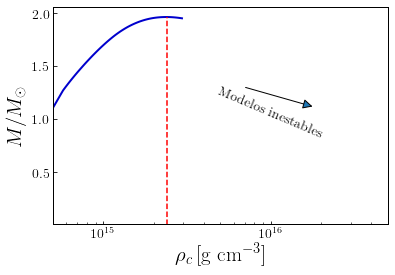

In [626]:
fig, ax = plt.subplots()

plt.plot(rhocgnh3,Mgnh3,color='mediumblue',lw='2.0')
plt.plot([10**(np.log10(rhocgnh3[np.argmax(Mgnh3)])),10**(np.log10(rhocgnh3[np.argmax(Mgnh3)]))],[0.0,np.amax(Mgnh3)],'r--',lw='1.5')

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)
plt.annotate("", xy=(10**(16.25),1.12), xytext=(10**(15.85),1.3), arrowprops=prop)
#plt.arrow(10**(15.6), 1.38,10**(15.7) ,-0.1 , head_width=0.05, head_lgnh3th=10**(15))
plt.text(10**(15.67), 1.23, 'Modelos inestables' , fontsize=14,rotation=-23)

plt.xscale('log')
plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.xlim(left=10**(14.7),right=10**(16.7))
plt.ylim(bottom=0.01)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')

plt.savefig('figures/Mrhorel_gnh3.pdf', format='pdf', dpi=1000,bbox_inches="tight")

## Tunning the interpolation of the solution

### 14.0

In [627]:
gnh3_140=np.loadtxt('results2/gnh3/14.0.dat',unpack=True)
gnh3_140[3] = gnh3_140[3]-gnh3_140[3][-1] + 0.5*np.log(1-2*gnh3_140[0][-1]/gnh3_140[-1][-1])

In [628]:
s1=5e-7
s2=1e-15
gnh3_140rho=interpolate.UnivariateSpline(gnh3_140[-1], gnh3_140[2], k=5, s=s1)
gnh3_140drho=interpolate.UnivariateSpline(gnh3_140[-1], gnh3_140[2], k=5, s=s1).derivative(n=1)
gnh3_140ddrho=interpolate.UnivariateSpline(gnh3_140[-1], gnh3_140[2], k=5, s=s1).derivative(n=2)

gnh3_140p=interpolate.UnivariateSpline(gnh3_140[-1], gnh3_140[1], k=5, s=s2)
gnh3_140dp=interpolate.UnivariateSpline(gnh3_140[-1], gnh3_140[1], k=5, s=s2).derivative(n=1)
gnh3_140ddp=interpolate.UnivariateSpline(gnh3_140[-1], gnh3_140[1], k=5, s=s2).derivative(n=2)

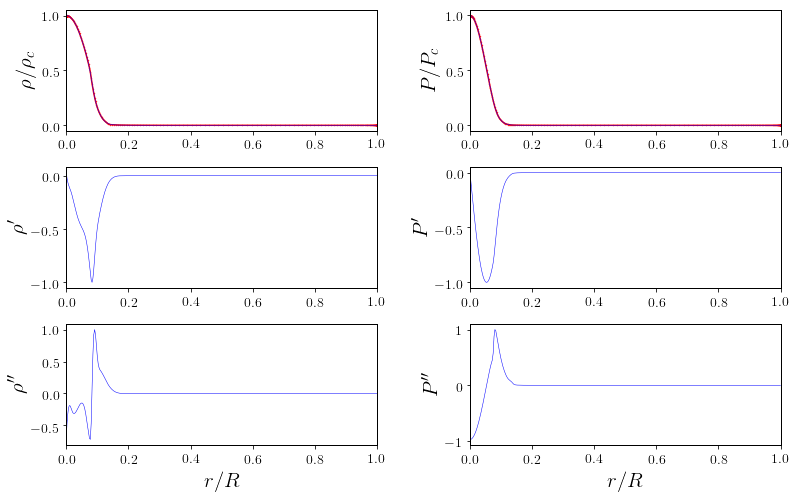

In [629]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(gnh3_140[-1]/gnh3_140[-1][-1],gnh3_140[2]/gnh3_140[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(gnh3_140[-1]/gnh3_140[-1][-1],gnh3_140rho(gnh3_140[-1])/gnh3_140[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(gnh3_140[-1]/gnh3_140[-1][-1],gnh3_140[1]/gnh3_140[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(gnh3_140[-1]/gnh3_140[-1][-1],gnh3_140p(gnh3_140[-1])/gnh3_140[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(gnh3_140[-1]/gnh3_140[-1][-1],gnh3_140drho(gnh3_140[-1])/max(abs(gnh3_140drho(gnh3_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(gnh3_140[-1]/gnh3_140[-1][-1],gnh3_140dp(gnh3_140[-1])/max(abs(gnh3_140dp(gnh3_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(gnh3_140[-1]/gnh3_140[-1][-1],gnh3_140ddrho(gnh3_140[-1])/max(abs(gnh3_140ddrho(gnh3_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(gnh3_140[-1]/gnh3_140[-1][-1],gnh3_140ddp(gnh3_140[-1])/max(abs(gnh3_140ddp(gnh3_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsgnh3_140.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 14.5

In [630]:
gnh3_145=np.loadtxt('results2/gnh3/14.5.dat',unpack=True)
gnh3_145[3] = gnh3_145[3]-gnh3_145[3][-1] + 0.5*np.log(1-2*gnh3_145[0][-1]/gnh3_145[-1][-1])

In [631]:
s1=1e-7
s2=1e-12
gnh3_145rho=interpolate.UnivariateSpline(gnh3_145[-1], gnh3_145[2], k=5, s=s1)
gnh3_145drho=interpolate.UnivariateSpline(gnh3_145[-1], gnh3_145[2], k=5, s=s1).derivative(n=1)
gnh3_145ddrho=interpolate.UnivariateSpline(gnh3_145[-1], gnh3_145[2], k=5, s=s1).derivative(n=2)

gnh3_145p=interpolate.UnivariateSpline(gnh3_145[-1], gnh3_145[1], k=5, s=s2)
gnh3_145dp=interpolate.UnivariateSpline(gnh3_145[-1], gnh3_145[1], k=5, s=s2).derivative(n=1)
gnh3_145ddp=interpolate.UnivariateSpline(gnh3_145[-1], gnh3_145[1], k=5, s=s2).derivative(n=2)

In [632]:
gnh3_145rho(0.4*gnh3_145[-1][-1])*rhodim

252986438410618.1

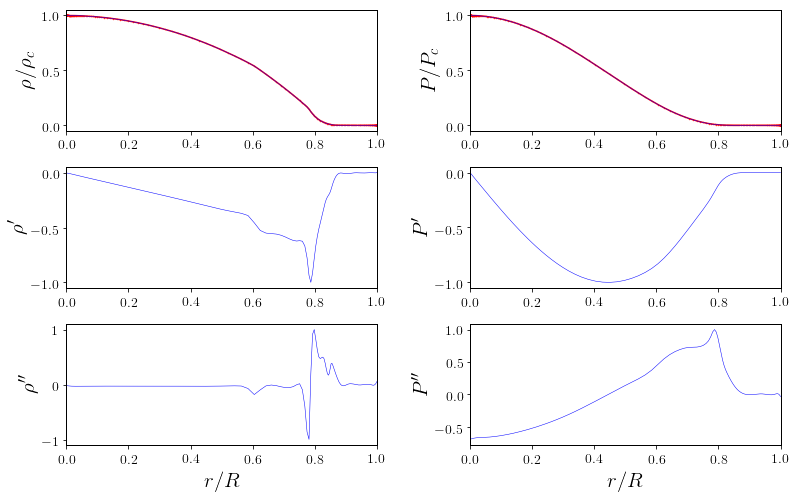

In [633]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(gnh3_145[-1]/gnh3_145[-1][-1],gnh3_145[2]/gnh3_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(gnh3_145[-1]/gnh3_145[-1][-1],gnh3_145rho(gnh3_145[-1])/gnh3_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(gnh3_145[-1]/gnh3_145[-1][-1],gnh3_145[1]/gnh3_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(gnh3_145[-1]/gnh3_145[-1][-1],gnh3_145p(gnh3_145[-1])/gnh3_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(gnh3_145[-1]/gnh3_145[-1][-1],gnh3_145drho(gnh3_145[-1])/max(abs(gnh3_145drho(gnh3_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(gnh3_145[-1]/gnh3_145[-1][-1],gnh3_145dp(gnh3_145[-1])/max(abs(gnh3_145dp(gnh3_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(gnh3_145[-1]/gnh3_145[-1][-1],gnh3_145ddrho(gnh3_145[-1])/max(abs(gnh3_145ddrho(gnh3_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(gnh3_145[-1]/gnh3_145[-1][-1],gnh3_145ddp(gnh3_145[-1])/max(abs(gnh3_145ddp(gnh3_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsgnh3_145.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.0

In [634]:
gnh3_150=np.loadtxt('results2/gnh3/15.0.dat',unpack=True)
gnh3_150[3] = gnh3_150[3]-gnh3_150[3][-1] + 0.5*np.log(1-2*gnh3_150[0][-1]/gnh3_150[-1][-1])

In [635]:
s1=8e-6
s2=1e-15
gnh3_150rho=interpolate.UnivariateSpline(gnh3_150[-1], gnh3_150[2], k=5, s=s1)
gnh3_150drho=interpolate.UnivariateSpline(gnh3_150[-1], gnh3_150[2], k=5, s=s1).derivative(n=1)
gnh3_150ddrho=interpolate.UnivariateSpline(gnh3_150[-1], gnh3_150[2], k=5, s=s1).derivative(n=2)

gnh3_150p=interpolate.UnivariateSpline(gnh3_150[-1], gnh3_150[1], k=5, s=s2)
gnh3_150dp=interpolate.UnivariateSpline(gnh3_150[-1], gnh3_150[1], k=5, s=s2).derivative(n=1)
gnh3_150ddp=interpolate.UnivariateSpline(gnh3_150[-1], gnh3_150[1], k=5, s=s2).derivative(n=2)

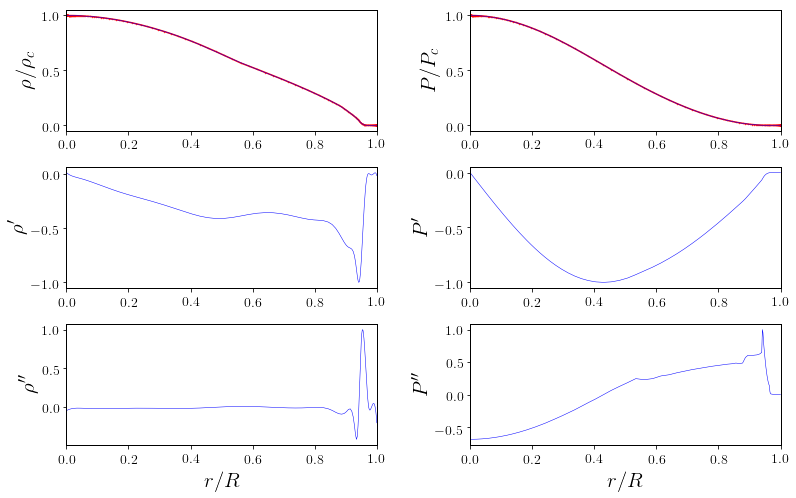

In [636]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(gnh3_150[-1]/gnh3_150[-1][-1],gnh3_150[2]/gnh3_150[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(gnh3_150[-1]/gnh3_150[-1][-1],gnh3_150rho(gnh3_150[-1])/gnh3_150[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(gnh3_150[-1]/gnh3_150[-1][-1],gnh3_150[1]/gnh3_150[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(gnh3_150[-1]/gnh3_150[-1][-1],gnh3_150p(gnh3_150[-1])/gnh3_150[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(gnh3_150[-1]/gnh3_150[-1][-1],gnh3_150drho(gnh3_150[-1])/max(abs(gnh3_150drho(gnh3_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(gnh3_150[-1]/gnh3_150[-1][-1],gnh3_150dp(gnh3_150[-1])/max(abs(gnh3_150dp(gnh3_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(gnh3_150[-1]/gnh3_150[-1][-1],gnh3_150ddrho(gnh3_150[-1])/max(abs(gnh3_150ddrho(gnh3_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(gnh3_150[-1]/gnh3_150[-1][-1],gnh3_150ddp(gnh3_150[-1])/max(abs(gnh3_150ddp(gnh3_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsgnh3_150.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Redshift

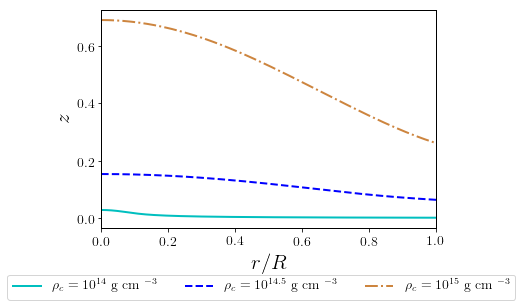

In [639]:
fig = plt.figure()

plt.plot(gnh3_140[-1]/gnh3_140[-1][-1],np.exp(-gnh3_140[3])-1.0,color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$')
plt.plot(gnh3_145[-1]/gnh3_145[-1][-1],np.exp(-gnh3_145[3])-1.0,color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$')
plt.plot(gnh3_150[-1]/gnh3_150[-1][-1],np.exp(-gnh3_150[3])-1.0,color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm $^{-3}$')

l = plt.legend(bbox_to_anchor=(1.1,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$z$')
plt.xlim(0,1.0)

plt.savefig('figures/Redshiftgnh3.pdf', format='pdf', dpi=1000,bbox_inches="tight")

# MPA1 --------------------------------------------------------------------------------------------

In [640]:
rhompa1,Pmpa1,nmpa1=np.loadtxt('EOS/mpa1.dat',usecols=(2,1,0),unpack=True)

## Dominant energy condition

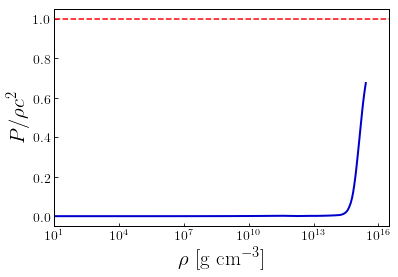

<Figure size 432x288 with 0 Axes>

In [641]:
fig, ax = plt.subplots()
plt.plot(rhompa1,np.divide(Pmpa1,rhompa1),lw='2',color='mediumblue')
plt.plot([0,10**(17)],[1.0,1.0],'r--',lw='1.5')

ax.set_xscale("log")
#locmaj = matplotlib.ticker.LogLocator(base=10.0,numticks=16) 
#ax.xaxis.set_major_locator(locmaj)


plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ P / \rho c^2 $')
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=16)
#ax.xaxis.set_minor_locator(locmin)
#ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
#plt.ylim(0,1)
plt.savefig('figures/ECmpa1.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

## Speed of sound

In [642]:
vsquared=interpolate.UnivariateSpline(rhompa1, Pmpa1, k=1, s=0).derivative(n=1)

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


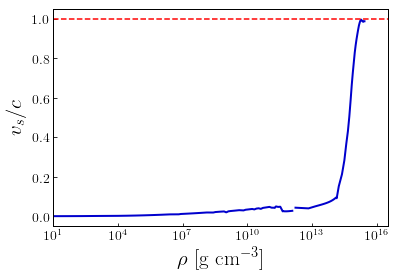

In [643]:
fig, ax = plt.subplots()
plt.plot(rhompa1,np.sqrt(vsquared(rhompa1)),lw='2.0',color='mediumblue')
plt.plot([1e+1,10**(16.5)],[1.0,1.0],'r--',lw='1.5')
plt.xlabel(r'$\rho$ [g\,\,cm$^{-3}$]')
plt.ylabel(r'$ v_s / c $')
plt.xscale('log')
ax.tick_params(axis="x", direction="in")
ax.tick_params(axis="y", direction="in")
plt.xlim(10,10**(16.5))
#ax.set_facecolor('floralwhite')
#mpl.rcParams['axes.linewidth'] = 1.4
#plt.gca().set_aspect('equal', adjustable='box')
#plt.draw()
plt.savefig('figures/SSmpa1.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Adiabatic Index

In [644]:
Gamma=np.multiply(np.divide(np.add(rhompa1,Pmpa1),Pmpa1),vsquared(rhompa1))

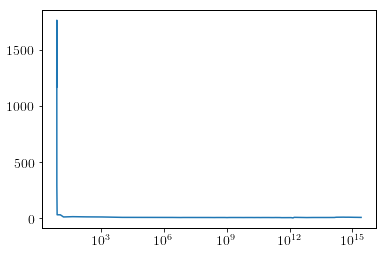

In [645]:
plt.plot(rhompa1,Gamma)
plt.xscale('log')

$$ \langle\gamma\rangle=\frac{\int_{0}^{R} e^{(\lambda+3 \nu) } \gamma(r) P(r) r^{2} d r}{\int_{0}^{R} e^{(\lambda+3 \nu) } P(r) r^{2} d r} $$

Listing all the models calculated

In [646]:
owd=os.getcwd()
path=os.chdir('results2/mpa1')
listOfEntries= os.scandir(path)
models_mpa1 = []
for entry in listOfEntries:
    if '1' in entry.name:
        models_mpa1.append(entry.name)
os.chdir(owd)
models_mpa1.sort()

In [647]:
gamma_efs1 = []
gamma_efs2 = []
gamma_crs1 = []
gamma_crs2 = []
rhosc= []
for model in models_mpa1:
    m, P, rho, nu, lambd, r = np.loadtxt('results2/mpa1/' + model ,unpack=True)
    nu = nu - nu[-1] + 0.5*np.log(1-2*m[-1]/r[-1])
    #lambd = np.zeros_like(r)
    #for i in range((r.shape)[0]):
    #    if i==0:
    #        lambd[i] = 0
    #    else:
    #        lambd[i] = 0.5*np.log(1/(1-2*m[i]/r[i]))
    drho=interpolate.UnivariateSpline(r, rho, k=5, s=0).derivative(n=1)
    dP=interpolate.UnivariateSpline(r, P, k=5, s=0).derivative(n=1)
    gamma = np.divide(dP(r),drho(r))
    gamma_ef1 = integrate.trapz(np.exp(lambd+3*nu)*gamma*P*(r**2),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t1 = (1/36)*integrate.trapz(np.exp((lambd+3*nu))*(16*P+(np.exp(2*lambd)-1)*(P+rho))*(np.exp(2*lambd)-1)*(r**2))/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t2 = (4*np.pi/9)*integrate.trapz(np.exp(3*lambd+3*nu)*(8*P + (np.exp(2*lambd)+1)*(P+rho))*P*(r**4),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    t3 = ((16*np.pi**2)/9)*integrate.trapz(np.exp(5*lambd+3*nu)*(P+rho)*(P**2)*(r**6),r)/integrate.trapz(np.exp(lambd+3*nu)*P*(r**2),r)
    gamma_cr1 = 4/3 + t1 + t2 + t3
    gamma_efs1.append(gamma_ef1)
    gamma_crs1.append(gamma_cr1)
    gamma_ef2 = integrate.trapz(gamma*P*r**2,r)/integrate.trapz(P*r**2,r)
    gamma_cr2 = 4/3 + (19/42)*2*m[-1]/r[-1]
    gamma_efs2.append(gamma_ef2)
    gamma_crs2.append(gamma_cr2)
    rhosc.append(rho[0]*rhodim)

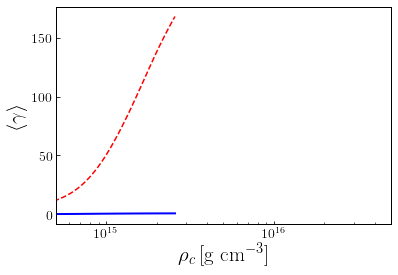

In [648]:
fig, ax = plt.subplots()
plt.plot(rhosc,gamma_crs1,lw='1.5',color='r',linestyle='--',label=r'$\gamma_{cr}$')
plt.plot(rhosc,gamma_efs1,lw='2.0',color='blue',label=r'$\langle \gamma \rangle$')

plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$\langle \gamma \rangle$')

plt.xscale('log')
plt.xlim(left=10**(14.7),right=10**(16.7))
#plt.ylim(0,10)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')
#l = plt.legend(bbox_to_anchor=(0.85,-0.15), loc="lower right", 
                #bbox_transform=fig.transFigure, ncol=2)



plt.savefig('figures/AdiabaticIndexmpa1.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

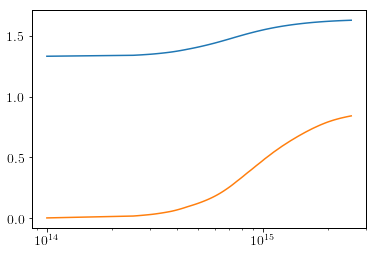

In [649]:
plt.plot(rhosc,gamma_crs2)
plt.plot(rhosc,gamma_efs2)
plt.xscale('log')

## M - $\rho_c$

In [650]:
Rmpa1,Mmpa1,rhocmpa1=np.loadtxt('results2/mpa1/MRrhoc.dat',usecols=(0,1,2),unpack=True)

In [651]:
np.amax(Mmpa1)

2.46246780647

In [652]:
rhocmpa1[np.argmax(Mmpa1)]

2089296130850000.0

In [653]:
np.log10(rhocmpa1[np.argmax(Mmpa1)])

15.31999999999916

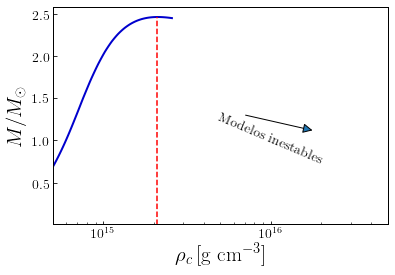

In [654]:
fig, ax = plt.subplots()

plt.plot(rhocmpa1,Mmpa1,color='mediumblue',lw='2.0')
plt.plot([10**(np.log10(rhocmpa1[np.argmax(Mmpa1)])),10**(np.log10(rhocmpa1[np.argmax(Mmpa1)]))],[0.0,np.amax(Mmpa1)],'r--',lw='1.5')

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)
plt.annotate("", xy=(10**(16.25),1.12), xytext=(10**(15.85),1.3), arrowprops=prop)
#plt.arrow(10**(15.6), 1.38,10**(15.7) ,-0.1 , head_width=0.05, head_lmpa1th=10**(15))
plt.text(10**(15.67), 1.23, 'Modelos inestables' , fontsize=14,rotation=-23)

plt.xscale('log')
plt.xlabel(r'$\rho_c\,[$g cm$^{-3}]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.xlim(left=10**(14.7),right=10**(16.7))
plt.ylim(bottom=0.01)
ax.tick_params(axis="x", direction="in",which='both')
ax.tick_params(axis="y", direction="in",which='both')

plt.savefig('figures/Mrhorel_mpa1.pdf', format='pdf', dpi=1000,bbox_inches="tight")

## Tunning the interpolation of the solution

### 14.0

In [655]:
mpa1_140=np.loadtxt('results2/mpa1/14.0.dat',unpack=True)
mpa1_140[3] = mpa1_140[3]-mpa1_140[3][-1] + 0.5*np.log(1-2*mpa1_140[0][-1]/mpa1_140[-1][-1])

In [656]:
s1=5e-7
s2=1e-15
mpa1_140rho=interpolate.UnivariateSpline(mpa1_140[-1], mpa1_140[2], k=5, s=s1)
mpa1_140drho=interpolate.UnivariateSpline(mpa1_140[-1], mpa1_140[2], k=5, s=s1).derivative(n=1)
mpa1_140ddrho=interpolate.UnivariateSpline(mpa1_140[-1], mpa1_140[2], k=5, s=s1).derivative(n=2)

mpa1_140p=interpolate.UnivariateSpline(mpa1_140[-1], mpa1_140[1], k=5, s=s2)
mpa1_140dp=interpolate.UnivariateSpline(mpa1_140[-1], mpa1_140[1], k=5, s=s2).derivative(n=1)
mpa1_140ddp=interpolate.UnivariateSpline(mpa1_140[-1], mpa1_140[1], k=5, s=s2).derivative(n=2)

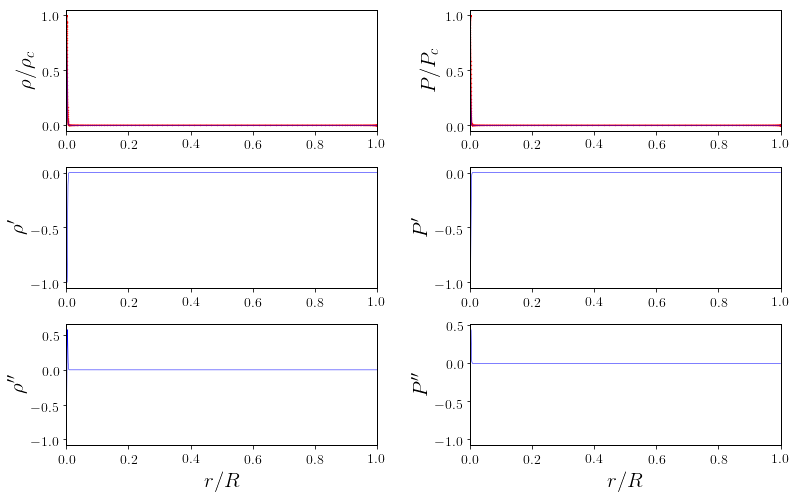

In [657]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(mpa1_140[-1]/mpa1_140[-1][-1],mpa1_140[2]/mpa1_140[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(mpa1_140[-1]/mpa1_140[-1][-1],mpa1_140rho(mpa1_140[-1])/mpa1_140[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(mpa1_140[-1]/mpa1_140[-1][-1],mpa1_140[1]/mpa1_140[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(mpa1_140[-1]/mpa1_140[-1][-1],mpa1_140p(mpa1_140[-1])/mpa1_140[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(mpa1_140[-1]/mpa1_140[-1][-1],mpa1_140drho(mpa1_140[-1])/max(abs(mpa1_140drho(mpa1_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(mpa1_140[-1]/mpa1_140[-1][-1],mpa1_140dp(mpa1_140[-1])/max(abs(mpa1_140dp(mpa1_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(mpa1_140[-1]/mpa1_140[-1][-1],mpa1_140ddrho(mpa1_140[-1])/max(abs(mpa1_140ddrho(mpa1_140[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(mpa1_140[-1]/mpa1_140[-1][-1],mpa1_140ddp(mpa1_140[-1])/max(abs(mpa1_140ddp(mpa1_140[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsmpa1_140.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 14.5

In [658]:
mpa1_145=np.loadtxt('results2/mpa1/14.5.dat',unpack=True)
mpa1_145[3] = mpa1_145[3]-mpa1_145[3][-1] + 0.5*np.log(1-2*mpa1_145[0][-1]/mpa1_145[-1][-1])

In [659]:
s1=1e-7
s2=1e-12
mpa1_145rho=interpolate.UnivariateSpline(mpa1_145[-1], mpa1_145[2], k=5, s=s1)
mpa1_145drho=interpolate.UnivariateSpline(mpa1_145[-1], mpa1_145[2], k=5, s=s1).derivative(n=1)
mpa1_145ddrho=interpolate.UnivariateSpline(mpa1_145[-1], mpa1_145[2], k=5, s=s1).derivative(n=2)

mpa1_145p=interpolate.UnivariateSpline(mpa1_145[-1], mpa1_145[1], k=5, s=s2)
mpa1_145dp=interpolate.UnivariateSpline(mpa1_145[-1], mpa1_145[1], k=5, s=s2).derivative(n=1)
mpa1_145ddp=interpolate.UnivariateSpline(mpa1_145[-1], mpa1_145[1], k=5, s=s2).derivative(n=2)

In [660]:
mpa1_145rho(0.4*mpa1_145[-1][-1])*rhodim

207964346555539.06

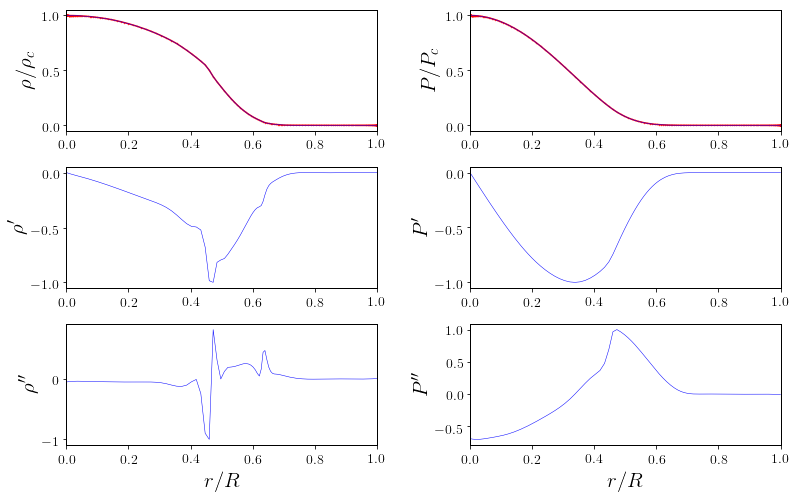

In [661]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(mpa1_145[-1]/mpa1_145[-1][-1],mpa1_145[2]/mpa1_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(mpa1_145[-1]/mpa1_145[-1][-1],mpa1_145rho(mpa1_145[-1])/mpa1_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(mpa1_145[-1]/mpa1_145[-1][-1],mpa1_145[1]/mpa1_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(mpa1_145[-1]/mpa1_145[-1][-1],mpa1_145p(mpa1_145[-1])/mpa1_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(mpa1_145[-1]/mpa1_145[-1][-1],mpa1_145drho(mpa1_145[-1])/max(abs(mpa1_145drho(mpa1_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(mpa1_145[-1]/mpa1_145[-1][-1],mpa1_145dp(mpa1_145[-1])/max(abs(mpa1_145dp(mpa1_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(mpa1_145[-1]/mpa1_145[-1][-1],mpa1_145ddrho(mpa1_145[-1])/max(abs(mpa1_145ddrho(mpa1_145[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(mpa1_145[-1]/mpa1_145[-1][-1],mpa1_145ddp(mpa1_145[-1])/max(abs(mpa1_145ddp(mpa1_145[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsmpa1_145.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

### 15.0

In [662]:
mpa1_150=np.loadtxt('results2/mpa1/15.0.dat',unpack=True)
mpa1_150[3] = mpa1_150[3]-mpa1_150[3][-1] + 0.5*np.log(1-2*mpa1_150[0][-1]/mpa1_150[-1][-1])

In [663]:
s1=8e-6
s2=1e-15
mpa1_150rho=interpolate.UnivariateSpline(mpa1_150[-1], mpa1_150[2], k=5, s=s1)
mpa1_150drho=interpolate.UnivariateSpline(mpa1_150[-1], mpa1_150[2], k=5, s=s1).derivative(n=1)
mpa1_150ddrho=interpolate.UnivariateSpline(mpa1_150[-1], mpa1_150[2], k=5, s=s1).derivative(n=2)

mpa1_150p=interpolate.UnivariateSpline(mpa1_150[-1], mpa1_150[1], k=5, s=s2)
mpa1_150dp=interpolate.UnivariateSpline(mpa1_150[-1], mpa1_150[1], k=5, s=s2).derivative(n=1)
mpa1_150ddp=interpolate.UnivariateSpline(mpa1_150[-1], mpa1_150[1], k=5, s=s2).derivative(n=2)

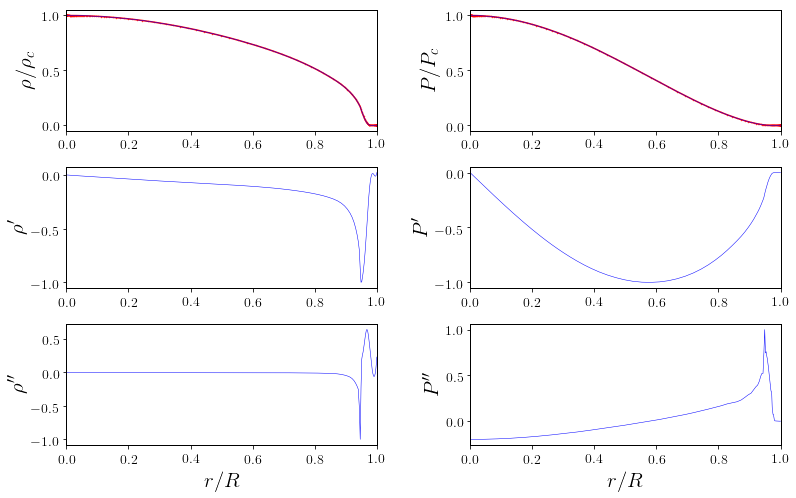

In [664]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(mpa1_150[-1]/mpa1_150[-1][-1],mpa1_150[2]/mpa1_150[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(mpa1_150[-1]/mpa1_150[-1][-1],mpa1_150rho(mpa1_150[-1])/mpa1_150[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,1) # leaving the crust out

plt.subplot(322)
plt.plot(mpa1_150[-1]/mpa1_150[-1][-1],mpa1_150[1]/mpa1_150[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(mpa1_150[-1]/mpa1_150[-1][-1],mpa1_150p(mpa1_150[-1])/mpa1_150[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,1)

plt.subplot(323)
plt.plot(mpa1_150[-1]/mpa1_150[-1][-1],mpa1_150drho(mpa1_150[-1])/max(abs(mpa1_150drho(mpa1_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,1)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(mpa1_150[-1]/mpa1_150[-1][-1],mpa1_150dp(mpa1_150[-1])/max(abs(mpa1_150dp(mpa1_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,1)

plt.subplot(325)
plt.plot(mpa1_150[-1]/mpa1_150[-1][-1],mpa1_150ddrho(mpa1_150[-1])/max(abs(mpa1_150ddrho(mpa1_150[-1]))),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(mpa1_150[-1]/mpa1_150[-1][-1],mpa1_150ddp(mpa1_150[-1])/max(abs(mpa1_150ddp(mpa1_150[-1]))),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,1)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsmpa1_150.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Redshift

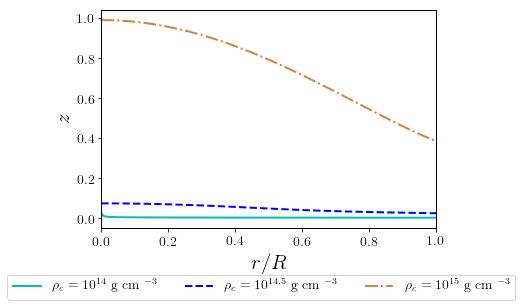

In [665]:
fig = plt.figure()

plt.plot(mpa1_140[-1]/mpa1_140[-1][-1],np.exp(-mpa1_140[3])-1.0,color='c',linewidth='2.0',label=r'$\rho_c=10^{14}$ g cm $^{-3}$')
plt.plot(mpa1_145[-1]/mpa1_145[-1][-1],np.exp(-mpa1_145[3])-1.0,color='blue',linewidth='2.0',linestyle='--',label=r'$\rho_c=10^{14.5}$ g cm $^{-3}$')
plt.plot(mpa1_150[-1]/mpa1_150[-1][-1],np.exp(-mpa1_150[3])-1.0,color='peru',linewidth='2.0',linestyle='-.',label=r'$\rho_c=10^{15}$ g cm $^{-3}$')

l = plt.legend(bbox_to_anchor=(1.1,-0.15), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=3)

plt.xlabel(r'$r/R$')
plt.ylabel(r'$z$')
plt.xlim(0,1.0)

plt.savefig('figures/Redshiftmpa1.pdf', format='pdf', dpi=1000,bbox_inches="tight")

# MS1 ----------------------------------------------------------------------------------------------

In [70]:
ms1_145=np.loadtxt('results/ms1/14.5.dat',unpack=True)
ms1_145rho=interpolate.UnivariateSpline(ms1_145[-1], ms1_145[2], k=5, s=0)
ms1_145drho=interpolate.UnivariateSpline(ms1_145[-1], ms1_145[2], k=5, s=0).derivative(n=1)
ms1_145ddrho=interpolate.UnivariateSpline(ms1_145[-1], ms1_145[2], k=5, s=0).derivative(n=2)

ms1_145p=interpolate.UnivariateSpline(ms1_145[-1], ms1_145[1], k=5, s=0)
ms1_145dp=interpolate.UnivariateSpline(ms1_145[-1], ms1_145[1], k=5, s=0).derivative(n=1)
ms1_145ddp=interpolate.UnivariateSpline(ms1_145[-1], ms1_145[1], k=5, s=0).derivative(n=2)

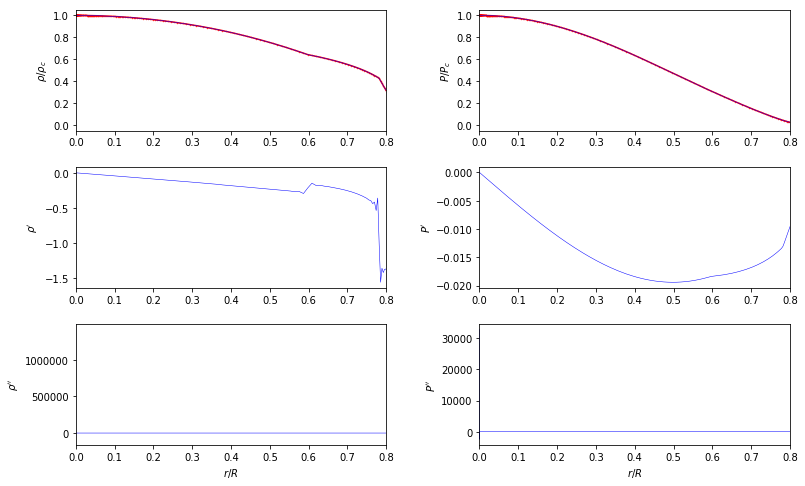

<Figure size 432x288 with 0 Axes>

In [71]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ms1_145[-1]/ms1_145[-1][-1],ms1_145[2]/ms1_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ms1_145[-1]/ms1_145[-1][-1],ms1_145rho(ms1_145[-1])/ms1_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,0.8) # leaving the crust out

plt.subplot(322)
plt.plot(ms1_145[-1]/ms1_145[-1][-1],ms1_145[1]/ms1_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ms1_145[-1]/ms1_145[-1][-1],ms1_145p(ms1_145[-1])/ms1_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,0.8)

plt.subplot(323)
plt.plot(ms1_145[-1]/ms1_145[-1][-1],ms1_145drho(ms1_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,0.8)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ms1_145[-1]/ms1_145[-1][-1],ms1_145dp(ms1_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,0.8)

plt.subplot(325)
plt.plot(ms1_145[-1]/ms1_145[-1][-1],ms1_145ddrho(ms1_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ms1_145[-1]/ms1_145[-1][-1],ms1_145ddp(ms1_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [72]:
ms1_145dpdrho=np.divide(ms1_145dp(ms1_145[-1]),ms1_145drho(ms1_145[-1]))

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


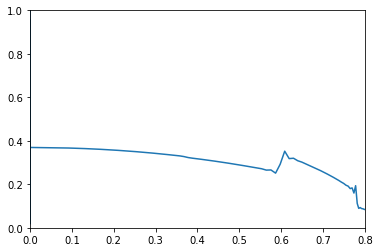

In [73]:
plt.plot(ms1_145[-1]/ms1_145[-1][-1],np.sqrt(ms1_145dpdrho))
plt.xlim(0,0.8)
plt.ylim(0,1)
plt.show()

# MS1B

In [74]:
ms1b_145=np.loadtxt('results/ms1b/14.5.dat',unpack=True)
ms1b_145rho=interpolate.UnivariateSpline(ms1b_145[-1], ms1b_145[2], k=5, s=0)
ms1b_145drho=interpolate.UnivariateSpline(ms1b_145[-1], ms1b_145[2], k=5, s=0).derivative(n=1)
ms1b_145ddrho=interpolate.UnivariateSpline(ms1b_145[-1], ms1b_145[2], k=5, s=0).derivative(n=2)

ms1b_145p=interpolate.UnivariateSpline(ms1b_145[-1], ms1b_145[1], k=5, s=0)
ms1b_145dp=interpolate.UnivariateSpline(ms1b_145[-1], ms1b_145[1], k=5, s=0).derivative(n=1)
ms1b_145ddp=interpolate.UnivariateSpline(ms1b_145[-1], ms1b_145[1], k=5, s=0).derivative(n=2)

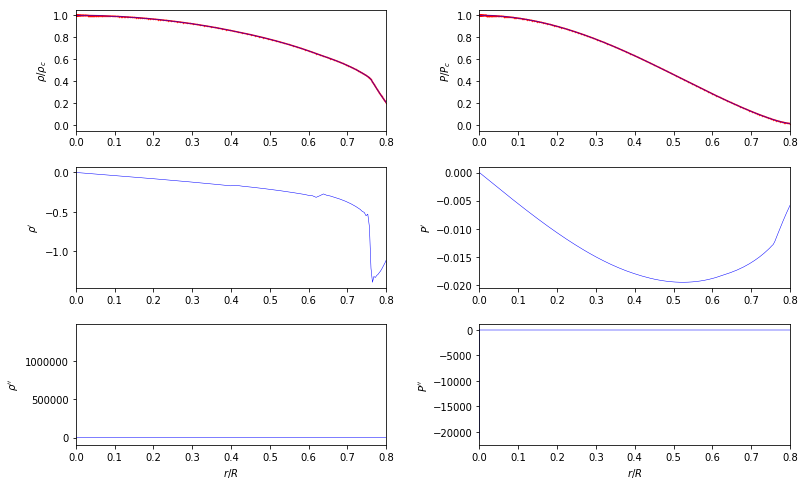

<Figure size 432x288 with 0 Axes>

In [75]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ms1b_145[-1]/ms1b_145[-1][-1],ms1b_145[2]/ms1b_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ms1b_145[-1]/ms1b_145[-1][-1],ms1b_145rho(ms1b_145[-1])/ms1b_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,0.8) # leaving the crust out

plt.subplot(322)
plt.plot(ms1b_145[-1]/ms1b_145[-1][-1],ms1b_145[1]/ms1b_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ms1b_145[-1]/ms1b_145[-1][-1],ms1b_145p(ms1b_145[-1])/ms1b_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,0.8)

plt.subplot(323)
plt.plot(ms1b_145[-1]/ms1b_145[-1][-1],ms1b_145drho(ms1b_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,0.8)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ms1b_145[-1]/ms1b_145[-1][-1],ms1b_145dp(ms1b_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,0.8)

plt.subplot(325)
plt.plot(ms1b_145[-1]/ms1b_145[-1][-1],ms1b_145ddrho(ms1b_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ms1b_145[-1]/ms1b_145[-1][-1],ms1b_145ddp(ms1b_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [76]:
ms1b_145dpdrho=np.divide(ms1b_145dp(ms1b_145[-1]),ms1b_145drho(ms1b_145[-1]))

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


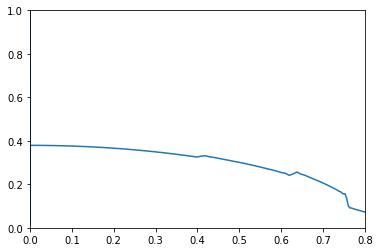

In [77]:
plt.plot(ms1b_145[-1]/ms1b_145[-1][-1],np.sqrt(ms1b_145dpdrho))
plt.xlim(0,0.8)
plt.ylim(0,1)
plt.show()

# MS2

In [80]:
ms2_150115695325=np.loadtxt('results/ms2/15.0115695325.dat',unpack=True)
ms2_150115695325rho=interpolate.UnivariateSpline(ms2_150115695325[-1], ms2_150115695325[2], k=5, s=0)
ms2_150115695325drho=interpolate.UnivariateSpline(ms2_150115695325[-1], ms2_150115695325[2], k=5, s=0).derivative(n=1)
ms2_150115695325ddrho=interpolate.UnivariateSpline(ms2_150115695325[-1], ms2_150115695325[2], k=5, s=0).derivative(n=2)

ms2_150115695325p=interpolate.UnivariateSpline(ms2_150115695325[-1], ms2_150115695325[1], k=5, s=0)
ms2_150115695325dp=interpolate.UnivariateSpline(ms2_150115695325[-1], ms2_150115695325[1], k=5, s=0).derivative(n=1)
ms2_150115695325ddp=interpolate.UnivariateSpline(ms2_150115695325[-1], ms2_150115695325[1], k=5, s=0).derivative(n=2)

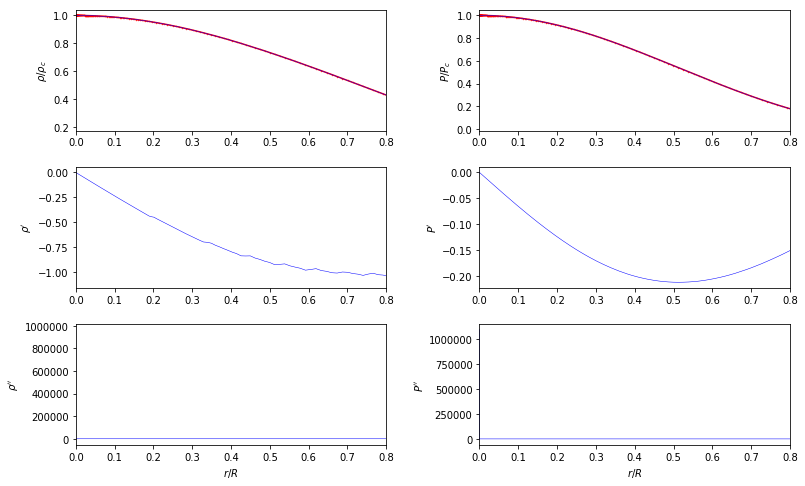

<Figure size 432x288 with 0 Axes>

In [81]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ms2_150115695325[-1]/ms2_150115695325[-1][-1],ms2_150115695325[2]/ms2_150115695325[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ms2_150115695325[-1]/ms2_150115695325[-1][-1],ms2_150115695325rho(ms2_150115695325[-1])/ms2_150115695325[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,0.8) # leaving the crust out

plt.subplot(322)
plt.plot(ms2_150115695325[-1]/ms2_150115695325[-1][-1],ms2_150115695325[1]/ms2_150115695325[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ms2_150115695325[-1]/ms2_150115695325[-1][-1],ms2_150115695325p(ms2_150115695325[-1])/ms2_150115695325[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,0.8)

plt.subplot(323)
plt.plot(ms2_150115695325[-1]/ms2_150115695325[-1][-1],ms2_150115695325drho(ms2_150115695325[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,0.8)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ms2_150115695325[-1]/ms2_150115695325[-1][-1],ms2_150115695325dp(ms2_150115695325[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,0.8)

plt.subplot(325)
plt.plot(ms2_150115695325[-1]/ms2_150115695325[-1][-1],ms2_150115695325ddrho(ms2_150115695325[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ms2_150115695325[-1]/ms2_150115695325[-1][-1],ms2_150115695325ddp(ms2_150115695325[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [82]:
ms2_150115695325dpdrho=np.divide(ms2_150115695325dp(ms2_150115695325[-1]),ms2_150115695325drho(ms2_150115695325[-1]))

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


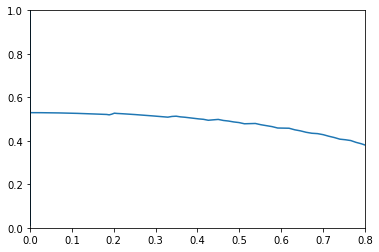

In [83]:
plt.plot(ms2_150115695325[-1]/ms2_150115695325[-1][-1],np.sqrt(ms2_150115695325dpdrho))
plt.xlim(0,0.8)
plt.ylim(0,1)
plt.show()

# NL3

In [84]:
nl3_145=np.loadtxt('results/nl3/14.5.dat',unpack=True)
nl3_145rho=interpolate.UnivariateSpline(nl3_145[-1], nl3_145[2], k=5, s=0)
nl3_145drho=interpolate.UnivariateSpline(nl3_145[-1], nl3_145[2], k=5, s=0).derivative(n=1)
nl3_145ddrho=interpolate.UnivariateSpline(nl3_145[-1], nl3_145[2], k=5, s=0).derivative(n=2)

nl3_145p=interpolate.UnivariateSpline(nl3_145[-1], nl3_145[1], k=5, s=0)
nl3_145dp=interpolate.UnivariateSpline(nl3_145[-1], nl3_145[1], k=5, s=0).derivative(n=1)
nl3_145ddp=interpolate.UnivariateSpline(nl3_145[-1], nl3_145[1], k=5, s=0).derivative(n=2)

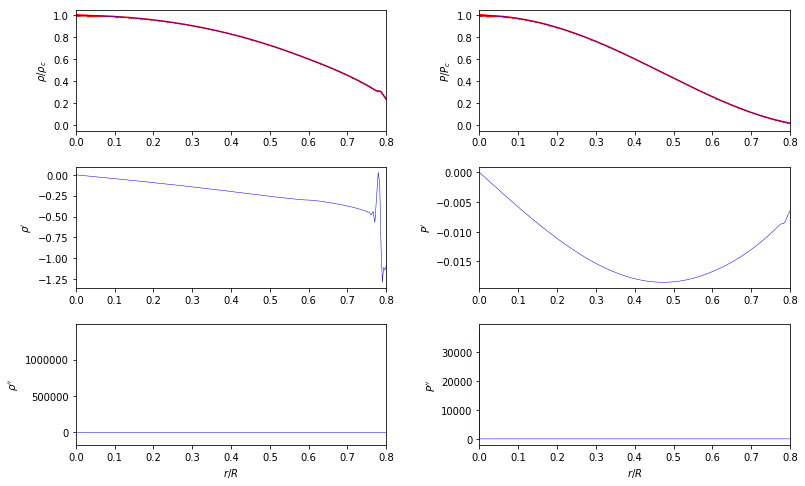

<Figure size 432x288 with 0 Axes>

In [85]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(nl3_145[-1]/nl3_145[-1][-1],nl3_145[2]/nl3_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(nl3_145[-1]/nl3_145[-1][-1],nl3_145rho(nl3_145[-1])/nl3_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,0.8) # leaving the crust out

plt.subplot(322)
plt.plot(nl3_145[-1]/nl3_145[-1][-1],nl3_145[1]/nl3_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(nl3_145[-1]/nl3_145[-1][-1],nl3_145p(nl3_145[-1])/nl3_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,0.8)

plt.subplot(323)
plt.plot(nl3_145[-1]/nl3_145[-1][-1],nl3_145drho(nl3_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,0.8)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(nl3_145[-1]/nl3_145[-1][-1],nl3_145dp(nl3_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,0.8)

plt.subplot(325)
plt.plot(nl3_145[-1]/nl3_145[-1][-1],nl3_145ddrho(nl3_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(nl3_145[-1]/nl3_145[-1][-1],nl3_145ddp(nl3_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [86]:
nl3_145dpdrho=np.divide(nl3_145dp(nl3_145[-1]),nl3_145drho(nl3_145[-1]))

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


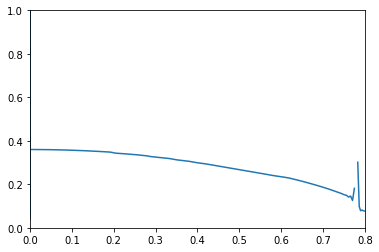

In [87]:
plt.plot(nl3_145[-1]/nl3_145[-1][-1],np.sqrt(nl3_145dpdrho))
plt.xlim(0,0.8)
plt.ylim(0,1)
plt.show()

# PAL6

In [88]:
pal6_145=np.loadtxt('results/pal6/14.5.dat',unpack=True)
pal6_145rho=interpolate.UnivariateSpline(pal6_145[-1], pal6_145[2], k=5, s=0)
pal6_145drho=interpolate.UnivariateSpline(pal6_145[-1], pal6_145[2], k=5, s=0).derivative(n=1)
pal6_145ddrho=interpolate.UnivariateSpline(pal6_145[-1], pal6_145[2], k=5, s=0).derivative(n=2)

pal6_145p=interpolate.UnivariateSpline(pal6_145[-1], pal6_145[1], k=5, s=0)
pal6_145dp=interpolate.UnivariateSpline(pal6_145[-1], pal6_145[1], k=5, s=0).derivative(n=1)
pal6_145ddp=interpolate.UnivariateSpline(pal6_145[-1], pal6_145[1], k=5, s=0).derivative(n=2)

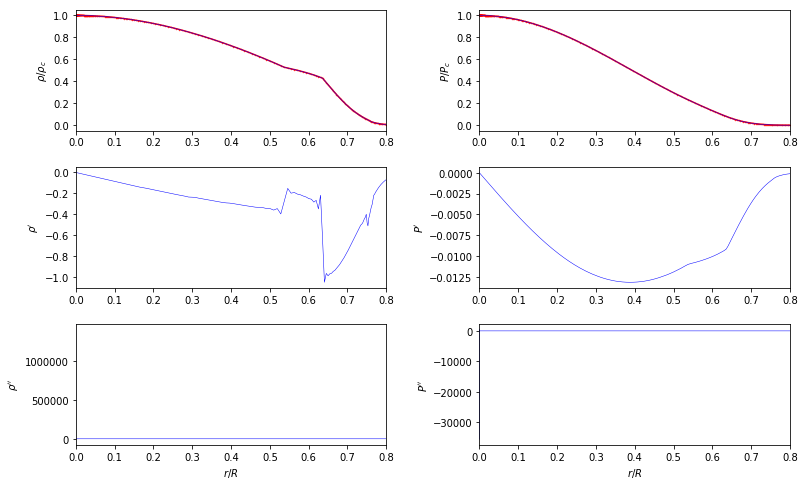

<Figure size 432x288 with 0 Axes>

In [89]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(pal6_145[-1]/pal6_145[-1][-1],pal6_145[2]/pal6_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(pal6_145[-1]/pal6_145[-1][-1],pal6_145rho(pal6_145[-1])/pal6_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,0.8) # leaving the crust out

plt.subplot(322)
plt.plot(pal6_145[-1]/pal6_145[-1][-1],pal6_145[1]/pal6_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(pal6_145[-1]/pal6_145[-1][-1],pal6_145p(pal6_145[-1])/pal6_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,0.8)

plt.subplot(323)
plt.plot(pal6_145[-1]/pal6_145[-1][-1],pal6_145drho(pal6_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,0.8)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(pal6_145[-1]/pal6_145[-1][-1],pal6_145dp(pal6_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,0.8)

plt.subplot(325)
plt.plot(pal6_145[-1]/pal6_145[-1][-1],pal6_145ddrho(pal6_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(pal6_145[-1]/pal6_145[-1][-1],pal6_145ddp(pal6_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [90]:
pal6_145dpdrho=np.divide(pal6_145dp(pal6_145[-1]),pal6_145drho(pal6_145[-1]))

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


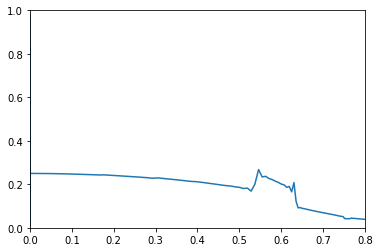

In [91]:
plt.plot(pal6_145[-1]/pal6_145[-1][-1],np.sqrt(pal6_145dpdrho))
plt.xlim(0,0.8)
plt.ylim(0,1)
plt.show()

# PCL2

In [92]:
pcl2_145=np.loadtxt('results/pcl2/14.5.dat',unpack=True)
pcl2_145rho=interpolate.UnivariateSpline(pcl2_145[-1], pcl2_145[2], k=5, s=0)
pcl2_145drho=interpolate.UnivariateSpline(pcl2_145[-1], pcl2_145[2], k=5, s=0).derivative(n=1)
pcl2_145ddrho=interpolate.UnivariateSpline(pcl2_145[-1], pcl2_145[2], k=5, s=0).derivative(n=2)

pcl2_145p=interpolate.UnivariateSpline(pcl2_145[-1], pcl2_145[1], k=5, s=0)
pcl2_145dp=interpolate.UnivariateSpline(pcl2_145[-1], pcl2_145[1], k=5, s=0).derivative(n=1)
pcl2_145ddp=interpolate.UnivariateSpline(pcl2_145[-1], pcl2_145[1], k=5, s=0).derivative(n=2)

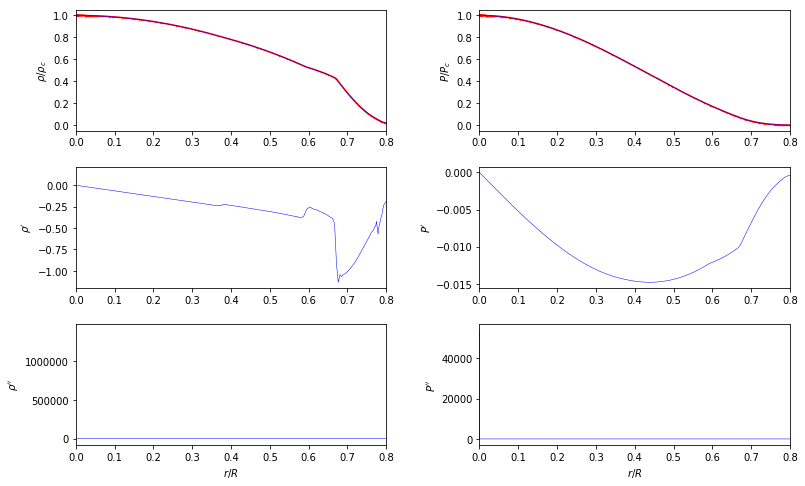

<Figure size 432x288 with 0 Axes>

In [93]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(pcl2_145[-1]/pcl2_145[-1][-1],pcl2_145[2]/pcl2_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(pcl2_145[-1]/pcl2_145[-1][-1],pcl2_145rho(pcl2_145[-1])/pcl2_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,0.8) # leaving the crust out

plt.subplot(322)
plt.plot(pcl2_145[-1]/pcl2_145[-1][-1],pcl2_145[1]/pcl2_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(pcl2_145[-1]/pcl2_145[-1][-1],pcl2_145p(pcl2_145[-1])/pcl2_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,0.8)

plt.subplot(323)
plt.plot(pcl2_145[-1]/pcl2_145[-1][-1],pcl2_145drho(pcl2_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,0.8)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(pcl2_145[-1]/pcl2_145[-1][-1],pcl2_145dp(pcl2_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,0.8)

plt.subplot(325)
plt.plot(pcl2_145[-1]/pcl2_145[-1][-1],pcl2_145ddrho(pcl2_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(pcl2_145[-1]/pcl2_145[-1][-1],pcl2_145ddp(pcl2_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [94]:
pcl2_145dpdrho=np.divide(pcl2_145dp(pcl2_145[-1]),pcl2_145drho(pcl2_145[-1]))

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


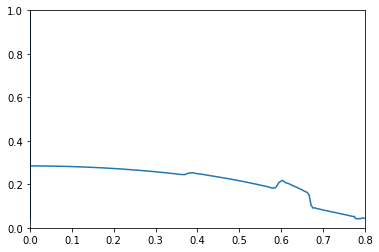

In [95]:
plt.plot(pcl2_145[-1]/pcl2_145[-1][-1],np.sqrt(pcl2_145dpdrho))
plt.xlim(0,0.8)
plt.ylim(0,1)
plt.show()

# PS

In [96]:
ps_145=np.loadtxt('results/ps/14.5.dat',unpack=True)
ps_145rho=interpolate.UnivariateSpline(ps_145[-1], ps_145[2], k=5, s=0)
ps_145drho=interpolate.UnivariateSpline(ps_145[-1], ps_145[2], k=5, s=0).derivative(n=1)
ps_145ddrho=interpolate.UnivariateSpline(ps_145[-1], ps_145[2], k=5, s=0).derivative(n=2)

ps_145p=interpolate.UnivariateSpline(ps_145[-1], ps_145[1], k=5, s=0)
ps_145dp=interpolate.UnivariateSpline(ps_145[-1], ps_145[1], k=5, s=0).derivative(n=1)
ps_145ddp=interpolate.UnivariateSpline(ps_145[-1], ps_145[1], k=5, s=0).derivative(n=2)

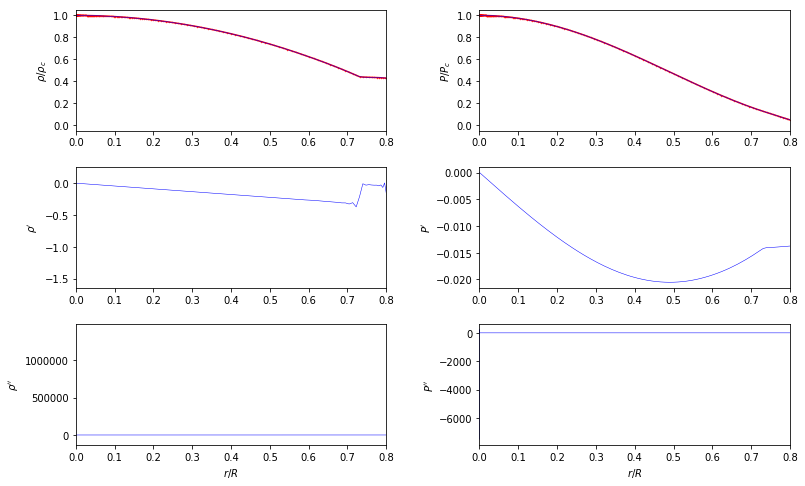

<Figure size 432x288 with 0 Axes>

In [97]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(ps_145[-1]/ps_145[-1][-1],ps_145[2]/ps_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(ps_145[-1]/ps_145[-1][-1],ps_145rho(ps_145[-1])/ps_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,0.8) # leaving the crust out

plt.subplot(322)
plt.plot(ps_145[-1]/ps_145[-1][-1],ps_145[1]/ps_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(ps_145[-1]/ps_145[-1][-1],ps_145p(ps_145[-1])/ps_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,0.8)

plt.subplot(323)
plt.plot(ps_145[-1]/ps_145[-1][-1],ps_145drho(ps_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,0.8)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(ps_145[-1]/ps_145[-1][-1],ps_145dp(ps_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,0.8)

plt.subplot(325)
plt.plot(ps_145[-1]/ps_145[-1][-1],ps_145ddrho(ps_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(ps_145[-1]/ps_145[-1][-1],ps_145ddp(ps_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [98]:
ps_145dpdrho=np.divide(ps_145dp(ps_145[-1]),ps_145drho(ps_145[-1]))

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


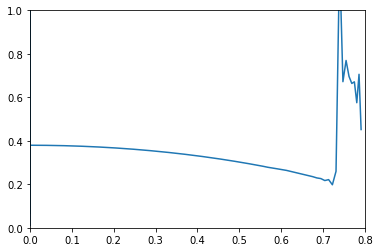

In [99]:
plt.plot(ps_145[-1]/ps_145[-1][-1],np.sqrt(ps_145dpdrho))
plt.xlim(0,0.8)
plt.ylim(0,1)
plt.show()

# SLY

In [100]:
sly_145=np.loadtxt('results/sly/14.5.dat',unpack=True)
sly_145rho=interpolate.UnivariateSpline(sly_145[-1], sly_145[2], k=5, s=0)
sly_145drho=interpolate.UnivariateSpline(sly_145[-1], sly_145[2], k=5, s=0).derivative(n=1)
sly_145ddrho=interpolate.UnivariateSpline(sly_145[-1], sly_145[2], k=5, s=0).derivative(n=2)

sly_145p=interpolate.UnivariateSpline(sly_145[-1], sly_145[1], k=5, s=0)
sly_145dp=interpolate.UnivariateSpline(sly_145[-1], sly_145[1], k=5, s=0).derivative(n=1)
sly_145ddp=interpolate.UnivariateSpline(sly_145[-1], sly_145[1], k=5, s=0).derivative(n=2)

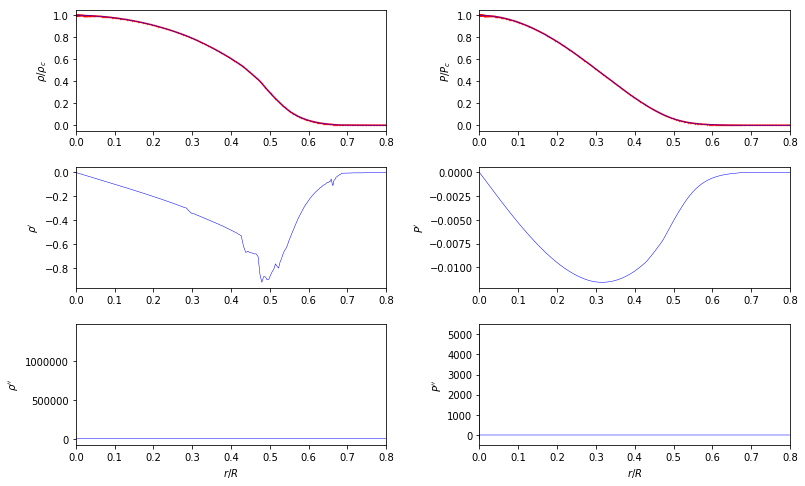

<Figure size 432x288 with 0 Axes>

In [101]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(sly_145[-1]/sly_145[-1][-1],sly_145[2]/sly_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(sly_145[-1]/sly_145[-1][-1],sly_145rho(sly_145[-1])/sly_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,0.8) # leaving the crust out

plt.subplot(322)
plt.plot(sly_145[-1]/sly_145[-1][-1],sly_145[1]/sly_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(sly_145[-1]/sly_145[-1][-1],sly_145p(sly_145[-1])/sly_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,0.8)

plt.subplot(323)
plt.plot(sly_145[-1]/sly_145[-1][-1],sly_145drho(sly_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,0.8)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(sly_145[-1]/sly_145[-1][-1],sly_145dp(sly_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,0.8)

plt.subplot(325)
plt.plot(sly_145[-1]/sly_145[-1][-1],sly_145ddrho(sly_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(sly_145[-1]/sly_145[-1][-1],sly_145ddp(sly_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [102]:
sly_145dpdrho=np.divide(sly_145dp(sly_145[-1]),sly_145drho(sly_145[-1]))

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


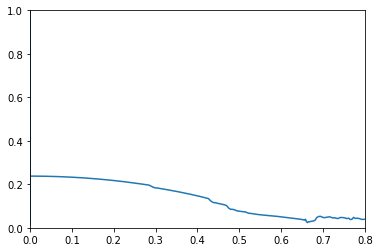

In [103]:
plt.plot(sly_145[-1]/sly_145[-1][-1],np.sqrt(sly_145dpdrho))
plt.xlim(0,0.8)
plt.ylim(0,1)
plt.show()

# WFF1

In [104]:
wff1_145=np.loadtxt('results/wff1/14.5.dat',unpack=True)
wff1_145rho=interpolate.UnivariateSpline(wff1_145[-1], wff1_145[2], k=5, s=0)
wff1_145drho=interpolate.UnivariateSpline(wff1_145[-1], wff1_145[2], k=5, s=0).derivative(n=1)
wff1_145ddrho=interpolate.UnivariateSpline(wff1_145[-1], wff1_145[2], k=5, s=0).derivative(n=2)

wff1_145p=interpolate.UnivariateSpline(wff1_145[-1], wff1_145[1], k=5, s=0)
wff1_145dp=interpolate.UnivariateSpline(wff1_145[-1], wff1_145[1], k=5, s=0).derivative(n=1)
wff1_145ddp=interpolate.UnivariateSpline(wff1_145[-1], wff1_145[1], k=5, s=0).derivative(n=2)

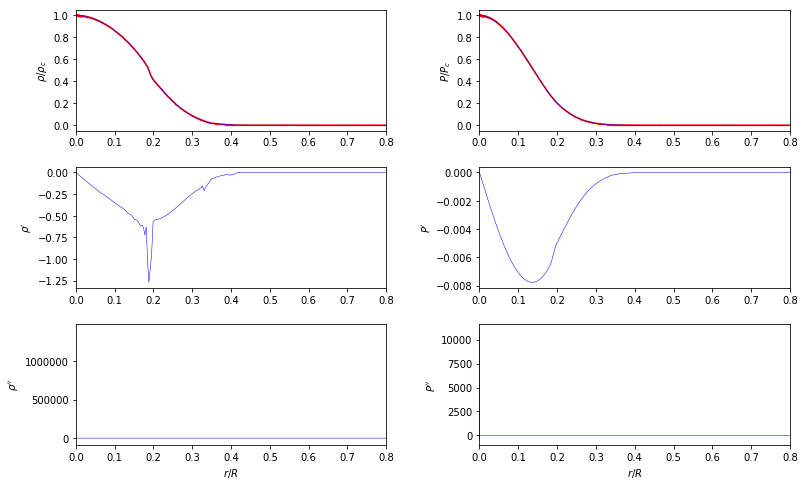

<Figure size 432x288 with 0 Axes>

In [105]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(wff1_145[-1]/wff1_145[-1][-1],wff1_145[2]/wff1_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(wff1_145[-1]/wff1_145[-1][-1],wff1_145rho(wff1_145[-1])/wff1_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,0.8) # leaving the crust out

plt.subplot(322)
plt.plot(wff1_145[-1]/wff1_145[-1][-1],wff1_145[1]/wff1_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(wff1_145[-1]/wff1_145[-1][-1],wff1_145p(wff1_145[-1])/wff1_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,0.8)

plt.subplot(323)
plt.plot(wff1_145[-1]/wff1_145[-1][-1],wff1_145drho(wff1_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,0.8)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(wff1_145[-1]/wff1_145[-1][-1],wff1_145dp(wff1_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,0.8)

plt.subplot(325)
plt.plot(wff1_145[-1]/wff1_145[-1][-1],wff1_145ddrho(wff1_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(wff1_145[-1]/wff1_145[-1][-1],wff1_145ddp(wff1_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [106]:
wff1_145dpdrho=np.divide(wff1_145dp(wff1_145[-1]),wff1_145drho(wff1_145[-1]))

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


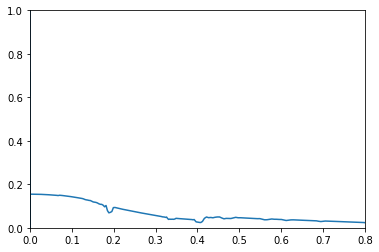

In [107]:
plt.plot(wff1_145[-1]/wff1_145[-1][-1],np.sqrt(wff1_145dpdrho))
plt.xlim(0,0.8)
plt.ylim(0,1)
plt.show()

# WFF2

In [108]:
wff2_145=np.loadtxt('results/wff2/14.5.dat',unpack=True)
wff2_145rho=interpolate.UnivariateSpline(wff2_145[-1], wff2_145[2], k=5, s=0)
wff2_145drho=interpolate.UnivariateSpline(wff2_145[-1], wff2_145[2], k=5, s=0).derivative(n=1)
wff2_145ddrho=interpolate.UnivariateSpline(wff2_145[-1], wff2_145[2], k=5, s=0).derivative(n=2)

wff2_145p=interpolate.UnivariateSpline(wff2_145[-1], wff2_145[1], k=5, s=0)
wff2_145dp=interpolate.UnivariateSpline(wff2_145[-1], wff2_145[1], k=5, s=0).derivative(n=1)
wff2_145ddp=interpolate.UnivariateSpline(wff2_145[-1], wff2_145[1], k=5, s=0).derivative(n=2)

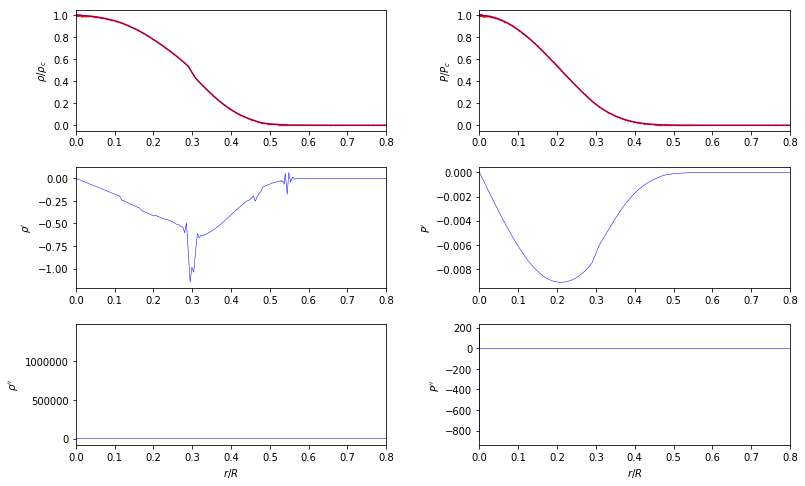

<Figure size 432x288 with 0 Axes>

In [109]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(wff2_145[-1]/wff2_145[-1][-1],wff2_145[2]/wff2_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(wff2_145[-1]/wff2_145[-1][-1],wff2_145rho(wff2_145[-1])/wff2_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,0.8) # leaving the crust out

plt.subplot(322)
plt.plot(wff2_145[-1]/wff2_145[-1][-1],wff2_145[1]/wff2_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(wff2_145[-1]/wff2_145[-1][-1],wff2_145p(wff2_145[-1])/wff2_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,0.8)

plt.subplot(323)
plt.plot(wff2_145[-1]/wff2_145[-1][-1],wff2_145drho(wff2_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,0.8)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(wff2_145[-1]/wff2_145[-1][-1],wff2_145dp(wff2_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,0.8)

plt.subplot(325)
plt.plot(wff2_145[-1]/wff2_145[-1][-1],wff2_145ddrho(wff2_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(wff2_145[-1]/wff2_145[-1][-1],wff2_145ddp(wff2_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [110]:
wff2_145dpdrho=np.divide(wff2_145dp(wff2_145[-1]),wff2_145drho(wff2_145[-1]))

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


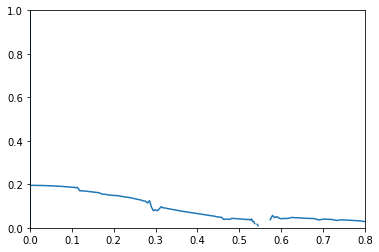

In [111]:
plt.plot(wff2_145[-1]/wff2_145[-1][-1],np.sqrt(wff2_145dpdrho))
plt.xlim(0,0.8)
plt.ylim(0,1)
plt.show()

# WFF3

In [112]:
wff3_145=np.loadtxt('results/wff3/14.5.dat',unpack=True)
wff3_145rho=interpolate.UnivariateSpline(wff3_145[-1], wff3_145[2], k=5, s=0)
wff3_145drho=interpolate.UnivariateSpline(wff3_145[-1], wff3_145[2], k=5, s=0).derivative(n=1)
wff3_145ddrho=interpolate.UnivariateSpline(wff3_145[-1], wff3_145[2], k=5, s=0).derivative(n=2)

wff3_145p=interpolate.UnivariateSpline(wff3_145[-1], wff3_145[1], k=5, s=0)
wff3_145dp=interpolate.UnivariateSpline(wff3_145[-1], wff3_145[1], k=5, s=0).derivative(n=1)
wff3_145ddp=interpolate.UnivariateSpline(wff3_145[-1], wff3_145[1], k=5, s=0).derivative(n=2)

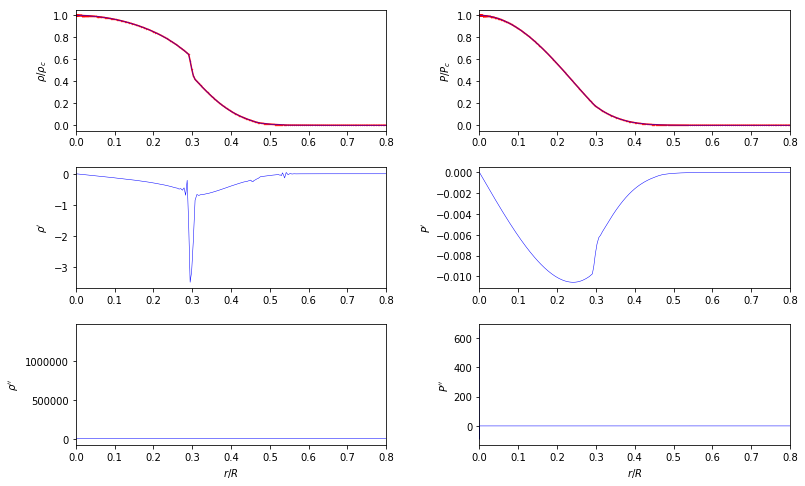

<Figure size 432x288 with 0 Axes>

In [113]:
fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(wff3_145[-1]/wff3_145[-1][-1],wff3_145[2]/wff3_145[2][0],color='red',marker='o',markersize='0.4') 
plt.plot(wff3_145[-1]/wff3_145[-1][-1],wff3_145rho(wff3_145[-1])/wff3_145[2][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,0.8) # leaving the crust out

plt.subplot(322)
plt.plot(wff3_145[-1]/wff3_145[-1][-1],wff3_145[1]/wff3_145[1][0],color='red',marker='o',markersize='0.4') 
plt.plot(wff3_145[-1]/wff3_145[-1][-1],wff3_145p(wff3_145[-1])/wff3_145[1][0],color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,0.8)

plt.subplot(323)
plt.plot(wff3_145[-1]/wff3_145[-1][-1],wff3_145drho(wff3_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}$')
plt.xlim(0,0.8)
#plt.ylim(-500,0)

plt.subplot(324)
plt.plot(wff3_145[-1]/wff3_145[-1][-1],wff3_145dp(wff3_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime} $')
plt.xlim(0,0.8)

plt.subplot(325)
plt.plot(wff3_145[-1]/wff3_145[-1][-1],wff3_145ddrho(wff3_145[-1]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-0.01,0.01)

plt.subplot(326)
plt.plot(wff3_145[-1]/wff3_145[-1][-1],wff3_145ddp(wff3_145[-1]),'b-', linewidth=0.5)
plt.ylabel(r'$P^{\prime\prime}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
#plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

#plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [114]:
wff3_145dpdrho=np.divide(wff3_145dp(wff3_145[-1]),wff3_145drho(wff3_145[-1]))

/home/dave/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


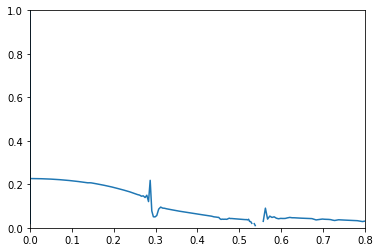

In [115]:
plt.plot(wff3_145[-1]/wff3_145[-1][-1],np.sqrt(wff3_145dpdrho))
plt.xlim(0,0.8)
plt.ylim(0,1)
plt.show()